In [3]:
from sklearn.model_selection import train_test_split
import pandas as pd
from sklearn.preprocessing import StandardScaler,MinMaxScaler
import matplotlib.pyplot as plt

model_data = pd.read_csv("../../przygotowanie_danych/model_data.csv")
X = model_data[["temperatura", "suma opadów", "wilgotność", "prędkość wiatru", "zachmurzenine", "day_number_in_year"]]
y = model_data['PM2.5']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1,shuffle=False)

In [4]:
import optuna
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score, mean_squared_error



def objective(trial):
    n_estimators = trial.suggest_int('n_estimators', 1, 1000)
    max_depth = trial.suggest_int('max_depth', 1, 2500)
    min_samples_split = trial.suggest_int('min_samples_split', 2, 100)
    min_samples_leaf = trial.suggest_int('min_samples_leaf', 1, 100)
    max_features = trial.suggest_float('max_features', 0.1, 1.0)
    min_weight_fraction_leaf = trial.suggest_float('min_weight_fraction_leaf', 0.0, 0.5)

    # Additional parameters
    criterion = trial.suggest_categorical('criterion',  {'friedman_mse', 'squared_error', 'poisson', 'absolute_error'})
    max_leaf_nodes = trial.suggest_int('max_leaf_nodes', 10, 100)
    min_impurity_decrease = trial.suggest_float('min_impurity_decrease', 0.0, 0.1)
    verbose = trial.suggest_categorical('verbose', [0, 1, 2])
    ccp_alpha = trial.suggest_float('ccp_alpha', 0.0, 0.5)
  

    model = RandomForestRegressor(
        n_estimators=n_estimators,
        criterion=criterion,
        max_depth=max_depth,
        min_samples_split=min_samples_split,
        min_samples_leaf=min_samples_leaf,
        min_weight_fraction_leaf=min_weight_fraction_leaf,
        max_features=max_features,
        max_leaf_nodes=max_leaf_nodes,
        min_impurity_decrease=min_impurity_decrease,
        bootstrap=False,
        n_jobs=-1,
        random_state=42,
        verbose=verbose,
        ccp_alpha=ccp_alpha,
        max_samples=None

    )
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    return mse

study = optuna.create_study(direction='minimize') 
improvement_threshold = 0.001
stale_count = 0

best_mse = float('inf')

mse_values = []

for _ in range(11000):
    study.optimize(objective, n_trials=1)

    if study.best_value < best_mse:
        best_mse = study.best_value
        stale_count = 0
    else:
        stale_count += 1

    mse_values.append(best_mse)

    if stale_count >= 300 or best_mse <= improvement_threshold:
        break

best_params = study.best_params
best_mse = study.best_value

print("Best Parameters=", best_params)
print("Best Mean Squared Error=", best_mse)



[I 2023-11-24 14:15:26,154] A new study created in memory with name: no-name-5ebd2973-94cb-4d67-8d77-05dc34e0af74
[I 2023-11-24 14:15:26,578] Trial 0 finished with value: 158.23080526610264 and parameters: {'n_estimators': 26, 'max_depth': 111, 'min_samples_split': 23, 'min_samples_leaf': 63, 'max_features': 0.6560820810947718, 'min_weight_fraction_leaf': 0.09396183561761579, 'criterion': 'absolute_error', 'max_leaf_nodes': 13, 'min_impurity_decrease': 0.08515235752827528, 'verbose': 0, 'ccp_alpha': 0.4744366467861261}. Best is trial 0 with value: 158.23080526610264.
[I 2023-11-24 14:15:26,670] Trial 1 finished with value: 228.83449728452885 and parameters: {'n_estimators': 85, 'max_depth': 355, 'min_samples_split': 71, 'min_samples_leaf': 38, 'max_features': 0.8505591379679538, 'min_weight_fraction_leaf': 0.4007291468185046, 'criterion': 'poisson', 'max_leaf_nodes': 15, 'min_impurity_decrease': 0.03361087507949071, 'verbose': 0, 'ccp_alpha': 0.1571968023502392}. Best is trial 0 with v

building tree 1 of 588building tree 2 of 588
building tree 3 of 588
building tree 4 of 588
building tree 5 of 588
building tree 6 of 588

building tree 7 of 588
building tree 8 of 588
building tree 9 of 588
building tree 10 of 588
building tree 11 of 588
building tree 12 of 588
building tree 13 of 588
building tree 14 of 588
building tree 15 of 588
building tree 16 of 588
building tree 17 of 588
building tree 18 of 588
building tree 19 of 588
building tree 20 of 588
building tree 21 of 588
building tree 22 of 588
building tree 23 of 588
building tree 24 of 588
building tree 25 of 588
building tree 26 of 588
building tree 27 of 588
building tree 28 of 588
building tree 29 of 588
building tree 30 of 588
building tree 31 of 588
building tree 32 of 588
building tree 33 of 588
building tree 34 of 588
building tree 35 of 588
building tree 36 of 588


[Parallel(n_jobs=-1)]: Done  17 tasks      | elapsed:    0.2s


building tree 37 of 588
building tree 38 of 588
building tree 39 of 588
building tree 40 of 588
building tree 41 of 588
building tree 42 of 588
building tree 43 of 588
building tree 44 of 588
building tree 45 of 588
building tree 46 of 588
building tree 47 of 588
building tree 48 of 588
building tree 49 of 588
building tree 50 of 588
building tree 51 of 588
building tree 52 of 588
building tree 53 of 588
building tree 54 of 588
building tree 55 of 588
building tree 56 of 588
building tree 57 of 588
building tree 58 of 588
building tree 59 of 588
building tree 60 of 588
building tree 61 of 588
building tree 62 of 588
building tree 63 of 588
building tree 64 of 588
building tree 65 of 588
building tree 66 of 588
building tree 67 of 588
building tree 68 of 588
building tree 69 of 588
building tree 70 of 588
building tree 71 of 588
building tree 72 of 588
building tree 73 of 588
building tree 74 of 588
building tree 75 of 588
building tree 76 of 588
building tree 77 of 588
building tree 78

[Parallel(n_jobs=-1)]: Done 138 tasks      | elapsed:    1.7s


building tree 160 of 588
building tree 161 of 588
building tree 162 of 588
building tree 163 of 588
building tree 164 of 588
building tree 165 of 588
building tree 166 of 588
building tree 167 of 588
building tree 168 of 588
building tree 169 of 588
building tree 170 of 588
building tree 171 of 588
building tree 172 of 588
building tree 173 of 588
building tree 174 of 588
building tree 175 of 588
building tree 176 of 588
building tree 177 of 588
building tree 178 of 588
building tree 179 of 588
building tree 180 of 588
building tree 181 of 588
building tree 182 of 588
building tree 183 of 588
building tree 184 of 588
building tree 185 of 588
building tree 186 of 588
building tree 187 of 588
building tree 188 of 588
building tree 189 of 588
building tree 190 of 588
building tree 191 of 588
building tree 192 of 588
building tree 193 of 588
building tree 194 of 588
building tree 195 of 588
building tree 196 of 588
building tree 197 of 588
building tree 198 of 588
building tree 199 of 588


[Parallel(n_jobs=-1)]: Done 341 tasks      | elapsed:    4.3s


building tree 367 of 588
building tree 368 of 588
building tree 369 of 588
building tree 370 of 588
building tree 371 of 588
building tree 372 of 588
building tree 373 of 588
building tree 374 of 588
building tree 375 of 588
building tree 376 of 588
building tree 377 of 588
building tree 378 of 588
building tree 379 of 588
building tree 380 of 588
building tree 381 of 588
building tree 382 of 588
building tree 383 of 588
building tree 384 of 588
building tree 385 of 588
building tree 386 of 588
building tree 387 of 588
building tree 388 of 588
building tree 389 of 588
building tree 390 of 588
building tree 391 of 588
building tree 392 of 588
building tree 393 of 588
building tree 394 of 588
building tree 395 of 588
building tree 396 of 588
building tree 397 of 588
building tree 398 of 588
building tree 399 of 588
building tree 400 of 588
building tree 401 of 588
building tree 402 of 588
building tree 403 of 588
building tree 404 of 588
building tree 405 of 588
building tree 406 of 588


[Parallel(n_jobs=-1)]: Done 588 out of 588 | elapsed:    7.4s finished
[Parallel(n_jobs=12)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done  17 tasks      | elapsed:    0.0s
[Parallel(n_jobs=12)]: Done 138 tasks      | elapsed:    0.0s
[Parallel(n_jobs=12)]: Done 341 tasks      | elapsed:    0.0s
[Parallel(n_jobs=12)]: Done 588 out of 588 | elapsed:    0.0s finished
[I 2023-11-24 14:15:34,614] Trial 3 finished with value: 179.14958427620604 and parameters: {'n_estimators': 588, 'max_depth': 2063, 'min_samples_split': 16, 'min_samples_leaf': 72, 'max_features': 0.6397624806559872, 'min_weight_fraction_leaf': 0.04042521914396191, 'criterion': 'absolute_error', 'max_leaf_nodes': 95, 'min_impurity_decrease': 0.08651510037265409, 'verbose': 2, 'ccp_alpha': 0.082588054430067}. Best is trial 0 with value: 158.23080526610264.
[I 2023-11-24 14:15:34,989] Trial 4 finished with value: 219.9210614870181 and parameters: {'n_estimators': 454, 'max_depth': 705

building tree 1 of 556building tree 2 of 556
building tree 3 of 556
building tree 4 of 556
building tree 5 of 556
building tree 6 of 556
building tree 7 of 556
building tree 8 of 556

building tree 9 of 556
building tree 10 of 556
building tree 11 of 556
building tree 12 of 556
building tree 13 of 556
building tree 14 of 556
building tree 15 of 556
building tree 16 of 556
building tree 17 of 556
building tree 18 of 556
building tree 19 of 556
building tree 20 of 556
building tree 21 of 556
building tree 22 of 556
building tree 23 of 556
building tree 24 of 556
building tree 25 of 556
building tree 26 of 556
building tree 27 of 556
building tree 28 of 556
building tree 29 of 556
building tree 30 of 556
building tree 31 of 556
building tree 32 of 556
building tree 33 of 556
building tree 34 of 556
building tree 35 of 556
building tree 36 of 556
building tree 37 of 556
building tree 38 of 556
building tree 39 of 556
building tree 40 of 556
building tree 41 of 556
building tree 42 of 556
b

[Parallel(n_jobs=-1)]: Done  17 tasks      | elapsed:    0.1s


building tree 50 of 556
building tree 51 of 556
building tree 52 of 556
building tree 53 of 556
building tree 54 of 556
building tree 55 of 556
building tree 56 of 556
building tree 57 of 556
building tree 58 of 556
building tree 59 of 556
building tree 60 of 556
building tree 61 of 556
building tree 62 of 556
building tree 63 of 556
building tree 64 of 556
building tree 65 of 556
building tree 66 of 556
building tree 67 of 556
building tree 68 of 556
building tree 69 of 556
building tree 70 of 556
building tree 71 of 556
building tree 72 of 556
building tree 73 of 556
building tree 74 of 556
building tree 75 of 556
building tree 76 of 556
building tree 77 of 556
building tree 78 of 556
building tree 79 of 556
building tree 80 of 556
building tree 81 of 556
building tree 82 of 556
building tree 83 of 556
building tree 84 of 556
building tree 85 of 556
building tree 86 of 556
building tree 87 of 556
building tree 88 of 556
building tree 89 of 556
building tree 90 of 556
building tree 91

[Parallel(n_jobs=-1)]: Done 138 tasks      | elapsed:    1.2s


building tree 171 of 556
building tree 172 of 556
building tree 173 of 556
building tree 174 of 556
building tree 175 of 556
building tree 176 of 556
building tree 177 of 556
building tree 178 of 556
building tree 179 of 556
building tree 180 of 556
building tree 181 of 556
building tree 182 of 556
building tree 183 of 556
building tree 184 of 556
building tree 185 of 556
building tree 186 of 556
building tree 187 of 556
building tree 188 of 556
building tree 189 of 556
building tree 190 of 556
building tree 191 of 556
building tree 192 of 556
building tree 193 of 556
building tree 194 of 556
building tree 195 of 556
building tree 196 of 556
building tree 197 of 556
building tree 198 of 556
building tree 199 of 556
building tree 200 of 556
building tree 201 of 556
building tree 202 of 556
building tree 203 of 556
building tree 204 of 556
building tree 205 of 556
building tree 206 of 556
building tree 207 of 556
building tree 208 of 556
building tree 209 of 556
building tree 210 of 556


[Parallel(n_jobs=-1)]: Done 341 tasks      | elapsed:    3.0s


building tree 365 of 556building tree 366 of 556

building tree 367 of 556
building tree 368 of 556
building tree 369 of 556
building tree 370 of 556
building tree 371 of 556
building tree 372 of 556
building tree 373 of 556
building tree 374 of 556
building tree 375 of 556
building tree 376 of 556
building tree 377 of 556
building tree 378 of 556
building tree 379 of 556
building tree 380 of 556
building tree 381 of 556
building tree 382 of 556
building tree 383 of 556
building tree 384 of 556
building tree 385 of 556
building tree 386 of 556
building tree 387 of 556
building tree 388 of 556
building tree 389 of 556
building tree 390 of 556
building tree 391 of 556
building tree 392 of 556
building tree 393 of 556
building tree 394 of 556
building tree 395 of 556
building tree 396 of 556
building tree 397 of 556
building tree 398 of 556
building tree 399 of 556
building tree 400 of 556
building tree 401 of 556
building tree 402 of 556
building tree 403 of 556
building tree 404 of 556


[Parallel(n_jobs=-1)]: Done 556 out of 556 | elapsed:    4.9s finished
[Parallel(n_jobs=12)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done  17 tasks      | elapsed:    0.0s
[Parallel(n_jobs=12)]: Done 138 tasks      | elapsed:    0.0s
[Parallel(n_jobs=12)]: Done 341 tasks      | elapsed:    0.0s
[Parallel(n_jobs=12)]: Done 556 out of 556 | elapsed:    0.0s finished
[I 2023-11-24 14:15:43,578] Trial 8 finished with value: 160.256977829676 and parameters: {'n_estimators': 556, 'max_depth': 25, 'min_samples_split': 96, 'min_samples_leaf': 31, 'max_features': 0.5137275326717448, 'min_weight_fraction_leaf': 0.21503974676991655, 'criterion': 'absolute_error', 'max_leaf_nodes': 74, 'min_impurity_decrease': 0.09225783435641786, 'verbose': 2, 'ccp_alpha': 0.08687438102698852}. Best is trial 6 with value: 142.6531614959961.
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  17 tasks      | elaps

building tree 1 of 492
building tree 2 of 492
building tree 3 of 492
building tree 4 of 492
building tree 5 of 492
building tree 6 of 492
building tree 7 of 492
building tree 8 of 492
building tree 9 of 492
building tree 10 of 492
building tree 11 of 492
building tree 12 of 492
building tree 13 of 492
building tree 14 of 492
building tree 15 of 492
building tree 16 of 492
building tree 17 of 492
building tree 18 of 492
building tree 19 of 492
building tree 20 of 492
building tree 21 of 492
building tree 22 of 492
building tree 23 of 492
building tree 24 of 492
building tree 25 of 492
building tree 26 of 492
building tree 27 of 492
building tree 28 of 492
building tree 29 of 492
building tree 30 of 492
building tree 31 of 492
building tree 32 of 492
building tree 33 of 492
building tree 34 of 492
building tree 35 of 492
building tree 36 of 492
building tree 37 of 492
building tree 38 of 492
building tree 39 of 492
building tree 40 of 492
building tree 41 of 492
building tree 42 of 492
b

[Parallel(n_jobs=-1)]: Done 492 out of 492 | elapsed:    0.2s finished
[Parallel(n_jobs=12)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done  17 tasks      | elapsed:    0.0s
[Parallel(n_jobs=12)]: Done 138 tasks      | elapsed:    0.0s
[Parallel(n_jobs=12)]: Done 341 tasks      | elapsed:    0.0s
[Parallel(n_jobs=12)]: Done 492 out of 492 | elapsed:    0.0s finished
[I 2023-11-24 14:15:44,044] Trial 9 finished with value: 272.37107836388265 and parameters: {'n_estimators': 492, 'max_depth': 1804, 'min_samples_split': 3, 'min_samples_leaf': 61, 'max_features': 0.8920430809889666, 'min_weight_fraction_leaf': 0.2545347184486329, 'criterion': 'poisson', 'max_leaf_nodes': 90, 'min_impurity_decrease': 0.05874980241263589, 'verbose': 2, 'ccp_alpha': 0.4791861069137791}. Best is trial 6 with value: 142.6531614959961.


building tree 369 of 492
building tree 370 of 492
building tree 371 of 492
building tree 372 of 492
building tree 373 of 492
building tree 374 of 492
building tree 375 of 492
building tree 376 of 492
building tree 377 of 492
building tree 378 of 492
building tree 379 of 492
building tree 380 of 492
building tree 381 of 492
building tree 382 of 492
building tree 383 of 492
building tree 384 of 492
building tree 385 of 492
building tree 386 of 492
building tree 387 of 492
building tree 388 of 492
building tree 389 of 492
building tree 390 of 492
building tree 391 of 492
building tree 392 of 492
building tree 393 of 492
building tree 394 of 492
building tree 395 of 492
building tree 396 of 492
building tree 397 of 492
building tree 398 of 492
building tree 399 of 492
building tree 400 of 492
building tree 401 of 492
building tree 402 of 492
building tree 403 of 492
building tree 404 of 492
building tree 405 of 492
building tree 406 of 492
building tree 407 of 492
building tree 408 of 492


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  26 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done 176 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done 426 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done 776 tasks      | elapsed:    0.3s
[Parallel(n_jobs=-1)]: Done 943 out of 943 | elapsed:    0.3s finished
[Parallel(n_jobs=12)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done  26 tasks      | elapsed:    0.0s
[Parallel(n_jobs=12)]: Done 176 tasks      | elapsed:    0.0s
[Parallel(n_jobs=12)]: Done 426 tasks      | elapsed:    0.0s
[Parallel(n_jobs=12)]: Done 776 tasks      | elapsed:    0.0s
[Parallel(n_jobs=12)]: Done 943 out of 943 | elapsed:    0.0s finished
[I 2023-11-24 14:15:44,828] Trial 10 finished with value: 222.02662436357764 and parameters: {'n_estimators': 943, 'max_depth': 2456, 'min_samples_split': 40, 'min_samples_leaf': 100, 'max_features'

building tree 1 of 862building tree 2 of 862
building tree 3 of 862
building tree 4 of 862
building tree 5 of 862
building tree 6 of 862
building tree 7 of 862
building tree 8 of 862
building tree 9 of 862
building tree 10 of 862
building tree 11 of 862
building tree 12 of 862

building tree 13 of 862
building tree 14 of 862
building tree 15 of 862
building tree 16 of 862
building tree 17 of 862
building tree 18 of 862
building tree 19 of 862
building tree 20 of 862
building tree 21 of 862
building tree 22 of 862
building tree 23 of 862
building tree 24 of 862
building tree 25 of 862
building tree 26 of 862
building tree 27 of 862
building tree 28 of 862
building tree 29 of 862
building tree 30 of 862
building tree 31 of 862
building tree 32 of 862
building tree 33 of 862
building tree 34 of 862
building tree 35 of 862
building tree 36 of 862
building tree 37 of 862
building tree 38 of 862
building tree 39 of 862
building tree 40 of 862
building tree 41 of 862
building tree 42 of 862
b

[Parallel(n_jobs=-1)]: Done  17 tasks      | elapsed:    0.1s


building tree 48 of 862
building tree 49 of 862
building tree 50 of 862
building tree 51 of 862
building tree 52 of 862
building tree 53 of 862
building tree 54 of 862
building tree 55 of 862
building tree 56 of 862
building tree 57 of 862
building tree 58 of 862
building tree 59 of 862
building tree 60 of 862
building tree 61 of 862
building tree 62 of 862
building tree 63 of 862
building tree 64 of 862
building tree 65 of 862
building tree 66 of 862
building tree 67 of 862
building tree 68 of 862
building tree 69 of 862
building tree 70 of 862
building tree 71 of 862
building tree 72 of 862
building tree 73 of 862
building tree 74 of 862
building tree 75 of 862
building tree 76 of 862
building tree 77 of 862
building tree 78 of 862
building tree 79 of 862
building tree 80 of 862
building tree 81 of 862
building tree 82 of 862
building tree 83 of 862
building tree 84 of 862
building tree 85 of 862
building tree 86 of 862
building tree 87 of 862
building tree 88 of 862
building tree 89

[Parallel(n_jobs=-1)]: Done 138 tasks      | elapsed:    1.4s


building tree 151 of 862
building tree 152 of 862
building tree 153 of 862
building tree 154 of 862
building tree 155 of 862
building tree 156 of 862
building tree 157 of 862
building tree 158 of 862
building tree 159 of 862
building tree 160 of 862
building tree 161 of 862
building tree 162 of 862
building tree 163 of 862
building tree 164 of 862
building tree 165 of 862
building tree 166 of 862
building tree 167 of 862
building tree 168 of 862
building tree 169 of 862
building tree 170 of 862
building tree 171 of 862
building tree 172 of 862
building tree 173 of 862
building tree 174 of 862
building tree 175 of 862
building tree 176 of 862
building tree 177 of 862
building tree 178 of 862
building tree 179 of 862
building tree 180 of 862
building tree 181 of 862
building tree 182 of 862
building tree 183 of 862
building tree 184 of 862
building tree 185 of 862
building tree 186 of 862
building tree 187 of 862
building tree 188 of 862
building tree 189 of 862
building tree 190 of 862


[Parallel(n_jobs=-1)]: Done 341 tasks      | elapsed:    3.6s


building tree 374 of 862
building tree 375 of 862
building tree 376 of 862
building tree 377 of 862
building tree 378 of 862
building tree 379 of 862
building tree 380 of 862
building tree 381 of 862
building tree 382 of 862
building tree 383 of 862
building tree 384 of 862
building tree 385 of 862
building tree 386 of 862
building tree 387 of 862
building tree 388 of 862
building tree 389 of 862
building tree 390 of 862
building tree 391 of 862
building tree 392 of 862
building tree 393 of 862
building tree 394 of 862
building tree 395 of 862
building tree 396 of 862
building tree 397 of 862
building tree 398 of 862
building tree 399 of 862
building tree 400 of 862
building tree 401 of 862
building tree 402 of 862
building tree 403 of 862
building tree 404 of 862
building tree 405 of 862
building tree 406 of 862
building tree 407 of 862
building tree 408 of 862
building tree 409 of 862
building tree 410 of 862
building tree 411 of 862
building tree 412 of 862
building tree 413 of 862


[Parallel(n_jobs=-1)]: Done 624 tasks      | elapsed:    6.5s


building tree 641 of 862
building tree 642 of 862
building tree 643 of 862
building tree 644 of 862
building tree 645 of 862
building tree 646 of 862
building tree 647 of 862
building tree 648 of 862
building tree 649 of 862
building tree 650 of 862
building tree 651 of 862
building tree 652 of 862
building tree 653 of 862
building tree 654 of 862
building tree 655 of 862
building tree 656 of 862
building tree 657 of 862
building tree 658 of 862
building tree 659 of 862
building tree 660 of 862
building tree 661 of 862
building tree 662 of 862
building tree 663 of 862
building tree 664 of 862
building tree 665 of 862
building tree 666 of 862
building tree 667 of 862
building tree 668 of 862
building tree 669 of 862
building tree 670 of 862
building tree 671 of 862
building tree 672 of 862
building tree 673 of 862
building tree 674 of 862
building tree 675 of 862
building tree 676 of 862
building tree 677 of 862
building tree 678 of 862
building tree 679 of 862
building tree 680 of 862


[Parallel(n_jobs=-1)]: Done 862 out of 862 | elapsed:    9.0s finished
[Parallel(n_jobs=12)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done  17 tasks      | elapsed:    0.0s
[Parallel(n_jobs=12)]: Done 138 tasks      | elapsed:    0.0s
[Parallel(n_jobs=12)]: Done 341 tasks      | elapsed:    0.0s
[Parallel(n_jobs=12)]: Done 624 tasks      | elapsed:    0.0s
[Parallel(n_jobs=12)]: Done 862 out of 862 | elapsed:    0.0s finished
[I 2023-11-24 14:17:13,186] Trial 26 finished with value: 154.8557492142551 and parameters: {'n_estimators': 862, 'max_depth': 955, 'min_samples_split': 58, 'min_samples_leaf': 29, 'max_features': 0.3488878350394047, 'min_weight_fraction_leaf': 0.00037132738290257604, 'criterion': 'absolute_error', 'max_leaf_nodes': 19, 'min_impurity_decrease': 0.0755738869596278, 'verbose': 2, 'ccp_alpha': 0.3369889504117183}. Best is trial 15 with value: 137.95846413015795.
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 12 co

building tree 1 of 811
building tree 2 of 811
building tree 3 of 811
building tree 4 of 811
building tree 5 of 811
building tree 6 of 811
building tree 7 of 811
building tree 8 of 811
building tree 9 of 811
building tree 10 of 811
building tree 11 of 811
building tree 12 of 811
building tree 13 of 811
building tree 14 of 811
building tree 15 of 811
building tree 16 of 811
building tree 17 of 811
building tree 18 of 811
building tree 19 of 811
building tree 20 of 811
building tree 21 of 811
building tree 22 of 811
building tree 23 of 811
building tree 24 of 811
building tree 25 of 811
building tree 26 of 811
building tree 27 of 811
building tree 28 of 811
building tree 29 of 811
building tree 30 of 811
building tree 31 of 811
building tree 32 of 811
building tree 33 of 811
building tree 34 of 811
building tree 35 of 811
building tree 36 of 811
building tree 37 of 811
building tree 38 of 811
building tree 39 of 811
building tree 40 of 811
building tree 41 of 811
building tree 42 of 811
b

[Parallel(n_jobs=-1)]: Done  17 tasks      | elapsed:    0.1s


building tree 48 of 811
building tree 49 of 811
building tree 50 of 811
building tree 51 of 811
building tree 52 of 811
building tree 53 of 811
building tree 54 of 811
building tree 55 of 811
building tree 56 of 811
building tree 57 of 811
building tree 58 of 811
building tree 59 of 811
building tree 60 of 811
building tree 61 of 811
building tree 62 of 811
building tree 63 of 811
building tree 64 of 811
building tree 65 of 811
building tree 66 of 811
building tree 67 of 811
building tree 68 of 811
building tree 69 of 811
building tree 70 of 811
building tree 71 of 811
building tree 72 of 811
building tree 73 of 811
building tree 74 of 811
building tree 75 of 811
building tree 76 of 811
building tree 77 of 811
building tree 78 of 811
building tree 79 of 811
building tree 80 of 811
building tree 81 of 811
building tree 82 of 811
building tree 83 of 811
building tree 84 of 811
building tree 85 of 811
building tree 86 of 811
building tree 87 of 811
building tree 88 of 811
building tree 89

[Parallel(n_jobs=-1)]: Done 138 tasks      | elapsed:    1.4s


building tree 151 of 811
building tree 152 of 811
building tree 153 of 811
building tree 154 of 811
building tree 155 of 811
building tree 156 of 811
building tree 157 of 811
building tree 158 of 811
building tree 159 of 811
building tree 160 of 811
building tree 161 of 811
building tree 162 of 811
building tree 163 of 811
building tree 164 of 811
building tree 165 of 811
building tree 166 of 811
building tree 167 of 811
building tree 168 of 811
building tree 169 of 811
building tree 170 of 811
building tree 171 of 811
building tree 172 of 811
building tree 173 of 811
building tree 174 of 811
building tree 175 of 811
building tree 176 of 811
building tree 177 of 811
building tree 178 of 811
building tree 179 of 811
building tree 180 of 811
building tree 181 of 811
building tree 182 of 811
building tree 183 of 811
building tree 184 of 811
building tree 185 of 811
building tree 186 of 811
building tree 187 of 811
building tree 188 of 811
building tree 189 of 811
building tree 190 of 811


[Parallel(n_jobs=-1)]: Done 341 tasks      | elapsed:    3.4s


building tree 363 of 811
building tree 364 of 811
building tree 365 of 811
building tree 366 of 811
building tree 367 of 811
building tree 368 of 811
building tree 369 of 811
building tree 370 of 811
building tree 371 of 811
building tree 372 of 811
building tree 373 of 811
building tree 374 of 811
building tree 375 of 811
building tree 376 of 811
building tree 377 of 811
building tree 378 of 811
building tree 379 of 811
building tree 380 of 811
building tree 381 of 811
building tree 382 of 811
building tree 383 of 811
building tree 384 of 811
building tree 385 of 811
building tree 386 of 811
building tree 387 of 811
building tree 388 of 811
building tree 389 of 811
building tree 390 of 811
building tree 391 of 811
building tree 392 of 811
building tree 393 of 811
building tree 394 of 811
building tree 395 of 811
building tree 396 of 811
building tree 397 of 811
building tree 398 of 811
building tree 399 of 811
building tree 400 of 811
building tree 401 of 811
building tree 402 of 811


[Parallel(n_jobs=-1)]: Done 624 tasks      | elapsed:    6.3s


building tree 637 of 811
building tree 638 of 811
building tree 639 of 811
building tree 640 of 811
building tree 641 of 811
building tree 642 of 811
building tree 643 of 811
building tree 644 of 811
building tree 645 of 811
building tree 646 of 811
building tree 647 of 811
building tree 648 of 811
building tree 649 of 811
building tree 650 of 811
building tree 651 of 811
building tree 652 of 811
building tree 653 of 811
building tree 654 of 811
building tree 655 of 811
building tree 656 of 811
building tree 657 of 811
building tree 658 of 811
building tree 659 of 811
building tree 660 of 811
building tree 661 of 811
building tree 662 of 811
building tree 663 of 811
building tree 664 of 811
building tree 665 of 811
building tree 666 of 811
building tree 667 of 811
building tree 668 of 811
building tree 669 of 811
building tree 670 of 811
building tree 671 of 811
building tree 672 of 811
building tree 673 of 811
building tree 674 of 811
building tree 675 of 811
building tree 676 of 811


[Parallel(n_jobs=-1)]: Done 811 out of 811 | elapsed:    8.1s finished
[Parallel(n_jobs=12)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done  17 tasks      | elapsed:    0.0s
[Parallel(n_jobs=12)]: Done 138 tasks      | elapsed:    0.0s
[Parallel(n_jobs=12)]: Done 341 tasks      | elapsed:    0.0s
[Parallel(n_jobs=12)]: Done 624 tasks      | elapsed:    0.0s
[Parallel(n_jobs=12)]: Done 811 out of 811 | elapsed:    0.0s finished
[I 2023-11-24 14:17:28,812] Trial 30 finished with value: 153.3661141455159 and parameters: {'n_estimators': 811, 'max_depth': 2027, 'min_samples_split': 20, 'min_samples_leaf': 41, 'max_features': 0.4661955552979008, 'min_weight_fraction_leaf': 0.030019130173495032, 'criterion': 'absolute_error', 'max_leaf_nodes': 45, 'min_impurity_decrease': 0.08073569002954509, 'verbose': 2, 'ccp_alpha': 0.38132725641613513}. Best is trial 15 with value: 137.95846413015795.
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 12 c

building tree 1 of 132building tree 2 of 132
building tree 3 of 132

building tree 4 of 132
building tree 5 of 132
building tree 6 of 132
building tree 7 of 132
building tree 8 of 132
building tree 9 of 132
building tree 10 of 132
building tree 11 of 132
building tree 12 of 132
building tree 13 of 132
building tree 14 of 132
building tree 15 of 132
building tree 16 of 132
building tree 17 of 132
building tree 18 of 132
building tree 19 of 132
building tree 20 of 132
building tree 21 of 132
building tree 22 of 132
building tree 23 of 132
building tree 24 of 132
building tree 25 of 132
building tree 26 of 132
building tree 27 of 132
building tree 28 of 132
building tree 29 of 132
building tree 30 of 132
building tree 31 of 132
building tree 32 of 132
building tree 33 of 132
building tree 34 of 132
building tree 35 of 132
building tree 36 of 132
building tree 37 of 132
building tree 38 of 132
building tree 39 of 132
building tree 40 of 132
building tree 41 of 132
building tree 42 of 132
b

[Parallel(n_jobs=-1)]: Done 132 out of 132 | elapsed:    0.7s finished
[Parallel(n_jobs=12)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done  17 tasks      | elapsed:    0.0s
[Parallel(n_jobs=12)]: Done 132 out of 132 | elapsed:    0.0s finished
[I 2023-11-24 14:18:31,490] Trial 65 finished with value: 132.90843682463012 and parameters: {'n_estimators': 132, 'max_depth': 3, 'min_samples_split': 80, 'min_samples_leaf': 34, 'max_features': 0.21824628913717017, 'min_weight_fraction_leaf': 0.011512203957918963, 'criterion': 'absolute_error', 'max_leaf_nodes': 82, 'min_impurity_decrease': 0.049210754377894204, 'verbose': 2, 'ccp_alpha': 0.06860238049914281}. Best is trial 56 with value: 127.7340690446193.


building tree 110 of 132
building tree 111 of 132
building tree 112 of 132
building tree 113 of 132
building tree 114 of 132
building tree 115 of 132
building tree 116 of 132
building tree 117 of 132
building tree 118 of 132
building tree 119 of 132
building tree 120 of 132
building tree 121 of 132
building tree 122 of 132
building tree 123 of 132
building tree 124 of 132
building tree 125 of 132
building tree 126 of 132
building tree 127 of 132
building tree 128 of 132
building tree 129 of 132
building tree 130 of 132
building tree 131 of 132
building tree 132 of 132


[I 2023-11-24 14:18:31,618] Trial 66 finished with value: 224.93793864734445 and parameters: {'n_estimators': 62, 'max_depth': 447, 'min_samples_split': 87, 'min_samples_leaf': 26, 'max_features': 0.14362815304429544, 'min_weight_fraction_leaf': 0.06341917380378498, 'criterion': 'squared_error', 'max_leaf_nodes': 88, 'min_impurity_decrease': 0.041173829825301905, 'verbose': 0, 'ccp_alpha': 0.040108971835123984}. Best is trial 56 with value: 127.7340690446193.
[I 2023-11-24 14:18:32,551] Trial 67 finished with value: 131.94367417362997 and parameters: {'n_estimators': 119, 'max_depth': 270, 'min_samples_split': 90, 'min_samples_leaf': 31, 'max_features': 0.21502947965375901, 'min_weight_fraction_leaf': 0.008439229794244748, 'criterion': 'absolute_error', 'max_leaf_nodes': 99, 'min_impurity_decrease': 0.05108110284730445, 'verbose': 0, 'ccp_alpha': 0.01782765057430113}. Best is trial 56 with value: 127.7340690446193.
[I 2023-11-24 14:18:33,517] Trial 68 finished with value: 133.333667453

building tree 1 of 5
building tree 2 of 5
building tree 3 of 5
building tree 4 of 5
building tree 5 of 5
building tree 1 of 14
building tree 2 of 14
building tree 3 of 14
building tree 4 of 14
building tree 5 of 14
building tree 6 of 14
building tree 7 of 14
building tree 8 of 14
building tree 9 of 14
building tree 10 of 14
building tree 11 of 14
building tree 12 of 14
building tree 13 of 14
building tree 14 of 14


[Parallel(n_jobs=-1)]: Done  14 out of  14 | elapsed:    0.0s finished
[Parallel(n_jobs=12)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done   7 out of  14 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=12)]: Done  14 out of  14 | elapsed:    0.0s finished
[I 2023-11-24 14:18:33,946] Trial 71 finished with value: 128.38217056495236 and parameters: {'n_estimators': 14, 'max_depth': 411, 'min_samples_split': 90, 'min_samples_leaf': 38, 'max_features': 0.23427863461156723, 'min_weight_fraction_leaf': 0.07160238988280133, 'criterion': 'absolute_error', 'max_leaf_nodes': 79, 'min_impurity_decrease': 0.036619550652120775, 'verbose': 2, 'ccp_alpha': 0.06708962807325426}. Best is trial 70 with value: 127.54299076790831.
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 12 concurrent workers.


building tree 1 of 59
building tree 2 of 59
building tree 3 of 59
building tree 4 of 59
building tree 5 of 59
building tree 6 of 59
building tree 7 of 59
building tree 8 of 59
building tree 9 of 59
building tree 10 of 59
building tree 11 of 59
building tree 12 of 59
building tree 13 of 59
building tree 14 of 59
building tree 15 of 59
building tree 16 of 59
building tree 17 of 59
building tree 18 of 59
building tree 19 of 59
building tree 20 of 59
building tree 21 of 59
building tree 22 of 59
building tree 23 of 59
building tree 24 of 59
building tree 25 of 59
building tree 26 of 59
building tree 27 of 59
building tree 28 of 59
building tree 29 of 59
building tree 30 of 59
building tree 31 of 59
building tree 32 of 59
building tree 33 of 59
building tree 34 of 59
building tree 35 of 59
building tree 36 of 59
building tree 37 of 59
building tree 38 of 59
building tree 39 of 59


[Parallel(n_jobs=-1)]: Done  17 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  59 out of  59 | elapsed:    0.3s finished
[Parallel(n_jobs=12)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done  17 tasks      | elapsed:    0.0s
[Parallel(n_jobs=12)]: Done  59 out of  59 | elapsed:    0.0s finished
[I 2023-11-24 14:18:34,435] Trial 72 finished with value: 132.23448736571413 and parameters: {'n_estimators': 59, 'max_depth': 247, 'min_samples_split': 92, 'min_samples_leaf': 41, 'max_features': 0.2528051510011287, 'min_weight_fraction_leaf': 0.07083974677606372, 'criterion': 'absolute_error', 'max_leaf_nodes': 87, 'min_impurity_decrease': 0.03552029312650642, 'verbose': 2, 'ccp_alpha': 0.07465719392215156}. Best is trial 70 with value: 127.54299076790831.


building tree 40 of 59
building tree 41 of 59
building tree 42 of 59
building tree 43 of 59
building tree 44 of 59
building tree 45 of 59
building tree 46 of 59
building tree 47 of 59
building tree 48 of 59
building tree 49 of 59
building tree 50 of 59
building tree 51 of 59
building tree 52 of 59
building tree 53 of 59
building tree 54 of 59
building tree 55 of 59
building tree 56 of 59
building tree 57 of 59
building tree 58 of 59
building tree 59 of 59


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  17 tasks      | elapsed:    0.0s


building tree 1 of 100
building tree 2 of 100
building tree 3 of 100
building tree 4 of 100
building tree 5 of 100
building tree 6 of 100
building tree 7 of 100
building tree 8 of 100
building tree 9 of 100
building tree 10 of 100
building tree 11 of 100
building tree 12 of 100
building tree 13 of 100
building tree 14 of 100
building tree 15 of 100
building tree 16 of 100
building tree 17 of 100
building tree 18 of 100
building tree 19 of 100
building tree 20 of 100
building tree 21 of 100
building tree 22 of 100
building tree 23 of 100
building tree 24 of 100
building tree 25 of 100
building tree 26 of 100
building tree 27 of 100
building tree 28 of 100
building tree 29 of 100
building tree 30 of 100
building tree 31 of 100
building tree 32 of 100
building tree 33 of 100
building tree 34 of 100
building tree 35 of 100
building tree 36 of 100
building tree 37 of 100
building tree 38 of 100
building tree 39 of 100
building tree 40 of 100
building tree 41 of 100
building tree 42 of 100
b

[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    0.6s finished
[Parallel(n_jobs=12)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done  17 tasks      | elapsed:    0.0s
[Parallel(n_jobs=12)]: Done 100 out of 100 | elapsed:    0.0s finished
[I 2023-11-24 14:18:35,246] Trial 73 finished with value: 133.5179515539807 and parameters: {'n_estimators': 100, 'max_depth': 374, 'min_samples_split': 96, 'min_samples_leaf': 36, 'max_features': 0.30924679156757773, 'min_weight_fraction_leaf': 0.0005995566681329854, 'criterion': 'absolute_error', 'max_leaf_nodes': 94, 'min_impurity_decrease': 0.042134757458055706, 'verbose': 2, 'ccp_alpha': 0.06967774290415667}. Best is trial 70 with value: 127.54299076790831.


building tree 99 of 100
building tree 100 of 100
building tree 1 of 36
building tree 2 of 36
building tree 3 of 36
building tree 4 of 36
building tree 5 of 36
building tree 6 of 36
building tree 7 of 36
building tree 8 of 36
building tree 9 of 36
building tree 10 of 36
building tree 11 of 36
building tree 12 of 36
building tree 13 of 36


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 12 concurrent workers.


building tree 14 of 36
building tree 15 of 36
building tree 16 of 36
building tree 17 of 36
building tree 18 of 36
building tree 19 of 36
building tree 20 of 36
building tree 21 of 36
building tree 22 of 36
building tree 23 of 36
building tree 24 of 36
building tree 25 of 36
building tree 26 of 36
building tree 27 of 36
building tree 28 of 36
building tree 29 of 36
building tree 30 of 36
building tree 31 of 36
building tree 32 of 36
building tree 33 of 36
building tree 34 of 36
building tree 35 of 36
building tree 36 of 36


[Parallel(n_jobs=-1)]: Done  32 out of  36 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  36 out of  36 | elapsed:    0.2s finished
[Parallel(n_jobs=12)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done  32 out of  36 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=12)]: Done  36 out of  36 | elapsed:    0.0s finished
[I 2023-11-24 14:18:35,603] Trial 74 finished with value: 130.95572893514043 and parameters: {'n_estimators': 36, 'max_depth': 463, 'min_samples_split': 89, 'min_samples_leaf': 28, 'max_features': 0.18773970057200073, 'min_weight_fraction_leaf': 0.08109054863335734, 'criterion': 'absolute_error', 'max_leaf_nodes': 69, 'min_impurity_decrease': 0.02974935573023768, 'verbose': 2, 'ccp_alpha': 0.10230640839577969}. Best is trial 70 with value: 127.54299076790831.
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  30 out of  35 | elapsed:    0.0s remain

building tree 1 of 35building tree 2 of 35

building tree 3 of 35
building tree 4 of 35
building tree 5 of 35
building tree 6 of 35
building tree 7 of 35
building tree 8 of 35
building tree 9 of 35
building tree 10 of 35
building tree 11 of 35
building tree 12 of 35
building tree 13 of 35
building tree 14 of 35
building tree 15 of 35
building tree 16 of 35
building tree 17 of 35
building tree 18 of 35
building tree 19 of 35
building tree 20 of 35
building tree 21 of 35
building tree 22 of 35
building tree 23 of 35
building tree 24 of 35
building tree 25 of 35
building tree 26 of 35
building tree 27 of 35
building tree 28 of 35
building tree 29 of 35
building tree 30 of 35
building tree 31 of 35
building tree 32 of 35
building tree 33 of 35
building tree 34 of 35
building tree 35 of 35
building tree 1 of 75
building tree 2 of 75
building tree 3 of 75
building tree 4 of 75
building tree 5 of 75
building tree 6 of 75
building tree 7 of 75
building tree 8 of 75
building tree 9 of 75
buildi

[Parallel(n_jobs=-1)]: Done  17 tasks      | elapsed:    0.1s


building tree 18 of 75
building tree 19 of 75
building tree 20 of 75
building tree 21 of 75
building tree 22 of 75
building tree 23 of 75
building tree 24 of 75
building tree 25 of 75
building tree 26 of 75
building tree 27 of 75
building tree 28 of 75
building tree 29 of 75
building tree 30 of 75
building tree 31 of 75
building tree 32 of 75
building tree 33 of 75
building tree 34 of 75
building tree 35 of 75
building tree 36 of 75
building tree 37 of 75
building tree 38 of 75
building tree 39 of 75
building tree 40 of 75
building tree 41 of 75
building tree 42 of 75
building tree 43 of 75
building tree 44 of 75
building tree 45 of 75
building tree 46 of 75
building tree 47 of 75
building tree 48 of 75
building tree 49 of 75
building tree 50 of 75
building tree 51 of 75
building tree 52 of 75
building tree 53 of 75
building tree 54 of 75
building tree 55 of 75
building tree 56 of 75
building tree 57 of 75
building tree 58 of 75
building tree 59 of 75
building tree 60 of 75
building tr

[Parallel(n_jobs=-1)]: Done  75 out of  75 | elapsed:    0.4s finished
[Parallel(n_jobs=12)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done  17 tasks      | elapsed:    0.0s
[Parallel(n_jobs=12)]: Done  75 out of  75 | elapsed:    0.0s finished
[I 2023-11-24 14:18:36,305] Trial 76 finished with value: 132.2945983149715 and parameters: {'n_estimators': 75, 'max_depth': 387, 'min_samples_split': 88, 'min_samples_leaf': 28, 'max_features': 0.23980750651518573, 'min_weight_fraction_leaf': 0.07592340001422, 'criterion': 'absolute_error', 'max_leaf_nodes': 71, 'min_impurity_decrease': 0.02620886768438377, 'verbose': 2, 'ccp_alpha': 0.08830580403955371}. Best is trial 70 with value: 127.54299076790831.
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  11 out of  22 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  22 out of  22 | elapsed:    0.0s finished
[Parallel(n_jobs=12)

building tree 1 of 22
building tree 2 of 22
building tree 3 of 22
building tree 4 of 22
building tree 5 of 22
building tree 6 of 22
building tree 7 of 22
building tree 8 of 22
building tree 9 of 22
building tree 10 of 22
building tree 11 of 22
building tree 12 of 22
building tree 13 of 22
building tree 14 of 22
building tree 15 of 22
building tree 16 of 22
building tree 17 of 22
building tree 18 of 22
building tree 19 of 22
building tree 20 of 22
building tree 21 of 22
building tree 22 of 22


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 12 concurrent workers.


building tree 1 of 51building tree 2 of 51
building tree 3 of 51
building tree 4 of 51

building tree 5 of 51
building tree 6 of 51
building tree 7 of 51
building tree 8 of 51
building tree 9 of 51
building tree 10 of 51
building tree 11 of 51
building tree 12 of 51
building tree 13 of 51
building tree 14 of 51
building tree 15 of 51
building tree 16 of 51
building tree 17 of 51
building tree 18 of 51
building tree 19 of 51
building tree 20 of 51
building tree 21 of 51
building tree 22 of 51
building tree 23 of 51
building tree 24 of 51
building tree 25 of 51
building tree 26 of 51
building tree 27 of 51
building tree 28 of 51
building tree 29 of 51
building tree 30 of 51
building tree 31 of 51
building tree 32 of 51
building tree 33 of 51
building tree 34 of 51
building tree 35 of 51
building tree 36 of 51
building tree 37 of 51
building tree 38 of 51
building tree 39 of 51
building tree 40 of 51
building tree 41 of 51
building tree 42 of 51
building tree 43 of 51
building tree 44 of 

[Parallel(n_jobs=-1)]: Done  17 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-1)]: Done  51 out of  51 | elapsed:    0.5s finished
[Parallel(n_jobs=12)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done  17 tasks      | elapsed:    0.0s
[Parallel(n_jobs=12)]: Done  51 out of  51 | elapsed:    0.0s finished
[I 2023-11-24 14:18:37,200] Trial 78 finished with value: 151.1937787202257 and parameters: {'n_estimators': 51, 'max_depth': 201, 'min_samples_split': 99, 'min_samples_leaf': 32, 'max_features': 0.3346629663128379, 'min_weight_fraction_leaf': 0.06211092654249753, 'criterion': 'absolute_error', 'max_leaf_nodes': 77, 'min_impurity_decrease': 0.03790579106696239, 'verbose': 2, 'ccp_alpha': 0.0837778200897572}. Best is trial 70 with value: 127.54299076790831.


building tree 49 of 51
building tree 50 of 51
building tree 51 of 51


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  17 tasks      | elapsed:    0.1s


building tree 1 of 85
building tree 2 of 85
building tree 3 of 85
building tree 4 of 85
building tree 5 of 85
building tree 6 of 85
building tree 7 of 85
building tree 8 of 85
building tree 9 of 85
building tree 10 of 85
building tree 11 of 85
building tree 12 of 85
building tree 13 of 85
building tree 14 of 85
building tree 15 of 85
building tree 16 of 85
building tree 17 of 85
building tree 18 of 85
building tree 19 of 85
building tree 20 of 85
building tree 21 of 85
building tree 22 of 85
building tree 23 of 85
building tree 24 of 85
building tree 25 of 85
building tree 26 of 85
building tree 27 of 85
building tree 28 of 85
building tree 29 of 85
building tree 30 of 85
building tree 31 of 85
building tree 32 of 85
building tree 33 of 85
building tree 34 of 85
building tree 35 of 85
building tree 36 of 85
building tree 37 of 85
building tree 38 of 85
building tree 39 of 85
building tree 40 of 85
building tree 41 of 85
building tree 42 of 85
building tree 43 of 85
building tree 44 of 

[Parallel(n_jobs=-1)]: Done  85 out of  85 | elapsed:    0.5s finished
[Parallel(n_jobs=12)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done  17 tasks      | elapsed:    0.0s
[Parallel(n_jobs=12)]: Done  85 out of  85 | elapsed:    0.0s finished
[I 2023-11-24 14:18:37,919] Trial 79 finished with value: 132.92412236436599 and parameters: {'n_estimators': 85, 'max_depth': 330, 'min_samples_split': 94, 'min_samples_leaf': 25, 'max_features': 0.2033210788801233, 'min_weight_fraction_leaf': 0.04230076602442529, 'criterion': 'absolute_error', 'max_leaf_nodes': 87, 'min_impurity_decrease': 0.03655222890115117, 'verbose': 2, 'ccp_alpha': 0.06263054079313103}. Best is trial 70 with value: 127.54299076790831.


building tree 69 of 85
building tree 70 of 85
building tree 71 of 85
building tree 72 of 85
building tree 73 of 85
building tree 74 of 85
building tree 75 of 85
building tree 76 of 85
building tree 77 of 85
building tree 78 of 85
building tree 79 of 85
building tree 80 of 85
building tree 81 of 85
building tree 82 of 85
building tree 83 of 85
building tree 84 of 85
building tree 85 of 85


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 12 concurrent workers.
[I 2023-11-24 14:18:37,991] Trial 80 finished with value: 286.1220662962658 and parameters: {'n_estimators': 1, 'max_depth': 599, 'min_samples_split': 98, 'min_samples_leaf': 22, 'max_features': 0.17692978150976144, 'min_weight_fraction_leaf': 0.08361908486193508, 'criterion': 'squared_error', 'max_leaf_nodes': 80, 'min_impurity_decrease': 0.04336964399451265, 'verbose': 2, 'ccp_alpha': 0.03915499492329276}. Best is trial 70 with value: 127.54299076790831.
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 12 concurrent workers.


building tree 1 of 1
building tree 1 of 119
building tree 2 of 119
building tree 3 of 119
building tree 4 of 119
building tree 5 of 119
building tree 6 of 119
building tree 7 of 119
building tree 8 of 119
building tree 9 of 119
building tree 10 of 119
building tree 11 of 119
building tree 12 of 119
building tree 13 of 119
building tree 14 of 119
building tree 15 of 119
building tree 16 of 119
building tree 17 of 119
building tree 18 of 119
building tree 19 of 119
building tree 20 of 119
building tree 21 of 119


[Parallel(n_jobs=-1)]: Done  17 tasks      | elapsed:    0.0s


building tree 22 of 119building tree 23 of 119

building tree 24 of 119
building tree 25 of 119
building tree 26 of 119
building tree 27 of 119
building tree 28 of 119
building tree 29 of 119
building tree 30 of 119
building tree 31 of 119
building tree 32 of 119
building tree 33 of 119
building tree 34 of 119
building tree 35 of 119
building tree 36 of 119
building tree 37 of 119
building tree 38 of 119
building tree 39 of 119
building tree 40 of 119
building tree 41 of 119
building tree 42 of 119
building tree 43 of 119
building tree 44 of 119
building tree 45 of 119
building tree 46 of 119
building tree 47 of 119
building tree 48 of 119
building tree 49 of 119
building tree 50 of 119
building tree 51 of 119
building tree 52 of 119
building tree 53 of 119
building tree 54 of 119
building tree 55 of 119
building tree 56 of 119
building tree 57 of 119
building tree 58 of 119
building tree 59 of 119
building tree 60 of 119
building tree 61 of 119
building tree 62 of 119
building tree 63

[Parallel(n_jobs=-1)]: Done 119 out of 119 | elapsed:    0.7s finished
[Parallel(n_jobs=12)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done  17 tasks      | elapsed:    0.0s
[Parallel(n_jobs=12)]: Done 119 out of 119 | elapsed:    0.0s finished
[I 2023-11-24 14:18:38,948] Trial 81 finished with value: 132.2737210500996 and parameters: {'n_estimators': 119, 'max_depth': 256, 'min_samples_split': 91, 'min_samples_leaf': 39, 'max_features': 0.21763172808038256, 'min_weight_fraction_leaf': 0.01104634721830811, 'criterion': 'absolute_error', 'max_leaf_nodes': 94, 'min_impurity_decrease': 0.046890432125509716, 'verbose': 2, 'ccp_alpha': 0.10621952841903741}. Best is trial 70 with value: 127.54299076790831.


building tree 113 of 119
building tree 114 of 119
building tree 115 of 119
building tree 116 of 119
building tree 117 of 119
building tree 118 of 119
building tree 119 of 119


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  17 tasks      | elapsed:    0.0s


building tree 1 of 113building tree 2 of 113

building tree 3 of 113
building tree 4 of 113
building tree 5 of 113
building tree 6 of 113
building tree 7 of 113
building tree 8 of 113
building tree 9 of 113
building tree 10 of 113
building tree 11 of 113
building tree 12 of 113
building tree 13 of 113
building tree 14 of 113
building tree 15 of 113
building tree 16 of 113
building tree 17 of 113
building tree 18 of 113
building tree 19 of 113
building tree 20 of 113
building tree 21 of 113
building tree 22 of 113
building tree 23 of 113
building tree 24 of 113
building tree 25 of 113
building tree 26 of 113
building tree 27 of 113
building tree 28 of 113
building tree 29 of 113
building tree 30 of 113
building tree 31 of 113
building tree 32 of 113
building tree 33 of 113
building tree 34 of 113
building tree 35 of 113
building tree 36 of 113
building tree 37 of 113
building tree 38 of 113
building tree 39 of 113
building tree 40 of 113
building tree 41 of 113
building tree 42 of 113
b

[Parallel(n_jobs=-1)]: Done 113 out of 113 | elapsed:    0.7s finished
[Parallel(n_jobs=12)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done  17 tasks      | elapsed:    0.0s
[Parallel(n_jobs=12)]: Done 113 out of 113 | elapsed:    0.0s finished
[I 2023-11-24 14:18:39,833] Trial 82 finished with value: 134.21364602480983 and parameters: {'n_estimators': 113, 'max_depth': 2314, 'min_samples_split': 85, 'min_samples_leaf': 33, 'max_features': 0.1418377579501301, 'min_weight_fraction_leaf': 0.03613688717427843, 'criterion': 'absolute_error', 'max_leaf_nodes': 91, 'min_impurity_decrease': 0.04352100168285479, 'verbose': 2, 'ccp_alpha': 0.031162320494994927}. Best is trial 70 with value: 127.54299076790831.


building tree 103 of 113
building tree 104 of 113
building tree 105 of 113
building tree 106 of 113
building tree 107 of 113
building tree 108 of 113
building tree 109 of 113
building tree 110 of 113
building tree 111 of 113
building tree 112 of 113
building tree 113 of 113


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  17 tasks      | elapsed:    0.1s


building tree 1 of 85building tree 2 of 85
building tree 3 of 85

building tree 4 of 85
building tree 5 of 85
building tree 6 of 85
building tree 7 of 85
building tree 8 of 85
building tree 9 of 85
building tree 10 of 85
building tree 11 of 85
building tree 12 of 85
building tree 13 of 85
building tree 14 of 85
building tree 15 of 85
building tree 16 of 85
building tree 17 of 85
building tree 18 of 85
building tree 19 of 85
building tree 20 of 85
building tree 21 of 85
building tree 22 of 85
building tree 23 of 85
building tree 24 of 85
building tree 25 of 85
building tree 26 of 85
building tree 27 of 85
building tree 28 of 85
building tree 29 of 85
building tree 30 of 85
building tree 31 of 85
building tree 32 of 85
building tree 33 of 85
building tree 34 of 85
building tree 35 of 85
building tree 36 of 85
building tree 37 of 85
building tree 38 of 85
building tree 39 of 85
building tree 40 of 85
building tree 41 of 85
building tree 42 of 85
building tree 43 of 85
building tree 44 of 

[Parallel(n_jobs=-1)]: Done  85 out of  85 | elapsed:    0.5s finished
[Parallel(n_jobs=12)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done  17 tasks      | elapsed:    0.0s
[Parallel(n_jobs=12)]: Done  85 out of  85 | elapsed:    0.0s finished
[I 2023-11-24 14:18:40,547] Trial 83 finished with value: 132.0094877485995 and parameters: {'n_estimators': 85, 'max_depth': 505, 'min_samples_split': 89, 'min_samples_leaf': 28, 'max_features': 0.2542243893885862, 'min_weight_fraction_leaf': 0.05746389859115395, 'criterion': 'absolute_error', 'max_leaf_nodes': 85, 'min_impurity_decrease': 0.03892667452512285, 'verbose': 2, 'ccp_alpha': 0.048011280353962064}. Best is trial 70 with value: 127.54299076790831.
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 12 concurrent workers.


building tree 1 of 38
building tree 2 of 38
building tree 3 of 38
building tree 4 of 38
building tree 5 of 38
building tree 6 of 38
building tree 7 of 38
building tree 8 of 38
building tree 9 of 38
building tree 10 of 38
building tree 11 of 38
building tree 12 of 38
building tree 13 of 38
building tree 14 of 38
building tree 15 of 38
building tree 16 of 38
building tree 17 of 38
building tree 18 of 38
building tree 19 of 38
building tree 20 of 38
building tree 21 of 38
building tree 22 of 38
building tree 23 of 38
building tree 24 of 38
building tree 25 of 38
building tree 26 of 38
building tree 27 of 38
building tree 28 of 38
building tree 29 of 38
building tree 30 of 38
building tree 31 of 38
building tree 32 of 38
building tree 33 of 38
building tree 34 of 38
building tree 35 of 38


[Parallel(n_jobs=-1)]: Done  35 out of  38 | elapsed:    0.2s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  38 out of  38 | elapsed:    0.2s finished
[Parallel(n_jobs=12)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done  35 out of  38 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=12)]: Done  38 out of  38 | elapsed:    0.0s finished
[I 2023-11-24 14:18:40,932] Trial 84 finished with value: 133.3361279895483 and parameters: {'n_estimators': 38, 'max_depth': 432, 'min_samples_split': 79, 'min_samples_leaf': 36, 'max_features': 0.19592551788132156, 'min_weight_fraction_leaf': 0.01226200871093197, 'criterion': 'absolute_error', 'max_leaf_nodes': 78, 'min_impurity_decrease': 0.045785631005429206, 'verbose': 2, 'ccp_alpha': 0.07687694186115562}. Best is trial 70 with value: 127.54299076790831.


building tree 36 of 38
building tree 37 of 38
building tree 38 of 38


[I 2023-11-24 14:18:41,205] Trial 85 finished with value: 131.9173377846475 and parameters: {'n_estimators': 23, 'max_depth': 170, 'min_samples_split': 87, 'min_samples_leaf': 30, 'max_features': 0.28589524342186134, 'min_weight_fraction_leaf': 0.03701312701377216, 'criterion': 'absolute_error', 'max_leaf_nodes': 71, 'min_impurity_decrease': 0.03364338491050252, 'verbose': 0, 'ccp_alpha': 0.05733835693034639}. Best is trial 70 with value: 127.54299076790831.
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 out of  21 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  21 out of  21 | elapsed:    0.0s finished
[Parallel(n_jobs=12)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done   9 out of  21 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=12)]: Done  21 out of  21 | elapsed:    0.0s finished
[I 2023-11-24 14:18:41,313] Trial 86 finished with value: 216.8131782

building tree 1 of 21building tree 2 of 21
building tree 3 of 21
building tree 4 of 21
building tree 5 of 21

building tree 6 of 21
building tree 7 of 21
building tree 8 of 21
building tree 9 of 21
building tree 10 of 21
building tree 11 of 21
building tree 12 of 21
building tree 13 of 21
building tree 14 of 21
building tree 15 of 21
building tree 16 of 21
building tree 17 of 21
building tree 18 of 21
building tree 19 of 21
building tree 20 of 21
building tree 21 of 21


[I 2023-11-24 14:18:41,852] Trial 87 finished with value: 134.64879047325846 and parameters: {'n_estimators': 60, 'max_depth': 166, 'min_samples_split': 83, 'min_samples_leaf': 19, 'max_features': 0.2327489993374122, 'min_weight_fraction_leaf': 0.033234741858760075, 'criterion': 'absolute_error', 'max_leaf_nodes': 81, 'min_impurity_decrease': 0.029970842451363767, 'verbose': 0, 'ccp_alpha': 0.09990404925221759}. Best is trial 70 with value: 127.54299076790831.
[I 2023-11-24 14:18:42,924] Trial 88 finished with value: 136.8975444028962 and parameters: {'n_estimators': 144, 'max_depth': 163, 'min_samples_split': 81, 'min_samples_leaf': 55, 'max_features': 0.32049605700260053, 'min_weight_fraction_leaf': 0.07016340701531036, 'criterion': 'absolute_error', 'max_leaf_nodes': 65, 'min_impurity_decrease': 0.026751141912288903, 'verbose': 0, 'ccp_alpha': 0.08574490290746804}. Best is trial 70 with value: 127.54299076790831.
[I 2023-11-24 14:18:44,272] Trial 89 finished with value: 135.23530246

building tree 1 of 90
building tree 2 of 90
building tree 3 of 90
building tree 4 of 90
building tree 5 of 90
building tree 6 of 90
building tree 7 of 90
building tree 8 of 90
building tree 9 of 90
building tree 10 of 90
building tree 11 of 90
building tree 12 of 90
building tree 13 of 90
building tree 14 of 90
building tree 15 of 90
building tree 16 of 90
building tree 17 of 90
building tree 18 of 90
building tree 19 of 90
building tree 20 of 90
building tree 21 of 90
building tree 22 of 90
building tree 23 of 90
building tree 24 of 90
building tree 25 of 90
building tree 26 of 90
building tree 27 of 90
building tree 28 of 90
building tree 29 of 90
building tree 30 of 90
building tree 31 of 90
building tree 32 of 90
building tree 33 of 90
building tree 34 of 90
building tree 35 of 90
building tree 36 of 90
building tree 37 of 90
building tree 38 of 90
building tree 39 of 90
building tree 40 of 90
building tree 41 of 90
building tree 42 of 90
building tree 43 of 90
building tree 44 of 

[Parallel(n_jobs=-1)]: Done  90 out of  90 | elapsed:    0.5s finished
[Parallel(n_jobs=12)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done  17 tasks      | elapsed:    0.0s
[Parallel(n_jobs=12)]: Done  90 out of  90 | elapsed:    0.0s finished
[I 2023-11-24 14:18:45,017] Trial 90 finished with value: 133.51967814464425 and parameters: {'n_estimators': 90, 'max_depth': 316, 'min_samples_split': 76, 'min_samples_leaf': 30, 'max_features': 0.26711568907496863, 'min_weight_fraction_leaf': 0.05870599925734728, 'criterion': 'absolute_error', 'max_leaf_nodes': 85, 'min_impurity_decrease': 0.03405740538311933, 'verbose': 2, 'ccp_alpha': 0.07159550380767955}. Best is trial 70 with value: 127.54299076790831.
[I 2023-11-24 14:18:45,288] Trial 91 finished with value: 130.99741840062222 and parameters: {'n_estimators': 23, 'max_depth': 276, 'min_samples_split': 88, 'min_samples_leaf': 31, 'max_features': 0.20272768567071697, 'min_weight_fraction_leaf': 0.01

building tree 1 of 144building tree 2 of 144

building tree 3 of 144
building tree 4 of 144
building tree 5 of 144
building tree 6 of 144
building tree 7 of 144
building tree 8 of 144
building tree 9 of 144
building tree 10 of 144
building tree 11 of 144
building tree 12 of 144
building tree 13 of 144
building tree 14 of 144
building tree 15 of 144
building tree 16 of 144
building tree 17 of 144
building tree 18 of 144
building tree 19 of 144
building tree 20 of 144
building tree 21 of 144
building tree 22 of 144
building tree 23 of 144
building tree 24 of 144
building tree 25 of 144
building tree 26 of 144
building tree 27 of 144
building tree 28 of 144
building tree 29 of 144
building tree 30 of 144
building tree 31 of 144
building tree 32 of 144
building tree 33 of 144
building tree 34 of 144
building tree 35 of 144
building tree 36 of 144
building tree 37 of 144
building tree 38 of 144
building tree 39 of 144
building tree 40 of 144
building tree 41 of 144
building tree 42 of 144
b

[I 2023-11-24 14:18:52,360] Trial 101 finished with value: 130.1610775280656 and parameters: {'n_estimators': 46, 'max_depth': 233, 'min_samples_split': 89, 'min_samples_leaf': 18, 'max_features': 0.19048860589143307, 'min_weight_fraction_leaf': 0.04714033183343167, 'criterion': 'absolute_error', 'max_leaf_nodes': 73, 'min_impurity_decrease': 0.03838805193497015, 'verbose': 0, 'ccp_alpha': 0.022758789866622574}. Best is trial 70 with value: 127.54299076790831.
[I 2023-11-24 14:18:55,590] Trial 102 finished with value: 134.90534416852853 and parameters: {'n_estimators': 460, 'max_depth': 225, 'min_samples_split': 89, 'min_samples_leaf': 20, 'max_features': 0.19215997440365806, 'min_weight_fraction_leaf': 0.04506873917164072, 'criterion': 'absolute_error', 'max_leaf_nodes': 74, 'min_impurity_decrease': 0.03775122962778609, 'verbose': 0, 'ccp_alpha': 0.020618728932015752}. Best is trial 70 with value: 127.54299076790831.
[I 2023-11-24 14:18:56,335] Trial 103 finished with value: 130.90438

building tree 1 of 38building tree 2 of 38

building tree 3 of 38
building tree 4 of 38
building tree 5 of 38
building tree 6 of 38
building tree 7 of 38
building tree 8 of 38
building tree 9 of 38
building tree 10 of 38
building tree 11 of 38
building tree 12 of 38
building tree 13 of 38
building tree 14 of 38
building tree 15 of 38
building tree 16 of 38
building tree 17 of 38
building tree 18 of 38
building tree 19 of 38
building tree 20 of 38
building tree 21 of 38
building tree 22 of 38
building tree 23 of 38
building tree 24 of 38
building tree 25 of 38
building tree 26 of 38
building tree 27 of 38
building tree 28 of 38
building tree 29 of 38
building tree 30 of 38
building tree 31 of 38
building tree 32 of 38
building tree 33 of 38
building tree 34 of 38
building tree 35 of 38
building tree 36 of 38
building tree 37 of 38
building tree 38 of 38


[Parallel(n_jobs=-1)]: Done  35 out of  38 | elapsed:    0.2s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  38 out of  38 | elapsed:    0.2s finished
[Parallel(n_jobs=12)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done  35 out of  38 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=12)]: Done  38 out of  38 | elapsed:    0.0s finished
[I 2023-11-24 14:18:59,018] Trial 110 finished with value: 129.4493731362956 and parameters: {'n_estimators': 38, 'max_depth': 295, 'min_samples_split': 19, 'min_samples_leaf': 8, 'max_features': 0.18670695241253218, 'min_weight_fraction_leaf': 0.07301617338497926, 'criterion': 'absolute_error', 'max_leaf_nodes': 89, 'min_impurity_decrease': 0.04763458194882273, 'verbose': 2, 'ccp_alpha': 0.013145273045490326}. Best is trial 70 with value: 127.54299076790831.
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  17 tasks      | elapsed:    0.0s


building tree 1 of 43building tree 2 of 43
building tree 3 of 43

building tree 4 of 43
building tree 5 of 43
building tree 6 of 43
building tree 7 of 43
building tree 8 of 43
building tree 9 of 43
building tree 10 of 43
building tree 11 of 43
building tree 12 of 43
building tree 13 of 43
building tree 14 of 43
building tree 15 of 43
building tree 16 of 43
building tree 17 of 43
building tree 18 of 43
building tree 19 of 43
building tree 20 of 43
building tree 21 of 43
building tree 22 of 43
building tree 23 of 43
building tree 24 of 43
building tree 25 of 43
building tree 26 of 43
building tree 27 of 43
building tree 28 of 43
building tree 29 of 43
building tree 30 of 43
building tree 31 of 43
building tree 32 of 43
building tree 33 of 43
building tree 34 of 43
building tree 35 of 43
building tree 36 of 43
building tree 37 of 43
building tree 38 of 43
building tree 39 of 43
building tree 40 of 43


[Parallel(n_jobs=-1)]: Done  43 out of  43 | elapsed:    0.2s finished
[Parallel(n_jobs=12)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done  17 tasks      | elapsed:    0.0s
[Parallel(n_jobs=12)]: Done  43 out of  43 | elapsed:    0.0s finished
[I 2023-11-24 14:18:59,401] Trial 111 finished with value: 128.83265237810517 and parameters: {'n_estimators': 43, 'max_depth': 264, 'min_samples_split': 12, 'min_samples_leaf': 8, 'max_features': 0.18201587621102222, 'min_weight_fraction_leaf': 0.07190378673015617, 'criterion': 'absolute_error', 'max_leaf_nodes': 89, 'min_impurity_decrease': 0.048646289631044774, 'verbose': 2, 'ccp_alpha': 0.007071281050329614}. Best is trial 70 with value: 127.54299076790831.


building tree 41 of 43
building tree 42 of 43
building tree 43 of 43
building tree 1 of 101
building tree 2 of 101
building tree 3 of 101
building tree 4 of 101
building tree 5 of 101
building tree 6 of 101
building tree 7 of 101
building tree 8 of 101
building tree 9 of 101
building tree 10 of 101
building tree 11 of 101
building tree 12 of 101
building tree 13 of 101


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  17 tasks      | elapsed:    0.1s


building tree 14 of 101
building tree 15 of 101
building tree 16 of 101
building tree 17 of 101
building tree 18 of 101
building tree 19 of 101
building tree 20 of 101
building tree 21 of 101
building tree 22 of 101
building tree 23 of 101
building tree 24 of 101
building tree 25 of 101
building tree 26 of 101
building tree 27 of 101
building tree 28 of 101
building tree 29 of 101
building tree 30 of 101
building tree 31 of 101
building tree 32 of 101
building tree 33 of 101
building tree 34 of 101
building tree 35 of 101
building tree 36 of 101
building tree 37 of 101
building tree 38 of 101
building tree 39 of 101
building tree 40 of 101
building tree 41 of 101
building tree 42 of 101
building tree 43 of 101
building tree 44 of 101
building tree 45 of 101
building tree 46 of 101
building tree 47 of 101
building tree 48 of 101
building tree 49 of 101
building tree 50 of 101
building tree 51 of 101
building tree 52 of 101
building tree 53 of 101
building tree 54 of 101
building tree 55

[Parallel(n_jobs=-1)]: Done 101 out of 101 | elapsed:    0.6s finished
[Parallel(n_jobs=12)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done  17 tasks      | elapsed:    0.0s
[Parallel(n_jobs=12)]: Done 101 out of 101 | elapsed:    0.0s finished
[I 2023-11-24 14:19:00,220] Trial 112 finished with value: 133.0873789578502 and parameters: {'n_estimators': 101, 'max_depth': 268, 'min_samples_split': 13, 'min_samples_leaf': 8, 'max_features': 0.16179831287788893, 'min_weight_fraction_leaf': 0.06776030857895293, 'criterion': 'absolute_error', 'max_leaf_nodes': 97, 'min_impurity_decrease': 0.04846496069320548, 'verbose': 2, 'ccp_alpha': 0.0006575477010738982}. Best is trial 70 with value: 127.54299076790831.
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  17 tasks      | elapsed:    0.0s


building tree 1 of 60building tree 2 of 60
building tree 3 of 60

building tree 4 of 60
building tree 5 of 60
building tree 6 of 60
building tree 7 of 60
building tree 8 of 60
building tree 9 of 60
building tree 10 of 60
building tree 11 of 60
building tree 12 of 60
building tree 13 of 60
building tree 14 of 60
building tree 15 of 60
building tree 16 of 60
building tree 17 of 60
building tree 18 of 60
building tree 19 of 60
building tree 20 of 60
building tree 21 of 60
building tree 22 of 60
building tree 23 of 60
building tree 24 of 60
building tree 25 of 60
building tree 26 of 60
building tree 27 of 60
building tree 28 of 60
building tree 29 of 60
building tree 30 of 60
building tree 31 of 60
building tree 32 of 60
building tree 33 of 60
building tree 34 of 60
building tree 35 of 60
building tree 36 of 60
building tree 37 of 60
building tree 38 of 60
building tree 39 of 60
building tree 40 of 60
building tree 41 of 60


[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    0.3s finished
[Parallel(n_jobs=12)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done  17 tasks      | elapsed:    0.0s
[Parallel(n_jobs=12)]: Done  60 out of  60 | elapsed:    0.0s finished
[I 2023-11-24 14:19:00,726] Trial 113 finished with value: 135.72887297738143 and parameters: {'n_estimators': 60, 'max_depth': 192, 'min_samples_split': 19, 'min_samples_leaf': 8, 'max_features': 0.14488708195412214, 'min_weight_fraction_leaf': 0.09910255737815943, 'criterion': 'absolute_error', 'max_leaf_nodes': 93, 'min_impurity_decrease': 0.04687925870236561, 'verbose': 2, 'ccp_alpha': 0.012650673233176571}. Best is trial 70 with value: 127.54299076790831.


building tree 42 of 60
building tree 43 of 60
building tree 44 of 60
building tree 45 of 60
building tree 46 of 60
building tree 47 of 60
building tree 48 of 60
building tree 49 of 60
building tree 50 of 60
building tree 51 of 60
building tree 52 of 60
building tree 53 of 60
building tree 54 of 60
building tree 55 of 60
building tree 56 of 60
building tree 57 of 60
building tree 58 of 60
building tree 59 of 60
building tree 60 of 60


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 12 concurrent workers.


building tree 1 of 37building tree 2 of 37
building tree 3 of 37
building tree 4 of 37
building tree 5 of 37
building tree 6 of 37
building tree 7 of 37
building tree 8 of 37
building tree 9 of 37

building tree 10 of 37
building tree 11 of 37
building tree 12 of 37
building tree 13 of 37
building tree 14 of 37
building tree 15 of 37
building tree 16 of 37
building tree 17 of 37
building tree 18 of 37
building tree 19 of 37
building tree 20 of 37
building tree 21 of 37
building tree 22 of 37
building tree 23 of 37
building tree 24 of 37
building tree 25 of 37
building tree 26 of 37
building tree 27 of 37
building tree 28 of 37
building tree 29 of 37
building tree 30 of 37
building tree 31 of 37
building tree 32 of 37
building tree 33 of 37
building tree 34 of 37
building tree 35 of 37
building tree 36 of 37
building tree 37 of 37


[Parallel(n_jobs=-1)]: Done  33 out of  37 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  37 out of  37 | elapsed:    0.2s finished
[Parallel(n_jobs=12)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done  33 out of  37 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=12)]: Done  37 out of  37 | elapsed:    0.0s finished
[I 2023-11-24 14:19:01,089] Trial 114 finished with value: 131.19144943992487 and parameters: {'n_estimators': 37, 'max_depth': 322, 'min_samples_split': 10, 'min_samples_leaf': 13, 'max_features': 0.18231290336540756, 'min_weight_fraction_leaf': 0.0624508328555561, 'criterion': 'absolute_error', 'max_leaf_nodes': 89, 'min_impurity_decrease': 0.05438751928893111, 'verbose': 2, 'ccp_alpha': 0.024200637443321245}. Best is trial 70 with value: 127.54299076790831.
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done   4 out of  13 | elapsed:    0.0s remai

building tree 1 of 13
building tree 2 of 13
building tree 3 of 13
building tree 4 of 13
building tree 5 of 13
building tree 6 of 13
building tree 7 of 13
building tree 8 of 13
building tree 9 of 13
building tree 10 of 13
building tree 11 of 13
building tree 12 of 13
building tree 13 of 13


[Parallel(n_jobs=-1)]: Done   5 out of   8 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done   8 out of   8 | elapsed:    0.0s finished
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done   3 out of   8 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=8)]: Done   8 out of   8 | elapsed:    0.0s finished
[I 2023-11-24 14:19:01,437] Trial 116 finished with value: 127.13666483815365 and parameters: {'n_estimators': 8, 'max_depth': 398, 'min_samples_split': 25, 'min_samples_leaf': 15, 'max_features': 0.1652397768129797, 'min_weight_fraction_leaf': 0.0877040714536725, 'criterion': 'absolute_error', 'max_leaf_nodes': 90, 'min_impurity_decrease': 0.04497609117149832, 'verbose': 2, 'ccp_alpha': 0.036430383590359945}. Best is trial 116 with value: 127.13666483815365.
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done   3 out of   5 | elapsed:    0.0s remaining:

building tree 1 of 8
building tree 2 of 8
building tree 3 of 8
building tree 4 of 8
building tree 5 of 8
building tree 6 of 8
building tree 7 of 8
building tree 8 of 8
building tree 1 of 5
building tree 2 of 5
building tree 3 of 5
building tree 4 of 5
building tree 5 of 5


[Parallel(n_jobs=5)]: Using backend ThreadingBackend with 5 concurrent workers.
[Parallel(n_jobs=5)]: Done   2 out of   5 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=5)]: Done   5 out of   5 | elapsed:    0.0s finished
[I 2023-11-24 14:19:01,582] Trial 117 finished with value: 143.28641788864758 and parameters: {'n_estimators': 5, 'max_depth': 400, 'min_samples_split': 29, 'min_samples_leaf': 15, 'max_features': 0.2626468917861592, 'min_weight_fraction_leaf': 0.10965893411413494, 'criterion': 'absolute_error', 'max_leaf_nodes': 97, 'min_impurity_decrease': 0.04507566645602548, 'verbose': 2, 'ccp_alpha': 0.04081308185548156}. Best is trial 116 with value: 127.13666483815365.
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  17 tasks      | elapsed:    0.0s


building tree 1 of 51
building tree 2 of 51
building tree 3 of 51
building tree 4 of 51
building tree 5 of 51
building tree 6 of 51
building tree 7 of 51
building tree 8 of 51
building tree 9 of 51
building tree 10 of 51
building tree 11 of 51
building tree 12 of 51
building tree 13 of 51
building tree 14 of 51
building tree 15 of 51
building tree 16 of 51
building tree 17 of 51
building tree 18 of 51
building tree 19 of 51
building tree 20 of 51
building tree 21 of 51
building tree 22 of 51
building tree 23 of 51
building tree 24 of 51
building tree 25 of 51
building tree 26 of 51
building tree 27 of 51
building tree 28 of 51
building tree 29 of 51
building tree 30 of 51
building tree 31 of 51
building tree 32 of 51
building tree 33 of 51
building tree 34 of 51
building tree 35 of 51
building tree 36 of 51
building tree 37 of 51
building tree 38 of 51
building tree 39 of 51


[Parallel(n_jobs=-1)]: Done  51 out of  51 | elapsed:    0.2s finished
[Parallel(n_jobs=12)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done  17 tasks      | elapsed:    0.0s
[Parallel(n_jobs=12)]: Done  51 out of  51 | elapsed:    0.0s finished
[I 2023-11-24 14:19:02,005] Trial 118 finished with value: 130.65127054810088 and parameters: {'n_estimators': 51, 'max_depth': 365, 'min_samples_split': 36, 'min_samples_leaf': 8, 'max_features': 0.1916541007462325, 'min_weight_fraction_leaf': 0.08932615337154033, 'criterion': 'absolute_error', 'max_leaf_nodes': 84, 'min_impurity_decrease': 0.05162980087131815, 'verbose': 2, 'ccp_alpha': 0.020099489734424457}. Best is trial 116 with value: 127.13666483815365.


building tree 40 of 51
building tree 41 of 51
building tree 42 of 51
building tree 43 of 51
building tree 44 of 51
building tree 45 of 51
building tree 46 of 51
building tree 47 of 51
building tree 48 of 51
building tree 49 of 51
building tree 50 of 51
building tree 51 of 51


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done   7 out of  14 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  14 out of  14 | elapsed:    0.0s finished
[Parallel(n_jobs=12)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done   7 out of  14 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=12)]: Done  14 out of  14 | elapsed:    0.0s finished
[I 2023-11-24 14:19:02,125] Trial 119 finished with value: 221.3113649133543 and parameters: {'n_estimators': 14, 'max_depth': 222, 'min_samples_split': 23, 'min_samples_leaf': 21, 'max_features': 0.22393487581697938, 'min_weight_fraction_leaf': 0.07420830886418006, 'criterion': 'friedman_mse', 'max_leaf_nodes': 90, 'min_impurity_decrease': 0.05525575898547803, 'verbose': 2, 'ccp_alpha': 0.033676790358035405}. Best is trial 116 with value: 127.13666483815365.
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 12 concur

building tree 1 of 14building tree 2 of 14

building tree 3 of 14
building tree 4 of 14
building tree 5 of 14
building tree 6 of 14
building tree 7 of 14
building tree 8 of 14
building tree 9 of 14
building tree 10 of 14
building tree 11 of 14
building tree 12 of 14
building tree 13 of 14
building tree 14 of 14
building tree 1 of 74
building tree 2 of 74
building tree 3 of 74
building tree 4 of 74
building tree 5 of 74
building tree 6 of 74
building tree 7 of 74
building tree 8 of 74
building tree 9 of 74
building tree 10 of 74
building tree 11 of 74
building tree 12 of 74
building tree 13 of 74
building tree 14 of 74
building tree 15 of 74


[Parallel(n_jobs=-1)]: Done  17 tasks      | elapsed:    0.0s


building tree 16 of 74
building tree 17 of 74
building tree 18 of 74
building tree 19 of 74
building tree 20 of 74
building tree 21 of 74
building tree 22 of 74
building tree 23 of 74
building tree 24 of 74
building tree 25 of 74
building tree 26 of 74
building tree 27 of 74
building tree 28 of 74
building tree 29 of 74
building tree 30 of 74
building tree 31 of 74
building tree 32 of 74
building tree 33 of 74
building tree 34 of 74
building tree 35 of 74
building tree 36 of 74
building tree 37 of 74
building tree 38 of 74
building tree 39 of 74
building tree 40 of 74
building tree 41 of 74
building tree 42 of 74
building tree 43 of 74
building tree 44 of 74
building tree 45 of 74
building tree 46 of 74
building tree 47 of 74
building tree 48 of 74
building tree 49 of 74
building tree 50 of 74
building tree 51 of 74
building tree 52 of 74
building tree 53 of 74


[Parallel(n_jobs=-1)]: Done  74 out of  74 | elapsed:    0.3s finished
[Parallel(n_jobs=12)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done  17 tasks      | elapsed:    0.0s
[Parallel(n_jobs=12)]: Done  74 out of  74 | elapsed:    0.0s finished
[I 2023-11-24 14:19:02,670] Trial 120 finished with value: 135.88427718733072 and parameters: {'n_estimators': 74, 'max_depth': 1739, 'min_samples_split': 43, 'min_samples_leaf': 11, 'max_features': 0.15667994452254352, 'min_weight_fraction_leaf': 0.13029908743706084, 'criterion': 'absolute_error', 'max_leaf_nodes': 81, 'min_impurity_decrease': 0.04061938858872237, 'verbose': 2, 'ccp_alpha': 0.04644631430062098}. Best is trial 116 with value: 127.13666483815365.


building tree 54 of 74
building tree 55 of 74
building tree 56 of 74
building tree 57 of 74
building tree 58 of 74
building tree 59 of 74
building tree 60 of 74
building tree 61 of 74
building tree 62 of 74
building tree 63 of 74
building tree 64 of 74
building tree 65 of 74
building tree 66 of 74
building tree 67 of 74
building tree 68 of 74
building tree 69 of 74
building tree 70 of 74
building tree 71 of 74
building tree 72 of 74
building tree 73 of 74
building tree 74 of 74


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 12 concurrent workers.


building tree 1 of 35building tree 2 of 35
building tree 3 of 35
building tree 4 of 35
building tree 5 of 35
building tree 6 of 35
building tree 7 of 35
building tree 8 of 35
building tree 9 of 35
building tree 10 of 35
building tree 11 of 35
building tree 12 of 35

building tree 13 of 35
building tree 14 of 35
building tree 15 of 35
building tree 16 of 35
building tree 17 of 35
building tree 18 of 35
building tree 19 of 35
building tree 20 of 35
building tree 21 of 35
building tree 22 of 35
building tree 23 of 35
building tree 24 of 35
building tree 25 of 35
building tree 26 of 35
building tree 27 of 35
building tree 28 of 35
building tree 29 of 35
building tree 30 of 35
building tree 31 of 35
building tree 32 of 35
building tree 33 of 35
building tree 34 of 35
building tree 35 of 35


[Parallel(n_jobs=-1)]: Done  30 out of  35 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  35 out of  35 | elapsed:    0.1s finished
[Parallel(n_jobs=12)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done  30 out of  35 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=12)]: Done  35 out of  35 | elapsed:    0.0s finished
[I 2023-11-24 14:19:03,008] Trial 121 finished with value: 129.75974761004704 and parameters: {'n_estimators': 35, 'max_depth': 113, 'min_samples_split': 24, 'min_samples_leaf': 13, 'max_features': 0.1669308612192522, 'min_weight_fraction_leaf': 0.08612284643109122, 'criterion': 'absolute_error', 'max_leaf_nodes': 89, 'min_impurity_decrease': 0.04339024007197742, 'verbose': 2, 'ccp_alpha': 1.0101417014156053e-05}. Best is trial 116 with value: 127.13666483815365.
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  17 tasks      | elapsed:    0.0s


building tree 1 of 622building tree 2 of 622
building tree 3 of 622
building tree 4 of 622

building tree 5 of 622
building tree 6 of 622
building tree 7 of 622
building tree 8 of 622
building tree 9 of 622
building tree 10 of 622
building tree 11 of 622
building tree 12 of 622
building tree 13 of 622
building tree 14 of 622
building tree 15 of 622
building tree 16 of 622
building tree 17 of 622
building tree 18 of 622
building tree 19 of 622
building tree 20 of 622
building tree 21 of 622
building tree 22 of 622
building tree 23 of 622
building tree 24 of 622
building tree 25 of 622
building tree 26 of 622
building tree 27 of 622
building tree 28 of 622
building tree 29 of 622
building tree 30 of 622
building tree 31 of 622
building tree 32 of 622
building tree 33 of 622
building tree 34 of 622
building tree 35 of 622
building tree 36 of 622
building tree 37 of 622
building tree 38 of 622
building tree 39 of 622
building tree 40 of 622
building tree 41 of 622
building tree 42 of 622
b

[Parallel(n_jobs=-1)]: Done 138 tasks      | elapsed:    0.8s


building tree 186 of 622
building tree 187 of 622
building tree 188 of 622
building tree 189 of 622
building tree 190 of 622
building tree 191 of 622
building tree 192 of 622
building tree 193 of 622
building tree 194 of 622
building tree 195 of 622
building tree 196 of 622
building tree 197 of 622
building tree 198 of 622
building tree 199 of 622
building tree 200 of 622
building tree 201 of 622
building tree 202 of 622
building tree 203 of 622
building tree 204 of 622
building tree 205 of 622
building tree 206 of 622
building tree 207 of 622
building tree 208 of 622
building tree 209 of 622
building tree 210 of 622
building tree 211 of 622
building tree 212 of 622
building tree 213 of 622
building tree 214 of 622
building tree 215 of 622
building tree 216 of 622
building tree 217 of 622
building tree 218 of 622
building tree 219 of 622
building tree 220 of 622
building tree 221 of 622building tree 222 of 622

building tree 223 of 622
building tree 224 of 622
building tree 225 of 622


[Parallel(n_jobs=-1)]: Done 341 tasks      | elapsed:    2.0s


building tree 364 of 622
building tree 365 of 622
building tree 366 of 622
building tree 367 of 622
building tree 368 of 622
building tree 369 of 622
building tree 370 of 622
building tree 371 of 622
building tree 372 of 622
building tree 373 of 622
building tree 374 of 622
building tree 375 of 622
building tree 376 of 622
building tree 377 of 622
building tree 378 of 622
building tree 379 of 622
building tree 380 of 622
building tree 381 of 622
building tree 382 of 622
building tree 383 of 622
building tree 384 of 622
building tree 385 of 622
building tree 386 of 622
building tree 387 of 622
building tree 388 of 622
building tree 389 of 622
building tree 390 of 622
building tree 391 of 622
building tree 392 of 622
building tree 393 of 622
building tree 394 of 622
building tree 395 of 622
building tree 396 of 622
building tree 397 of 622
building tree 398 of 622
building tree 399 of 622
building tree 400 of 622
building tree 401 of 622
building tree 402 of 622
building tree 403 of 622


[Parallel(n_jobs=-1)]: Done 622 out of 622 | elapsed:    3.6s finished
[Parallel(n_jobs=12)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done  17 tasks      | elapsed:    0.0s
[Parallel(n_jobs=12)]: Done 138 tasks      | elapsed:    0.0s
[Parallel(n_jobs=12)]: Done 341 tasks      | elapsed:    0.0s
[Parallel(n_jobs=12)]: Done 622 out of 622 | elapsed:    0.0s finished
[I 2023-11-24 14:19:07,010] Trial 122 finished with value: 137.3767417739752 and parameters: {'n_estimators': 622, 'max_depth': 134, 'min_samples_split': 26, 'min_samples_leaf': 5, 'max_features': 0.17879148256874894, 'min_weight_fraction_leaf': 0.10083256881639982, 'criterion': 'absolute_error', 'max_leaf_nodes': 87, 'min_impurity_decrease': 0.045296359267617756, 'verbose': 2, 'ccp_alpha': 0.028475120535231893}. Best is trial 116 with value: 127.13666483815365.
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  17 tasks    

building tree 1 of 45
building tree 2 of 45
building tree 3 of 45
building tree 4 of 45
building tree 5 of 45
building tree 6 of 45
building tree 7 of 45
building tree 8 of 45
building tree 9 of 45
building tree 10 of 45
building tree 11 of 45
building tree 12 of 45
building tree 13 of 45
building tree 14 of 45
building tree 15 of 45
building tree 16 of 45
building tree 17 of 45
building tree 18 of 45
building tree 19 of 45
building tree 20 of 45
building tree 21 of 45
building tree 22 of 45
building tree 23 of 45
building tree 24 of 45
building tree 25 of 45
building tree 26 of 45
building tree 27 of 45
building tree 28 of 45
building tree 29 of 45
building tree 30 of 45
building tree 31 of 45
building tree 32 of 45
building tree 33 of 45
building tree 34 of 45
building tree 35 of 45
building tree 36 of 45
building tree 37 of 45
building tree 38 of 45
building tree 39 of 45


[Parallel(n_jobs=-1)]: Done  45 out of  45 | elapsed:    0.2s finished
[Parallel(n_jobs=12)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done  17 tasks      | elapsed:    0.0s
[Parallel(n_jobs=12)]: Done  45 out of  45 | elapsed:    0.0s finished
[I 2023-11-24 14:19:07,406] Trial 123 finished with value: 129.1051454790331 and parameters: {'n_estimators': 45, 'max_depth': 65, 'min_samples_split': 16, 'min_samples_leaf': 15, 'max_features': 0.20819452896572932, 'min_weight_fraction_leaf': 0.0857695893073916, 'criterion': 'absolute_error', 'max_leaf_nodes': 92, 'min_impurity_decrease': 0.04997727369395476, 'verbose': 2, 'ccp_alpha': 0.0006186650341780051}. Best is trial 116 with value: 127.13666483815365.


building tree 40 of 45
building tree 41 of 45
building tree 42 of 45
building tree 43 of 45
building tree 44 of 45
building tree 45 of 45
building tree 1 of 20
building tree 2 of 20
building tree 3 of 20
building tree 4 of 20
building tree 5 of 20
building tree 6 of 20
building tree 7 of 20
building tree 8 of 20
building tree 9 of 20
building tree 10 of 20
building tree 11 of 20
building tree 12 of 20


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done   8 out of  20 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  20 out of  20 | elapsed:    0.0s finished
[Parallel(n_jobs=12)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done   8 out of  20 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=12)]: Done  20 out of  20 | elapsed:    0.0s finished
[I 2023-11-24 14:19:07,641] Trial 124 finished with value: 127.77770102507165 and parameters: {'n_estimators': 20, 'max_depth': 10, 'min_samples_split': 17, 'min_samples_leaf': 15, 'max_features': 0.24715294442774038, 'min_weight_fraction_leaf': 0.08583672042985668, 'criterion': 'absolute_error', 'max_leaf_nodes': 95, 'min_impurity_decrease': 0.04932247726899697, 'verbose': 2, 'ccp_alpha': 9.856197768557534e-06}. Best is trial 116 with value: 127.13666483815365.


building tree 13 of 20
building tree 14 of 20
building tree 15 of 20
building tree 16 of 20
building tree 17 of 20
building tree 18 of 20
building tree 19 of 20
building tree 20 of 20
building tree 1 of 11
building tree 2 of 11
building tree 3 of 11
building tree 4 of 11
building tree 5 of 11
building tree 6 of 11
building tree 7 of 11
building tree 8 of 11
building tree 9 of 11
building tree 10 of 11
building tree 11 of 11


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done   6 out of  11 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  11 out of  11 | elapsed:    0.0s finished
[Parallel(n_jobs=11)]: Using backend ThreadingBackend with 11 concurrent workers.
[Parallel(n_jobs=11)]: Done   2 out of  11 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=11)]: Done   8 out of  11 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=11)]: Done  11 out of  11 | elapsed:    0.0s finished
[I 2023-11-24 14:19:07,817] Trial 125 finished with value: 128.09809548296195 and parameters: {'n_estimators': 11, 'max_depth': 28, 'min_samples_split': 16, 'min_samples_leaf': 16, 'max_features': 0.21357469665456408, 'min_weight_fraction_leaf': 0.08603292333923528, 'criterion': 'absolute_error', 'max_leaf_nodes': 95, 'min_impurity_decrease': 0.04905126593643328, 'verbose': 2, 'ccp_alpha': 0.0017200615675915347}. Best is trial 116 with value: 127.

building tree 1 of 3
building tree 2 of 3
building tree 3 of 3
building tree 1 of 21
building tree 2 of 21
building tree 3 of 21
building tree 4 of 21
building tree 5 of 21
building tree 6 of 21
building tree 7 of 21
building tree 8 of 21
building tree 9 of 21
building tree 10 of 21
building tree 11 of 21
building tree 12 of 21


[Parallel(n_jobs=-1)]: Done   9 out of  21 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  21 out of  21 | elapsed:    0.0s finished
[Parallel(n_jobs=12)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done   9 out of  21 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=12)]: Done  21 out of  21 | elapsed:    0.0s finished
[I 2023-11-24 14:19:08,190] Trial 127 finished with value: 131.58441289119233 and parameters: {'n_estimators': 21, 'max_depth': 60, 'min_samples_split': 8, 'min_samples_leaf': 9, 'max_features': 0.20863431086709786, 'min_weight_fraction_leaf': 0.1023963358390467, 'criterion': 'absolute_error', 'max_leaf_nodes': 92, 'min_impurity_decrease': 0.05190558125540245, 'verbose': 2, 'ccp_alpha': 0.0009141763231330213}. Best is trial 116 with value: 127.13666483815365.


building tree 13 of 21
building tree 14 of 21
building tree 15 of 21
building tree 16 of 21
building tree 17 of 21
building tree 18 of 21
building tree 19 of 21
building tree 20 of 21
building tree 21 of 21


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  14 out of  24 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  24 out of  24 | elapsed:    0.0s finished
[Parallel(n_jobs=12)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done  14 out of  24 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=12)]: Done  24 out of  24 | elapsed:    0.0s finished
[I 2023-11-24 14:19:08,319] Trial 128 finished with value: 219.5032356608284 and parameters: {'n_estimators': 24, 'max_depth': 12, 'min_samples_split': 22, 'min_samples_leaf': 6, 'max_features': 0.2822117289619582, 'min_weight_fraction_leaf': 0.12148291716581544, 'criterion': 'squared_error', 'max_leaf_nodes': 99, 'min_impurity_decrease': 0.04667842286333232, 'verbose': 2, 'ccp_alpha': 0.013434286504962792}. Best is trial 116 with value: 127.13666483815365.
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 12 concurre

building tree 1 of 24
building tree 2 of 24
building tree 3 of 24
building tree 4 of 24
building tree 5 of 24
building tree 6 of 24
building tree 7 of 24
building tree 8 of 24
building tree 9 of 24
building tree 10 of 24
building tree 11 of 24
building tree 12 of 24
building tree 13 of 24
building tree 14 of 24
building tree 15 of 24
building tree 16 of 24
building tree 17 of 24
building tree 18 of 24
building tree 19 of 24
building tree 20 of 24
building tree 21 of 24
building tree 22 of 24
building tree 23 of 24
building tree 24 of 24
building tree 1 of 82
building tree 2 of 82
building tree 3 of 82
building tree 4 of 82
building tree 5 of 82
building tree 6 of 82
building tree 7 of 82
building tree 8 of 82
building tree 9 of 82
building tree 10 of 82
building tree 11 of 82
building tree 12 of 82
building tree 13 of 82
building tree 14 of 82
building tree 15 of 82
building tree 16 of 82
building tree 17 of 82
building tree 18 of 82


[Parallel(n_jobs=-1)]: Done  17 tasks      | elapsed:    0.0s


building tree 19 of 82
building tree 20 of 82
building tree 21 of 82
building tree 22 of 82
building tree 23 of 82
building tree 24 of 82
building tree 25 of 82
building tree 26 of 82
building tree 27 of 82
building tree 28 of 82
building tree 29 of 82
building tree 30 of 82
building tree 31 of 82
building tree 32 of 82
building tree 33 of 82
building tree 34 of 82
building tree 35 of 82
building tree 36 of 82
building tree 37 of 82
building tree 38 of 82
building tree 39 of 82
building tree 40 of 82
building tree 41 of 82
building tree 42 of 82
building tree 43 of 82
building tree 44 of 82
building tree 45 of 82
building tree 46 of 82
building tree 47 of 82
building tree 48 of 82
building tree 49 of 82
building tree 50 of 82
building tree 51 of 82
building tree 52 of 82
building tree 53 of 82
building tree 54 of 82
building tree 55 of 82
building tree 56 of 82
building tree 57 of 82
building tree 58 of 82
building tree 59 of 82
building tree 60 of 82
building tree 61 of 82
building tr

[Parallel(n_jobs=-1)]: Done  82 out of  82 | elapsed:    0.4s finished
[Parallel(n_jobs=12)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done  17 tasks      | elapsed:    0.0s
[Parallel(n_jobs=12)]: Done  82 out of  82 | elapsed:    0.0s finished
[I 2023-11-24 14:19:08,955] Trial 129 finished with value: 132.4105617096422 and parameters: {'n_estimators': 82, 'max_depth': 81, 'min_samples_split': 16, 'min_samples_leaf': 19, 'max_features': 0.2344631193531795, 'min_weight_fraction_leaf': 0.08258609014694315, 'criterion': 'absolute_error', 'max_leaf_nodes': 96, 'min_impurity_decrease': 0.053732295407929336, 'verbose': 2, 'ccp_alpha': 0.03651697378739822}. Best is trial 116 with value: 127.13666483815365.
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  17 tasks      | elapsed:    0.0s


building tree 1 of 112building tree 2 of 112

building tree 3 of 112
building tree 4 of 112
building tree 5 of 112
building tree 6 of 112
building tree 7 of 112
building tree 8 of 112
building tree 9 of 112
building tree 10 of 112
building tree 11 of 112
building tree 12 of 112
building tree 13 of 112
building tree 14 of 112
building tree 15 of 112
building tree 16 of 112
building tree 17 of 112
building tree 18 of 112
building tree 19 of 112
building tree 20 of 112
building tree 21 of 112
building tree 22 of 112
building tree 23 of 112
building tree 24 of 112
building tree 25 of 112
building tree 26 of 112
building tree 27 of 112
building tree 28 of 112
building tree 29 of 112
building tree 30 of 112
building tree 31 of 112
building tree 32 of 112
building tree 33 of 112
building tree 34 of 112
building tree 35 of 112
building tree 36 of 112
building tree 37 of 112
building tree 38 of 112
building tree 39 of 112
building tree 40 of 112
building tree 41 of 112
building tree 42 of 112
b

[Parallel(n_jobs=-1)]: Done 112 out of 112 | elapsed:    0.6s finished
[Parallel(n_jobs=12)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done  17 tasks      | elapsed:    0.0s
[Parallel(n_jobs=12)]: Done 112 out of 112 | elapsed:    0.0s finished
[I 2023-11-24 14:19:09,753] Trial 130 finished with value: 133.19388452630358 and parameters: {'n_estimators': 112, 'max_depth': 105, 'min_samples_split': 18, 'min_samples_leaf': 16, 'max_features': 0.20898978536702456, 'min_weight_fraction_leaf': 0.07785834444234709, 'criterion': 'absolute_error', 'max_leaf_nodes': 93, 'min_impurity_decrease': 0.056844548148438805, 'verbose': 2, 'ccp_alpha': 0.016844760608361133}. Best is trial 116 with value: 127.13666483815365.
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  17 tasks      | elapsed:    0.0s


building tree 1 of 56
building tree 2 of 56
building tree 3 of 56
building tree 4 of 56
building tree 5 of 56
building tree 6 of 56
building tree 7 of 56
building tree 8 of 56
building tree 9 of 56
building tree 10 of 56
building tree 11 of 56
building tree 12 of 56
building tree 13 of 56
building tree 14 of 56
building tree 15 of 56
building tree 16 of 56
building tree 17 of 56
building tree 18 of 56
building tree 19 of 56
building tree 20 of 56
building tree 21 of 56
building tree 22 of 56
building tree 23 of 56
building tree 24 of 56
building tree 25 of 56
building tree 26 of 56
building tree 27 of 56
building tree 28 of 56
building tree 29 of 56
building tree 30 of 56
building tree 31 of 56
building tree 32 of 56
building tree 33 of 56
building tree 34 of 56
building tree 35 of 56
building tree 36 of 56
building tree 37 of 56
building tree 38 of 56
building tree 39 of 56
building tree 40 of 56
building tree 41 of 56
building tree 42 of 56
building tree 43 of 56
building tree 44 of 

[Parallel(n_jobs=-1)]: Done  56 out of  56 | elapsed:    0.2s finished
[Parallel(n_jobs=12)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done  17 tasks      | elapsed:    0.0s
[Parallel(n_jobs=12)]: Done  56 out of  56 | elapsed:    0.0s finished
[I 2023-11-24 14:19:10,188] Trial 131 finished with value: 135.3031205564048 and parameters: {'n_estimators': 56, 'max_depth': 147, 'min_samples_split': 13, 'min_samples_leaf': 15, 'max_features': 0.2589537651813974, 'min_weight_fraction_leaf': 0.10891604504279487, 'criterion': 'absolute_error', 'max_leaf_nodes': 89, 'min_impurity_decrease': 0.0502542961916617, 'verbose': 2, 'ccp_alpha': 0.00021619175121796036}. Best is trial 116 with value: 127.13666483815365.


building tree 46 of 56
building tree 47 of 56
building tree 48 of 56
building tree 49 of 56
building tree 50 of 56
building tree 51 of 56
building tree 52 of 56
building tree 53 of 56
building tree 54 of 56
building tree 55 of 56
building tree 56 of 56


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  17 tasks      | elapsed:    0.1s


building tree 1 of 67building tree 2 of 67
building tree 3 of 67
building tree 4 of 67

building tree 5 of 67
building tree 6 of 67
building tree 7 of 67
building tree 8 of 67
building tree 9 of 67
building tree 10 of 67
building tree 11 of 67
building tree 12 of 67
building tree 13 of 67
building tree 14 of 67
building tree 15 of 67
building tree 16 of 67
building tree 17 of 67
building tree 18 of 67
building tree 19 of 67
building tree 20 of 67
building tree 21 of 67
building tree 22 of 67
building tree 23 of 67
building tree 24 of 67
building tree 25 of 67
building tree 26 of 67
building tree 27 of 67
building tree 28 of 67
building tree 29 of 67
building tree 30 of 67
building tree 31 of 67
building tree 32 of 67
building tree 33 of 67
building tree 34 of 67
building tree 35 of 67
building tree 36 of 67
building tree 37 of 67
building tree 38 of 67
building tree 39 of 67
building tree 40 of 67
building tree 41 of 67
building tree 42 of 67
building tree 43 of 67
building tree 44 of 

[Parallel(n_jobs=-1)]: Done  67 out of  67 | elapsed:    0.3s finished
[Parallel(n_jobs=12)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done  17 tasks      | elapsed:    0.0s
[Parallel(n_jobs=12)]: Done  67 out of  67 | elapsed:    0.0s finished
[I 2023-11-24 14:19:10,708] Trial 132 finished with value: 131.56962672015712 and parameters: {'n_estimators': 67, 'max_depth': 3, 'min_samples_split': 25, 'min_samples_leaf': 21, 'max_features': 0.21958276220904033, 'min_weight_fraction_leaf': 0.08981473613565738, 'criterion': 'absolute_error', 'max_leaf_nodes': 91, 'min_impurity_decrease': 0.048672087017842876, 'verbose': 2, 'ccp_alpha': 0.012598490732130381}. Best is trial 116 with value: 127.13666483815365.
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:    0.0s finished
[Parallel(n_jobs=3)]: Using backend ThreadingBackend with 3 concurrent workers.
[Parallel(n_job

building tree 1 of 3
building tree 2 of 3
building tree 3 of 3
building tree 1 of 35
building tree 2 of 35
building tree 3 of 35
building tree 4 of 35
building tree 5 of 35
building tree 6 of 35
building tree 7 of 35
building tree 8 of 35
building tree 9 of 35
building tree 10 of 35
building tree 11 of 35
building tree 12 of 35
building tree 13 of 35
building tree 14 of 35
building tree 15 of 35
building tree 16 of 35
building tree 17 of 35
building tree 18 of 35
building tree 19 of 35
building tree 20 of 35
building tree 21 of 35
building tree 22 of 35
building tree 23 of 35
building tree 24 of 35
building tree 25 of 35
building tree 26 of 35
building tree 27 of 35
building tree 28 of 35
building tree 29 of 35
building tree 30 of 35
building tree 31 of 35
building tree 32 of 35
building tree 33 of 35
building tree 34 of 35
building tree 35 of 35


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  17 out of  26 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  26 out of  26 | elapsed:    0.1s finished
[Parallel(n_jobs=12)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done  17 out of  26 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=12)]: Done  26 out of  26 | elapsed:    0.0s finished


building tree 1 of 26building tree 2 of 26

building tree 3 of 26
building tree 4 of 26
building tree 5 of 26
building tree 6 of 26
building tree 7 of 26
building tree 8 of 26
building tree 9 of 26
building tree 10 of 26
building tree 11 of 26
building tree 12 of 26
building tree 13 of 26
building tree 14 of 26
building tree 15 of 26
building tree 16 of 26
building tree 17 of 26
building tree 18 of 26
building tree 19 of 26
building tree 20 of 26
building tree 21 of 26
building tree 22 of 26
building tree 23 of 26
building tree 24 of 26
building tree 25 of 26
building tree 26 of 26


[I 2023-11-24 14:19:11,276] Trial 135 finished with value: 128.46347513247997 and parameters: {'n_estimators': 26, 'max_depth': 180, 'min_samples_split': 29, 'min_samples_leaf': 11, 'max_features': 0.23014764698165302, 'min_weight_fraction_leaf': 0.07919972531840137, 'criterion': 'absolute_error', 'max_leaf_nodes': 98, 'min_impurity_decrease': 0.04339240273992934, 'verbose': 2, 'ccp_alpha': 0.052146554867714946}. Best is trial 116 with value: 127.13666483815365.
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  18 out of  27 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  27 out of  27 | elapsed:    0.1s finished
[Parallel(n_jobs=12)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done  18 out of  27 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=12)]: Done  27 out of  27 | elapsed:    0.0s finished
[I 2023-11-24 14:19:11,563] Trial 136 finished with value: 129.31

building tree 1 of 27building tree 2 of 27
building tree 3 of 27

building tree 4 of 27
building tree 5 of 27
building tree 6 of 27
building tree 7 of 27
building tree 8 of 27
building tree 9 of 27
building tree 10 of 27
building tree 11 of 27
building tree 12 of 27
building tree 13 of 27
building tree 14 of 27
building tree 15 of 27
building tree 16 of 27
building tree 17 of 27
building tree 18 of 27
building tree 19 of 27
building tree 20 of 27
building tree 21 of 27
building tree 22 of 27
building tree 23 of 27
building tree 24 of 27
building tree 25 of 27
building tree 26 of 27
building tree 27 of 27


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done   6 out of  19 | elapsed:    0.0s remaining:    0.1s
[Parallel(n_jobs=-1)]: Done  16 out of  19 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  19 out of  19 | elapsed:    0.0s finished
[Parallel(n_jobs=12)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done   6 out of  19 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=12)]: Done  16 out of  19 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=12)]: Done  19 out of  19 | elapsed:    0.0s finished
[I 2023-11-24 14:19:11,794] Trial 137 finished with value: 135.92152606392864 and parameters: {'n_estimators': 19, 'max_depth': 406, 'min_samples_split': 31, 'min_samples_leaf': 9, 'max_features': 0.2514139433594153, 'min_weight_fraction_leaf': 0.12195245107885738, 'criterion': 'absolute_error', 'max_leaf_nodes': 98, 'min_impurity_decrease': 0.041233651037465416, 'ver

building tree 1 of 19building tree 2 of 19
building tree 3 of 19
building tree 4 of 19
building tree 5 of 19
building tree 6 of 19
building tree 7 of 19

building tree 8 of 19
building tree 9 of 19
building tree 10 of 19
building tree 11 of 19
building tree 12 of 19
building tree 13 of 19
building tree 14 of 19
building tree 15 of 19
building tree 16 of 19
building tree 17 of 19
building tree 18 of 19
building tree 19 of 19


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  17 tasks      | elapsed:    0.1s


building tree 1 of 88building tree 2 of 88
building tree 3 of 88

building tree 4 of 88
building tree 5 of 88
building tree 6 of 88
building tree 7 of 88
building tree 8 of 88
building tree 9 of 88
building tree 10 of 88
building tree 11 of 88
building tree 12 of 88
building tree 13 of 88
building tree 14 of 88
building tree 15 of 88
building tree 16 of 88
building tree 17 of 88
building tree 18 of 88
building tree 19 of 88
building tree 20 of 88
building tree 21 of 88
building tree 22 of 88
building tree 23 of 88
building tree 24 of 88
building tree 25 of 88
building tree 26 of 88
building tree 27 of 88
building tree 28 of 88
building tree 29 of 88
building tree 30 of 88
building tree 31 of 88
building tree 32 of 88
building tree 33 of 88
building tree 34 of 88
building tree 35 of 88
building tree 36 of 88
building tree 37 of 88
building tree 38 of 88
building tree 39 of 88
building tree 40 of 88
building tree 41 of 88
building tree 42 of 88
building tree 43 of 88
building tree 44 of 

[Parallel(n_jobs=-1)]: Done  88 out of  88 | elapsed:    0.5s finished
[Parallel(n_jobs=12)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done  17 tasks      | elapsed:    0.0s
[Parallel(n_jobs=12)]: Done  88 out of  88 | elapsed:    0.0s finished
[I 2023-11-24 14:19:12,501] Trial 138 finished with value: 132.2156427667873 and parameters: {'n_estimators': 88, 'max_depth': 620, 'min_samples_split': 33, 'min_samples_leaf': 6, 'max_features': 0.27439613455838424, 'min_weight_fraction_leaf': 0.06954713374909485, 'criterion': 'absolute_error', 'max_leaf_nodes': 100, 'min_impurity_decrease': 0.05105041570431658, 'verbose': 2, 'ccp_alpha': 0.050669969125438835}. Best is trial 116 with value: 127.13666483815365.


building tree 75 of 88
building tree 76 of 88
building tree 77 of 88
building tree 78 of 88
building tree 79 of 88
building tree 80 of 88
building tree 81 of 88
building tree 82 of 88
building tree 83 of 88
building tree 84 of 88
building tree 85 of 88
building tree 86 of 88
building tree 87 of 88
building tree 88 of 88


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:    0.0s finished
[Parallel(n_jobs=3)]: Using backend ThreadingBackend with 3 concurrent workers.
[Parallel(n_jobs=3)]: Done   3 out of   3 | elapsed:    0.0s finished
[I 2023-11-24 14:19:12,645] Trial 139 finished with value: 150.99067084573386 and parameters: {'n_estimators': 3, 'max_depth': 326, 'min_samples_split': 27, 'min_samples_leaf': 10, 'max_features': 0.2974046123535814, 'min_weight_fraction_leaf': 0.11002322895956831, 'criterion': 'absolute_error', 'max_leaf_nodes': 94, 'min_impurity_decrease': 0.046757610402876876, 'verbose': 2, 'ccp_alpha': 0.04179268959213447}. Best is trial 116 with value: 127.13666483815365.
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 12 concurrent workers.


building tree 1 of 3
building tree 2 of 3
building tree 3 of 3
building tree 1 of 54
building tree 2 of 54
building tree 3 of 54
building tree 4 of 54
building tree 5 of 54
building tree 6 of 54
building tree 7 of 54
building tree 8 of 54
building tree 9 of 54
building tree 10 of 54
building tree 11 of 54
building tree 12 of 54


[Parallel(n_jobs=-1)]: Done  17 tasks      | elapsed:    0.0s


building tree 13 of 54
building tree 14 of 54
building tree 15 of 54
building tree 16 of 54
building tree 17 of 54
building tree 18 of 54
building tree 19 of 54
building tree 20 of 54
building tree 21 of 54
building tree 22 of 54
building tree 23 of 54
building tree 24 of 54
building tree 25 of 54
building tree 26 of 54
building tree 27 of 54
building tree 28 of 54
building tree 29 of 54
building tree 30 of 54
building tree 31 of 54
building tree 32 of 54
building tree 33 of 54
building tree 34 of 54
building tree 35 of 54
building tree 36 of 54
building tree 37 of 54
building tree 38 of 54
building tree 39 of 54
building tree 40 of 54
building tree 41 of 54
building tree 42 of 54
building tree 43 of 54
building tree 44 of 54
building tree 45 of 54
building tree 46 of 54
building tree 47 of 54
building tree 48 of 54


[Parallel(n_jobs=-1)]: Done  54 out of  54 | elapsed:    0.3s finished
[Parallel(n_jobs=12)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done  17 tasks      | elapsed:    0.0s
[Parallel(n_jobs=12)]: Done  54 out of  54 | elapsed:    0.0s finished
[I 2023-11-24 14:19:13,114] Trial 140 finished with value: 131.06202363916748 and parameters: {'n_estimators': 54, 'max_depth': 1950, 'min_samples_split': 18, 'min_samples_leaf': 23, 'max_features': 0.23423864820698553, 'min_weight_fraction_leaf': 0.07788174856724109, 'criterion': 'absolute_error', 'max_leaf_nodes': 97, 'min_impurity_decrease': 0.05285129441182849, 'verbose': 2, 'ccp_alpha': 0.06276387632763697}. Best is trial 116 with value: 127.13666483815365.


building tree 49 of 54
building tree 50 of 54
building tree 51 of 54
building tree 52 of 54
building tree 53 of 54
building tree 54 of 54


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  14 out of  24 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  24 out of  24 | elapsed:    0.1s finished
[Parallel(n_jobs=12)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done  14 out of  24 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=12)]: Done  24 out of  24 | elapsed:    0.0s finished
[I 2023-11-24 14:19:13,384] Trial 141 finished with value: 129.5630421884074 and parameters: {'n_estimators': 24, 'max_depth': 181, 'min_samples_split': 29, 'min_samples_leaf': 12, 'max_features': 0.17104902524643537, 'min_weight_fraction_leaf': 0.0874875416758004, 'criterion': 'absolute_error', 'max_leaf_nodes': 92, 'min_impurity_decrease': 0.043585099212781926, 'verbose': 2, 'ccp_alpha': 0.021477814027279028}. Best is trial 116 with value: 127.13666483815365.


building tree 1 of 24
building tree 2 of 24
building tree 3 of 24
building tree 4 of 24
building tree 5 of 24
building tree 6 of 24
building tree 7 of 24
building tree 8 of 24
building tree 9 of 24
building tree 10 of 24
building tree 11 of 24
building tree 12 of 24
building tree 13 of 24
building tree 14 of 24
building tree 15 of 24
building tree 16 of 24
building tree 17 of 24
building tree 18 of 24
building tree 19 of 24
building tree 20 of 24
building tree 21 of 24
building tree 22 of 24
building tree 23 of 24
building tree 24 of 24


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 12 concurrent workers.


building tree 1 of 25
building tree 2 of 25
building tree 3 of 25
building tree 4 of 25
building tree 5 of 25
building tree 6 of 25
building tree 7 of 25
building tree 8 of 25
building tree 9 of 25
building tree 10 of 25
building tree 11 of 25
building tree 12 of 25
building tree 13 of 25
building tree 14 of 25
building tree 15 of 25
building tree 16 of 25
building tree 17 of 25
building tree 18 of 25
building tree 19 of 25
building tree 20 of 25
building tree 21 of 25
building tree 22 of 25
building tree 23 of 25
building tree 24 of 25


[Parallel(n_jobs=-1)]: Done  15 out of  25 | elapsed:    0.1s remaining:    0.1s
[Parallel(n_jobs=-1)]: Done  25 out of  25 | elapsed:    0.2s finished
[Parallel(n_jobs=12)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done  15 out of  25 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=12)]: Done  25 out of  25 | elapsed:    0.0s finished
[I 2023-11-24 14:19:13,795] Trial 142 finished with value: 150.33776362302086 and parameters: {'n_estimators': 25, 'max_depth': 183, 'min_samples_split': 32, 'min_samples_leaf': 11, 'max_features': 0.3735813475557793, 'min_weight_fraction_leaf': 0.09837092709474651, 'criterion': 'absolute_error', 'max_leaf_nodes': 95, 'min_impurity_decrease': 0.04428975115958031, 'verbose': 2, 'ccp_alpha': 0.032295596625706385}. Best is trial 116 with value: 127.13666483815365.


building tree 25 of 25


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  17 tasks      | elapsed:    0.1s


building tree 1 of 51building tree 2 of 51
building tree 3 of 51

building tree 4 of 51
building tree 5 of 51
building tree 6 of 51
building tree 7 of 51
building tree 8 of 51
building tree 9 of 51
building tree 10 of 51
building tree 11 of 51
building tree 12 of 51
building tree 13 of 51
building tree 14 of 51
building tree 15 of 51
building tree 16 of 51
building tree 17 of 51
building tree 18 of 51
building tree 19 of 51
building tree 20 of 51
building tree 21 of 51
building tree 22 of 51
building tree 23 of 51
building tree 24 of 51
building tree 25 of 51
building tree 26 of 51
building tree 27 of 51
building tree 28 of 51
building tree 29 of 51
building tree 30 of 51
building tree 31 of 51
building tree 32 of 51
building tree 33 of 51
building tree 34 of 51
building tree 35 of 51
building tree 36 of 51
building tree 37 of 51
building tree 38 of 51
building tree 39 of 51
building tree 40 of 51


[Parallel(n_jobs=-1)]: Done  51 out of  51 | elapsed:    0.3s finished
[Parallel(n_jobs=12)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done  17 tasks      | elapsed:    0.0s
[Parallel(n_jobs=12)]: Done  51 out of  51 | elapsed:    0.0s finished
[I 2023-11-24 14:19:14,241] Trial 143 finished with value: 129.8572239540887 and parameters: {'n_estimators': 51, 'max_depth': 1547, 'min_samples_split': 28, 'min_samples_leaf': 20, 'max_features': 0.18042134606656818, 'min_weight_fraction_leaf': 0.0858030119556281, 'criterion': 'absolute_error', 'max_leaf_nodes': 92, 'min_impurity_decrease': 0.0458278711301501, 'verbose': 2, 'ccp_alpha': 0.019825523783094576}. Best is trial 116 with value: 127.13666483815365.


building tree 41 of 51
building tree 42 of 51
building tree 43 of 51
building tree 44 of 51
building tree 45 of 51
building tree 46 of 51
building tree 47 of 51
building tree 48 of 51
building tree 49 of 51
building tree 50 of 51
building tree 51 of 51


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 12 concurrent workers.


building tree 1 of 35building tree 2 of 35

building tree 3 of 35
building tree 4 of 35
building tree 5 of 35
building tree 6 of 35
building tree 7 of 35
building tree 8 of 35
building tree 9 of 35
building tree 10 of 35
building tree 11 of 35
building tree 12 of 35
building tree 13 of 35
building tree 14 of 35
building tree 15 of 35
building tree 16 of 35
building tree 17 of 35
building tree 18 of 35
building tree 19 of 35
building tree 20 of 35
building tree 21 of 35
building tree 22 of 35
building tree 23 of 35
building tree 24 of 35
building tree 25 of 35
building tree 26 of 35
building tree 27 of 35
building tree 28 of 35
building tree 29 of 35
building tree 30 of 35
building tree 31 of 35
building tree 32 of 35
building tree 33 of 35
building tree 34 of 35
building tree 35 of 35


[Parallel(n_jobs=-1)]: Done  30 out of  35 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  35 out of  35 | elapsed:    0.2s finished
[Parallel(n_jobs=12)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done  30 out of  35 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=12)]: Done  35 out of  35 | elapsed:    0.0s finished
[I 2023-11-24 14:19:14,601] Trial 144 finished with value: 131.45984348511314 and parameters: {'n_estimators': 35, 'max_depth': 266, 'min_samples_split': 37, 'min_samples_leaf': 4, 'max_features': 0.20122145254754595, 'min_weight_fraction_leaf': 0.06406229402992117, 'criterion': 'absolute_error', 'max_leaf_nodes': 99, 'min_impurity_decrease': 0.04847950078266961, 'verbose': 2, 'ccp_alpha': 0.052698712015154914}. Best is trial 116 with value: 127.13666483815365.
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  17 tasks      | elapsed:    0.0s


building tree 1 of 69
building tree 2 of 69
building tree 3 of 69
building tree 4 of 69
building tree 5 of 69
building tree 6 of 69
building tree 7 of 69
building tree 8 of 69
building tree 9 of 69
building tree 10 of 69
building tree 11 of 69
building tree 12 of 69
building tree 13 of 69
building tree 14 of 69
building tree 15 of 69
building tree 16 of 69
building tree 17 of 69
building tree 18 of 69
building tree 19 of 69
building tree 20 of 69
building tree 21 of 69
building tree 22 of 69
building tree 23 of 69
building tree 24 of 69
building tree 25 of 69
building tree 26 of 69
building tree 27 of 69
building tree 28 of 69
building tree 29 of 69
building tree 30 of 69
building tree 31 of 69
building tree 32 of 69
building tree 33 of 69
building tree 34 of 69
building tree 35 of 69
building tree 36 of 69
building tree 37 of 69
building tree 38 of 69
building tree 39 of 69
building tree 40 of 69
building tree 41 of 69
building tree 42 of 69
building tree 43 of 69
building tree 44 of 

[Parallel(n_jobs=-1)]: Done  69 out of  69 | elapsed:    0.4s finished
[Parallel(n_jobs=12)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done  17 tasks      | elapsed:    0.0s
[Parallel(n_jobs=12)]: Done  69 out of  69 | elapsed:    0.0s finished
[I 2023-11-24 14:19:15,169] Trial 145 finished with value: 131.40606788974395 and parameters: {'n_estimators': 69, 'max_depth': 464, 'min_samples_split': 21, 'min_samples_leaf': 18, 'max_features': 0.22348603179320253, 'min_weight_fraction_leaf': 0.0751919694503726, 'criterion': 'absolute_error', 'max_leaf_nodes': 94, 'min_impurity_decrease': 0.040551003637156385, 'verbose': 2, 'ccp_alpha': 0.0409551748923323}. Best is trial 116 with value: 127.13666483815365.
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 12 concurrent workers.
[I 2023-11-24 14:19:15,284] Trial 146 finished with value: 148.79807660871063 and parameters: {'n_estimators': 1, 'max_depth': 193, 'min_samples_split': 11, 'min_sampl

building tree 69 of 69
building tree 1 of 1


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  17 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done 138 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done 341 tasks      | elapsed:    0.1s


building tree 1 of 402building tree 2 of 402

building tree 3 of 402
building tree 4 of 402
building tree 5 of 402
building tree 6 of 402
building tree 7 of 402
building tree 8 of 402
building tree 9 of 402
building tree 10 of 402
building tree 11 of 402
building tree 12 of 402
building tree 13 of 402
building tree 14 of 402
building tree 15 of 402
building tree 16 of 402
building tree 17 of 402
building tree 18 of 402
building tree 19 of 402
building tree 20 of 402
building tree 21 of 402
building tree 22 of 402
building tree 23 of 402
building tree 24 of 402
building tree 25 of 402
building tree 26 of 402
building tree 27 of 402
building tree 28 of 402
building tree 29 of 402
building tree 30 of 402
building tree 31 of 402
building tree 32 of 402
building tree 33 of 402
building tree 34 of 402
building tree 35 of 402
building tree 36 of 402
building tree 37 of 402
building tree 38 of 402
building tree 39 of 402
building tree 40 of 402
building tree 41 of 402
building tree 42 of 402
b

[Parallel(n_jobs=-1)]: Done 402 out of 402 | elapsed:    0.1s finished
[Parallel(n_jobs=12)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done  17 tasks      | elapsed:    0.0s
[Parallel(n_jobs=12)]: Done 138 tasks      | elapsed:    0.0s
[Parallel(n_jobs=12)]: Done 341 tasks      | elapsed:    0.0s
[Parallel(n_jobs=12)]: Done 402 out of 402 | elapsed:    0.0s finished
[I 2023-11-24 14:19:15,727] Trial 147 finished with value: 220.7694010470262 and parameters: {'n_estimators': 402, 'max_depth': 309, 'min_samples_split': 29, 'min_samples_leaf': 15, 'max_features': 0.23383578504029578, 'min_weight_fraction_leaf': 0.10678139588098387, 'criterion': 'friedman_mse', 'max_leaf_nodes': 91, 'min_impurity_decrease': 0.049519120982996115, 'verbose': 2, 'ccp_alpha': 0.06488047328875904}. Best is trial 116 with value: 127.13666483815365.


building tree 387 of 402
building tree 388 of 402
building tree 389 of 402
building tree 390 of 402
building tree 391 of 402
building tree 392 of 402
building tree 393 of 402
building tree 394 of 402
building tree 395 of 402
building tree 396 of 402
building tree 397 of 402
building tree 398 of 402
building tree 399 of 402
building tree 400 of 402
building tree 401 of 402
building tree 402 of 402
building tree 1 of 87
building tree 2 of 87
building tree 3 of 87
building tree 4 of 87
building tree 5 of 87
building tree 6 of 87
building tree 7 of 87
building tree 8 of 87
building tree 9 of 87
building tree 10 of 87
building tree 11 of 87
building tree 12 of 87
building tree 13 of 87
building tree 14 of 87
building tree 15 of 87
building tree 16 of 87


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  17 tasks      | elapsed:    0.0s


building tree 17 of 87
building tree 18 of 87
building tree 19 of 87
building tree 20 of 87
building tree 21 of 87
building tree 22 of 87
building tree 23 of 87
building tree 24 of 87
building tree 25 of 87
building tree 26 of 87
building tree 27 of 87
building tree 28 of 87
building tree 29 of 87
building tree 30 of 87
building tree 31 of 87
building tree 32 of 87
building tree 33 of 87
building tree 34 of 87
building tree 35 of 87
building tree 36 of 87
building tree 37 of 87
building tree 38 of 87
building tree 39 of 87
building tree 40 of 87
building tree 41 of 87
building tree 42 of 87
building tree 43 of 87
building tree 44 of 87
building tree 45 of 87
building tree 46 of 87
building tree 47 of 87
building tree 48 of 87
building tree 49 of 87
building tree 50 of 87
building tree 51 of 87
building tree 52 of 87
building tree 53 of 87
building tree 54 of 87
building tree 55 of 87
building tree 56 of 87
building tree 57 of 87
building tree 58 of 87
building tree 59 of 87
building tr

[Parallel(n_jobs=-1)]: Done  87 out of  87 | elapsed:    0.5s finished
[Parallel(n_jobs=12)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done  17 tasks      | elapsed:    0.0s
[Parallel(n_jobs=12)]: Done  87 out of  87 | elapsed:    0.0s finished
[I 2023-11-24 14:19:16,395] Trial 148 finished with value: 134.33252127867328 and parameters: {'n_estimators': 87, 'max_depth': 171, 'min_samples_split': 16, 'min_samples_leaf': 11, 'max_features': 0.18847647237435713, 'min_weight_fraction_leaf': 0.09531631012897845, 'criterion': 'absolute_error', 'max_leaf_nodes': 97, 'min_impurity_decrease': 0.05476616233287963, 'verbose': 2, 'ccp_alpha': 0.01825394870596856}. Best is trial 116 with value: 127.13666483815365.


building tree 86 of 87
building tree 87 of 87
building tree 1 of 21
building tree 2 of 21
building tree 3 of 21
building tree 4 of 21
building tree 5 of 21
building tree 6 of 21
building tree 7 of 21
building tree 8 of 21
building tree 9 of 21
building tree 10 of 21
building tree 11 of 21
building tree 12 of 21


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 out of  21 | elapsed:    0.0s remaining:    0.1s
[Parallel(n_jobs=-1)]: Done  21 out of  21 | elapsed:    0.1s finished
[Parallel(n_jobs=12)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done   9 out of  21 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=12)]: Done  21 out of  21 | elapsed:    0.0s finished
[I 2023-11-24 14:19:16,702] Trial 149 finished with value: 128.67154463216417 and parameters: {'n_estimators': 21, 'max_depth': 340, 'min_samples_split': 7, 'min_samples_leaf': 17, 'max_features': 0.15004132848160825, 'min_weight_fraction_leaf': 0.06123997578738313, 'criterion': 'absolute_error', 'max_leaf_nodes': 93, 'min_impurity_decrease': 0.045294551818709644, 'verbose': 2, 'ccp_alpha': 0.03985711777694365}. Best is trial 116 with value: 127.13666483815365.


building tree 13 of 21
building tree 14 of 21
building tree 15 of 21
building tree 16 of 21
building tree 17 of 21
building tree 18 of 21
building tree 19 of 21
building tree 20 of 21
building tree 21 of 21


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  17 tasks      | elapsed:    0.1s


building tree 1 of 45building tree 2 of 45
building tree 3 of 45
building tree 4 of 45
building tree 5 of 45
building tree 6 of 45

building tree 7 of 45
building tree 8 of 45
building tree 9 of 45
building tree 10 of 45
building tree 11 of 45
building tree 12 of 45
building tree 13 of 45
building tree 14 of 45
building tree 15 of 45
building tree 16 of 45
building tree 17 of 45
building tree 18 of 45
building tree 19 of 45
building tree 20 of 45
building tree 21 of 45
building tree 22 of 45
building tree 23 of 45
building tree 24 of 45
building tree 25 of 45
building tree 26 of 45
building tree 27 of 45
building tree 28 of 45
building tree 29 of 45
building tree 30 of 45
building tree 31 of 45


[Parallel(n_jobs=-1)]: Done  45 out of  45 | elapsed:    0.2s finished
[Parallel(n_jobs=12)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done  17 tasks      | elapsed:    0.0s
[Parallel(n_jobs=12)]: Done  45 out of  45 | elapsed:    0.0s finished
[I 2023-11-24 14:19:17,123] Trial 150 finished with value: 130.17399804556328 and parameters: {'n_estimators': 45, 'max_depth': 362, 'min_samples_split': 5, 'min_samples_leaf': 17, 'max_features': 0.15473848014578356, 'min_weight_fraction_leaf': 0.059847695146523015, 'criterion': 'absolute_error', 'max_leaf_nodes': 100, 'min_impurity_decrease': 0.05167591214936877, 'verbose': 2, 'ccp_alpha': 0.0838508336817746}. Best is trial 116 with value: 127.13666483815365.


building tree 32 of 45
building tree 33 of 45
building tree 34 of 45
building tree 35 of 45
building tree 36 of 45
building tree 37 of 45
building tree 38 of 45
building tree 39 of 45
building tree 40 of 45
building tree 41 of 45
building tree 42 of 45
building tree 43 of 45
building tree 44 of 45
building tree 45 of 45


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 out of  21 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  21 out of  21 | elapsed:    0.1s finished
[Parallel(n_jobs=12)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done   9 out of  21 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=12)]: Done  21 out of  21 | elapsed:    0.0s finished
[I 2023-11-24 14:19:17,370] Trial 151 finished with value: 128.91903763623154 and parameters: {'n_estimators': 21, 'max_depth': 248, 'min_samples_split': 25, 'min_samples_leaf': 14, 'max_features': 0.1275921988499813, 'min_weight_fraction_leaf': 0.08264297590340766, 'criterion': 'absolute_error', 'max_leaf_nodes': 93, 'min_impurity_decrease': 0.045852945273344096, 'verbose': 2, 'ccp_alpha': 0.03735241384285415}. Best is trial 116 with value: 127.13666483815365.


building tree 1 of 21
building tree 2 of 21
building tree 3 of 21
building tree 4 of 21
building tree 5 of 21
building tree 6 of 21
building tree 7 of 21
building tree 8 of 21
building tree 9 of 21
building tree 10 of 21
building tree 11 of 21
building tree 12 of 21
building tree 13 of 21
building tree 14 of 21
building tree 15 of 21
building tree 16 of 21
building tree 17 of 21
building tree 18 of 21
building tree 19 of 21
building tree 20 of 21
building tree 21 of 21


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done   8 out of  20 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  20 out of  20 | elapsed:    0.0s finished
[Parallel(n_jobs=12)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done   8 out of  20 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=12)]: Done  20 out of  20 | elapsed:    0.0s finished
[I 2023-11-24 14:19:17,615] Trial 152 finished with value: 128.10174728716876 and parameters: {'n_estimators': 20, 'max_depth': 414, 'min_samples_split': 7, 'min_samples_leaf': 14, 'max_features': 0.11953361347430697, 'min_weight_fraction_leaf': 0.07901260215837802, 'criterion': 'absolute_error', 'max_leaf_nodes': 96, 'min_impurity_decrease': 0.04582749464549895, 'verbose': 2, 'ccp_alpha': 0.05314742978235941}. Best is trial 116 with value: 127.13666483815365.


building tree 1 of 20
building tree 2 of 20
building tree 3 of 20
building tree 4 of 20
building tree 5 of 20
building tree 6 of 20
building tree 7 of 20
building tree 8 of 20
building tree 9 of 20
building tree 10 of 20
building tree 11 of 20
building tree 12 of 20
building tree 13 of 20
building tree 14 of 20
building tree 15 of 20
building tree 16 of 20
building tree 17 of 20
building tree 18 of 20
building tree 19 of 20
building tree 20 of 20


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  17 tasks      | elapsed:    0.1s


building tree 1 of 63building tree 2 of 63
building tree 3 of 63
building tree 4 of 63

building tree 5 of 63
building tree 6 of 63
building tree 7 of 63
building tree 8 of 63
building tree 9 of 63
building tree 10 of 63
building tree 11 of 63
building tree 12 of 63
building tree 13 of 63
building tree 14 of 63
building tree 15 of 63
building tree 16 of 63
building tree 17 of 63
building tree 18 of 63
building tree 19 of 63
building tree 20 of 63
building tree 21 of 63
building tree 22 of 63
building tree 23 of 63
building tree 24 of 63
building tree 25 of 63
building tree 26 of 63
building tree 27 of 63
building tree 28 of 63
building tree 29 of 63
building tree 30 of 63
building tree 31 of 63
building tree 32 of 63
building tree 33 of 63
building tree 34 of 63
building tree 35 of 63
building tree 36 of 63
building tree 37 of 63
building tree 38 of 63
building tree 39 of 63
building tree 40 of 63
building tree 41 of 63
building tree 42 of 63
building tree 43 of 63
building tree 44 of 

[Parallel(n_jobs=-1)]: Done  63 out of  63 | elapsed:    0.4s finished
[Parallel(n_jobs=12)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done  17 tasks      | elapsed:    0.0s
[Parallel(n_jobs=12)]: Done  63 out of  63 | elapsed:    0.0s finished
[I 2023-11-24 14:19:18,201] Trial 153 finished with value: 131.72831416165553 and parameters: {'n_estimators': 63, 'max_depth': 442, 'min_samples_split': 8, 'min_samples_leaf': 14, 'max_features': 0.11206322511589799, 'min_weight_fraction_leaf': 0.07313386976920253, 'criterion': 'absolute_error', 'max_leaf_nodes': 98, 'min_impurity_decrease': 0.046634604105129464, 'verbose': 2, 'ccp_alpha': 0.05272968588216738}. Best is trial 116 with value: 127.13666483815365.


building tree 63 of 63


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  20 out of  28 | elapsed:    0.1s remaining:    0.0s


building tree 1 of 28building tree 2 of 28
building tree 3 of 28

building tree 4 of 28
building tree 5 of 28
building tree 6 of 28
building tree 7 of 28
building tree 8 of 28
building tree 9 of 28
building tree 10 of 28
building tree 11 of 28
building tree 12 of 28
building tree 13 of 28
building tree 14 of 28
building tree 15 of 28
building tree 16 of 28
building tree 17 of 28
building tree 18 of 28
building tree 19 of 28
building tree 20 of 28
building tree 21 of 28
building tree 22 of 28
building tree 23 of 28
building tree 24 of 28
building tree 25 of 28
building tree 26 of 28
building tree 27 of 28
building tree 28 of 28


[Parallel(n_jobs=-1)]: Done  28 out of  28 | elapsed:    0.1s finished
[Parallel(n_jobs=12)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done  20 out of  28 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=12)]: Done  28 out of  28 | elapsed:    0.0s finished
[I 2023-11-24 14:19:18,544] Trial 154 finished with value: 128.79604326704668 and parameters: {'n_estimators': 28, 'max_depth': 250, 'min_samples_split': 12, 'min_samples_leaf': 19, 'max_features': 0.14765924890885818, 'min_weight_fraction_leaf': 0.0619282310721362, 'criterion': 'absolute_error', 'max_leaf_nodes': 95, 'min_impurity_decrease': 0.04997060210938589, 'verbose': 2, 'ccp_alpha': 0.037583305104209236}. Best is trial 116 with value: 127.13666483815365.
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done   8 out of  20 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  20 out of  20 | elapsed:    0.0s fini

building tree 1 of 20
building tree 2 of 20
building tree 3 of 20
building tree 4 of 20
building tree 5 of 20
building tree 6 of 20
building tree 7 of 20
building tree 8 of 20
building tree 9 of 20
building tree 10 of 20
building tree 11 of 20
building tree 12 of 20
building tree 13 of 20
building tree 14 of 20
building tree 15 of 20
building tree 16 of 20
building tree 17 of 20
building tree 18 of 20
building tree 19 of 20
building tree 20 of 20


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 12 concurrent workers.


building tree 1 of 60building tree 2 of 60
building tree 3 of 60

building tree 4 of 60
building tree 5 of 60
building tree 6 of 60
building tree 7 of 60
building tree 8 of 60
building tree 9 of 60
building tree 10 of 60
building tree 11 of 60
building tree 12 of 60
building tree 13 of 60
building tree 14 of 60
building tree 15 of 60
building tree 16 of 60
building tree 17 of 60
building tree 18 of 60
building tree 19 of 60
building tree 20 of 60
building tree 21 of 60
building tree 22 of 60
building tree 23 of 60
building tree 24 of 60
building tree 25 of 60
building tree 26 of 60
building tree 27 of 60
building tree 28 of 60
building tree 29 of 60
building tree 30 of 60
building tree 31 of 60
building tree 32 of 60
building tree 33 of 60
building tree 34 of 60
building tree 35 of 60
building tree 36 of 60
building tree 37 of 60
building tree 38 of 60
building tree 39 of 60


[Parallel(n_jobs=-1)]: Done  17 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    0.3s finished
[Parallel(n_jobs=12)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done  17 tasks      | elapsed:    0.0s
[Parallel(n_jobs=12)]: Done  60 out of  60 | elapsed:    0.0s finished
[I 2023-11-24 14:19:19,301] Trial 156 finished with value: 131.41949553021516 and parameters: {'n_estimators': 60, 'max_depth': 260, 'min_samples_split': 7, 'min_samples_leaf': 22, 'max_features': 0.1279967770786613, 'min_weight_fraction_leaf': 0.06152089064898238, 'criterion': 'absolute_error', 'max_leaf_nodes': 96, 'min_impurity_decrease': 0.04230914542970359, 'verbose': 2, 'ccp_alpha': 0.03954721399735102}. Best is trial 116 with value: 127.13666483815365.


building tree 40 of 60
building tree 41 of 60
building tree 42 of 60
building tree 43 of 60
building tree 44 of 60
building tree 45 of 60
building tree 46 of 60
building tree 47 of 60
building tree 48 of 60
building tree 49 of 60
building tree 50 of 60
building tree 51 of 60
building tree 52 of 60
building tree 53 of 60
building tree 54 of 60
building tree 55 of 60
building tree 56 of 60
building tree 57 of 60
building tree 58 of 60
building tree 59 of 60
building tree 60 of 60


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  17 tasks      | elapsed:    0.0s


building tree 1 of 107building tree 2 of 107
building tree 3 of 107

building tree 4 of 107
building tree 5 of 107
building tree 6 of 107
building tree 7 of 107
building tree 8 of 107
building tree 9 of 107
building tree 10 of 107
building tree 11 of 107
building tree 12 of 107
building tree 13 of 107
building tree 14 of 107
building tree 15 of 107
building tree 16 of 107
building tree 17 of 107
building tree 18 of 107
building tree 19 of 107
building tree 20 of 107
building tree 21 of 107
building tree 22 of 107
building tree 23 of 107
building tree 24 of 107
building tree 25 of 107
building tree 26 of 107
building tree 27 of 107
building tree 28 of 107
building tree 29 of 107
building tree 30 of 107
building tree 31 of 107
building tree 32 of 107
building tree 33 of 107
building tree 34 of 107
building tree 35 of 107
building tree 36 of 107
building tree 37 of 107
building tree 38 of 107
building tree 39 of 107
building tree 40 of 107
building tree 41 of 107
building tree 42 of 107
b

[Parallel(n_jobs=-1)]: Done 107 out of 107 | elapsed:    0.6s finished
[Parallel(n_jobs=12)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done  17 tasks      | elapsed:    0.0s
[Parallel(n_jobs=12)]: Done 107 out of 107 | elapsed:    0.0s finished
[I 2023-11-24 14:19:20,169] Trial 157 finished with value: 133.0633865825685 and parameters: {'n_estimators': 107, 'max_depth': 504, 'min_samples_split': 12, 'min_samples_leaf': 24, 'max_features': 0.10413624902121507, 'min_weight_fraction_leaf': 0.03969675982540383, 'criterion': 'absolute_error', 'max_leaf_nodes': 93, 'min_impurity_decrease': 0.03990430609439253, 'verbose': 2, 'ccp_alpha': 0.05527145650675366}. Best is trial 116 with value: 127.13666483815365.


building tree 103 of 107
building tree 104 of 107
building tree 105 of 107
building tree 106 of 107
building tree 107 of 107
building tree 1 of 40
building tree 2 of 40
building tree 3 of 40
building tree 4 of 40
building tree 5 of 40
building tree 6 of 40
building tree 7 of 40
building tree 8 of 40
building tree 9 of 40
building tree 10 of 40
building tree 11 of 40
building tree 12 of 40
building tree 13 of 40
building tree 14 of 40
building tree 15 of 40
building tree 16 of 40
building tree 17 of 40
building tree 18 of 40
building tree 19 of 40
building tree 20 of 40
building tree 21 of 40
building tree 22 of 40
building tree 23 of 40
building tree 24 of 40
building tree 25 of 40
building tree 26 of 40
building tree 27 of 40
building tree 28 of 40
building tree 29 of 40
building tree 30 of 40
building tree 31 of 40
building tree 32 of 40
building tree 33 of 40
building tree 34 of 40
building tree 35 of 40
building tree 36 of 40
building tree 37 of 40
building tree 38 of 40
building t

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  17 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  38 out of  40 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.0s finished
[Parallel(n_jobs=12)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done  17 tasks      | elapsed:    0.0s
[Parallel(n_jobs=12)]: Done  38 out of  40 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=12)]: Done  40 out of  40 | elapsed:    0.0s finished
[I 2023-11-24 14:19:20,289] Trial 158 finished with value: 219.9052477762675 and parameters: {'n_estimators': 40, 'max_depth': 399, 'min_samples_split': 16, 'min_samples_leaf': 20, 'max_features': 0.13906347967083876, 'min_weight_fraction_leaf': 0.07999526281387394, 'criterion': 'squared_error', 'max_leaf_nodes': 98, 'min_impurity_decrease': 0.04576307887408533, 'verbose': 2, 'ccp_alpha': 0.08085487256581

building tree 1 of 130building tree 2 of 130
building tree 3 of 130

building tree 4 of 130
building tree 5 of 130
building tree 6 of 130
building tree 7 of 130
building tree 8 of 130
building tree 9 of 130
building tree 10 of 130
building tree 11 of 130
building tree 12 of 130
building tree 13 of 130
building tree 14 of 130
building tree 15 of 130
building tree 16 of 130
building tree 17 of 130
building tree 18 of 130
building tree 19 of 130
building tree 20 of 130
building tree 21 of 130
building tree 22 of 130
building tree 23 of 130
building tree 24 of 130
building tree 25 of 130
building tree 26 of 130
building tree 27 of 130
building tree 28 of 130
building tree 29 of 130
building tree 30 of 130
building tree 31 of 130
building tree 32 of 130
building tree 33 of 130
building tree 34 of 130
building tree 35 of 130
building tree 36 of 130
building tree 37 of 130
building tree 38 of 130
building tree 39 of 130
building tree 40 of 130
building tree 41 of 130
building tree 42 of 130
b

[Parallel(n_jobs=-1)]: Done 130 out of 130 | elapsed:    0.8s finished
[Parallel(n_jobs=12)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done  17 tasks      | elapsed:    0.0s
[Parallel(n_jobs=12)]: Done 130 out of 130 | elapsed:    0.0s finished
[I 2023-11-24 14:19:21,297] Trial 159 finished with value: 134.8260053739742 and parameters: {'n_estimators': 130, 'max_depth': 142, 'min_samples_split': 9, 'min_samples_leaf': 14, 'max_features': 0.2088507309553595, 'min_weight_fraction_leaf': 0.06572209206529922, 'criterion': 'absolute_error', 'max_leaf_nodes': 93, 'min_impurity_decrease': 0.05300699531857499, 'verbose': 2, 'ccp_alpha': 0.04006765801023214}. Best is trial 116 with value: 127.13666483815365.
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 out of   2 | elapsed:    0.0s finished
[Parallel(n_jobs=2)]: Using backend ThreadingBackend with 2 concurrent workers.
[Parallel(n_jobs=

building tree 1 of 2
building tree 2 of 2
building tree 1 of 37
building tree 2 of 37
building tree 3 of 37
building tree 4 of 37
building tree 5 of 37
building tree 6 of 37
building tree 7 of 37
building tree 8 of 37
building tree 9 of 37
building tree 10 of 37
building tree 11 of 37
building tree 12 of 37
building tree 13 of 37
building tree 14 of 37
building tree 15 of 37
building tree 16 of 37
building tree 17 of 37
building tree 18 of 37
building tree 19 of 37
building tree 20 of 37
building tree 21 of 37
building tree 22 of 37
building tree 23 of 37
building tree 24 of 37


[Parallel(n_jobs=-1)]: Done  33 out of  37 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  37 out of  37 | elapsed:    0.2s finished
[Parallel(n_jobs=12)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done  33 out of  37 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=12)]: Done  37 out of  37 | elapsed:    0.0s finished
[I 2023-11-24 14:19:21,744] Trial 161 finished with value: 129.70797902428097 and parameters: {'n_estimators': 37, 'max_depth': 304, 'min_samples_split': 19, 'min_samples_leaf': 9, 'max_features': 0.18323173555661262, 'min_weight_fraction_leaf': 0.07231184637363225, 'criterion': 'absolute_error', 'max_leaf_nodes': 90, 'min_impurity_decrease': 0.047964657474231766, 'verbose': 2, 'ccp_alpha': 0.04484362690212503}. Best is trial 116 with value: 127.13666483815365.


building tree 25 of 37
building tree 26 of 37
building tree 27 of 37
building tree 28 of 37
building tree 29 of 37
building tree 30 of 37
building tree 31 of 37
building tree 32 of 37
building tree 33 of 37
building tree 34 of 37
building tree 35 of 37
building tree 36 of 37
building tree 37 of 37


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  12 out of  23 | elapsed:    0.1s remaining:    0.1s
[Parallel(n_jobs=-1)]: Done  23 out of  23 | elapsed:    0.1s finished
[Parallel(n_jobs=12)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done  12 out of  23 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=12)]: Done  23 out of  23 | elapsed:    0.0s finished
[I 2023-11-24 14:19:22,079] Trial 162 finished with value: 138.41159467952312 and parameters: {'n_estimators': 23, 'max_depth': 337, 'min_samples_split': 10, 'min_samples_leaf': 16, 'max_features': 0.1682701729965021, 'min_weight_fraction_leaf': 0.14840770446849716, 'criterion': 'absolute_error', 'max_leaf_nodes': 89, 'min_impurity_decrease': 0.048111097286327245, 'verbose': 2, 'ccp_alpha': 0.06367342321969767}. Best is trial 116 with value: 127.13666483815365.


building tree 1 of 23
building tree 2 of 23
building tree 3 of 23
building tree 4 of 23
building tree 5 of 23
building tree 6 of 23
building tree 7 of 23
building tree 8 of 23
building tree 9 of 23
building tree 10 of 23
building tree 11 of 23
building tree 12 of 23
building tree 13 of 23
building tree 14 of 23
building tree 15 of 23
building tree 16 of 23
building tree 17 of 23
building tree 18 of 23
building tree 19 of 23
building tree 20 of 23
building tree 21 of 23
building tree 22 of 23
building tree 23 of 23


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  17 tasks      | elapsed:    0.1s


building tree 1 of 81building tree 2 of 81
building tree 3 of 81
building tree 4 of 81
building tree 5 of 81
building tree 6 of 81
building tree 7 of 81
building tree 8 of 81
building tree 9 of 81
building tree 10 of 81
building tree 11 of 81
building tree 12 of 81

building tree 13 of 81
building tree 14 of 81
building tree 15 of 81
building tree 16 of 81
building tree 17 of 81
building tree 18 of 81
building tree 19 of 81
building tree 20 of 81
building tree 21 of 81
building tree 22 of 81
building tree 23 of 81
building tree 24 of 81
building tree 25 of 81
building tree 26 of 81
building tree 27 of 81
building tree 28 of 81
building tree 29 of 81
building tree 30 of 81
building tree 31 of 81
building tree 32 of 81
building tree 33 of 81
building tree 34 of 81
building tree 35 of 81
building tree 36 of 81
building tree 37 of 81
building tree 38 of 81
building tree 39 of 81
building tree 40 of 81
building tree 41 of 81
building tree 42 of 81
building tree 43 of 81
building tree 44 of 

[Parallel(n_jobs=-1)]: Done  81 out of  81 | elapsed:    0.4s finished
[Parallel(n_jobs=12)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done  17 tasks      | elapsed:    0.0s
[Parallel(n_jobs=12)]: Done  81 out of  81 | elapsed:    0.0s finished
[I 2023-11-24 14:19:22,726] Trial 163 finished with value: 131.0281926905753 and parameters: {'n_estimators': 81, 'max_depth': 240, 'min_samples_split': 14, 'min_samples_leaf': 13, 'max_features': 0.19679479219737683, 'min_weight_fraction_leaf': 0.08103825789471428, 'criterion': 'absolute_error', 'max_leaf_nodes': 94, 'min_impurity_decrease': 0.0457618291580198, 'verbose': 2, 'ccp_alpha': 0.027879039610022097}. Best is trial 116 with value: 127.13666483815365.


building tree 74 of 81
building tree 75 of 81
building tree 76 of 81
building tree 77 of 81
building tree 78 of 81
building tree 79 of 81
building tree 80 of 81
building tree 81 of 81


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  17 tasks      | elapsed:    0.1s


building tree 1 of 52building tree 2 of 52

building tree 3 of 52
building tree 4 of 52
building tree 5 of 52
building tree 6 of 52
building tree 7 of 52
building tree 8 of 52
building tree 9 of 52
building tree 10 of 52
building tree 11 of 52
building tree 12 of 52
building tree 13 of 52
building tree 14 of 52
building tree 15 of 52
building tree 16 of 52
building tree 17 of 52
building tree 18 of 52
building tree 19 of 52
building tree 20 of 52
building tree 21 of 52
building tree 22 of 52
building tree 23 of 52
building tree 24 of 52
building tree 25 of 52
building tree 26 of 52
building tree 27 of 52
building tree 28 of 52
building tree 29 of 52
building tree 30 of 52
building tree 31 of 52
building tree 32 of 52
building tree 33 of 52
building tree 34 of 52
building tree 35 of 52
building tree 36 of 52
building tree 37 of 52
building tree 38 of 52
building tree 39 of 52


[Parallel(n_jobs=-1)]: Done  52 out of  52 | elapsed:    0.3s finished
[Parallel(n_jobs=12)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done  17 tasks      | elapsed:    0.0s
[Parallel(n_jobs=12)]: Done  52 out of  52 | elapsed:    0.0s finished
[I 2023-11-24 14:19:23,174] Trial 164 finished with value: 133.98879469673264 and parameters: {'n_estimators': 52, 'max_depth': 431, 'min_samples_split': 20, 'min_samples_leaf': 11, 'max_features': 0.24295963077256433, 'min_weight_fraction_leaf': 0.09489417811541545, 'criterion': 'absolute_error', 'max_leaf_nodes': 100, 'min_impurity_decrease': 0.04325972852872193, 'verbose': 2, 'ccp_alpha': 0.09082392964465463}. Best is trial 116 with value: 127.13666483815365.


building tree 40 of 52
building tree 41 of 52
building tree 42 of 52
building tree 43 of 52
building tree 44 of 52
building tree 45 of 52
building tree 46 of 52
building tree 47 of 52
building tree 48 of 52
building tree 49 of 52
building tree 50 of 52
building tree 51 of 52
building tree 52 of 52


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 out of  21 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  21 out of  21 | elapsed:    0.1s finished
[Parallel(n_jobs=12)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done   9 out of  21 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=12)]: Done  21 out of  21 | elapsed:    0.0s finished
[I 2023-11-24 14:19:23,441] Trial 165 finished with value: 128.3901926111303 and parameters: {'n_estimators': 21, 'max_depth': 285, 'min_samples_split': 15, 'min_samples_leaf': 15, 'max_features': 0.10027411144321721, 'min_weight_fraction_leaf': 0.059721863266458675, 'criterion': 'absolute_error', 'max_leaf_nodes': 91, 'min_impurity_decrease': 0.05563152180721804, 'verbose': 2, 'ccp_alpha': 0.009713338574383178}. Best is trial 116 with value: 127.13666483815365.


building tree 1 of 21building tree 2 of 21
building tree 3 of 21
building tree 4 of 21

building tree 5 of 21
building tree 6 of 21
building tree 7 of 21
building tree 8 of 21
building tree 9 of 21
building tree 10 of 21
building tree 11 of 21
building tree 12 of 21
building tree 13 of 21
building tree 14 of 21
building tree 15 of 21
building tree 16 of 21
building tree 17 of 21
building tree 18 of 21
building tree 19 of 21
building tree 20 of 21
building tree 21 of 21


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 out of  18 | elapsed:    0.0s remaining:    0.1s
[Parallel(n_jobs=-1)]: Done  15 out of  18 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  18 out of  18 | elapsed:    0.0s finished
[Parallel(n_jobs=12)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done   5 out of  18 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=12)]: Done  15 out of  18 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=12)]: Done  18 out of  18 | elapsed:    0.0s finished
[I 2023-11-24 14:19:23,686] Trial 166 finished with value: 134.93617938305363 and parameters: {'n_estimators': 18, 'max_depth': 377, 'min_samples_split': 6, 'min_samples_leaf': 17, 'max_features': 0.11675092997784509, 'min_weight_fraction_leaf': 0.03265774347388291, 'criterion': 'absolute_error', 'max_leaf_nodes': 91, 'min_impurity_decrease': 0.05572419257034876, 'ver

building tree 1 of 18building tree 2 of 18
building tree 3 of 18
building tree 4 of 18

building tree 5 of 18
building tree 6 of 18
building tree 7 of 18
building tree 8 of 18
building tree 9 of 18
building tree 10 of 18
building tree 11 of 18
building tree 12 of 18
building tree 13 of 18
building tree 14 of 18
building tree 15 of 18
building tree 16 of 18
building tree 17 of 18
building tree 18 of 18


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 out of   2 | elapsed:    0.0s finished
[Parallel(n_jobs=2)]: Using backend ThreadingBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done   2 out of   2 | elapsed:    0.0s finished
[I 2023-11-24 14:19:23,845] Trial 167 finished with value: 131.7152164577364 and parameters: {'n_estimators': 2, 'max_depth': 1386, 'min_samples_split': 34, 'min_samples_leaf': 15, 'max_features': 0.14566456125138683, 'min_weight_fraction_leaf': 0.058929684359594614, 'criterion': 'absolute_error', 'max_leaf_nodes': 98, 'min_impurity_decrease': 0.053755774531376754, 'verbose': 2, 'ccp_alpha': 0.07505910680336945}. Best is trial 116 with value: 127.13666483815365.
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 12 concurrent workers.


building tree 1 of 2building tree 2 of 2

building tree 1 of 69
building tree 2 of 69
building tree 3 of 69
building tree 4 of 69
building tree 5 of 69
building tree 6 of 69
building tree 7 of 69
building tree 8 of 69
building tree 9 of 69
building tree 10 of 69
building tree 11 of 69
building tree 12 of 69
building tree 13 of 69


[Parallel(n_jobs=-1)]: Done  17 tasks      | elapsed:    0.0s


building tree 14 of 69
building tree 15 of 69
building tree 16 of 69
building tree 17 of 69
building tree 18 of 69
building tree 19 of 69
building tree 20 of 69
building tree 21 of 69
building tree 22 of 69
building tree 23 of 69
building tree 24 of 69
building tree 25 of 69
building tree 26 of 69
building tree 27 of 69
building tree 28 of 69
building tree 29 of 69
building tree 30 of 69
building tree 31 of 69
building tree 32 of 69
building tree 33 of 69
building tree 34 of 69
building tree 35 of 69
building tree 36 of 69
building tree 37 of 69
building tree 38 of 69
building tree 39 of 69
building tree 40 of 69
building tree 41 of 69
building tree 42 of 69
building tree 43 of 69
building tree 44 of 69building tree 45 of 69
building tree 46 of 69

building tree 47 of 69
building tree 48 of 69
building tree 49 of 69
building tree 50 of 69
building tree 51 of 69
building tree 52 of 69
building tree 53 of 69
building tree 54 of 69
building tree 55 of 69
building tree 56 of 69
building tr

[Parallel(n_jobs=-1)]: Done  69 out of  69 | elapsed:    0.4s finished
[Parallel(n_jobs=12)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done  17 tasks      | elapsed:    0.0s
[Parallel(n_jobs=12)]: Done  69 out of  69 | elapsed:    0.0s finished
[I 2023-11-24 14:19:24,428] Trial 168 finished with value: 132.02250204176474 and parameters: {'n_estimators': 69, 'max_depth': 69, 'min_samples_split': 2, 'min_samples_leaf': 21, 'max_features': 0.10489426752395287, 'min_weight_fraction_leaf': 0.049705920279966266, 'criterion': 'absolute_error', 'max_leaf_nodes': 96, 'min_impurity_decrease': 0.05781380444986372, 'verbose': 2, 'ccp_alpha': 0.055057953747130454}. Best is trial 116 with value: 127.13666483815365.
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 12 concurrent workers.


building tree 1 of 35
building tree 2 of 35
building tree 3 of 35
building tree 4 of 35
building tree 5 of 35
building tree 6 of 35
building tree 7 of 35
building tree 8 of 35
building tree 9 of 35
building tree 10 of 35
building tree 11 of 35
building tree 12 of 35
building tree 13 of 35
building tree 14 of 35
building tree 15 of 35
building tree 16 of 35
building tree 17 of 35
building tree 18 of 35
building tree 19 of 35
building tree 20 of 35
building tree 21 of 35
building tree 22 of 35
building tree 23 of 35
building tree 24 of 35
building tree 25 of 35
building tree 26 of 35
building tree 27 of 35
building tree 28 of 35
building tree 29 of 35
building tree 30 of 35
building tree 31 of 35
building tree 32 of 35
building tree 33 of 35
building tree 34 of 35
building tree 35 of 35


[Parallel(n_jobs=-1)]: Done  30 out of  35 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  35 out of  35 | elapsed:    0.2s finished
[Parallel(n_jobs=12)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done  30 out of  35 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=12)]: Done  35 out of  35 | elapsed:    0.0s finished
[I 2023-11-24 14:19:24,787] Trial 169 finished with value: 133.93238735004803 and parameters: {'n_estimators': 35, 'max_depth': 216, 'min_samples_split': 10, 'min_samples_leaf': 19, 'max_features': 0.12228994212690344, 'min_weight_fraction_leaf': 0.04030975198086235, 'criterion': 'absolute_error', 'max_leaf_nodes': 87, 'min_impurity_decrease': 0.05122165858879269, 'verbose': 2, 'ccp_alpha': 0.030469689399967432}. Best is trial 116 with value: 127.13666483815365.
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  17 tasks      | elapsed:    0.0s


building tree 1 of 52
building tree 2 of 52
building tree 3 of 52
building tree 4 of 52
building tree 5 of 52
building tree 6 of 52
building tree 7 of 52
building tree 8 of 52
building tree 9 of 52
building tree 10 of 52
building tree 11 of 52
building tree 12 of 52
building tree 13 of 52
building tree 14 of 52
building tree 15 of 52
building tree 16 of 52
building tree 17 of 52
building tree 18 of 52
building tree 19 of 52
building tree 20 of 52
building tree 21 of 52
building tree 22 of 52
building tree 23 of 52
building tree 24 of 52
building tree 25 of 52
building tree 26 of 52
building tree 27 of 52
building tree 28 of 52
building tree 29 of 52
building tree 30 of 52
building tree 31 of 52
building tree 32 of 52
building tree 33 of 52
building tree 34 of 52
building tree 35 of 52
building tree 36 of 52
building tree 37 of 52


[Parallel(n_jobs=-1)]: Done  52 out of  52 | elapsed:    0.3s finished
[Parallel(n_jobs=12)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done  17 tasks      | elapsed:    0.0s
[Parallel(n_jobs=12)]: Done  52 out of  52 | elapsed:    0.0s finished
[I 2023-11-24 14:19:25,257] Trial 170 finished with value: 132.35755435241617 and parameters: {'n_estimators': 52, 'max_depth': 134, 'min_samples_split': 15, 'min_samples_leaf': 61, 'max_features': 0.1527338789868259, 'min_weight_fraction_leaf': 0.06803443133823063, 'criterion': 'absolute_error', 'max_leaf_nodes': 93, 'min_impurity_decrease': 0.040987234359280866, 'verbose': 2, 'ccp_alpha': 0.04569844484791558}. Best is trial 116 with value: 127.13666483815365.


building tree 38 of 52
building tree 39 of 52
building tree 40 of 52
building tree 41 of 52
building tree 42 of 52
building tree 43 of 52
building tree 44 of 52
building tree 45 of 52
building tree 46 of 52
building tree 47 of 52
building tree 48 of 52
building tree 49 of 52
building tree 50 of 52
building tree 51 of 52
building tree 52 of 52


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  27 out of  33 | elapsed:    0.1s remaining:    0.0s


building tree 1 of 33
building tree 2 of 33
building tree 3 of 33
building tree 4 of 33
building tree 5 of 33
building tree 6 of 33
building tree 7 of 33
building tree 8 of 33
building tree 9 of 33
building tree 10 of 33
building tree 11 of 33
building tree 12 of 33
building tree 13 of 33
building tree 14 of 33
building tree 15 of 33
building tree 16 of 33
building tree 17 of 33
building tree 18 of 33
building tree 19 of 33
building tree 20 of 33
building tree 21 of 33
building tree 22 of 33
building tree 23 of 33
building tree 24 of 33
building tree 25 of 33
building tree 26 of 33
building tree 27 of 33
building tree 28 of 33
building tree 29 of 33
building tree 30 of 33
building tree 31 of 33
building tree 32 of 33
building tree 33 of 33


[Parallel(n_jobs=-1)]: Done  33 out of  33 | elapsed:    0.1s finished
[Parallel(n_jobs=12)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done  27 out of  33 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=12)]: Done  33 out of  33 | elapsed:    0.0s finished
[I 2023-11-24 14:19:25,582] Trial 171 finished with value: 129.4651226280249 and parameters: {'n_estimators': 33, 'max_depth': 293, 'min_samples_split': 18, 'min_samples_leaf': 96, 'max_features': 0.22041314362392195, 'min_weight_fraction_leaf': 0.07450048470855591, 'criterion': 'absolute_error', 'max_leaf_nodes': 90, 'min_impurity_decrease': 0.04939653989843867, 'verbose': 2, 'ccp_alpha': 0.01404050419010685}. Best is trial 116 with value: 127.13666483815365.
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 12 concurrent workers.


building tree 1 of 21
building tree 2 of 21
building tree 3 of 21
building tree 4 of 21
building tree 5 of 21
building tree 6 of 21
building tree 7 of 21
building tree 8 of 21
building tree 9 of 21
building tree 10 of 21
building tree 11 of 21
building tree 12 of 21
building tree 13 of 21
building tree 14 of 21
building tree 15 of 21
building tree 16 of 21
building tree 17 of 21
building tree 18 of 21
building tree 19 of 21
building tree 20 of 21
building tree 21 of 21


[Parallel(n_jobs=-1)]: Done   9 out of  21 | elapsed:    0.0s remaining:    0.1s
[Parallel(n_jobs=-1)]: Done  21 out of  21 | elapsed:    0.1s finished
[Parallel(n_jobs=12)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done   9 out of  21 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=12)]: Done  21 out of  21 | elapsed:    0.0s finished
[I 2023-11-24 14:19:25,926] Trial 172 finished with value: 147.34186454076863 and parameters: {'n_estimators': 21, 'max_depth': 270, 'min_samples_split': 22, 'min_samples_leaf': 8, 'max_features': 0.46593409896421223, 'min_weight_fraction_leaf': 0.08061544266694495, 'criterion': 'absolute_error', 'max_leaf_nodes': 88, 'min_impurity_decrease': 0.0458791682057317, 'verbose': 2, 'ccp_alpha': 0.021176926105821788}. Best is trial 116 with value: 127.13666483815365.
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 12 concurrent workers.


building tree 1 of 48
building tree 2 of 48
building tree 3 of 48
building tree 4 of 48
building tree 5 of 48
building tree 6 of 48
building tree 7 of 48
building tree 8 of 48
building tree 9 of 48
building tree 10 of 48
building tree 11 of 48
building tree 12 of 48
building tree 13 of 48
building tree 14 of 48
building tree 15 of 48
building tree 16 of 48
building tree 17 of 48
building tree 18 of 48
building tree 19 of 48
building tree 20 of 48
building tree 21 of 48
building tree 22 of 48
building tree 23 of 48
building tree 24 of 48
building tree 25 of 48
building tree 26 of 48
building tree 27 of 48
building tree 28 of 48
building tree 29 of 48
building tree 30 of 48
building tree 31 of 48
building tree 32 of 48
building tree 33 of 48
building tree 34 of 48
building tree 35 of 48
building tree 36 of 48
building tree 37 of 48
building tree 38 of 48
building tree 39 of 48
building tree 40 of 48
building tree 41 of 48
building tree 42 of 48
building tree 43 of 48
building tree 44 of 

[Parallel(n_jobs=-1)]: Done  17 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done  48 out of  48 | elapsed:    0.4s finished
[Parallel(n_jobs=12)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done  17 tasks      | elapsed:    0.0s
[Parallel(n_jobs=12)]: Done  48 out of  48 | elapsed:    0.0s finished
[I 2023-11-24 14:19:26,468] Trial 173 finished with value: 142.13393580785586 and parameters: {'n_estimators': 48, 'max_depth': 325, 'min_samples_split': 12, 'min_samples_leaf': 13, 'max_features': 0.49501507018099666, 'min_weight_fraction_leaf': 0.10369412166976161, 'criterion': 'absolute_error', 'max_leaf_nodes': 92, 'min_impurity_decrease': 0.04789755444973683, 'verbose': 2, 'ccp_alpha': 0.008432552591205743}. Best is trial 116 with value: 127.13666483815365.
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 12 concurrent workers.
[I 2023-11-24 14:19:26,602] Trial 174 finished with value: 160.57865358166188 and parameters: {'n_estim

building tree 1 of 1


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  17 tasks      | elapsed:    0.0s


building tree 1 of 503
building tree 2 of 503
building tree 3 of 503
building tree 4 of 503
building tree 5 of 503
building tree 6 of 503
building tree 7 of 503
building tree 8 of 503
building tree 9 of 503
building tree 10 of 503
building tree 11 of 503
building tree 12 of 503
building tree 13 of 503
building tree 14 of 503
building tree 15 of 503
building tree 16 of 503
building tree 17 of 503
building tree 18 of 503
building tree 19 of 503
building tree 20 of 503
building tree 21 of 503
building tree 22 of 503
building tree 23 of 503
building tree 24 of 503
building tree 25 of 503
building tree 26 of 503
building tree 27 of 503
building tree 28 of 503
building tree 29 of 503
building tree 30 of 503
building tree 31 of 503
building tree 32 of 503
building tree 33 of 503
building tree 34 of 503
building tree 35 of 503
building tree 36 of 503
building tree 37 of 503
building tree 38 of 503
building tree 39 of 503
building tree 40 of 503
building tree 41 of 503
building tree 42 of 503
b

[Parallel(n_jobs=-1)]: Done 138 tasks      | elapsed:    0.8s


building tree 181 of 503
building tree 182 of 503
building tree 183 of 503
building tree 184 of 503
building tree 185 of 503
building tree 186 of 503
building tree 187 of 503
building tree 188 of 503
building tree 189 of 503
building tree 190 of 503
building tree 191 of 503
building tree 192 of 503
building tree 193 of 503
building tree 194 of 503
building tree 195 of 503
building tree 196 of 503
building tree 197 of 503
building tree 198 of 503
building tree 199 of 503
building tree 200 of 503
building tree 201 of 503
building tree 202 of 503
building tree 203 of 503
building tree 204 of 503
building tree 205 of 503
building tree 206 of 503
building tree 207 of 503
building tree 208 of 503
building tree 209 of 503
building tree 210 of 503
building tree 211 of 503
building tree 212 of 503
building tree 213 of 503
building tree 214 of 503
building tree 215 of 503
building tree 216 of 503
building tree 217 of 503
building tree 218 of 503
building tree 219 of 503
building tree 220 of 503


[Parallel(n_jobs=-1)]: Done 341 tasks      | elapsed:    2.0s


building tree 360 of 503
building tree 361 of 503
building tree 362 of 503
building tree 363 of 503
building tree 364 of 503
building tree 365 of 503
building tree 366 of 503
building tree 367 of 503
building tree 368 of 503
building tree 369 of 503
building tree 370 of 503
building tree 371 of 503
building tree 372 of 503
building tree 373 of 503
building tree 374 of 503
building tree 375 of 503
building tree 376 of 503
building tree 377 of 503
building tree 378 of 503
building tree 379 of 503
building tree 380 of 503
building tree 381 of 503
building tree 382 of 503
building tree 383 of 503
building tree 384 of 503
building tree 385 of 503
building tree 386 of 503
building tree 387 of 503
building tree 388 of 503
building tree 389 of 503
building tree 390 of 503
building tree 391 of 503
building tree 392 of 503
building tree 393 of 503
building tree 394 of 503
building tree 395 of 503
building tree 396 of 503
building tree 397 of 503
building tree 398 of 503
building tree 399 of 503


[Parallel(n_jobs=-1)]: Done 503 out of 503 | elapsed:    3.0s finished
[Parallel(n_jobs=12)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done  17 tasks      | elapsed:    0.0s
[Parallel(n_jobs=12)]: Done 138 tasks      | elapsed:    0.0s
[Parallel(n_jobs=12)]: Done 341 tasks      | elapsed:    0.0s
[Parallel(n_jobs=12)]: Done 503 out of 503 | elapsed:    0.0s finished
[I 2023-11-24 14:19:29,943] Trial 175 finished with value: 135.52025827152144 and parameters: {'n_estimators': 503, 'max_depth': 372, 'min_samples_split': 52, 'min_samples_leaf': 11, 'max_features': 0.20677317137336235, 'min_weight_fraction_leaf': 0.0895397296370424, 'criterion': 'absolute_error', 'max_leaf_nodes': 95, 'min_impurity_decrease': 0.04422333752845066, 'verbose': 2, 'ccp_alpha': 0.0005221785884945533}. Best is trial 116 with value: 127.13666483815365.


building tree 498 of 503
building tree 499 of 503
building tree 500 of 503
building tree 501 of 503
building tree 502 of 503
building tree 503 of 503


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  17 tasks      | elapsed:    0.0s


building tree 1 of 74
building tree 2 of 74
building tree 3 of 74
building tree 4 of 74
building tree 5 of 74
building tree 6 of 74
building tree 7 of 74
building tree 8 of 74
building tree 9 of 74
building tree 10 of 74
building tree 11 of 74
building tree 12 of 74
building tree 13 of 74
building tree 14 of 74
building tree 15 of 74
building tree 16 of 74
building tree 17 of 74
building tree 18 of 74
building tree 19 of 74
building tree 20 of 74
building tree 21 of 74
building tree 22 of 74
building tree 23 of 74
building tree 24 of 74
building tree 25 of 74
building tree 26 of 74
building tree 27 of 74
building tree 28 of 74
building tree 29 of 74
building tree 30 of 74
building tree 31 of 74
building tree 32 of 74
building tree 33 of 74
building tree 34 of 74
building tree 35 of 74
building tree 36 of 74
building tree 37 of 74
building tree 38 of 74
building tree 39 of 74
building tree 40 of 74
building tree 41 of 74
building tree 42 of 74
building tree 43 of 74
building tree 44 of 

[Parallel(n_jobs=-1)]: Done  74 out of  74 | elapsed:    0.3s finished
[Parallel(n_jobs=12)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done  17 tasks      | elapsed:    0.0s
[Parallel(n_jobs=12)]: Done  74 out of  74 | elapsed:    0.0s finished
[I 2023-11-24 14:19:30,500] Trial 176 finished with value: 134.0718736482153 and parameters: {'n_estimators': 74, 'max_depth': 255, 'min_samples_split': 16, 'min_samples_leaf': 14, 'max_features': 0.1358034448594686, 'min_weight_fraction_leaf': 0.11870306702480463, 'criterion': 'absolute_error', 'max_leaf_nodes': 84, 'min_impurity_decrease': 0.05935983282444969, 'verbose': 2, 'ccp_alpha': 0.02085160848497549}. Best is trial 116 with value: 127.13666483815365.
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  11 out of  22 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  22 out of  22 | elapsed:    0.1s finished
[Parallel(n_jobs

building tree 1 of 22building tree 2 of 22

building tree 3 of 22
building tree 4 of 22
building tree 5 of 22
building tree 6 of 22
building tree 7 of 22
building tree 8 of 22
building tree 9 of 22
building tree 10 of 22
building tree 11 of 22
building tree 12 of 22
building tree 13 of 22
building tree 14 of 22
building tree 15 of 22
building tree 16 of 22
building tree 17 of 22
building tree 18 of 22
building tree 19 of 22
building tree 20 of 22
building tree 21 of 22
building tree 22 of 22


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  12 out of  23 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  23 out of  23 | elapsed:    0.1s finished
[Parallel(n_jobs=12)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done  12 out of  23 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=12)]: Done  23 out of  23 | elapsed:    0.0s finished


building tree 1 of 23building tree 2 of 23
building tree 3 of 23
building tree 4 of 23

building tree 5 of 23
building tree 6 of 23
building tree 7 of 23
building tree 8 of 23
building tree 9 of 23
building tree 10 of 23
building tree 11 of 23
building tree 12 of 23
building tree 13 of 23
building tree 14 of 23
building tree 15 of 23
building tree 16 of 23
building tree 17 of 23
building tree 18 of 23
building tree 19 of 23
building tree 20 of 23
building tree 21 of 23
building tree 22 of 23
building tree 23 of 23


[I 2023-11-24 14:19:31,047] Trial 178 finished with value: 127.56321730640066 and parameters: {'n_estimators': 23, 'max_depth': 185, 'min_samples_split': 57, 'min_samples_leaf': 18, 'max_features': 0.1585971065375203, 'min_weight_fraction_leaf': 0.055472806064593205, 'criterion': 'absolute_error', 'max_leaf_nodes': 94, 'min_impurity_decrease': 0.05593201836896741, 'verbose': 2, 'ccp_alpha': 0.09432697815526253}. Best is trial 116 with value: 127.13666483815365.
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done   6 out of  19 | elapsed:    0.0s remaining:    0.1s
[Parallel(n_jobs=-1)]: Done  16 out of  19 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  19 out of  19 | elapsed:    0.0s finished
[Parallel(n_jobs=12)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done   6 out of  19 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=12)]: Done  16 out of  19 | elapsed:   

building tree 1 of 19building tree 2 of 19

building tree 3 of 19
building tree 4 of 19
building tree 5 of 19
building tree 6 of 19
building tree 7 of 19
building tree 8 of 19
building tree 9 of 19
building tree 10 of 19
building tree 11 of 19
building tree 12 of 19
building tree 13 of 19
building tree 14 of 19
building tree 15 of 19
building tree 16 of 19
building tree 17 of 19
building tree 18 of 19
building tree 19 of 19


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  26 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  62 out of  62 | elapsed:    0.0s finished
[Parallel(n_jobs=12)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done  26 tasks      | elapsed:    0.0s
[Parallel(n_jobs=12)]: Done  62 out of  62 | elapsed:    0.0s finished
[I 2023-11-24 14:19:31,432] Trial 180 finished with value: 235.40540123250568 and parameters: {'n_estimators': 62, 'max_depth': 875, 'min_samples_split': 9, 'min_samples_leaf': 17, 'max_features': 0.10149346476677873, 'min_weight_fraction_leaf': 0.03225553581640714, 'criterion': 'friedman_mse', 'max_leaf_nodes': 53, 'min_impurity_decrease': 0.05839888065248671, 'verbose': 1, 'ccp_alpha': 0.0953822524829946}. Best is trial 116 with value: 127.13666483815365.
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Don

building tree 1 of 21
building tree 2 of 21
building tree 3 of 21
building tree 4 of 21
building tree 5 of 21
building tree 6 of 21
building tree 7 of 21
building tree 8 of 21
building tree 9 of 21
building tree 10 of 21
building tree 11 of 21
building tree 12 of 21
building tree 13 of 21
building tree 14 of 21
building tree 15 of 21
building tree 16 of 21
building tree 17 of 21
building tree 18 of 21
building tree 19 of 21
building tree 20 of 21
building tree 21 of 21


[I 2023-11-24 14:19:31,761] Trial 182 finished with value: 156.96666146131804 and parameters: {'n_estimators': 1, 'max_depth': 150, 'min_samples_split': 24, 'min_samples_leaf': 16, 'max_features': 0.18492646149122738, 'min_weight_fraction_leaf': 0.06118834069876973, 'criterion': 'absolute_error', 'max_leaf_nodes': 91, 'min_impurity_decrease': 0.05404840034386764, 'verbose': 2, 'ccp_alpha': 0.07247344059539094}. Best is trial 116 with value: 127.13666483815365.
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 12 concurrent workers.


building tree 1 of 1
building tree 1 of 39
building tree 2 of 39
building tree 3 of 39
building tree 4 of 39
building tree 5 of 39
building tree 6 of 39
building tree 7 of 39
building tree 8 of 39
building tree 9 of 39
building tree 10 of 39
building tree 11 of 39
building tree 12 of 39
building tree 13 of 39
building tree 14 of 39
building tree 15 of 39
building tree 16 of 39
building tree 17 of 39
building tree 18 of 39
building tree 19 of 39
building tree 20 of 39
building tree 21 of 39
building tree 22 of 39
building tree 23 of 39
building tree 24 of 39
building tree 25 of 39
building tree 26 of 39
building tree 27 of 39
building tree 28 of 39
building tree 29 of 39
building tree 30 of 39
building tree 31 of 39
building tree 32 of 39
building tree 33 of 39
building tree 34 of 39
building tree 35 of 39
building tree 36 of 39
building tree 37 of 39
building tree 38 of 39
building tree 39 of 39


[Parallel(n_jobs=-1)]: Done  36 out of  39 | elapsed:    0.2s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  39 out of  39 | elapsed:    0.2s finished
[Parallel(n_jobs=12)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done  36 out of  39 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=12)]: Done  39 out of  39 | elapsed:    0.0s finished
[I 2023-11-24 14:19:32,121] Trial 183 finished with value: 128.347891716714 and parameters: {'n_estimators': 39, 'max_depth': 63, 'min_samples_split': 15, 'min_samples_leaf': 21, 'max_features': 0.21905026307246442, 'min_weight_fraction_leaf': 0.08306835432386496, 'criterion': 'absolute_error', 'max_leaf_nodes': 93, 'min_impurity_decrease': 0.050846725155416016, 'verbose': 2, 'ccp_alpha': 0.07973360967623659}. Best is trial 116 with value: 127.13666483815365.
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  17 tasks      | elapsed:    0.1s


building tree 1 of 47
building tree 2 of 47
building tree 3 of 47
building tree 4 of 47
building tree 5 of 47
building tree 6 of 47
building tree 7 of 47
building tree 8 of 47
building tree 9 of 47
building tree 10 of 47
building tree 11 of 47
building tree 12 of 47
building tree 13 of 47
building tree 14 of 47
building tree 15 of 47
building tree 16 of 47
building tree 17 of 47
building tree 18 of 47
building tree 19 of 47
building tree 20 of 47
building tree 21 of 47
building tree 22 of 47
building tree 23 of 47
building tree 24 of 47
building tree 25 of 47
building tree 26 of 47
building tree 27 of 47
building tree 28 of 47
building tree 29 of 47
building tree 30 of 47
building tree 31 of 47
building tree 32 of 47
building tree 33 of 47
building tree 34 of 47
building tree 35 of 47
building tree 36 of 47
building tree 37 of 47
building tree 38 of 47
building tree 39 of 47


[Parallel(n_jobs=-1)]: Done  47 out of  47 | elapsed:    0.2s finished
[Parallel(n_jobs=12)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done  17 tasks      | elapsed:    0.0s
[Parallel(n_jobs=12)]: Done  47 out of  47 | elapsed:    0.0s finished
[I 2023-11-24 14:19:32,567] Trial 184 finished with value: 128.94175609995102 and parameters: {'n_estimators': 47, 'max_depth': 29, 'min_samples_split': 15, 'min_samples_leaf': 21, 'max_features': 0.166290939592181, 'min_weight_fraction_leaf': 0.04441533846111148, 'criterion': 'absolute_error', 'max_leaf_nodes': 93, 'min_impurity_decrease': 0.05067025813399053, 'verbose': 2, 'ccp_alpha': 0.11461307302295179}. Best is trial 116 with value: 127.13666483815365.


building tree 40 of 47
building tree 41 of 47
building tree 42 of 47
building tree 43 of 47
building tree 44 of 47
building tree 45 of 47
building tree 46 of 47
building tree 47 of 47


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  17 tasks      | elapsed:    0.0s


building tree 1 of 89
building tree 2 of 89
building tree 3 of 89
building tree 4 of 89
building tree 5 of 89
building tree 6 of 89
building tree 7 of 89
building tree 8 of 89
building tree 9 of 89
building tree 10 of 89
building tree 11 of 89
building tree 12 of 89
building tree 13 of 89
building tree 14 of 89
building tree 15 of 89
building tree 16 of 89
building tree 17 of 89
building tree 18 of 89
building tree 19 of 89
building tree 20 of 89
building tree 21 of 89
building tree 22 of 89
building tree 23 of 89
building tree 24 of 89
building tree 25 of 89
building tree 26 of 89
building tree 27 of 89
building tree 28 of 89
building tree 29 of 89
building tree 30 of 89
building tree 31 of 89
building tree 32 of 89
building tree 33 of 89
building tree 34 of 89
building tree 35 of 89
building tree 36 of 89
building tree 37 of 89
building tree 38 of 89
building tree 39 of 89
building tree 40 of 89
building tree 41 of 89
building tree 42 of 89
building tree 43 of 89
building tree 44 of 

[Parallel(n_jobs=-1)]: Done  89 out of  89 | elapsed:    0.5s finished
[Parallel(n_jobs=12)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done  17 tasks      | elapsed:    0.0s
[Parallel(n_jobs=12)]: Done  89 out of  89 | elapsed:    0.0s finished
[I 2023-11-24 14:19:33,318] Trial 185 finished with value: 132.20891090499254 and parameters: {'n_estimators': 89, 'max_depth': 8, 'min_samples_split': 14, 'min_samples_leaf': 21, 'max_features': 0.16331223107202386, 'min_weight_fraction_leaf': 0.04787826067235851, 'criterion': 'absolute_error', 'max_leaf_nodes': 94, 'min_impurity_decrease': 0.056354433471875694, 'verbose': 2, 'ccp_alpha': 0.1088210835108285}. Best is trial 116 with value: 127.13666483815365.
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  17 tasks      | elapsed:    0.1s


building tree 1 of 40
building tree 2 of 40
building tree 3 of 40
building tree 4 of 40
building tree 5 of 40
building tree 6 of 40
building tree 7 of 40
building tree 8 of 40
building tree 9 of 40
building tree 10 of 40
building tree 11 of 40
building tree 12 of 40
building tree 13 of 40
building tree 14 of 40
building tree 15 of 40
building tree 16 of 40
building tree 17 of 40
building tree 18 of 40
building tree 19 of 40
building tree 20 of 40
building tree 21 of 40
building tree 22 of 40
building tree 23 of 40
building tree 24 of 40
building tree 25 of 40
building tree 26 of 40
building tree 27 of 40
building tree 28 of 40
building tree 29 of 40
building tree 30 of 40
building tree 31 of 40
building tree 32 of 40
building tree 33 of 40
building tree 34 of 40
building tree 35 of 40
building tree 36 of 40


[Parallel(n_jobs=-1)]: Done  38 out of  40 | elapsed:    0.2s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.2s finished
[Parallel(n_jobs=12)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done  17 tasks      | elapsed:    0.0s
[Parallel(n_jobs=12)]: Done  38 out of  40 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=12)]: Done  40 out of  40 | elapsed:    0.0s finished
[I 2023-11-24 14:19:33,725] Trial 186 finished with value: 128.9242281228083 and parameters: {'n_estimators': 40, 'max_depth': 40, 'min_samples_split': 11, 'min_samples_leaf': 25, 'max_features': 0.13082986829305338, 'min_weight_fraction_leaf': 0.057011389876570666, 'criterion': 'absolute_error', 'max_leaf_nodes': 90, 'min_impurity_decrease': 0.05262829484642512, 'verbose': 2, 'ccp_alpha': 0.08153365566581527}. Best is trial 116 with value: 127.13666483815365.


building tree 37 of 40
building tree 38 of 40
building tree 39 of 40
building tree 40 of 40


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 12 concurrent workers.


building tree 1 of 35
building tree 2 of 35
building tree 3 of 35
building tree 4 of 35
building tree 5 of 35
building tree 6 of 35
building tree 7 of 35
building tree 8 of 35
building tree 9 of 35
building tree 10 of 35
building tree 11 of 35
building tree 12 of 35
building tree 13 of 35
building tree 14 of 35
building tree 15 of 35
building tree 16 of 35
building tree 17 of 35
building tree 18 of 35
building tree 19 of 35
building tree 20 of 35
building tree 21 of 35
building tree 22 of 35
building tree 23 of 35
building tree 24 of 35
building tree 25 of 35
building tree 26 of 35
building tree 27 of 35
building tree 28 of 35
building tree 29 of 35
building tree 30 of 35
building tree 31 of 35
building tree 32 of 35
building tree 33 of 35
building tree 34 of 35
building tree 35 of 35


[Parallel(n_jobs=-1)]: Done  30 out of  35 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  35 out of  35 | elapsed:    0.2s finished
[Parallel(n_jobs=12)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done  30 out of  35 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=12)]: Done  35 out of  35 | elapsed:    0.0s finished
[I 2023-11-24 14:19:34,093] Trial 187 finished with value: 128.76189721107093 and parameters: {'n_estimators': 35, 'max_depth': 61, 'min_samples_split': 8, 'min_samples_leaf': 25, 'max_features': 0.13768678961814967, 'min_weight_fraction_leaf': 0.05624032546377272, 'criterion': 'absolute_error', 'max_leaf_nodes': 90, 'min_impurity_decrease': 0.05126639981476449, 'verbose': 2, 'ccp_alpha': 0.0957387296586628}. Best is trial 116 with value: 127.13666483815365.
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  11 out of  22 | elapsed:    0.0s remaini

building tree 1 of 22
building tree 2 of 22
building tree 3 of 22
building tree 4 of 22
building tree 5 of 22
building tree 6 of 22
building tree 7 of 22
building tree 8 of 22
building tree 9 of 22
building tree 10 of 22
building tree 11 of 22
building tree 12 of 22
building tree 13 of 22
building tree 14 of 22
building tree 15 of 22
building tree 16 of 22
building tree 17 of 22
building tree 18 of 22
building tree 19 of 22
building tree 20 of 22
building tree 21 of 22
building tree 22 of 22


[Parallel(n_jobs=-1)]: Done  22 out of  22 | elapsed:    0.1s finished
[Parallel(n_jobs=12)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done  11 out of  22 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=12)]: Done  22 out of  22 | elapsed:    0.0s finished
[I 2023-11-24 14:19:34,444] Trial 188 finished with value: 155.08081512936542 and parameters: {'n_estimators': 22, 'max_depth': 78, 'min_samples_split': 7, 'min_samples_leaf': 26, 'max_features': 0.43600353118228896, 'min_weight_fraction_leaf': 0.059618700106956905, 'criterion': 'absolute_error', 'max_leaf_nodes': 88, 'min_impurity_decrease': 0.052416231619436364, 'verbose': 2, 'ccp_alpha': 0.08934858392813409}. Best is trial 116 with value: 127.13666483815365.
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  17 tasks      | elapsed:    0.1s


building tree 1 of 70building tree 2 of 70
building tree 3 of 70
building tree 4 of 70

building tree 5 of 70
building tree 6 of 70
building tree 7 of 70
building tree 8 of 70
building tree 9 of 70
building tree 10 of 70
building tree 11 of 70
building tree 12 of 70
building tree 13 of 70
building tree 14 of 70
building tree 15 of 70
building tree 16 of 70
building tree 17 of 70
building tree 18 of 70
building tree 19 of 70
building tree 20 of 70
building tree 21 of 70
building tree 22 of 70
building tree 23 of 70
building tree 24 of 70
building tree 25 of 70
building tree 26 of 70
building tree 27 of 70
building tree 28 of 70
building tree 29 of 70
building tree 30 of 70
building tree 31 of 70
building tree 32 of 70
building tree 33 of 70
building tree 34 of 70
building tree 35 of 70
building tree 36 of 70
building tree 37 of 70
building tree 38 of 70
building tree 39 of 70
building tree 40 of 70
building tree 41 of 70
building tree 42 of 70
building tree 43 of 70
building tree 44 of 

[Parallel(n_jobs=-1)]: Done  70 out of  70 | elapsed:    0.4s finished
[Parallel(n_jobs=12)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done  17 tasks      | elapsed:    0.0s
[Parallel(n_jobs=12)]: Done  70 out of  70 | elapsed:    0.0s finished
[I 2023-11-24 14:19:35,022] Trial 189 finished with value: 133.1953182638126 and parameters: {'n_estimators': 70, 'max_depth': 120, 'min_samples_split': 11, 'min_samples_leaf': 28, 'max_features': 0.1214757869073155, 'min_weight_fraction_leaf': 0.06705548323383807, 'criterion': 'absolute_error', 'max_leaf_nodes': 91, 'min_impurity_decrease': 0.05440729314140678, 'verbose': 2, 'ccp_alpha': 0.08001858238239108}. Best is trial 116 with value: 127.13666483815365.


building tree 69 of 70
building tree 70 of 70
building tree 1 of 34
building tree 2 of 34
building tree 3 of 34
building tree 4 of 34
building tree 5 of 34
building tree 6 of 34
building tree 7 of 34
building tree 8 of 34
building tree 9 of 34
building tree 10 of 34
building tree 11 of 34
building tree 12 of 34


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 12 concurrent workers.


building tree 13 of 34
building tree 14 of 34
building tree 15 of 34
building tree 16 of 34
building tree 17 of 34
building tree 18 of 34
building tree 19 of 34
building tree 20 of 34
building tree 21 of 34
building tree 22 of 34
building tree 23 of 34
building tree 24 of 34
building tree 25 of 34
building tree 26 of 34
building tree 27 of 34
building tree 28 of 34
building tree 29 of 34
building tree 30 of 34
building tree 31 of 34
building tree 32 of 34
building tree 33 of 34
building tree 34 of 34


[Parallel(n_jobs=-1)]: Done  29 out of  34 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  34 out of  34 | elapsed:    0.1s finished
[Parallel(n_jobs=12)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done  29 out of  34 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=12)]: Done  34 out of  34 | elapsed:    0.0s finished
[I 2023-11-24 14:19:35,373] Trial 190 finished with value: 129.07637254461523 and parameters: {'n_estimators': 34, 'max_depth': 213, 'min_samples_split': 8, 'min_samples_leaf': 18, 'max_features': 0.14211289533791857, 'min_weight_fraction_leaf': 0.05581924350374712, 'criterion': 'absolute_error', 'max_leaf_nodes': 90, 'min_impurity_decrease': 0.060767632237453, 'verbose': 2, 'ccp_alpha': 0.12524510592883298}. Best is trial 116 with value: 127.13666483815365.
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  17 tasks      | elapsed:    0.1s


building tree 1 of 42
building tree 2 of 42
building tree 3 of 42
building tree 4 of 42
building tree 5 of 42
building tree 6 of 42
building tree 7 of 42
building tree 8 of 42
building tree 9 of 42
building tree 10 of 42
building tree 11 of 42
building tree 12 of 42
building tree 13 of 42
building tree 14 of 42
building tree 15 of 42
building tree 16 of 42
building tree 17 of 42
building tree 18 of 42
building tree 19 of 42
building tree 20 of 42
building tree 21 of 42
building tree 22 of 42
building tree 23 of 42
building tree 24 of 42
building tree 25 of 42
building tree 26 of 42
building tree 27 of 42
building tree 28 of 42
building tree 29 of 42
building tree 30 of 42
building tree 31 of 42
building tree 32 of 42
building tree 33 of 42
building tree 34 of 42
building tree 35 of 42
building tree 36 of 42


[Parallel(n_jobs=-1)]: Done  42 out of  42 | elapsed:    0.2s finished
[Parallel(n_jobs=12)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done  17 tasks      | elapsed:    0.0s
[Parallel(n_jobs=12)]: Done  42 out of  42 | elapsed:    0.0s finished
[I 2023-11-24 14:19:35,799] Trial 191 finished with value: 130.1971900281122 and parameters: {'n_estimators': 42, 'max_depth': 34, 'min_samples_split': 5, 'min_samples_leaf': 25, 'max_features': 0.1261198467993852, 'min_weight_fraction_leaf': 0.06971760405260086, 'criterion': 'absolute_error', 'max_leaf_nodes': 93, 'min_impurity_decrease': 0.050390854349523, 'verbose': 2, 'ccp_alpha': 0.1026869743820022}. Best is trial 116 with value: 127.13666483815365.


building tree 37 of 42
building tree 38 of 42
building tree 39 of 42
building tree 40 of 42
building tree 41 of 42
building tree 42 of 42


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done   4 out of  13 | elapsed:    0.0s remaining:    0.1s
[Parallel(n_jobs=-1)]: Done  11 out of  13 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  13 out of  13 | elapsed:    0.0s finished
[Parallel(n_jobs=12)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done   4 out of  13 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=12)]: Done  11 out of  13 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=12)]: Done  13 out of  13 | elapsed:    0.0s finished
[I 2023-11-24 14:19:35,998] Trial 192 finished with value: 124.12984691817095 and parameters: {'n_estimators': 13, 'max_depth': 52, 'min_samples_split': 11, 'min_samples_leaf': 22, 'max_features': 0.1542498358202587, 'min_weight_fraction_leaf': 0.04210158650075777, 'criterion': 'absolute_error', 'max_leaf_nodes': 95, 'min_impurity_decrease': 0.05131859574310293, 'verb

building tree 1 of 13
building tree 2 of 13
building tree 3 of 13
building tree 4 of 13
building tree 5 of 13
building tree 6 of 13
building tree 7 of 13
building tree 8 of 13
building tree 9 of 13
building tree 10 of 13
building tree 11 of 13
building tree 12 of 13
building tree 13 of 13


[Parallel(n_jobs=-1)]: Done   8 out of  15 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  15 out of  15 | elapsed:    0.0s finished
[Parallel(n_jobs=12)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done   8 out of  15 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=12)]: Done  15 out of  15 | elapsed:    0.0s finished
[I 2023-11-24 14:19:36,220] Trial 193 finished with value: 126.04631557308682 and parameters: {'n_estimators': 15, 'max_depth': 60, 'min_samples_split': 12, 'min_samples_leaf': 43, 'max_features': 0.1486563607051904, 'min_weight_fraction_leaf': 0.04398732772489236, 'criterion': 'absolute_error', 'max_leaf_nodes': 95, 'min_impurity_decrease': 0.05210070559840597, 'verbose': 2, 'ccp_alpha': 0.09363860679026506}. Best is trial 192 with value: 124.12984691817095.


building tree 1 of 15building tree 2 of 15
building tree 3 of 15

building tree 4 of 15
building tree 5 of 15
building tree 6 of 15
building tree 7 of 15
building tree 8 of 15
building tree 9 of 15
building tree 10 of 15
building tree 11 of 15
building tree 12 of 15
building tree 13 of 15
building tree 14 of 15
building tree 15 of 15


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 out of   2 | elapsed:    0.0s finished
[Parallel(n_jobs=2)]: Using backend ThreadingBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done   2 out of   2 | elapsed:    0.0s finished
[I 2023-11-24 14:19:36,369] Trial 194 finished with value: 130.71983717765042 and parameters: {'n_estimators': 2, 'max_depth': 93, 'min_samples_split': 11, 'min_samples_leaf': 39, 'max_features': 0.10070233263965564, 'min_weight_fraction_leaf': 0.03935914781071536, 'criterion': 'absolute_error', 'max_leaf_nodes': 96, 'min_impurity_decrease': 0.052564812381812404, 'verbose': 2, 'ccp_alpha': 0.09537013843484794}. Best is trial 192 with value: 124.12984691817095.
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 12 concurrent workers.


building tree 1 of 2building tree 2 of 2

building tree 1 of 17
building tree 2 of 17
building tree 3 of 17
building tree 4 of 17
building tree 5 of 17
building tree 6 of 17
building tree 7 of 17
building tree 8 of 17
building tree 9 of 17
building tree 10 of 17
building tree 11 of 17
building tree 12 of 17


[Parallel(n_jobs=-1)]: Done   3 out of  17 | elapsed:    0.0s remaining:    0.2s
[Parallel(n_jobs=-1)]: Done  12 out of  17 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  17 out of  17 | elapsed:    0.0s finished
[Parallel(n_jobs=12)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done   3 out of  17 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=12)]: Done  12 out of  17 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=12)]: Done  17 out of  17 | elapsed:    0.0s finished
[I 2023-11-24 14:19:36,606] Trial 195 finished with value: 130.73117460338887 and parameters: {'n_estimators': 17, 'max_depth': 6, 'min_samples_split': 8, 'min_samples_leaf': 45, 'max_features': 0.14892597430511123, 'min_weight_fraction_leaf': 0.052042219893685, 'criterion': 'absolute_error', 'max_leaf_nodes': 95, 'min_impurity_decrease': 0.054682075979979046, 'verbose': 2, 'ccp_alpha': 0.14101790866049488}. Best is trial 192 with value: 124.129846

building tree 13 of 17
building tree 14 of 17
building tree 15 of 17
building tree 16 of 17
building tree 17 of 17


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done   8 out of  20 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  20 out of  20 | elapsed:    0.0s finished
[Parallel(n_jobs=12)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done   8 out of  20 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=12)]: Done  20 out of  20 | elapsed:    0.0s finished
[I 2023-11-24 14:19:36,730] Trial 196 finished with value: 229.08251319796673 and parameters: {'n_estimators': 20, 'max_depth': 87, 'min_samples_split': 4, 'min_samples_leaf': 22, 'max_features': 0.12294206927800692, 'min_weight_fraction_leaf': 0.027631437723549514, 'criterion': 'squared_error', 'max_leaf_nodes': 97, 'min_impurity_decrease': 0.05752129350272205, 'verbose': 2, 'ccp_alpha': 0.08627829219975063}. Best is trial 192 with value: 124.12984691817095.
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 12 concur

building tree 1 of 20building tree 2 of 20
building tree 3 of 20
building tree 4 of 20
building tree 5 of 20
building tree 6 of 20
building tree 7 of 20
building tree 8 of 20

building tree 9 of 20
building tree 10 of 20
building tree 11 of 20
building tree 12 of 20
building tree 13 of 20
building tree 14 of 20
building tree 15 of 20
building tree 16 of 20
building tree 17 of 20
building tree 18 of 20
building tree 19 of 20
building tree 20 of 20
building tree 1 of 3
building tree 2 of 3
building tree 3 of 3


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  17 tasks      | elapsed:    0.0s


building tree 1 of 63
building tree 2 of 63
building tree 3 of 63
building tree 4 of 63
building tree 5 of 63
building tree 6 of 63
building tree 7 of 63
building tree 8 of 63
building tree 9 of 63
building tree 10 of 63
building tree 11 of 63
building tree 12 of 63
building tree 13 of 63
building tree 14 of 63
building tree 15 of 63
building tree 16 of 63
building tree 17 of 63
building tree 18 of 63
building tree 19 of 63
building tree 20 of 63
building tree 21 of 63
building tree 22 of 63
building tree 23 of 63
building tree 24 of 63
building tree 25 of 63
building tree 26 of 63
building tree 27 of 63
building tree 28 of 63
building tree 29 of 63
building tree 30 of 63
building tree 31 of 63
building tree 32 of 63
building tree 33 of 63
building tree 34 of 63
building tree 35 of 63
building tree 36 of 63
building tree 37 of 63
building tree 38 of 63
building tree 39 of 63
building tree 40 of 63
building tree 41 of 63
building tree 42 of 63
building tree 43 of 63
building tree 44 of 

[Parallel(n_jobs=-1)]: Done  63 out of  63 | elapsed:    0.4s finished
[Parallel(n_jobs=12)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done  17 tasks      | elapsed:    0.0s
[Parallel(n_jobs=12)]: Done  63 out of  63 | elapsed:    0.0s finished
[I 2023-11-24 14:19:37,423] Trial 198 finished with value: 133.35751473588596 and parameters: {'n_estimators': 63, 'max_depth': 100, 'min_samples_split': 42, 'min_samples_leaf': 47, 'max_features': 0.15617814335511856, 'min_weight_fraction_leaf': 0.03965934673313398, 'criterion': 'absolute_error', 'max_leaf_nodes': 86, 'min_impurity_decrease': 0.049053573649953136, 'verbose': 2, 'ccp_alpha': 0.07162828718026842}. Best is trial 192 with value: 124.12984691817095.
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  26 out of  32 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  32 out of  32 | elapsed:    0.0s finished
[Parallel(n_j

building tree 1 of 32
building tree 2 of 32
building tree 3 of 32
building tree 4 of 32
building tree 5 of 32
building tree 6 of 32
building tree 7 of 32
building tree 8 of 32
building tree 9 of 32
building tree 10 of 32
building tree 11 of 32
building tree 12 of 32
building tree 13 of 32
building tree 14 of 32
building tree 15 of 32
building tree 16 of 32
building tree 17 of 32
building tree 18 of 32
building tree 19 of 32
building tree 20 of 32
building tree 21 of 32
building tree 22 of 32
building tree 23 of 32
building tree 24 of 32
building tree 25 of 32
building tree 26 of 32
building tree 27 of 32
building tree 28 of 32
building tree 29 of 32
building tree 30 of 32
building tree 31 of 32
building tree 32 of 32
building tree 1 of 51
building tree 2 of 51
building tree 3 of 51
building tree 4 of 51
building tree 5 of 51
building tree 6 of 51
building tree 7 of 51
building tree 8 of 51
building tree 9 of 51
building tree 10 of 51
building tree 11 of 51
building tree 12 of 51
buildi

[Parallel(n_jobs=-1)]: Done  17 tasks      | elapsed:    0.3s


building tree 30 of 51
building tree 31 of 51
building tree 32 of 51
building tree 33 of 51
building tree 34 of 51
building tree 35 of 51
building tree 36 of 51
building tree 37 of 51
building tree 38 of 51
building tree 39 of 51
building tree 40 of 51
building tree 41 of 51
building tree 42 of 51
building tree 43 of 51
building tree 44 of 51
building tree 45 of 51
building tree 46 of 51
building tree 47 of 51
building tree 48 of 51
building tree 49 of 51
building tree 50 of 51
building tree 51 of 51


[Parallel(n_jobs=-1)]: Done  51 out of  51 | elapsed:    0.7s finished
[Parallel(n_jobs=12)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done  17 tasks      | elapsed:    0.0s
[Parallel(n_jobs=12)]: Done  51 out of  51 | elapsed:    0.0s finished
[I 2023-11-24 14:19:38,449] Trial 200 finished with value: 167.62110860858022 and parameters: {'n_estimators': 51, 'max_depth': 2334, 'min_samples_split': 55, 'min_samples_leaf': 42, 'max_features': 0.575768501603769, 'min_weight_fraction_leaf': 0.0678975550099909, 'criterion': 'absolute_error', 'max_leaf_nodes': 98, 'min_impurity_decrease': 0.051607651068779944, 'verbose': 2, 'ccp_alpha': 0.10485371303393759}. Best is trial 192 with value: 124.12984691817095.
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 12 concurrent workers.


building tree 1 of 33
building tree 2 of 33
building tree 3 of 33
building tree 4 of 33
building tree 5 of 33
building tree 6 of 33
building tree 7 of 33
building tree 8 of 33
building tree 9 of 33
building tree 10 of 33
building tree 11 of 33
building tree 12 of 33
building tree 13 of 33
building tree 14 of 33
building tree 15 of 33
building tree 16 of 33
building tree 17 of 33
building tree 18 of 33
building tree 19 of 33
building tree 20 of 33
building tree 21 of 33
building tree 22 of 33
building tree 23 of 33
building tree 24 of 33
building tree 25 of 33
building tree 26 of 33
building tree 27 of 33
building tree 28 of 33
building tree 29 of 33
building tree 30 of 33
building tree 31 of 33
building tree 32 of 33
building tree 33 of 33


[Parallel(n_jobs=-1)]: Done  27 out of  33 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  33 out of  33 | elapsed:    0.1s finished
[Parallel(n_jobs=12)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done  27 out of  33 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=12)]: Done  33 out of  33 | elapsed:    0.0s finished
[I 2023-11-24 14:19:38,773] Trial 201 finished with value: 129.1223535877524 and parameters: {'n_estimators': 33, 'max_depth': 199, 'min_samples_split': 17, 'min_samples_leaf': 20, 'max_features': 0.17870828515069762, 'min_weight_fraction_leaf': 0.07677288747361077, 'criterion': 'absolute_error', 'max_leaf_nodes': 89, 'min_impurity_decrease': 0.047439840998168746, 'verbose': 2, 'ccp_alpha': 0.09199485289796927}. Best is trial 192 with value: 124.12984691817095.
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 12 concurrent workers.
[I 2023-11-24 14:19:38,901] Trial 202 finished with value: 164.433

building tree 1 of 1
building tree 1 of 21
building tree 2 of 21
building tree 3 of 21
building tree 4 of 21
building tree 5 of 21
building tree 6 of 21
building tree 7 of 21
building tree 8 of 21
building tree 9 of 21
building tree 10 of 21
building tree 11 of 21
building tree 12 of 21
building tree 13 of 21
building tree 14 of 21
building tree 15 of 21
building tree 16 of 21
building tree 17 of 21
building tree 18 of 21
building tree 19 of 21
building tree 20 of 21
building tree 21 of 21


[Parallel(n_jobs=-1)]: Done   9 out of  21 | elapsed:    0.1s remaining:    0.2s
[Parallel(n_jobs=-1)]: Done  21 out of  21 | elapsed:    0.3s finished
[Parallel(n_jobs=12)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done   9 out of  21 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=12)]: Done  21 out of  21 | elapsed:    0.0s finished
[I 2023-11-24 14:19:39,373] Trial 203 finished with value: 172.0945631779077 and parameters: {'n_estimators': 21, 'max_depth': 7, 'min_samples_split': 11, 'min_samples_leaf': 24, 'max_features': 0.6527584773224139, 'min_weight_fraction_leaf': 0.047233128869032526, 'criterion': 'absolute_error', 'max_leaf_nodes': 93, 'min_impurity_decrease': 0.0469576148824029, 'verbose': 2, 'ccp_alpha': 0.1567143441614482}. Best is trial 192 with value: 124.12984691817095.
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  17 tasks      | elapsed:    0.1s


building tree 1 of 47building tree 2 of 47

building tree 3 of 47
building tree 4 of 47
building tree 5 of 47
building tree 6 of 47
building tree 7 of 47
building tree 8 of 47
building tree 9 of 47
building tree 10 of 47
building tree 11 of 47
building tree 12 of 47
building tree 13 of 47
building tree 14 of 47
building tree 15 of 47
building tree 16 of 47
building tree 17 of 47
building tree 18 of 47
building tree 19 of 47
building tree 20 of 47
building tree 21 of 47
building tree 22 of 47
building tree 23 of 47
building tree 24 of 47
building tree 25 of 47
building tree 26 of 47
building tree 27 of 47
building tree 28 of 47
building tree 29 of 47
building tree 30 of 47
building tree 31 of 47
building tree 32 of 47
building tree 33 of 47
building tree 34 of 47
building tree 35 of 47
building tree 36 of 47
building tree 37 of 47


[Parallel(n_jobs=-1)]: Done  47 out of  47 | elapsed:    0.2s finished
[Parallel(n_jobs=12)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done  17 tasks      | elapsed:    0.0s
[Parallel(n_jobs=12)]: Done  47 out of  47 | elapsed:    0.0s finished
[I 2023-11-24 14:19:39,827] Trial 204 finished with value: 134.5274886465799 and parameters: {'n_estimators': 47, 'max_depth': 60, 'min_samples_split': 13, 'min_samples_leaf': 34, 'max_features': 0.1476677997311442, 'min_weight_fraction_leaf': 0.0971179070314103, 'criterion': 'absolute_error', 'max_leaf_nodes': 87, 'min_impurity_decrease': 0.05429627255256308, 'verbose': 2, 'ccp_alpha': 0.07904962497131438}. Best is trial 192 with value: 124.12984691817095.


building tree 38 of 47
building tree 39 of 47
building tree 40 of 47
building tree 41 of 47
building tree 42 of 47
building tree 43 of 47
building tree 44 of 47
building tree 45 of 47
building tree 46 of 47
building tree 47 of 47


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done   8 out of  20 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  20 out of  20 | elapsed:    0.1s finished
[Parallel(n_jobs=12)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done   8 out of  20 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=12)]: Done  20 out of  20 | elapsed:    0.0s finished
[I 2023-11-24 14:19:40,118] Trial 205 finished with value: 130.84104888162608 and parameters: {'n_estimators': 20, 'max_depth': 234, 'min_samples_split': 6, 'min_samples_leaf': 42, 'max_features': 0.19108066577220575, 'min_weight_fraction_leaf': 0.06344245644636858, 'criterion': 'absolute_error', 'max_leaf_nodes': 91, 'min_impurity_decrease': 0.050948294876578315, 'verbose': 2, 'ccp_alpha': 0.06834693390938543}. Best is trial 192 with value: 124.12984691817095.


building tree 1 of 20building tree 2 of 20

building tree 3 of 20
building tree 4 of 20
building tree 5 of 20
building tree 6 of 20
building tree 7 of 20
building tree 8 of 20
building tree 9 of 20
building tree 10 of 20
building tree 11 of 20
building tree 12 of 20
building tree 13 of 20
building tree 14 of 20
building tree 15 of 20
building tree 16 of 20
building tree 17 of 20
building tree 18 of 20
building tree 19 of 20
building tree 20 of 20


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  17 tasks      | elapsed:    0.1s


building tree 1 of 75building tree 2 of 75
building tree 3 of 75

building tree 4 of 75
building tree 5 of 75
building tree 6 of 75
building tree 7 of 75
building tree 8 of 75
building tree 9 of 75
building tree 10 of 75
building tree 11 of 75
building tree 12 of 75
building tree 13 of 75
building tree 14 of 75
building tree 15 of 75
building tree 16 of 75
building tree 17 of 75
building tree 18 of 75
building tree 19 of 75
building tree 20 of 75
building tree 21 of 75
building tree 22 of 75
building tree 23 of 75
building tree 24 of 75
building tree 25 of 75
building tree 26 of 75
building tree 27 of 75
building tree 28 of 75
building tree 29 of 75
building tree 30 of 75
building tree 31 of 75
building tree 32 of 75
building tree 33 of 75
building tree 34 of 75
building tree 35 of 75
building tree 36 of 75
building tree 37 of 75
building tree 38 of 75
building tree 39 of 75
building tree 40 of 75
building tree 41 of 75
building tree 42 of 75
building tree 43 of 75
building tree 44 of 

[Parallel(n_jobs=-1)]: Done  75 out of  75 | elapsed:    0.4s finished
[Parallel(n_jobs=12)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done  17 tasks      | elapsed:    0.0s
[Parallel(n_jobs=12)]: Done  75 out of  75 | elapsed:    0.0s finished
[I 2023-11-24 14:19:40,801] Trial 206 finished with value: 131.86862754703532 and parameters: {'n_estimators': 75, 'max_depth': 279, 'min_samples_split': 10, 'min_samples_leaf': 16, 'max_features': 0.12639483240863744, 'min_weight_fraction_leaf': 0.07410232204740552, 'criterion': 'absolute_error', 'max_leaf_nodes': 95, 'min_impurity_decrease': 0.048675072029690375, 'verbose': 2, 'ccp_alpha': 0.08388731064793949}. Best is trial 192 with value: 124.12984691817095.


building tree 63 of 75
building tree 64 of 75
building tree 65 of 75
building tree 66 of 75
building tree 67 of 75
building tree 68 of 75
building tree 69 of 75
building tree 70 of 75
building tree 71 of 75
building tree 72 of 75
building tree 73 of 75
building tree 74 of 75
building tree 75 of 75


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 12 concurrent workers.


building tree 1 of 36
building tree 2 of 36
building tree 3 of 36
building tree 4 of 36
building tree 5 of 36
building tree 6 of 36
building tree 7 of 36
building tree 8 of 36
building tree 9 of 36
building tree 10 of 36
building tree 11 of 36
building tree 12 of 36
building tree 13 of 36
building tree 14 of 36
building tree 15 of 36
building tree 16 of 36
building tree 17 of 36
building tree 18 of 36
building tree 19 of 36
building tree 20 of 36
building tree 21 of 36
building tree 22 of 36
building tree 23 of 36
building tree 24 of 36
building tree 25 of 36
building tree 26 of 36
building tree 27 of 36
building tree 28 of 36
building tree 29 of 36
building tree 30 of 36
building tree 31 of 36
building tree 32 of 36
building tree 33 of 36
building tree 34 of 36
building tree 35 of 36
building tree 36 of 36


[Parallel(n_jobs=-1)]: Done  32 out of  36 | elapsed:    0.5s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  36 out of  36 | elapsed:    0.6s finished
[Parallel(n_jobs=12)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done  32 out of  36 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=12)]: Done  36 out of  36 | elapsed:    0.0s finished
[I 2023-11-24 14:19:41,585] Trial 207 finished with value: 180.10696649022628 and parameters: {'n_estimators': 36, 'max_depth': 189, 'min_samples_split': 16, 'min_samples_leaf': 14, 'max_features': 0.7457569200707016, 'min_weight_fraction_leaf': 0.08981766524609575, 'criterion': 'absolute_error', 'max_leaf_nodes': 93, 'min_impurity_decrease': 0.04620154123782961, 'verbose': 2, 'ccp_alpha': 0.24416337457859902}. Best is trial 192 with value: 124.12984691817095.
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  17 tasks      | elapsed:    0.1s


building tree 1 of 58building tree 2 of 58
building tree 3 of 58
building tree 4 of 58

building tree 5 of 58
building tree 6 of 58
building tree 7 of 58
building tree 8 of 58
building tree 9 of 58
building tree 10 of 58
building tree 11 of 58
building tree 12 of 58
building tree 13 of 58
building tree 14 of 58
building tree 15 of 58
building tree 16 of 58
building tree 17 of 58
building tree 18 of 58
building tree 19 of 58
building tree 20 of 58
building tree 21 of 58
building tree 22 of 58
building tree 23 of 58
building tree 24 of 58
building tree 25 of 58
building tree 26 of 58
building tree 27 of 58
building tree 28 of 58
building tree 29 of 58
building tree 30 of 58
building tree 31 of 58
building tree 32 of 58
building tree 33 of 58
building tree 34 of 58
building tree 35 of 58
building tree 36 of 58
building tree 37 of 58
building tree 38 of 58


[Parallel(n_jobs=-1)]: Done  58 out of  58 | elapsed:    0.3s finished
[Parallel(n_jobs=12)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done  17 tasks      | elapsed:    0.0s
[Parallel(n_jobs=12)]: Done  58 out of  58 | elapsed:    0.0s finished
[I 2023-11-24 14:19:42,089] Trial 208 finished with value: 130.0702989320907 and parameters: {'n_estimators': 58, 'max_depth': 132, 'min_samples_split': 12, 'min_samples_leaf': 19, 'max_features': 0.1624472532142632, 'min_weight_fraction_leaf': 0.054810024245229814, 'criterion': 'absolute_error', 'max_leaf_nodes': 89, 'min_impurity_decrease': 0.05306632113408365, 'verbose': 2, 'ccp_alpha': 0.11496048313211626}. Best is trial 192 with value: 124.12984691817095.


building tree 39 of 58
building tree 40 of 58
building tree 41 of 58
building tree 42 of 58
building tree 43 of 58
building tree 44 of 58
building tree 45 of 58
building tree 46 of 58
building tree 47 of 58
building tree 48 of 58
building tree 49 of 58
building tree 50 of 58
building tree 51 of 58
building tree 52 of 58
building tree 53 of 58
building tree 54 of 58
building tree 55 of 58
building tree 56 of 58
building tree 57 of 58
building tree 58 of 58


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 out of  18 | elapsed:    0.0s remaining:    0.1s
[Parallel(n_jobs=-1)]: Done  15 out of  18 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  18 out of  18 | elapsed:    0.0s finished
[Parallel(n_jobs=12)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done   5 out of  18 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=12)]: Done  15 out of  18 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=12)]: Done  18 out of  18 | elapsed:    0.0s finished
[I 2023-11-24 14:19:42,326] Trial 209 finished with value: 130.64202148034738 and parameters: {'n_estimators': 18, 'max_depth': 341, 'min_samples_split': 19, 'min_samples_leaf': 17, 'max_features': 0.32578969188606666, 'min_weight_fraction_leaf': 0.07874291461427738, 'criterion': 'absolute_error', 'max_leaf_nodes': 96, 'min_impurity_decrease': 0.05047948787511654, 've

building tree 1 of 18building tree 2 of 18
building tree 3 of 18
building tree 4 of 18

building tree 5 of 18
building tree 6 of 18
building tree 7 of 18
building tree 8 of 18
building tree 9 of 18
building tree 10 of 18
building tree 11 of 18
building tree 12 of 18
building tree 13 of 18
building tree 14 of 18
building tree 15 of 18
building tree 16 of 18
building tree 17 of 18
building tree 18 of 18


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 12 concurrent workers.
[I 2023-11-24 14:19:42,456] Trial 210 finished with value: 155.796046991404 and parameters: {'n_estimators': 1, 'max_depth': 66, 'min_samples_split': 14, 'min_samples_leaf': 13, 'max_features': 0.13925169030279977, 'min_weight_fraction_leaf': 0.03526703233582876, 'criterion': 'absolute_error', 'max_leaf_nodes': 91, 'min_impurity_decrease': 0.0555026884808055, 'verbose': 2, 'ccp_alpha': 0.20532318218803344}. Best is trial 192 with value: 124.12984691817095.
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 12 concurrent workers.


building tree 1 of 1
building tree 1 of 42
building tree 2 of 42
building tree 3 of 42
building tree 4 of 42
building tree 5 of 42
building tree 6 of 42
building tree 7 of 42
building tree 8 of 42
building tree 9 of 42
building tree 10 of 42
building tree 11 of 42
building tree 12 of 42
building tree 13 of 42
building tree 14 of 42
building tree 15 of 42
building tree 16 of 42
building tree 17 of 42
building tree 18 of 42
building tree 19 of 42
building tree 20 of 42
building tree 21 of 42
building tree 22 of 42
building tree 23 of 42
building tree 24 of 42


[Parallel(n_jobs=-1)]: Done  17 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  42 out of  42 | elapsed:    0.1s finished
[Parallel(n_jobs=12)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done  17 tasks      | elapsed:    0.0s
[Parallel(n_jobs=12)]: Done  42 out of  42 | elapsed:    0.0s finished
[I 2023-11-24 14:19:42,790] Trial 211 finished with value: 136.54165867397404 and parameters: {'n_estimators': 42, 'max_depth': 2, 'min_samples_split': 16, 'min_samples_leaf': 21, 'max_features': 0.17003980922583964, 'min_weight_fraction_leaf': 0.044610049792669734, 'criterion': 'absolute_error', 'max_leaf_nodes': 58, 'min_impurity_decrease': 0.051197715791270915, 'verbose': 2, 'ccp_alpha': 0.11242329612729099}. Best is trial 192 with value: 124.12984691817095.


building tree 25 of 42
building tree 26 of 42
building tree 27 of 42
building tree 28 of 42
building tree 29 of 42
building tree 30 of 42
building tree 31 of 42
building tree 32 of 42
building tree 33 of 42
building tree 34 of 42
building tree 35 of 42
building tree 36 of 42
building tree 37 of 42
building tree 38 of 42
building tree 39 of 42
building tree 40 of 42
building tree 41 of 42
building tree 42 of 42


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 12 concurrent workers.


building tree 1 of 47building tree 2 of 47
building tree 3 of 47
building tree 4 of 47
building tree 5 of 47
building tree 6 of 47
building tree 7 of 47
building tree 8 of 47
building tree 9 of 47
building tree 10 of 47
building tree 11 of 47
building tree 12 of 47

building tree 13 of 47
building tree 14 of 47
building tree 15 of 47
building tree 16 of 47
building tree 17 of 47
building tree 18 of 47
building tree 19 of 47
building tree 20 of 47
building tree 21 of 47
building tree 22 of 47
building tree 23 of 47
building tree 24 of 47
building tree 25 of 47
building tree 26 of 47
building tree 27 of 47
building tree 28 of 47
building tree 29 of 47
building tree 30 of 47
building tree 31 of 47
building tree 32 of 47
building tree 33 of 47
building tree 34 of 47
building tree 35 of 47
building tree 36 of 47
building tree 37 of 47
building tree 38 of 47
building tree 39 of 47
building tree 40 of 47
building tree 41 of 47
building tree 42 of 47
building tree 43 of 47
building tree 44 of 

[Parallel(n_jobs=-1)]: Done  17 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-1)]: Done  47 out of  47 | elapsed:    0.5s finished
[Parallel(n_jobs=12)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done  17 tasks      | elapsed:    0.0s
[Parallel(n_jobs=12)]: Done  47 out of  47 | elapsed:    0.0s finished
[I 2023-11-24 14:19:43,450] Trial 212 finished with value: 150.9529805484073 and parameters: {'n_estimators': 47, 'max_depth': 49, 'min_samples_split': 62, 'min_samples_leaf': 52, 'max_features': 0.3520019473458179, 'min_weight_fraction_leaf': 0.04758426258400393, 'criterion': 'absolute_error', 'max_leaf_nodes': 93, 'min_impurity_decrease': 0.04899011852405939, 'verbose': 2, 'ccp_alpha': 0.13308215763809683}. Best is trial 192 with value: 124.12984691817095.


building tree 47 of 47


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 12 concurrent workers.


building tree 1 of 32building tree 2 of 32

building tree 3 of 32
building tree 4 of 32
building tree 5 of 32
building tree 6 of 32
building tree 7 of 32
building tree 8 of 32
building tree 9 of 32
building tree 10 of 32
building tree 11 of 32
building tree 12 of 32
building tree 13 of 32
building tree 14 of 32
building tree 15 of 32
building tree 16 of 32
building tree 17 of 32
building tree 18 of 32
building tree 19 of 32
building tree 20 of 32
building tree 21 of 32
building tree 22 of 32
building tree 23 of 32
building tree 24 of 32
building tree 25 of 32
building tree 26 of 32


[Parallel(n_jobs=-1)]: Done  26 out of  32 | elapsed:    0.2s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  32 out of  32 | elapsed:    0.3s finished
[Parallel(n_jobs=12)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done  26 out of  32 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=12)]: Done  32 out of  32 | elapsed:    0.0s finished
[I 2023-11-24 14:19:43,904] Trial 213 finished with value: 151.50873815434232 and parameters: {'n_estimators': 32, 'max_depth': 1146, 'min_samples_split': 69, 'min_samples_leaf': 22, 'max_features': 0.3826225585936418, 'min_weight_fraction_leaf': 0.0632360759295676, 'criterion': 'absolute_error', 'max_leaf_nodes': 93, 'min_impurity_decrease': 0.04773693757869659, 'verbose': 2, 'ccp_alpha': 0.0946666093824244}. Best is trial 192 with value: 124.12984691817095.


building tree 27 of 32
building tree 28 of 32
building tree 29 of 32
building tree 30 of 32
building tree 31 of 32
building tree 32 of 32


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  17 tasks      | elapsed:    0.1s


building tree 1 of 61
building tree 2 of 61
building tree 3 of 61
building tree 4 of 61
building tree 5 of 61
building tree 6 of 61
building tree 7 of 61
building tree 8 of 61
building tree 9 of 61
building tree 10 of 61
building tree 11 of 61
building tree 12 of 61
building tree 13 of 61
building tree 14 of 61
building tree 15 of 61
building tree 16 of 61
building tree 17 of 61
building tree 18 of 61
building tree 19 of 61
building tree 20 of 61
building tree 21 of 61
building tree 22 of 61
building tree 23 of 61
building tree 24 of 61
building tree 25 of 61
building tree 26 of 61
building tree 27 of 61
building tree 28 of 61
building tree 29 of 61
building tree 30 of 61
building tree 31 of 61
building tree 32 of 61
building tree 33 of 61
building tree 34 of 61
building tree 35 of 61
building tree 36 of 61
building tree 37 of 61
building tree 38 of 61
building tree 39 of 61
building tree 40 of 61
building tree 41 of 61
building tree 42 of 61
building tree 43 of 61
building tree 44 of 

[Parallel(n_jobs=-1)]: Done  61 out of  61 | elapsed:    0.4s finished
[Parallel(n_jobs=12)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done  17 tasks      | elapsed:    0.0s
[Parallel(n_jobs=12)]: Done  61 out of  61 | elapsed:    0.0s finished
[I 2023-11-24 14:19:44,503] Trial 214 finished with value: 128.85014991568823 and parameters: {'n_estimators': 61, 'max_depth': 106, 'min_samples_split': 15, 'min_samples_leaf': 20, 'max_features': 0.15626316951901897, 'min_weight_fraction_leaf': 0.024652804717018056, 'criterion': 'absolute_error', 'max_leaf_nodes': 94, 'min_impurity_decrease': 0.045223282541869025, 'verbose': 2, 'ccp_alpha': 0.10994198848282029}. Best is trial 192 with value: 124.12984691817095.


building tree 58 of 61
building tree 59 of 61
building tree 60 of 61
building tree 61 of 61
building tree 1 of 17
building tree 2 of 17
building tree 3 of 17
building tree 4 of 17
building tree 5 of 17
building tree 6 of 17
building tree 7 of 17
building tree 8 of 17
building tree 9 of 17
building tree 10 of 17
building tree 11 of 17
building tree 12 of 17


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done   3 out of  17 | elapsed:    0.0s remaining:    0.2s
[Parallel(n_jobs=-1)]: Done  12 out of  17 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  17 out of  17 | elapsed:    0.0s finished
[Parallel(n_jobs=12)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done   3 out of  17 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=12)]: Done  12 out of  17 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=12)]: Done  17 out of  17 | elapsed:    0.0s finished
[I 2023-11-24 14:19:44,753] Trial 215 finished with value: 137.19269545042354 and parameters: {'n_estimators': 17, 'max_depth': 122, 'min_samples_split': 9, 'min_samples_leaf': 16, 'max_features': 0.2134301149069307, 'min_weight_fraction_leaf': 0.0324579939879261, 'criterion': 'absolute_error', 'max_leaf_nodes': 97, 'min_impurity_decrease': 0.04514513082535813, 'verbo

building tree 13 of 17
building tree 14 of 17
building tree 15 of 17
building tree 16 of 17
building tree 17 of 17


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  17 tasks      | elapsed:    0.1s


building tree 1 of 68
building tree 2 of 68
building tree 3 of 68
building tree 4 of 68
building tree 5 of 68
building tree 6 of 68
building tree 7 of 68
building tree 8 of 68
building tree 9 of 68
building tree 10 of 68
building tree 11 of 68
building tree 12 of 68
building tree 13 of 68
building tree 14 of 68
building tree 15 of 68
building tree 16 of 68
building tree 17 of 68
building tree 18 of 68
building tree 19 of 68
building tree 20 of 68
building tree 21 of 68
building tree 22 of 68
building tree 23 of 68
building tree 24 of 68
building tree 25 of 68
building tree 26 of 68
building tree 27 of 68
building tree 28 of 68
building tree 29 of 68
building tree 30 of 68
building tree 31 of 68
building tree 32 of 68
building tree 33 of 68
building tree 34 of 68
building tree 35 of 68
building tree 36 of 68
building tree 37 of 68
building tree 38 of 68
building tree 39 of 68
building tree 40 of 68
building tree 41 of 68
building tree 42 of 68
building tree 43 of 68
building tree 44 of 

[Parallel(n_jobs=-1)]: Done  68 out of  68 | elapsed:    0.4s finished
[Parallel(n_jobs=12)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done  17 tasks      | elapsed:    0.0s
[Parallel(n_jobs=12)]: Done  68 out of  68 | elapsed:    0.0s finished
[I 2023-11-24 14:19:45,376] Trial 216 finished with value: 132.19167121650503 and parameters: {'n_estimators': 68, 'max_depth': 997, 'min_samples_split': 17, 'min_samples_leaf': 19, 'max_features': 0.19234216215087613, 'min_weight_fraction_leaf': 0.07238194245077209, 'criterion': 'absolute_error', 'max_leaf_nodes': 95, 'min_impurity_decrease': 0.04602358394149471, 'verbose': 2, 'ccp_alpha': 0.06235999315703932}. Best is trial 192 with value: 124.12984691817095.


building tree 61 of 68
building tree 62 of 68
building tree 63 of 68
building tree 64 of 68
building tree 65 of 68
building tree 66 of 68
building tree 67 of 68
building tree 68 of 68


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  29 out of  29 | elapsed:    0.1s finished
[Parallel(n_jobs=12)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done  29 out of  29 | elapsed:    0.0s finished
[I 2023-11-24 14:19:45,715] Trial 217 finished with value: 130.86114205622292 and parameters: {'n_estimators': 29, 'max_depth': 228, 'min_samples_split': 14, 'min_samples_leaf': 15, 'max_features': 0.15246645696959574, 'min_weight_fraction_leaf': 0.026897464776372428, 'criterion': 'absolute_error', 'max_leaf_nodes': 88, 'min_impurity_decrease': 0.042285949828495595, 'verbose': 1, 'ccp_alpha': 0.12177455223487199}. Best is trial 192 with value: 124.12984691817095.
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 12 concurrent workers.
[I 2023-11-24 14:19:45,852] Trial 218 finished with value: 165.1639549426934 and parameters: {'n_estimators': 1, 'max_depth': 164, 'min_samples_

building tree 1 of 1


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  17 tasks      | elapsed:    0.1s


building tree 1 of 745building tree 2 of 745

building tree 3 of 745
building tree 4 of 745
building tree 5 of 745
building tree 6 of 745
building tree 7 of 745
building tree 8 of 745
building tree 9 of 745
building tree 10 of 745
building tree 11 of 745
building tree 12 of 745
building tree 13 of 745
building tree 14 of 745
building tree 15 of 745
building tree 16 of 745
building tree 17 of 745
building tree 18 of 745
building tree 19 of 745
building tree 20 of 745
building tree 21 of 745
building tree 22 of 745
building tree 23 of 745
building tree 24 of 745
building tree 25 of 745
building tree 26 of 745
building tree 27 of 745
building tree 28 of 745
building tree 29 of 745
building tree 30 of 745
building tree 31 of 745
building tree 32 of 745
building tree 33 of 745
building tree 34 of 745
building tree 35 of 745
building tree 36 of 745
building tree 37 of 745
building tree 38 of 745
building tree 39 of 745
building tree 40 of 745
building tree 41 of 745
building tree 42 of 745
b

[Parallel(n_jobs=-1)]: Done 138 tasks      | elapsed:    0.8s


building tree 169 of 745
building tree 170 of 745
building tree 171 of 745
building tree 172 of 745
building tree 173 of 745
building tree 174 of 745
building tree 175 of 745
building tree 176 of 745
building tree 177 of 745
building tree 178 of 745
building tree 179 of 745
building tree 180 of 745
building tree 181 of 745
building tree 182 of 745
building tree 183 of 745
building tree 184 of 745
building tree 185 of 745
building tree 186 of 745
building tree 187 of 745
building tree 188 of 745
building tree 189 of 745
building tree 190 of 745
building tree 191 of 745
building tree 192 of 745
building tree 193 of 745
building tree 194 of 745
building tree 195 of 745
building tree 196 of 745
building tree 197 of 745
building tree 198 of 745
building tree 199 of 745
building tree 200 of 745
building tree 201 of 745
building tree 202 of 745
building tree 203 of 745
building tree 204 of 745
building tree 205 of 745
building tree 206 of 745
building tree 207 of 745
building tree 208 of 745


[Parallel(n_jobs=-1)]: Done 341 tasks      | elapsed:    2.2s


building tree 362 of 745
building tree 363 of 745
building tree 364 of 745
building tree 365 of 745
building tree 366 of 745
building tree 367 of 745
building tree 368 of 745
building tree 369 of 745
building tree 370 of 745
building tree 371 of 745
building tree 372 of 745
building tree 373 of 745
building tree 374 of 745
building tree 375 of 745
building tree 376 of 745
building tree 377 of 745
building tree 378 of 745
building tree 379 of 745
building tree 380 of 745
building tree 381 of 745
building tree 382 of 745
building tree 383 of 745
building tree 384 of 745
building tree 385 of 745
building tree 386 of 745
building tree 387 of 745
building tree 388 of 745
building tree 389 of 745
building tree 390 of 745
building tree 391 of 745
building tree 392 of 745
building tree 393 of 745
building tree 394 of 745
building tree 395 of 745
building tree 396 of 745
building tree 397 of 745
building tree 398 of 745
building tree 399 of 745
building tree 400 of 745
building tree 401 of 745


[Parallel(n_jobs=-1)]: Done 624 tasks      | elapsed:    4.0s


building tree 661 of 745
building tree 662 of 745
building tree 663 of 745
building tree 664 of 745
building tree 665 of 745
building tree 666 of 745
building tree 667 of 745
building tree 668 of 745
building tree 669 of 745
building tree 670 of 745
building tree 671 of 745
building tree 672 of 745
building tree 673 of 745
building tree 674 of 745
building tree 675 of 745
building tree 676 of 745
building tree 677 of 745
building tree 678 of 745
building tree 679 of 745
building tree 680 of 745
building tree 681 of 745
building tree 682 of 745
building tree 683 of 745
building tree 684 of 745
building tree 685 of 745
building tree 686 of 745
building tree 687 of 745
building tree 688 of 745
building tree 689 of 745
building tree 690 of 745
building tree 691 of 745
building tree 692 of 745
building tree 693 of 745
building tree 694 of 745
building tree 695 of 745
building tree 696 of 745
building tree 697 of 745
building tree 698 of 745
building tree 699 of 745
building tree 700 of 745


[Parallel(n_jobs=-1)]: Done 745 out of 745 | elapsed:    4.7s finished
[Parallel(n_jobs=12)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done  17 tasks      | elapsed:    0.0s
[Parallel(n_jobs=12)]: Done 138 tasks      | elapsed:    0.0s
[Parallel(n_jobs=12)]: Done 341 tasks      | elapsed:    0.0s
[Parallel(n_jobs=12)]: Done 624 tasks      | elapsed:    0.0s
[Parallel(n_jobs=12)]: Done 745 out of 745 | elapsed:    0.0s finished
[I 2023-11-24 14:19:51,033] Trial 219 finished with value: 134.9843969164872 and parameters: {'n_estimators': 745, 'max_depth': 302, 'min_samples_split': 21, 'min_samples_leaf': 23, 'max_features': 0.13884650094274864, 'min_weight_fraction_leaf': 0.057997701712859735, 'criterion': 'absolute_error', 'max_leaf_nodes': 92, 'min_impurity_decrease': 0.04862809568092912, 'verbose': 2, 'ccp_alpha': 0.08667128235237714}. Best is trial 192 with value: 124.12984691817095.
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 12

building tree 1 of 89
building tree 2 of 89
building tree 3 of 89
building tree 4 of 89
building tree 5 of 89
building tree 6 of 89
building tree 7 of 89
building tree 8 of 89
building tree 9 of 89
building tree 10 of 89
building tree 11 of 89
building tree 12 of 89
building tree 13 of 89
building tree 14 of 89
building tree 15 of 89
building tree 16 of 89
building tree 17 of 89
building tree 18 of 89
building tree 19 of 89
building tree 20 of 89
building tree 21 of 89
building tree 22 of 89
building tree 23 of 89
building tree 24 of 89
building tree 25 of 89
building tree 26 of 89
building tree 27 of 89
building tree 28 of 89
building tree 29 of 89
building tree 30 of 89
building tree 31 of 89
building tree 32 of 89
building tree 33 of 89
building tree 34 of 89
building tree 35 of 89
building tree 36 of 89
building tree 37 of 89
building tree 38 of 89
building tree 39 of 89
building tree 40 of 89
building tree 41 of 89
building tree 42 of 89
building tree 43 of 89
building tree 44 of 

[Parallel(n_jobs=-1)]: Done  17 tasks      | elapsed:    0.1s


building tree 13 of 53
building tree 14 of 53
building tree 15 of 53
building tree 16 of 53
building tree 17 of 53
building tree 18 of 53
building tree 19 of 53
building tree 20 of 53
building tree 21 of 53
building tree 22 of 53
building tree 23 of 53
building tree 24 of 53
building tree 25 of 53
building tree 26 of 53
building tree 27 of 53
building tree 28 of 53
building tree 29 of 53
building tree 30 of 53
building tree 31 of 53
building tree 32 of 53
building tree 33 of 53
building tree 34 of 53
building tree 35 of 53
building tree 36 of 53
building tree 37 of 53
building tree 38 of 53
building tree 39 of 53
building tree 40 of 53
building tree 41 of 53
building tree 42 of 53
building tree 43 of 53
building tree 44 of 53


[Parallel(n_jobs=-1)]: Done  53 out of  53 | elapsed:    0.3s finished
[Parallel(n_jobs=12)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done  17 tasks      | elapsed:    0.0s
[Parallel(n_jobs=12)]: Done  53 out of  53 | elapsed:    0.0s finished
[I 2023-11-24 14:19:51,737] Trial 221 finished with value: 129.92203850941937 and parameters: {'n_estimators': 53, 'max_depth': 50, 'min_samples_split': 14, 'min_samples_leaf': 20, 'max_features': 0.1632381710416887, 'min_weight_fraction_leaf': 0.0425924564049502, 'criterion': 'absolute_error', 'max_leaf_nodes': 91, 'min_impurity_decrease': 0.05091969012323814, 'verbose': 2, 'ccp_alpha': 0.11829918364832653}. Best is trial 192 with value: 124.12984691817095.


building tree 45 of 53
building tree 46 of 53
building tree 47 of 53
building tree 48 of 53
building tree 49 of 53
building tree 50 of 53
building tree 51 of 53
building tree 52 of 53
building tree 53 of 53


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 12 concurrent workers.


building tree 1 of 42building tree 2 of 42

building tree 3 of 42
building tree 4 of 42
building tree 5 of 42
building tree 6 of 42
building tree 7 of 42
building tree 8 of 42
building tree 9 of 42
building tree 10 of 42
building tree 11 of 42
building tree 12 of 42
building tree 13 of 42
building tree 14 of 42
building tree 15 of 42
building tree 16 of 42
building tree 17 of 42
building tree 18 of 42
building tree 19 of 42
building tree 20 of 42
building tree 21 of 42
building tree 22 of 42
building tree 23 of 42
building tree 24 of 42
building tree 25 of 42
building tree 26 of 42
building tree 27 of 42
building tree 28 of 42
building tree 29 of 42
building tree 30 of 42
building tree 31 of 42
building tree 32 of 42
building tree 33 of 42
building tree 34 of 42
building tree 35 of 42
building tree 36 of 42
building tree 37 of 42
building tree 38 of 42
building tree 39 of 42
building tree 40 of 42
building tree 41 of 42
building tree 42 of 42


[Parallel(n_jobs=-1)]: Done  17 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-1)]: Done  42 out of  42 | elapsed:    0.4s finished
[Parallel(n_jobs=12)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done  17 tasks      | elapsed:    0.0s
[Parallel(n_jobs=12)]: Done  42 out of  42 | elapsed:    0.0s finished
[I 2023-11-24 14:19:52,321] Trial 222 finished with value: 149.43115321725435 and parameters: {'n_estimators': 42, 'max_depth': 46, 'min_samples_split': 15, 'min_samples_leaf': 21, 'max_features': 0.341773497708335, 'min_weight_fraction_leaf': 0.06946933381651163, 'criterion': 'absolute_error', 'max_leaf_nodes': 93, 'min_impurity_decrease': 0.04999298817607185, 'verbose': 2, 'ccp_alpha': 0.14902451825895835}. Best is trial 192 with value: 124.12984691817095.
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 out of  21 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Don

building tree 1 of 21building tree 2 of 21

building tree 3 of 21
building tree 4 of 21
building tree 5 of 21
building tree 6 of 21
building tree 7 of 21
building tree 8 of 21
building tree 9 of 21
building tree 10 of 21
building tree 11 of 21
building tree 12 of 21
building tree 13 of 21
building tree 14 of 21
building tree 15 of 21
building tree 16 of 21
building tree 17 of 21
building tree 18 of 21
building tree 19 of 21
building tree 20 of 21
building tree 21 of 21


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done   6 out of  19 | elapsed:    0.0s remaining:    0.1s
[Parallel(n_jobs=-1)]: Done  16 out of  19 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  19 out of  19 | elapsed:    0.1s finished
[Parallel(n_jobs=12)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done   6 out of  19 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=12)]: Done  16 out of  19 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=12)]: Done  19 out of  19 | elapsed:    0.0s finished
[I 2023-11-24 14:19:52,835] Trial 224 finished with value: 129.47993460872206 and parameters: {'n_estimators': 19, 'max_depth': 186, 'min_samples_split': 7, 'min_samples_leaf': 18, 'max_features': 0.1962200467735285, 'min_weight_fraction_leaf': 0.05392344192745509, 'criterion': 'absolute_error', 'max_leaf_nodes': 96, 'min_impurity_decrease': 0.04691469760064342, 'verb

building tree 1 of 19building tree 2 of 19
building tree 3 of 19
building tree 4 of 19
building tree 5 of 19

building tree 6 of 19
building tree 7 of 19
building tree 8 of 19
building tree 9 of 19
building tree 10 of 19
building tree 11 of 19
building tree 12 of 19
building tree 13 of 19
building tree 14 of 19
building tree 15 of 19
building tree 16 of 19
building tree 17 of 19
building tree 18 of 19
building tree 19 of 19


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 out of  18 | elapsed:    0.0s remaining:    0.1s
[Parallel(n_jobs=-1)]: Done  15 out of  18 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  18 out of  18 | elapsed:    0.1s finished
[Parallel(n_jobs=12)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done   5 out of  18 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=12)]: Done  15 out of  18 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=12)]: Done  18 out of  18 | elapsed:    0.0s finished
[I 2023-11-24 14:19:53,107] Trial 225 finished with value: 135.57127932408292 and parameters: {'n_estimators': 18, 'max_depth': 140, 'min_samples_split': 10, 'min_samples_leaf': 12, 'max_features': 0.22287577521337693, 'min_weight_fraction_leaf': 0.06397957562849434, 'criterion': 'absolute_error', 'max_leaf_nodes': 90, 'min_impurity_decrease': 0.043461956252088756, 'v

building tree 1 of 18building tree 2 of 18

building tree 3 of 18
building tree 4 of 18
building tree 5 of 18
building tree 6 of 18
building tree 7 of 18
building tree 8 of 18
building tree 9 of 18
building tree 10 of 18
building tree 11 of 18
building tree 12 of 18
building tree 13 of 18
building tree 14 of 18
building tree 15 of 18
building tree 16 of 18
building tree 17 of 18
building tree 18 of 18


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 12 concurrent workers.


building tree 1 of 29building tree 2 of 29

building tree 3 of 29
building tree 4 of 29
building tree 5 of 29
building tree 6 of 29
building tree 7 of 29
building tree 8 of 29
building tree 9 of 29
building tree 10 of 29
building tree 11 of 29
building tree 12 of 29
building tree 13 of 29
building tree 14 of 29
building tree 15 of 29
building tree 16 of 29
building tree 17 of 29
building tree 18 of 29
building tree 19 of 29
building tree 20 of 29
building tree 21 of 29
building tree 22 of 29
building tree 23 of 29
building tree 24 of 29
building tree 25 of 29
building tree 26 of 29
building tree 27 of 29
building tree 28 of 29
building tree 29 of 29


[Parallel(n_jobs=-1)]: Done  21 out of  29 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  29 out of  29 | elapsed:    0.2s finished
[Parallel(n_jobs=12)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done  21 out of  29 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=12)]: Done  29 out of  29 | elapsed:    0.0s finished
[I 2023-11-24 14:19:53,483] Trial 226 finished with value: 129.76964809459466 and parameters: {'n_estimators': 29, 'max_depth': 245, 'min_samples_split': 11, 'min_samples_leaf': 15, 'max_features': 0.1514301634533179, 'min_weight_fraction_leaf': 0.024863207988889788, 'criterion': 'absolute_error', 'max_leaf_nodes': 94, 'min_impurity_decrease': 0.046403842426220136, 'verbose': 2, 'ccp_alpha': 0.08920601275032422}. Best is trial 192 with value: 124.12984691817095.
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 12 concurrent workers.
[I 2023-11-24 14:19:53,618] Trial 227 finished with value: 159.84

building tree 1 of 1
building tree 1 of 60
building tree 2 of 60
building tree 3 of 60
building tree 4 of 60
building tree 5 of 60
building tree 6 of 60
building tree 7 of 60
building tree 8 of 60
building tree 9 of 60
building tree 10 of 60
building tree 11 of 60
building tree 12 of 60
building tree 13 of 60
building tree 14 of 60
building tree 15 of 60
building tree 16 of 60
building tree 17 of 60


[Parallel(n_jobs=-1)]: Done  17 tasks      | elapsed:    0.1s


building tree 18 of 60
building tree 19 of 60
building tree 20 of 60
building tree 21 of 60
building tree 22 of 60
building tree 23 of 60
building tree 24 of 60
building tree 25 of 60
building tree 26 of 60
building tree 27 of 60
building tree 28 of 60
building tree 29 of 60
building tree 30 of 60
building tree 31 of 60
building tree 32 of 60
building tree 33 of 60
building tree 34 of 60
building tree 35 of 60
building tree 36 of 60
building tree 37 of 60
building tree 38 of 60
building tree 39 of 60
building tree 40 of 60
building tree 41 of 60
building tree 42 of 60
building tree 43 of 60
building tree 44 of 60
building tree 45 of 60
building tree 46 of 60
building tree 47 of 60
building tree 48 of 60
building tree 49 of 60
building tree 50 of 60
building tree 51 of 60


[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    0.3s finished
[Parallel(n_jobs=12)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done  17 tasks      | elapsed:    0.0s
[Parallel(n_jobs=12)]: Done  60 out of  60 | elapsed:    0.0s finished
[I 2023-11-24 14:19:54,133] Trial 228 finished with value: 130.35133320186196 and parameters: {'n_estimators': 60, 'max_depth': 121, 'min_samples_split': 7, 'min_samples_leaf': 13, 'max_features': 0.13052188341368212, 'min_weight_fraction_leaf': 0.08795150826783373, 'criterion': 'absolute_error', 'max_leaf_nodes': 86, 'min_impurity_decrease': 0.04794466768508169, 'verbose': 2, 'ccp_alpha': 0.046334192620679324}. Best is trial 192 with value: 124.12984691817095.


building tree 52 of 60
building tree 53 of 60
building tree 54 of 60
building tree 55 of 60
building tree 56 of 60
building tree 57 of 60
building tree 58 of 60
building tree 59 of 60
building tree 60 of 60


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 12 concurrent workers.


building tree 1 of 33
building tree 2 of 33
building tree 3 of 33
building tree 4 of 33
building tree 5 of 33
building tree 6 of 33
building tree 7 of 33
building tree 8 of 33
building tree 9 of 33
building tree 10 of 33
building tree 11 of 33
building tree 12 of 33
building tree 13 of 33
building tree 14 of 33
building tree 15 of 33
building tree 16 of 33
building tree 17 of 33
building tree 18 of 33
building tree 19 of 33
building tree 20 of 33
building tree 21 of 33
building tree 22 of 33
building tree 23 of 33
building tree 24 of 33
building tree 25 of 33
building tree 26 of 33
building tree 27 of 33
building tree 28 of 33
building tree 29 of 33
building tree 30 of 33
building tree 31 of 33
building tree 32 of 33
building tree 33 of 33


[Parallel(n_jobs=-1)]: Done  27 out of  33 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  33 out of  33 | elapsed:    0.1s finished
[Parallel(n_jobs=12)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done  27 out of  33 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=12)]: Done  33 out of  33 | elapsed:    0.0s finished
[I 2023-11-24 14:19:54,495] Trial 229 finished with value: 129.1506130897139 and parameters: {'n_estimators': 33, 'max_depth': 92, 'min_samples_split': 9, 'min_samples_leaf': 24, 'max_features': 0.10577078052688166, 'min_weight_fraction_leaf': 0.05604092030250298, 'criterion': 'absolute_error', 'max_leaf_nodes': 94, 'min_impurity_decrease': 0.05306084920849732, 'verbose': 2, 'ccp_alpha': 0.10569893938057054}. Best is trial 192 with value: 124.12984691817095.
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  17 tasks      | elapsed:    0.1s


building tree 1 of 59building tree 2 of 59
building tree 3 of 59

building tree 4 of 59
building tree 5 of 59
building tree 6 of 59
building tree 7 of 59
building tree 8 of 59
building tree 9 of 59
building tree 10 of 59
building tree 11 of 59
building tree 12 of 59
building tree 13 of 59
building tree 14 of 59
building tree 15 of 59
building tree 16 of 59
building tree 17 of 59
building tree 18 of 59
building tree 19 of 59
building tree 20 of 59
building tree 21 of 59
building tree 22 of 59
building tree 23 of 59
building tree 24 of 59
building tree 25 of 59
building tree 26 of 59
building tree 27 of 59
building tree 28 of 59
building tree 29 of 59
building tree 30 of 59
building tree 31 of 59
building tree 32 of 59
building tree 33 of 59
building tree 34 of 59
building tree 35 of 59
building tree 36 of 59
building tree 37 of 59
building tree 38 of 59
building tree 39 of 59
building tree 40 of 59
building tree 41 of 59
building tree 42 of 59
building tree 43 of 59
building tree 44 of 

[Parallel(n_jobs=-1)]: Done  59 out of  59 | elapsed:    0.3s finished
[Parallel(n_jobs=12)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done  17 tasks      | elapsed:    0.0s
[Parallel(n_jobs=12)]: Done  59 out of  59 | elapsed:    0.0s finished
[I 2023-11-24 14:19:55,014] Trial 230 finished with value: 136.29968255449168 and parameters: {'n_estimators': 59, 'max_depth': 210, 'min_samples_split': 12, 'min_samples_leaf': 16, 'max_features': 0.1762458785786413, 'min_weight_fraction_leaf': 0.10810787955217586, 'criterion': 'absolute_error', 'max_leaf_nodes': 97, 'min_impurity_decrease': 0.032757159084446465, 'verbose': 2, 'ccp_alpha': 0.07939684186801085}. Best is trial 192 with value: 124.12984691817095.
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  17 tasks      | elapsed:    0.0s


building tree 1 of 41building tree 2 of 41
building tree 3 of 41
building tree 4 of 41
building tree 5 of 41
building tree 6 of 41

building tree 7 of 41
building tree 8 of 41
building tree 9 of 41
building tree 10 of 41
building tree 11 of 41
building tree 12 of 41
building tree 13 of 41
building tree 14 of 41
building tree 15 of 41
building tree 16 of 41
building tree 17 of 41
building tree 18 of 41
building tree 19 of 41
building tree 20 of 41
building tree 21 of 41
building tree 22 of 41
building tree 23 of 41
building tree 24 of 41
building tree 25 of 41
building tree 26 of 41
building tree 27 of 41
building tree 28 of 41
building tree 29 of 41
building tree 30 of 41
building tree 31 of 41
building tree 32 of 41
building tree 33 of 41
building tree 34 of 41
building tree 35 of 41
building tree 36 of 41
building tree 37 of 41
building tree 38 of 41


[Parallel(n_jobs=-1)]: Done  39 out of  41 | elapsed:    0.2s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  41 out of  41 | elapsed:    0.2s finished
[Parallel(n_jobs=12)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done  17 tasks      | elapsed:    0.0s
[Parallel(n_jobs=12)]: Done  39 out of  41 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=12)]: Done  41 out of  41 | elapsed:    0.0s finished
[I 2023-11-24 14:19:55,411] Trial 231 finished with value: 129.39734818222374 and parameters: {'n_estimators': 41, 'max_depth': 12, 'min_samples_split': 15, 'min_samples_leaf': 21, 'max_features': 0.1594488329846437, 'min_weight_fraction_leaf': 0.045586160626099145, 'criterion': 'absolute_error', 'max_leaf_nodes': 92, 'min_impurity_decrease': 0.05000032617865286, 'verbose': 2, 'ccp_alpha': 0.1258588992079812}. Best is trial 192 with value: 124.12984691817095.


building tree 39 of 41
building tree 40 of 41
building tree 41 of 41


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  17 tasks      | elapsed:    0.0s


building tree 1 of 326
building tree 2 of 326
building tree 3 of 326
building tree 4 of 326
building tree 5 of 326
building tree 6 of 326
building tree 7 of 326
building tree 8 of 326
building tree 9 of 326
building tree 10 of 326
building tree 11 of 326
building tree 12 of 326
building tree 13 of 326
building tree 14 of 326
building tree 15 of 326
building tree 16 of 326
building tree 17 of 326
building tree 18 of 326
building tree 19 of 326
building tree 20 of 326
building tree 21 of 326
building tree 22 of 326
building tree 23 of 326
building tree 24 of 326
building tree 25 of 326
building tree 26 of 326
building tree 27 of 326
building tree 28 of 326
building tree 29 of 326
building tree 30 of 326
building tree 31 of 326
building tree 32 of 326
building tree 33 of 326
building tree 34 of 326
building tree 35 of 326
building tree 36 of 326
building tree 37 of 326
building tree 38 of 326
building tree 39 of 326
building tree 40 of 326
building tree 41 of 326
building tree 42 of 326
b

[Parallel(n_jobs=-1)]: Done 138 tasks      | elapsed:    0.8s


building tree 173 of 326
building tree 174 of 326
building tree 175 of 326
building tree 176 of 326
building tree 177 of 326
building tree 178 of 326
building tree 179 of 326
building tree 180 of 326
building tree 181 of 326
building tree 182 of 326
building tree 183 of 326
building tree 184 of 326
building tree 185 of 326
building tree 186 of 326
building tree 187 of 326
building tree 188 of 326
building tree 189 of 326
building tree 190 of 326
building tree 191 of 326
building tree 192 of 326
building tree 193 of 326
building tree 194 of 326
building tree 195 of 326
building tree 196 of 326
building tree 197 of 326
building tree 198 of 326
building tree 199 of 326
building tree 200 of 326
building tree 201 of 326
building tree 202 of 326
building tree 203 of 326
building tree 204 of 326
building tree 205 of 326
building tree 206 of 326
building tree 207 of 326
building tree 208 of 326
building tree 209 of 326
building tree 210 of 326
building tree 211 of 326
building tree 212 of 326


[Parallel(n_jobs=-1)]: Done 326 out of 326 | elapsed:    2.0s finished
[Parallel(n_jobs=12)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done  17 tasks      | elapsed:    0.0s
[Parallel(n_jobs=12)]: Done 138 tasks      | elapsed:    0.0s
[Parallel(n_jobs=12)]: Done 326 out of 326 | elapsed:    0.0s finished
[I 2023-11-24 14:19:57,700] Trial 232 finished with value: 133.7878213335557 and parameters: {'n_estimators': 326, 'max_depth': 81, 'min_samples_split': 13, 'min_samples_leaf': 20, 'max_features': 0.17399763146412464, 'min_weight_fraction_leaf': 0.038201454264017234, 'criterion': 'absolute_error', 'max_leaf_nodes': 90, 'min_impurity_decrease': 0.09727972855878782, 'verbose': 2, 'ccp_alpha': 0.11491612221835829}. Best is trial 192 with value: 124.12984691817095.
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 out of  18 | elapsed:    0.0s remaining:    0.1s
[Parallel(n_jobs=-1)]: 

building tree 1 of 18
building tree 2 of 18
building tree 3 of 18
building tree 4 of 18
building tree 5 of 18
building tree 6 of 18
building tree 7 of 18
building tree 8 of 18
building tree 9 of 18
building tree 10 of 18
building tree 11 of 18
building tree 12 of 18
building tree 13 of 18
building tree 14 of 18
building tree 15 of 18
building tree 16 of 18
building tree 17 of 18
building tree 18 of 18


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  17 tasks      | elapsed:    0.1s


building tree 1 of 45
building tree 2 of 45
building tree 3 of 45
building tree 4 of 45
building tree 5 of 45
building tree 6 of 45
building tree 7 of 45
building tree 8 of 45
building tree 9 of 45
building tree 10 of 45
building tree 11 of 45
building tree 12 of 45
building tree 13 of 45
building tree 14 of 45
building tree 15 of 45
building tree 16 of 45
building tree 17 of 45
building tree 18 of 45
building tree 19 of 45
building tree 20 of 45
building tree 21 of 45
building tree 22 of 45
building tree 23 of 45
building tree 24 of 45
building tree 25 of 45
building tree 26 of 45
building tree 27 of 45
building tree 28 of 45
building tree 29 of 45
building tree 30 of 45
building tree 31 of 45
building tree 32 of 45
building tree 33 of 45
building tree 34 of 45
building tree 35 of 45
building tree 36 of 45


[Parallel(n_jobs=-1)]: Done  45 out of  45 | elapsed:    0.2s finished
[Parallel(n_jobs=12)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done  17 tasks      | elapsed:    0.0s
[Parallel(n_jobs=12)]: Done  45 out of  45 | elapsed:    0.0s finished
[I 2023-11-24 14:19:58,399] Trial 234 finished with value: 129.02583748514667 and parameters: {'n_estimators': 45, 'max_depth': 48, 'min_samples_split': 15, 'min_samples_leaf': 48, 'max_features': 0.13836835840276254, 'min_weight_fraction_leaf': 0.047275113201719815, 'criterion': 'absolute_error', 'max_leaf_nodes': 92, 'min_impurity_decrease': 0.04469566848418597, 'verbose': 2, 'ccp_alpha': 0.11022728293885464}. Best is trial 192 with value: 124.12984691817095.


building tree 37 of 45
building tree 38 of 45
building tree 39 of 45
building tree 40 of 45
building tree 41 of 45
building tree 42 of 45
building tree 43 of 45
building tree 44 of 45
building tree 45 of 45


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 out of  16 | elapsed:    0.0s remaining:    0.4s
[Parallel(n_jobs=-1)]: Done  11 out of  16 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  16 out of  16 | elapsed:    0.1s finished
[Parallel(n_jobs=12)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done   2 out of  16 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=12)]: Done  11 out of  16 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=12)]: Done  16 out of  16 | elapsed:    0.0s finished
[I 2023-11-24 14:19:58,682] Trial 235 finished with value: 128.18815710230933 and parameters: {'n_estimators': 16, 'max_depth': 333, 'min_samples_split': 10, 'min_samples_leaf': 19, 'max_features': 0.15586736222698355, 'min_weight_fraction_leaf': 0.05982107384524877, 'criterion': 'absolute_error', 'max_leaf_nodes': 88, 'min_impurity_decrease': 0.004583008129160793, 'v

building tree 1 of 16building tree 2 of 16
building tree 3 of 16

building tree 4 of 16
building tree 5 of 16
building tree 6 of 16
building tree 7 of 16
building tree 8 of 16
building tree 9 of 16
building tree 10 of 16
building tree 11 of 16
building tree 12 of 16
building tree 13 of 16
building tree 14 of 16
building tree 15 of 16
building tree 16 of 16


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 out of  16 | elapsed:    0.0s remaining:    0.4s
[Parallel(n_jobs=-1)]: Done  11 out of  16 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  16 out of  16 | elapsed:    0.0s finished
[Parallel(n_jobs=12)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done   2 out of  16 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=12)]: Done  11 out of  16 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=12)]: Done  16 out of  16 | elapsed:    0.0s finished
[I 2023-11-24 14:19:58,932] Trial 236 finished with value: 131.90685924936204 and parameters: {'n_estimators': 16, 'max_depth': 355, 'min_samples_split': 5, 'min_samples_leaf': 18, 'max_features': 0.2532223700452782, 'min_weight_fraction_leaf': 0.07371280274595542, 'criterion': 'absolute_error', 'max_leaf_nodes': 88, 'min_impurity_decrease': 0.0187865573797792, 'verbo

building tree 1 of 16
building tree 2 of 16
building tree 3 of 16
building tree 4 of 16
building tree 5 of 16
building tree 6 of 16
building tree 7 of 16
building tree 8 of 16
building tree 9 of 16
building tree 10 of 16
building tree 11 of 16
building tree 12 of 16
building tree 13 of 16
building tree 14 of 16
building tree 15 of 16
building tree 16 of 16


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 out of   2 | elapsed:    0.0s finished
[Parallel(n_jobs=2)]: Using backend ThreadingBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done   2 out of   2 | elapsed:    0.0s finished
[I 2023-11-24 14:19:59,101] Trial 237 finished with value: 137.06785196991405 and parameters: {'n_estimators': 2, 'max_depth': 278, 'min_samples_split': 10, 'min_samples_leaf': 15, 'max_features': 0.22807235826098807, 'min_weight_fraction_leaf': 0.06229029813969107, 'criterion': 'absolute_error', 'max_leaf_nodes': 89, 'min_impurity_decrease': 0.00840863988251991, 'verbose': 2, 'ccp_alpha': 0.2316282995829527}. Best is trial 192 with value: 124.12984691817095.
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  26 out of  32 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  32 out of  32 | elapsed:    0.0s finished

building tree 1 of 2
building tree 2 of 2
building tree 1 of 32
building tree 2 of 32
building tree 3 of 32
building tree 4 of 32
building tree 5 of 32
building tree 6 of 32
building tree 7 of 32
building tree 8 of 32
building tree 9 of 32
building tree 10 of 32
building tree 11 of 32
building tree 12 of 32
building tree 13 of 32
building tree 14 of 32
building tree 15 of 32
building tree 16 of 32
building tree 17 of 32
building tree 18 of 32
building tree 19 of 32
building tree 20 of 32
building tree 21 of 32
building tree 22 of 32
building tree 23 of 32
building tree 24 of 32
building tree 25 of 32
building tree 26 of 32
building tree 27 of 32
building tree 28 of 32
building tree 29 of 32
building tree 30 of 32
building tree 31 of 32
building tree 32 of 32


[Parallel(n_jobs=12)]: Done  26 out of  32 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=12)]: Done  32 out of  32 | elapsed:    0.0s finished
[I 2023-11-24 14:19:59,238] Trial 238 finished with value: 240.33353591422377 and parameters: {'n_estimators': 32, 'max_depth': 334, 'min_samples_split': 8, 'min_samples_leaf': 19, 'max_features': 0.41406255544790765, 'min_weight_fraction_leaf': 0.16566385321536514, 'criterion': 'squared_error', 'max_leaf_nodes': 82, 'min_impurity_decrease': 0.024083558717797767, 'verbose': 2, 'ccp_alpha': 0.056444818226014125}. Best is trial 192 with value: 124.12984691817095.
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 12 concurrent workers.


building tree 1 of 72
building tree 2 of 72
building tree 3 of 72
building tree 4 of 72
building tree 5 of 72
building tree 6 of 72
building tree 7 of 72
building tree 8 of 72
building tree 9 of 72
building tree 10 of 72
building tree 11 of 72
building tree 12 of 72
building tree 13 of 72
building tree 14 of 72
building tree 15 of 72
building tree 16 of 72
building tree 17 of 72
building tree 18 of 72
building tree 19 of 72
building tree 20 of 72
building tree 21 of 72
building tree 22 of 72
building tree 23 of 72
building tree 24 of 72
building tree 25 of 72
building tree 26 of 72
building tree 27 of 72
building tree 28 of 72
building tree 29 of 72
building tree 30 of 72
building tree 31 of 72
building tree 32 of 72
building tree 33 of 72
building tree 34 of 72
building tree 35 of 72


[Parallel(n_jobs=-1)]: Done  17 tasks      | elapsed:    0.1s


building tree 36 of 72
building tree 37 of 72
building tree 38 of 72
building tree 39 of 72
building tree 40 of 72
building tree 41 of 72
building tree 42 of 72
building tree 43 of 72
building tree 44 of 72
building tree 45 of 72
building tree 46 of 72
building tree 47 of 72
building tree 48 of 72
building tree 49 of 72
building tree 50 of 72
building tree 51 of 72
building tree 52 of 72
building tree 53 of 72
building tree 54 of 72
building tree 55 of 72
building tree 56 of 72
building tree 57 of 72
building tree 58 of 72
building tree 59 of 72
building tree 60 of 72
building tree 61 of 72
building tree 62 of 72


[Parallel(n_jobs=-1)]: Done  72 out of  72 | elapsed:    0.5s finished
[Parallel(n_jobs=12)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done  17 tasks      | elapsed:    0.0s
[Parallel(n_jobs=12)]: Done  72 out of  72 | elapsed:    0.0s finished
[I 2023-11-24 14:19:59,898] Trial 239 finished with value: 133.9567612371602 and parameters: {'n_estimators': 72, 'max_depth': 410, 'min_samples_split': 12, 'min_samples_leaf': 36, 'max_features': 0.15056756560606435, 'min_weight_fraction_leaf': 0.05561352905963198, 'criterion': 'absolute_error', 'max_leaf_nodes': 91, 'min_impurity_decrease': 0.012515359920429162, 'verbose': 2, 'ccp_alpha': 0.3138084623626106}. Best is trial 192 with value: 124.12984691817095.


building tree 63 of 72
building tree 64 of 72
building tree 65 of 72
building tree 66 of 72
building tree 67 of 72
building tree 68 of 72
building tree 69 of 72
building tree 70 of 72
building tree 71 of 72
building tree 72 of 72


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 out of  18 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  15 out of  18 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  18 out of  18 | elapsed:    0.0s finished
[Parallel(n_jobs=12)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done   5 out of  18 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=12)]: Done  15 out of  18 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=12)]: Done  18 out of  18 | elapsed:    0.0s finished
[I 2023-11-24 14:20:00,032] Trial 240 finished with value: 217.36852928806618 and parameters: {'n_estimators': 18, 'max_depth': 267, 'min_samples_split': 10, 'min_samples_leaf': 17, 'max_features': 0.12428467474750418, 'min_weight_fraction_leaf': 0.08303486717349218, 'criterion': 'poisson', 'max_leaf_nodes': 86, 'min_impurity_decrease': 0.03810732463090434, 'verbose':

building tree 1 of 18building tree 2 of 18
building tree 3 of 18

building tree 4 of 18
building tree 5 of 18
building tree 6 of 18
building tree 7 of 18
building tree 8 of 18
building tree 9 of 18
building tree 10 of 18
building tree 11 of 18
building tree 12 of 18
building tree 13 of 18
building tree 14 of 18
building tree 15 of 18
building tree 16 of 18
building tree 17 of 18
building tree 18 of 18
building tree 1 of 48
building tree 2 of 48
building tree 3 of 48
building tree 4 of 48
building tree 5 of 48
building tree 6 of 48
building tree 7 of 48
building tree 8 of 48
building tree 9 of 48
building tree 10 of 48
building tree 11 of 48
building tree 12 of 48
building tree 13 of 48


[Parallel(n_jobs=-1)]: Done  17 tasks      | elapsed:    0.1s


building tree 14 of 48
building tree 15 of 48
building tree 16 of 48
building tree 17 of 48
building tree 18 of 48
building tree 19 of 48
building tree 20 of 48
building tree 21 of 48
building tree 22 of 48
building tree 23 of 48
building tree 24 of 48
building tree 25 of 48
building tree 26 of 48
building tree 27 of 48
building tree 28 of 48
building tree 29 of 48
building tree 30 of 48
building tree 31 of 48
building tree 32 of 48
building tree 33 of 48
building tree 34 of 48
building tree 35 of 48
building tree 36 of 48
building tree 37 of 48
building tree 38 of 48
building tree 39 of 48
building tree 40 of 48


[Parallel(n_jobs=-1)]: Done  48 out of  48 | elapsed:    0.3s finished
[Parallel(n_jobs=12)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done  17 tasks      | elapsed:    0.0s
[Parallel(n_jobs=12)]: Done  48 out of  48 | elapsed:    0.0s finished
[I 2023-11-24 14:20:00,540] Trial 241 finished with value: 132.64944968530196 and parameters: {'n_estimators': 48, 'max_depth': 158, 'min_samples_split': 13, 'min_samples_leaf': 22, 'max_features': 0.1685166720649916, 'min_weight_fraction_leaf': 0.03705820652691227, 'criterion': 'absolute_error', 'max_leaf_nodes': 94, 'min_impurity_decrease': 0.07402789607783622, 'verbose': 2, 'ccp_alpha': 0.09225616771224378}. Best is trial 192 with value: 124.12984691817095.


building tree 41 of 48
building tree 42 of 48
building tree 43 of 48
building tree 44 of 48
building tree 45 of 48
building tree 46 of 48
building tree 47 of 48
building tree 48 of 48


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 12 concurrent workers.


building tree 1 of 34
building tree 2 of 34
building tree 3 of 34
building tree 4 of 34
building tree 5 of 34
building tree 6 of 34
building tree 7 of 34
building tree 8 of 34
building tree 9 of 34
building tree 10 of 34
building tree 11 of 34
building tree 12 of 34
building tree 13 of 34
building tree 14 of 34
building tree 15 of 34
building tree 16 of 34
building tree 17 of 34
building tree 18 of 34
building tree 19 of 34
building tree 20 of 34
building tree 21 of 34
building tree 22 of 34
building tree 23 of 34
building tree 24 of 34
building tree 25 of 34
building tree 26 of 34
building tree 27 of 34
building tree 28 of 34
building tree 29 of 34
building tree 30 of 34
building tree 31 of 34
building tree 32 of 34
building tree 33 of 34
building tree 34 of 34


[Parallel(n_jobs=-1)]: Done  29 out of  34 | elapsed:    0.2s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  34 out of  34 | elapsed:    0.2s finished
[Parallel(n_jobs=12)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done  29 out of  34 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=12)]: Done  34 out of  34 | elapsed:    0.0s finished
[I 2023-11-24 14:20:00,930] Trial 242 finished with value: 136.06563272518744 and parameters: {'n_estimators': 34, 'max_depth': 107, 'min_samples_split': 16, 'min_samples_leaf': 25, 'max_features': 0.15741354022435108, 'min_weight_fraction_leaf': 0.0682885252980444, 'criterion': 'absolute_error', 'max_leaf_nodes': 96, 'min_impurity_decrease': 0.001354449480179834, 'verbose': 2, 'ccp_alpha': 0.13933926751472972}. Best is trial 192 with value: 124.12984691817095.
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  17 tasks      | elapsed:    0.0s
[Par

building tree 1 of 51
building tree 2 of 51
building tree 3 of 51
building tree 4 of 51
building tree 5 of 51
building tree 6 of 51
building tree 7 of 51
building tree 8 of 51
building tree 9 of 51
building tree 10 of 51
building tree 11 of 51
building tree 12 of 51
building tree 13 of 51
building tree 14 of 51
building tree 15 of 51
building tree 16 of 51
building tree 17 of 51
building tree 18 of 51
building tree 19 of 51
building tree 20 of 51
building tree 21 of 51
building tree 22 of 51
building tree 23 of 51
building tree 24 of 51
building tree 25 of 51
building tree 26 of 51
building tree 27 of 51
building tree 28 of 51
building tree 29 of 51
building tree 30 of 51
building tree 31 of 51
building tree 32 of 51
building tree 33 of 51
building tree 34 of 51
building tree 35 of 51
building tree 36 of 51
building tree 37 of 51
building tree 38 of 51
building tree 39 of 51
building tree 40 of 51
building tree 41 of 51
building tree 42 of 51
building tree 43 of 51
building tree 44 of 

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done   6 out of  19 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  16 out of  19 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  19 out of  19 | elapsed:    0.0s finished
[Parallel(n_jobs=12)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done   6 out of  19 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=12)]: Done  16 out of  19 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=12)]: Done  19 out of  19 | elapsed:    0.0s finished
[I 2023-11-24 14:20:01,395] Trial 244 finished with value: 150.8493921550358 and parameters: {'n_estimators': 19, 'max_depth': 199, 'min_samples_split': 11, 'min_samples_leaf': 23, 'max_features': 0.1394853133425047, 'min_weight_fraction_leaf': 0.4349031220610795, 'criterion': 'absolute_error', 'max_leaf_nodes': 89, 'min_impurity_decrease': 0.03458748758424164, 'verbo

building tree 1 of 19building tree 2 of 19

building tree 3 of 19
building tree 4 of 19
building tree 5 of 19
building tree 6 of 19
building tree 7 of 19
building tree 8 of 19
building tree 9 of 19
building tree 10 of 19
building tree 11 of 19
building tree 12 of 19
building tree 13 of 19
building tree 14 of 19
building tree 15 of 19
building tree 16 of 19
building tree 17 of 19
building tree 18 of 19
building tree 19 of 19
building tree 1 of 37
building tree 2 of 37
building tree 3 of 37
building tree 4 of 37
building tree 5 of 37
building tree 6 of 37
building tree 7 of 37
building tree 8 of 37
building tree 9 of 37
building tree 10 of 37
building tree 11 of 37
building tree 12 of 37


[Parallel(n_jobs=-1)]: Done  33 out of  37 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  37 out of  37 | elapsed:    0.1s finished
[Parallel(n_jobs=12)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done  33 out of  37 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=12)]: Done  37 out of  37 | elapsed:    0.0s finished
[I 2023-11-24 14:20:01,714] Trial 245 finished with value: 141.35766964873613 and parameters: {'n_estimators': 37, 'max_depth': 1250, 'min_samples_split': 17, 'min_samples_leaf': 16, 'max_features': 0.20807450919808723, 'min_weight_fraction_leaf': 0.26599025488409633, 'criterion': 'absolute_error', 'max_leaf_nodes': 95, 'min_impurity_decrease': 0.041516152510508074, 'verbose': 2, 'ccp_alpha': 0.049118944387578564}. Best is trial 192 with value: 124.12984691817095.


building tree 13 of 37
building tree 14 of 37
building tree 15 of 37
building tree 16 of 37
building tree 17 of 37
building tree 18 of 37
building tree 19 of 37
building tree 20 of 37
building tree 21 of 37
building tree 22 of 37
building tree 23 of 37
building tree 24 of 37
building tree 25 of 37
building tree 26 of 37
building tree 27 of 37
building tree 28 of 37
building tree 29 of 37
building tree 30 of 37
building tree 31 of 37
building tree 32 of 37
building tree 33 of 37
building tree 34 of 37
building tree 35 of 37
building tree 36 of 37
building tree 37 of 37


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 12 concurrent workers.
[I 2023-11-24 14:20:01,945] Trial 246 finished with value: 260.0808578796562 and parameters: {'n_estimators': 1, 'max_depth': 308, 'min_samples_split': 7, 'min_samples_leaf': 14, 'max_features': 0.9492755137969737, 'min_weight_fraction_leaf': 0.05950115596041653, 'criterion': 'absolute_error', 'max_leaf_nodes': 93, 'min_impurity_decrease': 0.03597687622386564, 'verbose': 2, 'ccp_alpha': 0.10158812790431607}. Best is trial 192 with value: 124.12984691817095.


building tree 1 of 1


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  17 tasks      | elapsed:    0.1s


building tree 1 of 60building tree 2 of 60

building tree 3 of 60
building tree 4 of 60
building tree 5 of 60
building tree 6 of 60
building tree 7 of 60
building tree 8 of 60
building tree 9 of 60
building tree 10 of 60
building tree 11 of 60
building tree 12 of 60
building tree 13 of 60
building tree 14 of 60
building tree 15 of 60
building tree 16 of 60
building tree 17 of 60
building tree 18 of 60
building tree 19 of 60
building tree 20 of 60
building tree 21 of 60
building tree 22 of 60
building tree 23 of 60
building tree 24 of 60
building tree 25 of 60
building tree 26 of 60
building tree 27 of 60
building tree 28 of 60
building tree 29 of 60
building tree 30 of 60
building tree 31 of 60
building tree 32 of 60
building tree 33 of 60
building tree 34 of 60
building tree 35 of 60
building tree 36 of 60
building tree 37 of 60
building tree 38 of 60
building tree 39 of 60
building tree 40 of 60
building tree 41 of 60
building tree 42 of 60
building tree 43 of 60
building tree 44 of 

[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    0.4s finished
[Parallel(n_jobs=12)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done  17 tasks      | elapsed:    0.0s
[Parallel(n_jobs=12)]: Done  60 out of  60 | elapsed:    0.0s finished
[I 2023-11-24 14:20:02,557] Trial 247 finished with value: 132.12096334678387 and parameters: {'n_estimators': 60, 'max_depth': 47, 'min_samples_split': 14, 'min_samples_leaf': 21, 'max_features': 0.1163538060411446, 'min_weight_fraction_leaf': 0.023688351481681375, 'criterion': 'absolute_error', 'max_leaf_nodes': 90, 'min_impurity_decrease': 0.028586240675913498, 'verbose': 2, 'ccp_alpha': 0.03715506173524411}. Best is trial 192 with value: 124.12984691817095.


building tree 59 of 60
building tree 60 of 60


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  23 out of  30 | elapsed:    0.1s remaining:    0.0s


building tree 1 of 30
building tree 2 of 30
building tree 3 of 30
building tree 4 of 30
building tree 5 of 30
building tree 6 of 30
building tree 7 of 30
building tree 8 of 30
building tree 9 of 30
building tree 10 of 30
building tree 11 of 30
building tree 12 of 30
building tree 13 of 30
building tree 14 of 30
building tree 15 of 30
building tree 16 of 30
building tree 17 of 30
building tree 18 of 30
building tree 19 of 30
building tree 20 of 30
building tree 21 of 30
building tree 22 of 30
building tree 23 of 30
building tree 24 of 30
building tree 25 of 30
building tree 26 of 30
building tree 27 of 30
building tree 28 of 30
building tree 29 of 30
building tree 30 of 30


[Parallel(n_jobs=-1)]: Done  30 out of  30 | elapsed:    0.1s finished
[Parallel(n_jobs=12)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done  23 out of  30 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=12)]: Done  30 out of  30 | elapsed:    0.0s finished
[I 2023-11-24 14:20:02,904] Trial 248 finished with value: 133.84437842299965 and parameters: {'n_estimators': 30, 'max_depth': 233, 'min_samples_split': 25, 'min_samples_leaf': 12, 'max_features': 0.17155167258944615, 'min_weight_fraction_leaf': 0.07897969255639348, 'criterion': 'absolute_error', 'max_leaf_nodes': 97, 'min_impurity_decrease': 0.021275615856427385, 'verbose': 2, 'ccp_alpha': 0.12380087233917811}. Best is trial 192 with value: 124.12984691817095.
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 out of  18 | elapsed:    0.0s remaining:    0.1s
[Parallel(n_jobs=-1)]: Done  15 out of  18 | elapsed:    0.0s rem

building tree 1 of 18building tree 2 of 18
building tree 3 of 18

building tree 4 of 18
building tree 5 of 18
building tree 6 of 18
building tree 7 of 18
building tree 8 of 18
building tree 9 of 18
building tree 10 of 18
building tree 11 of 18
building tree 12 of 18
building tree 13 of 18
building tree 14 of 18
building tree 15 of 18
building tree 16 of 18
building tree 17 of 18
building tree 18 of 18


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  17 tasks      | elapsed:    0.1s


building tree 1 of 73
building tree 2 of 73
building tree 3 of 73
building tree 4 of 73
building tree 5 of 73
building tree 6 of 73
building tree 7 of 73
building tree 8 of 73
building tree 9 of 73
building tree 10 of 73
building tree 11 of 73
building tree 12 of 73
building tree 13 of 73
building tree 14 of 73
building tree 15 of 73
building tree 16 of 73
building tree 17 of 73
building tree 18 of 73
building tree 19 of 73
building tree 20 of 73
building tree 21 of 73
building tree 22 of 73
building tree 23 of 73
building tree 24 of 73
building tree 25 of 73
building tree 26 of 73
building tree 27 of 73
building tree 28 of 73
building tree 29 of 73
building tree 30 of 73
building tree 31 of 73
building tree 32 of 73
building tree 33 of 73
building tree 34 of 73
building tree 35 of 73
building tree 36 of 73
building tree 37 of 73
building tree 38 of 73
building tree 39 of 73
building tree 40 of 73
building tree 41 of 73
building tree 42 of 73
building tree 43 of 73
building tree 44 of 

[Parallel(n_jobs=-1)]: Done  73 out of  73 | elapsed:    0.4s finished
[Parallel(n_jobs=12)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done  17 tasks      | elapsed:    0.0s
[Parallel(n_jobs=12)]: Done  73 out of  73 | elapsed:    0.0s finished
[I 2023-11-24 14:20:03,837] Trial 250 finished with value: 132.87492881171508 and parameters: {'n_estimators': 73, 'max_depth': 118, 'min_samples_split': 9, 'min_samples_leaf': 17, 'max_features': 0.18734211758842734, 'min_weight_fraction_leaf': 0.04583753714371565, 'criterion': 'absolute_error', 'max_leaf_nodes': 88, 'min_impurity_decrease': 0.06302645990368375, 'verbose': 2, 'ccp_alpha': 0.08296470661652934}. Best is trial 192 with value: 124.12984691817095.


building tree 68 of 73
building tree 69 of 73
building tree 70 of 73
building tree 71 of 73
building tree 72 of 73
building tree 73 of 73


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 12 concurrent workers.


building tree 1 of 45
building tree 2 of 45
building tree 3 of 45
building tree 4 of 45
building tree 5 of 45
building tree 6 of 45
building tree 7 of 45
building tree 8 of 45
building tree 9 of 45
building tree 10 of 45
building tree 11 of 45
building tree 12 of 45
building tree 13 of 45
building tree 14 of 45
building tree 15 of 45
building tree 16 of 45
building tree 17 of 45
building tree 18 of 45
building tree 19 of 45
building tree 20 of 45
building tree 21 of 45
building tree 22 of 45
building tree 23 of 45
building tree 24 of 45
building tree 25 of 45
building tree 26 of 45
building tree 27 of 45
building tree 28 of 45
building tree 29 of 45
building tree 30 of 45
building tree 31 of 45
building tree 32 of 45
building tree 33 of 45
building tree 34 of 45
building tree 35 of 45
building tree 36 of 45
building tree 37 of 45
building tree 38 of 45
building tree 39 of 45
building tree 40 of 45
building tree 41 of 45
building tree 42 of 45
building tree 43 of 45
building tree 44 of 

[Parallel(n_jobs=-1)]: Done  17 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done  45 out of  45 | elapsed:    0.4s finished
[Parallel(n_jobs=12)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done  17 tasks      | elapsed:    0.0s
[Parallel(n_jobs=12)]: Done  45 out of  45 | elapsed:    0.0s finished
[I 2023-11-24 14:20:04,427] Trial 251 finished with value: 148.32656170741652 and parameters: {'n_estimators': 45, 'max_depth': 169, 'min_samples_split': 12, 'min_samples_leaf': 20, 'max_features': 0.3621250553072797, 'min_weight_fraction_leaf': 0.0688590352958763, 'criterion': 'absolute_error', 'max_leaf_nodes': 94, 'min_impurity_decrease': 0.07985974510466659, 'verbose': 2, 'ccp_alpha': 0.11224431633852398}. Best is trial 192 with value: 124.12984691817095.
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  12 out of  17 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Do

building tree 1 of 39building tree 2 of 39

building tree 3 of 39
building tree 4 of 39
building tree 5 of 39
building tree 6 of 39
building tree 7 of 39
building tree 8 of 39
building tree 9 of 39
building tree 10 of 39
building tree 11 of 39
building tree 12 of 39
building tree 13 of 39
building tree 14 of 39
building tree 15 of 39
building tree 16 of 39
building tree 17 of 39
building tree 18 of 39
building tree 19 of 39
building tree 20 of 39
building tree 21 of 39
building tree 22 of 39
building tree 23 of 39
building tree 24 of 39
building tree 25 of 39
building tree 26 of 39
building tree 27 of 39
building tree 28 of 39
building tree 29 of 39
building tree 30 of 39
building tree 31 of 39
building tree 32 of 39
building tree 33 of 39
building tree 34 of 39
building tree 35 of 39
building tree 36 of 39


[Parallel(n_jobs=-1)]: Done  36 out of  39 | elapsed:    0.2s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  39 out of  39 | elapsed:    0.2s finished
[Parallel(n_jobs=12)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done  36 out of  39 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=12)]: Done  39 out of  39 | elapsed:    0.0s finished
[I 2023-11-24 14:20:05,071] Trial 253 finished with value: 131.79834330661478 and parameters: {'n_estimators': 39, 'max_depth': 97, 'min_samples_split': 15, 'min_samples_leaf': 18, 'max_features': 0.10041582003463365, 'min_weight_fraction_leaf': 0.037184588487995066, 'criterion': 'absolute_error', 'max_leaf_nodes': 98, 'min_impurity_decrease': 0.04848582805579642, 'verbose': 2, 'ccp_alpha': 0.06806511775644142}. Best is trial 192 with value: 124.12984691817095.


building tree 37 of 39
building tree 38 of 39
building tree 39 of 39


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 out of   2 | elapsed:    0.0s finished
[Parallel(n_jobs=2)]: Using backend ThreadingBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done   2 out of   2 | elapsed:    0.0s finished
[I 2023-11-24 14:20:05,258] Trial 254 finished with value: 147.13815587392548 and parameters: {'n_estimators': 2, 'max_depth': 343, 'min_samples_split': 23, 'min_samples_leaf': 26, 'max_features': 0.27022484679676084, 'min_weight_fraction_leaf': 0.09699031487926359, 'criterion': 'absolute_error', 'max_leaf_nodes': 95, 'min_impurity_decrease': 0.05696557628332431, 'verbose': 2, 'ccp_alpha': 0.007695208106606633}. Best is trial 192 with value: 124.12984691817095.
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 12 concurrent workers.


building tree 1 of 2
building tree 2 of 2
building tree 1 of 65
building tree 2 of 65
building tree 3 of 65
building tree 4 of 65
building tree 5 of 65
building tree 6 of 65
building tree 7 of 65
building tree 8 of 65
building tree 9 of 65
building tree 10 of 65
building tree 11 of 65
building tree 12 of 65


[Parallel(n_jobs=-1)]: Done  17 tasks      | elapsed:    0.0s


building tree 13 of 65
building tree 14 of 65
building tree 15 of 65
building tree 16 of 65
building tree 17 of 65
building tree 18 of 65
building tree 19 of 65
building tree 20 of 65
building tree 21 of 65
building tree 22 of 65
building tree 23 of 65
building tree 24 of 65
building tree 25 of 65
building tree 26 of 65
building tree 27 of 65
building tree 28 of 65
building tree 29 of 65
building tree 30 of 65
building tree 31 of 65
building tree 32 of 65
building tree 33 of 65
building tree 34 of 65
building tree 35 of 65
building tree 36 of 65
building tree 37 of 65
building tree 38 of 65
building tree 39 of 65
building tree 40 of 65
building tree 41 of 65
building tree 42 of 65
building tree 43 of 65
building tree 44 of 65
building tree 45 of 65
building tree 46 of 65
building tree 47 of 65
building tree 48 of 65
building tree 49 of 65
building tree 50 of 65


[Parallel(n_jobs=-1)]: Done  65 out of  65 | elapsed:    0.3s finished
[Parallel(n_jobs=12)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done  17 tasks      | elapsed:    0.0s
[Parallel(n_jobs=12)]: Done  65 out of  65 | elapsed:    0.0s finished
[I 2023-11-24 14:20:05,795] Trial 255 finished with value: 132.66028290320682 and parameters: {'n_estimators': 65, 'max_depth': 3, 'min_samples_split': 18, 'min_samples_leaf': 23, 'max_features': 0.13479053221634987, 'min_weight_fraction_leaf': 0.0752632082402373, 'criterion': 'absolute_error', 'max_leaf_nodes': 10, 'min_impurity_decrease': 0.03371982860583264, 'verbose': 2, 'ccp_alpha': 0.03134952663237628}. Best is trial 192 with value: 124.12984691817095.


building tree 51 of 65
building tree 52 of 65
building tree 53 of 65
building tree 54 of 65
building tree 55 of 65
building tree 56 of 65
building tree 57 of 65
building tree 58 of 65
building tree 59 of 65
building tree 60 of 65
building tree 61 of 65
building tree 62 of 65
building tree 63 of 65
building tree 64 of 65
building tree 65 of 65


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  17 tasks      | elapsed:    0.0s


building tree 1 of 89building tree 2 of 89
building tree 3 of 89

building tree 4 of 89
building tree 5 of 89
building tree 6 of 89
building tree 7 of 89
building tree 8 of 89
building tree 9 of 89
building tree 10 of 89
building tree 11 of 89
building tree 12 of 89
building tree 13 of 89
building tree 14 of 89
building tree 15 of 89
building tree 16 of 89
building tree 17 of 89
building tree 18 of 89
building tree 19 of 89
building tree 20 of 89
building tree 21 of 89
building tree 22 of 89
building tree 23 of 89
building tree 24 of 89
building tree 25 of 89
building tree 26 of 89
building tree 27 of 89
building tree 28 of 89
building tree 29 of 89
building tree 30 of 89
building tree 31 of 89
building tree 32 of 89
building tree 33 of 89
building tree 34 of 89
building tree 35 of 89
building tree 36 of 89
building tree 37 of 89
building tree 38 of 89
building tree 39 of 89
building tree 40 of 89
building tree 41 of 89
building tree 42 of 89
building tree 43 of 89
building tree 44 of 

[Parallel(n_jobs=-1)]: Done  89 out of  89 | elapsed:    0.5s finished
[Parallel(n_jobs=12)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done  17 tasks      | elapsed:    0.0s
[Parallel(n_jobs=12)]: Done  89 out of  89 | elapsed:    0.0s finished
[I 2023-11-24 14:20:06,570] Trial 256 finished with value: 134.80507337302532 and parameters: {'n_estimators': 89, 'max_depth': 252, 'min_samples_split': 5, 'min_samples_leaf': 15, 'max_features': 0.21414159117528947, 'min_weight_fraction_leaf': 0.06260588190858675, 'criterion': 'absolute_error', 'max_leaf_nodes': 92, 'min_impurity_decrease': 0.04608843993774757, 'verbose': 2, 'ccp_alpha': 0.18656802371138362}. Best is trial 192 with value: 124.12984691817095.
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  23 out of  30 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  30 | elapsed:    0.0s finished
[Parallel(n_job

building tree 1 of 30building tree 2 of 30

building tree 3 of 30
building tree 4 of 30
building tree 5 of 30
building tree 6 of 30
building tree 7 of 30
building tree 8 of 30
building tree 9 of 30
building tree 10 of 30
building tree 11 of 30
building tree 12 of 30
building tree 13 of 30
building tree 14 of 30
building tree 15 of 30
building tree 16 of 30
building tree 17 of 30
building tree 18 of 30
building tree 19 of 30
building tree 20 of 30
building tree 21 of 30
building tree 22 of 30
building tree 23 of 30
building tree 24 of 30
building tree 25 of 30
building tree 26 of 30
building tree 27 of 30
building tree 28 of 30
building tree 29 of 30
building tree 30 of 30
building tree 1 of 53
building tree 2 of 53
building tree 3 of 53
building tree 4 of 53
building tree 5 of 53
building tree 6 of 53
building tree 7 of 53
building tree 8 of 53
building tree 9 of 53
building tree 10 of 53
building tree 11 of 53
building tree 12 of 53
building tree 13 of 53


[Parallel(n_jobs=-1)]: Done  17 tasks      | elapsed:    0.1s


building tree 14 of 53
building tree 15 of 53
building tree 16 of 53
building tree 17 of 53
building tree 18 of 53
building tree 19 of 53
building tree 20 of 53
building tree 21 of 53
building tree 22 of 53
building tree 23 of 53
building tree 24 of 53
building tree 25 of 53
building tree 26 of 53
building tree 27 of 53
building tree 28 of 53
building tree 29 of 53
building tree 30 of 53
building tree 31 of 53
building tree 32 of 53
building tree 33 of 53
building tree 34 of 53
building tree 35 of 53
building tree 36 of 53
building tree 37 of 53
building tree 38 of 53
building tree 39 of 53
building tree 40 of 53
building tree 41 of 53
building tree 42 of 53
building tree 43 of 53
building tree 44 of 53
building tree 45 of 53


[Parallel(n_jobs=-1)]: Done  53 out of  53 | elapsed:    0.3s finished
[Parallel(n_jobs=12)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done  17 tasks      | elapsed:    0.0s
[Parallel(n_jobs=12)]: Done  53 out of  53 | elapsed:    0.0s finished
[I 2023-11-24 14:20:07,244] Trial 258 finished with value: 133.2596854012749 and parameters: {'n_estimators': 53, 'max_depth': 184, 'min_samples_split': 13, 'min_samples_leaf': 29, 'max_features': 0.16512991312691025, 'min_weight_fraction_leaf': 0.030596509563247776, 'criterion': 'absolute_error', 'max_leaf_nodes': 96, 'min_impurity_decrease': 0.05167265635981556, 'verbose': 2, 'ccp_alpha': 0.0917946935985817}. Best is trial 192 with value: 124.12984691817095.


building tree 46 of 53
building tree 47 of 53
building tree 48 of 53
building tree 49 of 53
building tree 50 of 53
building tree 51 of 53
building tree 52 of 53
building tree 53 of 53


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 12 concurrent workers.
[I 2023-11-24 14:20:07,378] Trial 259 finished with value: 155.796046991404 and parameters: {'n_estimators': 1, 'max_depth': 57, 'min_samples_split': 10, 'min_samples_leaf': 11, 'max_features': 0.14597096719421393, 'min_weight_fraction_leaf': 0.048803559036243296, 'criterion': 'absolute_error', 'max_leaf_nodes': 93, 'min_impurity_decrease': 0.04292952102410779, 'verbose': 2, 'ccp_alpha': 0.20313474093663936}. Best is trial 192 with value: 124.12984691817095.
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 12 concurrent workers.


building tree 1 of 1
building tree 1 of 21
building tree 2 of 21
building tree 3 of 21
building tree 4 of 21
building tree 5 of 21
building tree 6 of 21
building tree 7 of 21
building tree 8 of 21
building tree 9 of 21
building tree 10 of 21
building tree 11 of 21
building tree 12 of 21
building tree 13 of 21
building tree 14 of 21
building tree 15 of 21
building tree 16 of 21
building tree 17 of 21


[Parallel(n_jobs=-1)]: Done   9 out of  21 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  21 out of  21 | elapsed:    0.1s finished
[Parallel(n_jobs=12)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done   9 out of  21 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=12)]: Done  21 out of  21 | elapsed:    0.0s finished
[I 2023-11-24 14:20:07,676] Trial 260 finished with value: 128.3145770140148 and parameters: {'n_estimators': 21, 'max_depth': 142, 'min_samples_split': 8, 'min_samples_leaf': 17, 'max_features': 0.19582869554885243, 'min_weight_fraction_leaf': 0.07151128333067303, 'criterion': 'absolute_error', 'max_leaf_nodes': 90, 'min_impurity_decrease': 0.03241883755560769, 'verbose': 2, 'ccp_alpha': 0.05772018643123258}. Best is trial 192 with value: 124.12984691817095.


building tree 18 of 21
building tree 19 of 21
building tree 20 of 21
building tree 21 of 21


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 out of  21 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  21 out of  21 | elapsed:    0.1s finished
[Parallel(n_jobs=12)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done   9 out of  21 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=12)]: Done  21 out of  21 | elapsed:    0.0s finished
[I 2023-11-24 14:20:07,953] Trial 261 finished with value: 128.19792772758578 and parameters: {'n_estimators': 21, 'max_depth': 149, 'min_samples_split': 8, 'min_samples_leaf': 17, 'max_features': 0.1979826766093484, 'min_weight_fraction_leaf': 0.07110591338942315, 'criterion': 'absolute_error', 'max_leaf_nodes': 90, 'min_impurity_decrease': 0.037371934472144805, 'verbose': 2, 'ccp_alpha': 0.04912227822801751}. Best is trial 192 with value: 124.12984691817095.


building tree 1 of 21building tree 2 of 21
building tree 3 of 21
building tree 4 of 21
building tree 5 of 21
building tree 6 of 21
building tree 7 of 21
building tree 8 of 21
building tree 9 of 21

building tree 10 of 21
building tree 11 of 21
building tree 12 of 21
building tree 13 of 21
building tree 14 of 21
building tree 15 of 21
building tree 16 of 21
building tree 17 of 21
building tree 18 of 21
building tree 19 of 21
building tree 20 of 21
building tree 21 of 21


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 out of  18 | elapsed:    0.0s remaining:    0.1s
[Parallel(n_jobs=-1)]: Done  15 out of  18 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  18 out of  18 | elapsed:    0.0s finished
[Parallel(n_jobs=12)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done   5 out of  18 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=12)]: Done  15 out of  18 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=12)]: Done  18 out of  18 | elapsed:    0.0s finished
[I 2023-11-24 14:20:08,224] Trial 262 finished with value: 130.92154137794566 and parameters: {'n_estimators': 18, 'max_depth': 143, 'min_samples_split': 7, 'min_samples_leaf': 13, 'max_features': 0.19783461539081298, 'min_weight_fraction_leaf': 0.062279937366625245, 'criterion': 'absolute_error', 'max_leaf_nodes': 90, 'min_impurity_decrease': 0.03713522043758504, 've

building tree 1 of 18
building tree 2 of 18
building tree 3 of 18
building tree 4 of 18
building tree 5 of 18
building tree 6 of 18
building tree 7 of 18
building tree 8 of 18
building tree 9 of 18
building tree 10 of 18
building tree 11 of 18
building tree 12 of 18
building tree 13 of 18
building tree 14 of 18
building tree 15 of 18
building tree 16 of 18
building tree 17 of 18
building tree 18 of 18


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 out of  18 | elapsed:    0.0s remaining:    0.1s
[Parallel(n_jobs=-1)]: Done  15 out of  18 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  18 out of  18 | elapsed:    0.0s finished
[Parallel(n_jobs=12)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done   5 out of  18 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=12)]: Done  15 out of  18 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=12)]: Done  18 out of  18 | elapsed:    0.0s finished
[I 2023-11-24 14:20:08,473] Trial 263 finished with value: 129.88406558796737 and parameters: {'n_estimators': 18, 'max_depth': 146, 'min_samples_split': 4, 'min_samples_leaf': 16, 'max_features': 0.24486567003459217, 'min_weight_fraction_leaf': 0.07221709639744553, 'criterion': 'absolute_error', 'max_leaf_nodes': 85, 'min_impurity_decrease': 0.036452931286001564, 've

building tree 1 of 18
building tree 2 of 18
building tree 3 of 18
building tree 4 of 18
building tree 5 of 18
building tree 6 of 18
building tree 7 of 18
building tree 8 of 18
building tree 9 of 18
building tree 10 of 18
building tree 11 of 18
building tree 12 of 18
building tree 13 of 18
building tree 14 of 18
building tree 15 of 18
building tree 16 of 18
building tree 17 of 18
building tree 18 of 18


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  17 tasks      | elapsed:    0.1s


building tree 1 of 650
building tree 2 of 650
building tree 3 of 650
building tree 4 of 650
building tree 5 of 650
building tree 6 of 650
building tree 7 of 650
building tree 8 of 650
building tree 9 of 650
building tree 10 of 650
building tree 11 of 650
building tree 12 of 650
building tree 13 of 650
building tree 14 of 650
building tree 15 of 650
building tree 16 of 650
building tree 17 of 650
building tree 18 of 650
building tree 19 of 650
building tree 20 of 650
building tree 21 of 650
building tree 22 of 650
building tree 23 of 650
building tree 24 of 650
building tree 25 of 650
building tree 26 of 650
building tree 27 of 650
building tree 28 of 650
building tree 29 of 650
building tree 30 of 650
building tree 31 of 650
building tree 32 of 650
building tree 33 of 650
building tree 34 of 650building tree 35 of 650

building tree 36 of 650
building tree 37 of 650
building tree 38 of 650
building tree 39 of 650
building tree 40 of 650
building tree 41 of 650
building tree 42 of 650
b

[Parallel(n_jobs=-1)]: Done 138 tasks      | elapsed:    1.0s


building tree 163 of 650
building tree 164 of 650
building tree 165 of 650
building tree 166 of 650
building tree 167 of 650
building tree 168 of 650
building tree 169 of 650
building tree 170 of 650
building tree 171 of 650
building tree 172 of 650
building tree 173 of 650
building tree 174 of 650
building tree 175 of 650
building tree 176 of 650
building tree 177 of 650
building tree 178 of 650
building tree 179 of 650
building tree 180 of 650
building tree 181 of 650
building tree 182 of 650
building tree 183 of 650
building tree 184 of 650
building tree 185 of 650
building tree 186 of 650
building tree 187 of 650
building tree 188 of 650
building tree 189 of 650
building tree 190 of 650
building tree 191 of 650
building tree 192 of 650
building tree 193 of 650
building tree 194 of 650
building tree 195 of 650
building tree 196 of 650
building tree 197 of 650
building tree 198 of 650
building tree 199 of 650
building tree 200 of 650
building tree 201 of 650
building tree 202 of 650


[Parallel(n_jobs=-1)]: Done 341 tasks      | elapsed:    2.6s


building tree 354 of 650
building tree 355 of 650
building tree 356 of 650
building tree 357 of 650
building tree 358 of 650
building tree 359 of 650
building tree 360 of 650
building tree 361 of 650
building tree 362 of 650
building tree 363 of 650
building tree 364 of 650
building tree 365 of 650
building tree 366 of 650
building tree 367 of 650
building tree 368 of 650
building tree 369 of 650
building tree 370 of 650
building tree 371 of 650
building tree 372 of 650
building tree 373 of 650
building tree 374 of 650
building tree 375 of 650
building tree 376 of 650
building tree 377 of 650
building tree 378 of 650
building tree 379 of 650
building tree 380 of 650
building tree 381 of 650
building tree 382 of 650
building tree 383 of 650
building tree 384 of 650
building tree 385 of 650
building tree 386 of 650
building tree 387 of 650
building tree 388 of 650
building tree 389 of 650
building tree 390 of 650
building tree 391 of 650
building tree 392 of 650
building tree 393 of 650


[Parallel(n_jobs=-1)]: Done 624 tasks      | elapsed:    4.8s
[Parallel(n_jobs=-1)]: Done 650 out of 650 | elapsed:    5.0s finished
[Parallel(n_jobs=12)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done  17 tasks      | elapsed:    0.0s
[Parallel(n_jobs=12)]: Done 138 tasks      | elapsed:    0.0s
[Parallel(n_jobs=12)]: Done 341 tasks      | elapsed:    0.0s
[Parallel(n_jobs=12)]: Done 624 tasks      | elapsed:    0.0s
[Parallel(n_jobs=12)]: Done 650 out of 650 | elapsed:    0.0s finished
[I 2023-11-24 14:20:13,832] Trial 264 finished with value: 153.07063326571966 and parameters: {'n_estimators': 650, 'max_depth': 207, 'min_samples_split': 8, 'min_samples_leaf': 17, 'max_features': 0.4442601810171659, 'min_weight_fraction_leaf': 0.17450176671227963, 'criterion': 'absolute_error', 'max_leaf_nodes': 88, 'min_impurity_decrease': 0.03962865629432275, 'verbose': 2, 'ccp_alpha': 0.044714157793490666}. Best is trial 192 with value: 124.12984691817095.


building tree 1 of 30
building tree 2 of 30
building tree 3 of 30
building tree 4 of 30
building tree 5 of 30
building tree 6 of 30
building tree 7 of 30
building tree 8 of 30
building tree 9 of 30
building tree 10 of 30
building tree 11 of 30
building tree 12 of 30
building tree 13 of 30
building tree 14 of 30
building tree 15 of 30
building tree 16 of 30
building tree 17 of 30
building tree 18 of 30
building tree 19 of 30
building tree 20 of 30
building tree 21 of 30
building tree 22 of 30
building tree 23 of 30
building tree 24 of 30
building tree 25 of 30
building tree 26 of 30
building tree 27 of 30
building tree 28 of 30
building tree 29 of 30
building tree 30 of 30


[Parallel(n_jobs=-1)]: Done  30 out of  30 | elapsed:    0.1s finished
[Parallel(n_jobs=12)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done  23 out of  30 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=12)]: Done  30 out of  30 | elapsed:    0.0s finished
[I 2023-11-24 14:20:14,146] Trial 265 finished with value: 136.96768405378972 and parameters: {'n_estimators': 30, 'max_depth': 105, 'min_samples_split': 7, 'min_samples_leaf': 32, 'max_features': 0.2256242788355725, 'min_weight_fraction_leaf': 0.10014077930134377, 'criterion': 'absolute_error', 'max_leaf_nodes': 99, 'min_impurity_decrease': 0.01598868267310237, 'verbose': 2, 'ccp_alpha': 0.05995814341957021}. Best is trial 192 with value: 124.12984691817095.
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 12 concurrent workers.
[I 2023-11-24 14:20:14,306] Trial 266 finished with value: 230.94650651862466 and parameters: {'n_estimators': 1, 'max_depth': 173, 'min_samples_spli

building tree 1 of 1
building tree 1 of 33
building tree 2 of 33
building tree 3 of 33
building tree 4 of 33
building tree 5 of 33
building tree 6 of 33
building tree 7 of 33
building tree 8 of 33
building tree 9 of 33
building tree 10 of 33
building tree 11 of 33
building tree 12 of 33
building tree 13 of 33
building tree 14 of 33
building tree 15 of 33
building tree 16 of 33
building tree 17 of 33
building tree 18 of 33
building tree 19 of 33
building tree 20 of 33
building tree 21 of 33
building tree 22 of 33
building tree 23 of 33
building tree 24 of 33
building tree 25 of 33
building tree 26 of 33
building tree 27 of 33
building tree 28 of 33
building tree 29 of 33
building tree 30 of 33
building tree 31 of 33
building tree 32 of 33
building tree 33 of 33


[Parallel(n_jobs=12)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done  27 out of  33 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=12)]: Done  33 out of  33 | elapsed:    0.0s finished
[I 2023-11-24 14:20:14,441] Trial 267 finished with value: 246.3028075876592 and parameters: {'n_estimators': 33, 'max_depth': 234, 'min_samples_split': 47, 'min_samples_leaf': 10, 'max_features': 0.5432003046759554, 'min_weight_fraction_leaf': 0.11998401481691406, 'criterion': 'squared_error', 'max_leaf_nodes': 96, 'min_impurity_decrease': 0.0350806147678271, 'verbose': 2, 'ccp_alpha': 0.04285390904358522}. Best is trial 192 with value: 124.12984691817095.
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done   6 out of  19 | elapsed:    0.0s remaining:    0.1s
[Parallel(n_jobs=-1)]: Done  16 out of  19 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  19 out of  19 | elapsed:    0.0

building tree 1 of 19
building tree 2 of 19
building tree 3 of 19
building tree 4 of 19
building tree 5 of 19
building tree 6 of 19
building tree 7 of 19
building tree 8 of 19
building tree 9 of 19
building tree 10 of 19
building tree 11 of 19
building tree 12 of 19
building tree 13 of 19
building tree 14 of 19
building tree 15 of 19
building tree 16 of 19
building tree 17 of 19
building tree 18 of 19
building tree 19 of 19


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  17 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  55 out of  55 | elapsed:    0.0s finished
[Parallel(n_jobs=12)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done  17 tasks      | elapsed:    0.0s
[Parallel(n_jobs=12)]: Done  55 out of  55 | elapsed:    0.0s finished
[I 2023-11-24 14:20:14,879] Trial 269 finished with value: 224.67792488572158 and parameters: {'n_estimators': 55, 'max_depth': 137, 'min_samples_split': 11, 'min_samples_leaf': 15, 'max_features': 0.11724083635160351, 'min_weight_fraction_leaf': 0.31828812717271066, 'criterion': 'poisson', 'max_leaf_nodes': 94, 'min_impurity_decrease': 0.029199807574800563, 'verbose': 2, 'ccp_alpha': 0.06366107590744685}. Best is trial 192 with value: 124.12984691817095.
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 12 concurrent workers.


building tree 1 of 55building tree 2 of 55
building tree 3 of 55
building tree 4 of 55
building tree 5 of 55
building tree 6 of 55
building tree 7 of 55
building tree 8 of 55
building tree 9 of 55
building tree 10 of 55
building tree 11 of 55
building tree 12 of 55
building tree 13 of 55
building tree 14 of 55
building tree 15 of 55
building tree 16 of 55
building tree 17 of 55
building tree 18 of 55
building tree 19 of 55
building tree 20 of 55

building tree 21 of 55
building tree 22 of 55
building tree 23 of 55
building tree 24 of 55
building tree 25 of 55
building tree 26 of 55
building tree 27 of 55
building tree 28 of 55
building tree 29 of 55
building tree 30 of 55
building tree 31 of 55
building tree 32 of 55
building tree 33 of 55
building tree 34 of 55
building tree 35 of 55
building tree 36 of 55
building tree 37 of 55
building tree 38 of 55
building tree 39 of 55
building tree 40 of 55
building tree 41 of 55
building tree 42 of 55
building tree 43 of 55
building tree 44 of 

[Parallel(n_jobs=-1)]: Done   6 out of  19 | elapsed:    0.0s remaining:    0.2s
[Parallel(n_jobs=-1)]: Done  16 out of  19 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  19 out of  19 | elapsed:    0.1s finished
[Parallel(n_jobs=12)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done   6 out of  19 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=12)]: Done  16 out of  19 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=12)]: Done  19 out of  19 | elapsed:    0.0s finished
[I 2023-11-24 14:20:15,211] Trial 270 finished with value: 150.7112107644218 and parameters: {'n_estimators': 19, 'max_depth': 211, 'min_samples_split': 2, 'min_samples_leaf': 12, 'max_features': 0.33661150146644403, 'min_weight_fraction_leaf': 0.05894021401713652, 'criterion': 'absolute_error', 'max_leaf_nodes': 91, 'min_impurity_decrease': 0.033049490497189804, 'verbose': 2, 'ccp_alpha': 0.05294511565184266}. Best is trial 192 with value: 124.129

building tree 13 of 19
building tree 14 of 19
building tree 15 of 19
building tree 16 of 19
building tree 17 of 19
building tree 18 of 19
building tree 19 of 19


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  17 tasks      | elapsed:    0.0s


building tree 1 of 44building tree 2 of 44

building tree 3 of 44
building tree 4 of 44
building tree 5 of 44
building tree 6 of 44
building tree 7 of 44
building tree 8 of 44
building tree 9 of 44
building tree 10 of 44
building tree 11 of 44
building tree 12 of 44
building tree 13 of 44
building tree 14 of 44
building tree 15 of 44
building tree 16 of 44
building tree 17 of 44
building tree 18 of 44
building tree 19 of 44
building tree 20 of 44
building tree 21 of 44
building tree 22 of 44
building tree 23 of 44
building tree 24 of 44
building tree 25 of 44
building tree 26 of 44
building tree 27 of 44
building tree 28 of 44
building tree 29 of 44
building tree 30 of 44
building tree 31 of 44


[Parallel(n_jobs=-1)]: Done  44 out of  44 | elapsed:    0.2s finished
[Parallel(n_jobs=12)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done  17 tasks      | elapsed:    0.0s
[Parallel(n_jobs=12)]: Done  44 out of  44 | elapsed:    0.0s finished
[I 2023-11-24 14:20:15,644] Trial 271 finished with value: 140.40475913079578 and parameters: {'n_estimators': 44, 'max_depth': 379, 'min_samples_split': 9, 'min_samples_leaf': 17, 'max_features': 0.1808320500570036, 'min_weight_fraction_leaf': 0.2466553353960579, 'criterion': 'absolute_error', 'max_leaf_nodes': 87, 'min_impurity_decrease': 0.04064817013714058, 'verbose': 2, 'ccp_alpha': 0.03330040970414254}. Best is trial 192 with value: 124.12984691817095.


building tree 32 of 44
building tree 33 of 44
building tree 34 of 44
building tree 35 of 44
building tree 36 of 44
building tree 37 of 44
building tree 38 of 44
building tree 39 of 44
building tree 40 of 44
building tree 41 of 44
building tree 42 of 44
building tree 43 of 44
building tree 44 of 44


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  17 tasks      | elapsed:    0.1s


building tree 1 of 78
building tree 2 of 78
building tree 3 of 78
building tree 4 of 78
building tree 5 of 78
building tree 6 of 78
building tree 7 of 78
building tree 8 of 78
building tree 9 of 78
building tree 10 of 78
building tree 11 of 78
building tree 12 of 78
building tree 13 of 78
building tree 14 of 78
building tree 15 of 78
building tree 16 of 78
building tree 17 of 78
building tree 18 of 78
building tree 19 of 78
building tree 20 of 78
building tree 21 of 78
building tree 22 of 78
building tree 23 of 78
building tree 24 of 78
building tree 25 of 78
building tree 26 of 78
building tree 27 of 78
building tree 28 of 78
building tree 29 of 78
building tree 30 of 78
building tree 31 of 78
building tree 32 of 78
building tree 33 of 78
building tree 34 of 78
building tree 35 of 78
building tree 36 of 78
building tree 37 of 78
building tree 38 of 78
building tree 39 of 78
building tree 40 of 78
building tree 41 of 78
building tree 42 of 78
building tree 43 of 78
building tree 44 of 

[Parallel(n_jobs=-1)]: Done  78 out of  78 | elapsed:    0.5s finished
[Parallel(n_jobs=12)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done  17 tasks      | elapsed:    0.0s
[Parallel(n_jobs=12)]: Done  78 out of  78 | elapsed:    0.0s finished
[I 2023-11-24 14:20:16,336] Trial 272 finished with value: 135.36837407578915 and parameters: {'n_estimators': 78, 'max_depth': 264, 'min_samples_split': 8, 'min_samples_leaf': 19, 'max_features': 0.21360141612466738, 'min_weight_fraction_leaf': 0.0932479059787391, 'criterion': 'absolute_error', 'max_leaf_nodes': 76, 'min_impurity_decrease': 0.02458397103109937, 'verbose': 2, 'ccp_alpha': 0.2705824921793755}. Best is trial 192 with value: 124.12984691817095.


building tree 62 of 78
building tree 63 of 78
building tree 64 of 78
building tree 65 of 78
building tree 66 of 78
building tree 67 of 78
building tree 68 of 78
building tree 69 of 78
building tree 70 of 78
building tree 71 of 78
building tree 72 of 78
building tree 73 of 78
building tree 74 of 78
building tree 75 of 78
building tree 76 of 78
building tree 77 of 78
building tree 78 of 78


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 out of   2 | elapsed:    0.0s finished
[Parallel(n_jobs=2)]: Using backend ThreadingBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done   2 out of   2 | elapsed:    0.0s finished
[I 2023-11-24 14:20:16,519] Trial 273 finished with value: 168.91390315186246 and parameters: {'n_estimators': 2, 'max_depth': 70, 'min_samples_split': 49, 'min_samples_leaf': 38, 'max_features': 0.40625500400103914, 'min_weight_fraction_leaf': 0.0792314562005834, 'criterion': 'absolute_error', 'max_leaf_nodes': 93, 'min_impurity_decrease': 0.0014805678259159558, 'verbose': 2, 'ccp_alpha': 0.47252734251848916}. Best is trial 192 with value: 124.12984691817095.
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 12 concurrent workers.


building tree 1 of 2
building tree 2 of 2
building tree 1 of 35
building tree 2 of 35
building tree 3 of 35
building tree 4 of 35
building tree 5 of 35
building tree 6 of 35
building tree 7 of 35
building tree 8 of 35
building tree 9 of 35
building tree 10 of 35
building tree 11 of 35
building tree 12 of 35
building tree 13 of 35
building tree 14 of 35
building tree 15 of 35
building tree 16 of 35
building tree 17 of 35
building tree 18 of 35
building tree 19 of 35
building tree 20 of 35
building tree 21 of 35
building tree 22 of 35
building tree 23 of 35
building tree 24 of 35
building tree 25 of 35
building tree 26 of 35
building tree 27 of 35
building tree 28 of 35
building tree 29 of 35
building tree 30 of 35
building tree 31 of 35
building tree 32 of 35


[Parallel(n_jobs=-1)]: Done  30 out of  35 | elapsed:    0.5s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  35 out of  35 | elapsed:    0.5s finished
[Parallel(n_jobs=12)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done  30 out of  35 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=12)]: Done  35 out of  35 | elapsed:    0.0s finished
[I 2023-11-24 14:20:17,210] Trial 274 finished with value: 164.7571803988304 and parameters: {'n_estimators': 35, 'max_depth': 164, 'min_samples_split': 5, 'min_samples_leaf': 16, 'max_features': 0.512387621217727, 'min_weight_fraction_leaf': 0.05456637605950063, 'criterion': 'absolute_error', 'max_leaf_nodes': 98, 'min_impurity_decrease': 0.026513806358168385, 'verbose': 2, 'ccp_alpha': 0.08422113574319728}. Best is trial 192 with value: 124.12984691817095.


building tree 33 of 35
building tree 34 of 35
building tree 35 of 35


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  17 tasks      | elapsed:    0.0s


building tree 1 of 61building tree 2 of 61
building tree 3 of 61

building tree 4 of 61
building tree 5 of 61
building tree 6 of 61
building tree 7 of 61
building tree 8 of 61
building tree 9 of 61
building tree 10 of 61
building tree 11 of 61
building tree 12 of 61
building tree 13 of 61
building tree 14 of 61
building tree 15 of 61
building tree 16 of 61
building tree 17 of 61
building tree 18 of 61
building tree 19 of 61
building tree 20 of 61
building tree 21 of 61
building tree 22 of 61
building tree 23 of 61
building tree 24 of 61
building tree 25 of 61
building tree 26 of 61
building tree 27 of 61
building tree 28 of 61
building tree 29 of 61
building tree 30 of 61
building tree 31 of 61
building tree 32 of 61
building tree 33 of 61
building tree 34 of 61
building tree 35 of 61
building tree 36 of 61
building tree 37 of 61
building tree 38 of 61
building tree 39 of 61
building tree 40 of 61
building tree 41 of 61
building tree 42 of 61
building tree 43 of 61
building tree 44 of 

[Parallel(n_jobs=-1)]: Done  61 out of  61 | elapsed:    0.3s finished
[Parallel(n_jobs=12)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done  17 tasks      | elapsed:    0.0s
[Parallel(n_jobs=12)]: Done  61 out of  61 | elapsed:    0.0s finished
[I 2023-11-24 14:20:17,740] Trial 275 finished with value: 134.99719661906528 and parameters: {'n_estimators': 61, 'max_depth': 469, 'min_samples_split': 12, 'min_samples_leaf': 13, 'max_features': 0.1318361439861152, 'min_weight_fraction_leaf': 0.10897396474452169, 'criterion': 'absolute_error', 'max_leaf_nodes': 80, 'min_impurity_decrease': 0.03896392880290886, 'verbose': 2, 'ccp_alpha': 0.023916061263034423}. Best is trial 192 with value: 124.12984691817095.
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 12 concurrent workers.
[I 2023-11-24 14:20:17,856] Trial 276 finished with value: 152.77423438395417 and parameters: {'n_estimators': 1, 'max_depth': 111, 'min_samples_split': 9, 'min_sampl

building tree 1 of 27building tree 2 of 27
building tree 3 of 27

building tree 4 of 27
building tree 5 of 27
building tree 6 of 27
building tree 7 of 27
building tree 8 of 27
building tree 9 of 27
building tree 10 of 27
building tree 11 of 27
building tree 12 of 27
building tree 13 of 27
building tree 14 of 27
building tree 15 of 27
building tree 16 of 27
building tree 17 of 27
building tree 18 of 27
building tree 19 of 27
building tree 20 of 27
building tree 21 of 27
building tree 22 of 27
building tree 23 of 27
building tree 24 of 27


[Parallel(n_jobs=-1)]: Done  18 out of  27 | elapsed:    0.2s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  27 out of  27 | elapsed:    0.2s finished
[Parallel(n_jobs=12)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done  18 out of  27 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=12)]: Done  27 out of  27 | elapsed:    0.0s finished
[I 2023-11-24 14:20:18,295] Trial 277 finished with value: 151.66382656355788 and parameters: {'n_estimators': 27, 'max_depth': 48, 'min_samples_split': 11, 'min_samples_leaf': 17, 'max_features': 0.3900659741020662, 'min_weight_fraction_leaf': 0.06787221585465315, 'criterion': 'absolute_error', 'max_leaf_nodes': 89, 'min_impurity_decrease': 0.014305288183233802, 'verbose': 2, 'ccp_alpha': 0.1704259862179141}. Best is trial 192 with value: 124.12984691817095.


building tree 25 of 27
building tree 26 of 27
building tree 27 of 27


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  17 tasks      | elapsed:    0.1s


building tree 1 of 47
building tree 2 of 47
building tree 3 of 47
building tree 4 of 47
building tree 5 of 47
building tree 6 of 47
building tree 7 of 47
building tree 8 of 47
building tree 9 of 47
building tree 10 of 47
building tree 11 of 47
building tree 12 of 47
building tree 13 of 47
building tree 14 of 47
building tree 15 of 47
building tree 16 of 47
building tree 17 of 47
building tree 18 of 47
building tree 19 of 47
building tree 20 of 47
building tree 21 of 47
building tree 22 of 47
building tree 23 of 47
building tree 24 of 47
building tree 25 of 47
building tree 26 of 47
building tree 27 of 47
building tree 28 of 47
building tree 29 of 47
building tree 30 of 47
building tree 31 of 47
building tree 32 of 47
building tree 33 of 47
building tree 34 of 47
building tree 35 of 47
building tree 36 of 47
building tree 37 of 47


[Parallel(n_jobs=-1)]: Done  47 out of  47 | elapsed:    0.2s finished
[Parallel(n_jobs=12)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done  17 tasks      | elapsed:    0.0s
[Parallel(n_jobs=12)]: Done  47 out of  47 | elapsed:    0.0s finished
[I 2023-11-24 14:20:18,749] Trial 278 finished with value: 132.98258924156636 and parameters: {'n_estimators': 47, 'max_depth': 291, 'min_samples_split': 27, 'min_samples_leaf': 14, 'max_features': 0.15447141861455682, 'min_weight_fraction_leaf': 0.08937271921241682, 'criterion': 'absolute_error', 'max_leaf_nodes': 92, 'min_impurity_decrease': 0.005761360635409056, 'verbose': 2, 'ccp_alpha': 0.05303775597637809}. Best is trial 192 with value: 124.12984691817095.


building tree 38 of 47
building tree 39 of 47
building tree 40 of 47
building tree 41 of 47
building tree 42 of 47
building tree 43 of 47
building tree 44 of 47
building tree 45 of 47
building tree 46 of 47
building tree 47 of 47


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  15 out of  25 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  25 out of  25 | elapsed:    0.1s finished
[Parallel(n_jobs=12)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done  15 out of  25 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=12)]: Done  25 out of  25 | elapsed:    0.0s finished
[I 2023-11-24 14:20:19,043] Trial 279 finished with value: 129.20299720189232 and parameters: {'n_estimators': 25, 'max_depth': 210, 'min_samples_split': 13, 'min_samples_leaf': 65, 'max_features': 0.28121450929600555, 'min_weight_fraction_leaf': 0.07582108996007367, 'criterion': 'absolute_error', 'max_leaf_nodes': 100, 'min_impurity_decrease': 0.03136992975797369, 'verbose': 2, 'ccp_alpha': 0.0006920535870400578}. Best is trial 192 with value: 124.12984691817095.


building tree 1 of 25building tree 2 of 25
building tree 3 of 25
building tree 4 of 25
building tree 5 of 25
building tree 6 of 25

building tree 7 of 25
building tree 8 of 25
building tree 9 of 25
building tree 10 of 25
building tree 11 of 25
building tree 12 of 25
building tree 13 of 25
building tree 14 of 25
building tree 15 of 25
building tree 16 of 25
building tree 17 of 25
building tree 18 of 25
building tree 19 of 25
building tree 20 of 25
building tree 21 of 25
building tree 22 of 25
building tree 23 of 25
building tree 24 of 25
building tree 25 of 25


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  17 tasks      | elapsed:    0.0s


building tree 1 of 522
building tree 2 of 522
building tree 3 of 522
building tree 4 of 522
building tree 5 of 522
building tree 6 of 522
building tree 7 of 522
building tree 8 of 522
building tree 9 of 522
building tree 10 of 522
building tree 11 of 522
building tree 12 of 522
building tree 13 of 522
building tree 14 of 522
building tree 15 of 522
building tree 16 of 522
building tree 17 of 522
building tree 18 of 522
building tree 19 of 522
building tree 20 of 522
building tree 21 of 522
building tree 22 of 522
building tree 23 of 522
building tree 24 of 522
building tree 25 of 522
building tree 26 of 522
building tree 27 of 522
building tree 28 of 522
building tree 29 of 522
building tree 30 of 522
building tree 31 of 522
building tree 32 of 522
building tree 33 of 522
building tree 34 of 522
building tree 35 of 522
building tree 36 of 522
building tree 37 of 522
building tree 38 of 522
building tree 39 of 522
building tree 40 of 522
building tree 41 of 522
building tree 42 of 522
b

[Parallel(n_jobs=-1)]: Done 138 tasks      | elapsed:    0.8s


building tree 174 of 522
building tree 175 of 522
building tree 176 of 522
building tree 177 of 522
building tree 178 of 522
building tree 179 of 522
building tree 180 of 522
building tree 181 of 522
building tree 182 of 522
building tree 183 of 522
building tree 184 of 522
building tree 185 of 522
building tree 186 of 522
building tree 187 of 522
building tree 188 of 522
building tree 189 of 522
building tree 190 of 522
building tree 191 of 522
building tree 192 of 522
building tree 193 of 522
building tree 194 of 522
building tree 195 of 522
building tree 196 of 522
building tree 197 of 522
building tree 198 of 522
building tree 199 of 522
building tree 200 of 522
building tree 201 of 522
building tree 202 of 522
building tree 203 of 522
building tree 204 of 522
building tree 205 of 522
building tree 206 of 522
building tree 207 of 522
building tree 208 of 522
building tree 209 of 522
building tree 210 of 522
building tree 211 of 522
building tree 212 of 522
building tree 213 of 522


[Parallel(n_jobs=-1)]: Done 341 tasks      | elapsed:    2.0s


building tree 379 of 522
building tree 380 of 522
building tree 381 of 522
building tree 382 of 522
building tree 383 of 522
building tree 384 of 522
building tree 385 of 522
building tree 386 of 522
building tree 387 of 522
building tree 388 of 522
building tree 389 of 522
building tree 390 of 522
building tree 391 of 522
building tree 392 of 522
building tree 393 of 522
building tree 394 of 522
building tree 395 of 522
building tree 396 of 522
building tree 397 of 522
building tree 398 of 522
building tree 399 of 522
building tree 400 of 522
building tree 401 of 522
building tree 402 of 522
building tree 403 of 522
building tree 404 of 522
building tree 405 of 522
building tree 406 of 522
building tree 407 of 522
building tree 408 of 522
building tree 409 of 522
building tree 410 of 522
building tree 411 of 522
building tree 412 of 522
building tree 413 of 522
building tree 414 of 522
building tree 415 of 522
building tree 416 of 522
building tree 417 of 522
building tree 418 of 522


[Parallel(n_jobs=-1)]: Done 522 out of 522 | elapsed:    3.1s finished
[Parallel(n_jobs=12)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done  17 tasks      | elapsed:    0.0s
[Parallel(n_jobs=12)]: Done 138 tasks      | elapsed:    0.0s
[Parallel(n_jobs=12)]: Done 341 tasks      | elapsed:    0.0s
[Parallel(n_jobs=12)]: Done 522 out of 522 | elapsed:    0.0s finished
[I 2023-11-24 14:20:22,553] Trial 280 finished with value: 135.7012153474461 and parameters: {'n_estimators': 522, 'max_depth': 145, 'min_samples_split': 6, 'min_samples_leaf': 19, 'max_features': 0.18897109936982304, 'min_weight_fraction_leaf': 0.06289029435668167, 'criterion': 'absolute_error', 'max_leaf_nodes': 97, 'min_impurity_decrease': 0.06592223687613495, 'verbose': 2, 'ccp_alpha': 0.04050752666910187}. Best is trial 192 with value: 124.12984691817095.


building tree 514 of 522
building tree 515 of 522
building tree 516 of 522
building tree 517 of 522
building tree 518 of 522
building tree 519 of 522
building tree 520 of 522
building tree 521 of 522
building tree 522 of 522


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  17 tasks      | elapsed:    0.1s


building tree 1 of 74
building tree 2 of 74
building tree 3 of 74
building tree 4 of 74
building tree 5 of 74
building tree 6 of 74
building tree 7 of 74
building tree 8 of 74
building tree 9 of 74
building tree 10 of 74
building tree 11 of 74
building tree 12 of 74
building tree 13 of 74
building tree 14 of 74
building tree 15 of 74
building tree 16 of 74
building tree 17 of 74
building tree 18 of 74
building tree 19 of 74
building tree 20 of 74
building tree 21 of 74
building tree 22 of 74
building tree 23 of 74
building tree 24 of 74
building tree 25 of 74
building tree 26 of 74
building tree 27 of 74
building tree 28 of 74
building tree 29 of 74
building tree 30 of 74
building tree 31 of 74
building tree 32 of 74
building tree 33 of 74
building tree 34 of 74
building tree 35 of 74
building tree 36 of 74
building tree 37 of 74
building tree 38 of 74
building tree 39 of 74
building tree 40 of 74
building tree 41 of 74
building tree 42 of 74
building tree 43 of 74
building tree 44 of 

[Parallel(n_jobs=-1)]: Done  74 out of  74 | elapsed:    0.4s finished
[Parallel(n_jobs=12)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done  17 tasks      | elapsed:    0.0s
[Parallel(n_jobs=12)]: Done  74 out of  74 | elapsed:    0.0s finished
[I 2023-11-24 14:20:23,216] Trial 281 finished with value: 132.29954080739196 and parameters: {'n_estimators': 74, 'max_depth': 421, 'min_samples_split': 14, 'min_samples_leaf': 9, 'max_features': 0.25735111645321024, 'min_weight_fraction_leaf': 0.040379612504293255, 'criterion': 'absolute_error', 'max_leaf_nodes': 94, 'min_impurity_decrease': 0.04878167148058582, 'verbose': 2, 'ccp_alpha': 0.10392400542169392}. Best is trial 192 with value: 124.12984691817095.


building tree 62 of 74
building tree 63 of 74
building tree 64 of 74
building tree 65 of 74
building tree 66 of 74
building tree 67 of 74
building tree 68 of 74
building tree 69 of 74
building tree 70 of 74
building tree 71 of 74
building tree 72 of 74
building tree 73 of 74
building tree 74 of 74


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done   3 out of  17 | elapsed:    0.0s remaining:    0.2s
[Parallel(n_jobs=-1)]: Done  12 out of  17 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  17 out of  17 | elapsed:    0.0s finished
[Parallel(n_jobs=12)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done   3 out of  17 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=12)]: Done  12 out of  17 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=12)]: Done  17 out of  17 | elapsed:    0.0s finished
[I 2023-11-24 14:20:23,454] Trial 282 finished with value: 141.03519431333382 and parameters: {'n_estimators': 17, 'max_depth': 3, 'min_samples_split': 9, 'min_samples_leaf': 25, 'max_features': 0.12046124622102271, 'min_weight_fraction_leaf': 0.012711744072143268, 'criterion': 'absolute_error', 'max_leaf_nodes': 91, 'min_impurity_decrease': 0.042140558846532596, 'ver

building tree 1 of 17building tree 2 of 17

building tree 3 of 17
building tree 4 of 17
building tree 5 of 17
building tree 6 of 17
building tree 7 of 17
building tree 8 of 17
building tree 9 of 17
building tree 10 of 17
building tree 11 of 17
building tree 12 of 17
building tree 13 of 17
building tree 14 of 17
building tree 15 of 17
building tree 16 of 17
building tree 17 of 17


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  17 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done 102 out of 102 | elapsed:    0.0s finished
[Parallel(n_jobs=12)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done  17 tasks      | elapsed:    0.0s
[Parallel(n_jobs=12)]: Done 102 out of 102 | elapsed:    0.0s finished
[I 2023-11-24 14:20:23,643] Trial 283 finished with value: 226.6040064624579 and parameters: {'n_estimators': 102, 'max_depth': 87, 'min_samples_split': 11, 'min_samples_leaf': 15, 'max_features': 0.22087281975421985, 'min_weight_fraction_leaf': 0.0547225951175655, 'criterion': 'friedman_mse', 'max_leaf_nodes': 96, 'min_impurity_decrease': 0.03762819373978985, 'verbose': 2, 'ccp_alpha': 0.017537511264275454}. Best is trial 192 with value: 124.12984691817095.
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 12 concurrent workers.


building tree 1 of 102
building tree 2 of 102
building tree 3 of 102
building tree 4 of 102
building tree 5 of 102
building tree 6 of 102
building tree 7 of 102
building tree 8 of 102
building tree 9 of 102
building tree 10 of 102
building tree 11 of 102
building tree 12 of 102
building tree 13 of 102
building tree 14 of 102
building tree 15 of 102
building tree 16 of 102
building tree 17 of 102
building tree 18 of 102
building tree 19 of 102
building tree 20 of 102
building tree 21 of 102
building tree 22 of 102
building tree 23 of 102
building tree 24 of 102
building tree 25 of 102
building tree 26 of 102
building tree 27 of 102
building tree 28 of 102
building tree 29 of 102
building tree 30 of 102
building tree 31 of 102
building tree 32 of 102
building tree 33 of 102
building tree 34 of 102
building tree 35 of 102
building tree 36 of 102
building tree 37 of 102
building tree 38 of 102
building tree 39 of 102
building tree 40 of 102
building tree 41 of 102
building tree 42 of 102
b

[Parallel(n_jobs=-1)]: Done  17 tasks      | elapsed:    0.1s


building tree 13 of 45
building tree 14 of 45
building tree 15 of 45
building tree 16 of 45
building tree 17 of 45
building tree 18 of 45
building tree 19 of 45
building tree 20 of 45
building tree 21 of 45
building tree 22 of 45
building tree 23 of 45
building tree 24 of 45
building tree 25 of 45
building tree 26 of 45
building tree 27 of 45
building tree 28 of 45
building tree 29 of 45
building tree 30 of 45
building tree 31 of 45
building tree 32 of 45
building tree 33 of 45
building tree 34 of 45
building tree 35 of 45
building tree 36 of 45
building tree 37 of 45
building tree 38 of 45
building tree 39 of 45


[Parallel(n_jobs=-1)]: Done  45 out of  45 | elapsed:    0.2s finished
[Parallel(n_jobs=12)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done  17 tasks      | elapsed:    0.0s
[Parallel(n_jobs=12)]: Done  45 out of  45 | elapsed:    0.0s finished
[I 2023-11-24 14:20:24,108] Trial 284 finished with value: 129.58629167895268 and parameters: {'n_estimators': 45, 'max_depth': 341, 'min_samples_split': 8, 'min_samples_leaf': 11, 'max_features': 0.1005119399069882, 'min_weight_fraction_leaf': 0.02375960825385113, 'criterion': 'absolute_error', 'max_leaf_nodes': 22, 'min_impurity_decrease': 0.0442765813381689, 'verbose': 2, 'ccp_alpha': 0.06273713116800018}. Best is trial 192 with value: 124.12984691817095.


building tree 40 of 45
building tree 41 of 45
building tree 42 of 45
building tree 43 of 45
building tree 44 of 45
building tree 45 of 45
building tree 1 of 20
building tree 2 of 20
building tree 3 of 20
building tree 4 of 20
building tree 5 of 20
building tree 6 of 20
building tree 7 of 20
building tree 8 of 20
building tree 9 of 20
building tree 10 of 20
building tree 11 of 20
building tree 12 of 20


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done   8 out of  20 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  20 out of  20 | elapsed:    0.0s finished
[Parallel(n_jobs=12)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done   8 out of  20 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=12)]: Done  20 out of  20 | elapsed:    0.0s finished
[I 2023-11-24 14:20:24,335] Trial 285 finished with value: 136.77746259197306 and parameters: {'n_estimators': 20, 'max_depth': 248, 'min_samples_split': 4, 'min_samples_leaf': 18, 'max_features': 0.1421207127092456, 'min_weight_fraction_leaf': 0.13644296543597906, 'criterion': 'absolute_error', 'max_leaf_nodes': 86, 'min_impurity_decrease': 0.028604780032586843, 'verbose': 2, 'ccp_alpha': 0.032185899809228}. Best is trial 192 with value: 124.12984691817095.


building tree 13 of 20
building tree 14 of 20
building tree 15 of 20
building tree 16 of 20
building tree 17 of 20
building tree 18 of 20
building tree 19 of 20
building tree 20 of 20


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  17 tasks      | elapsed:    0.1s


building tree 1 of 63
building tree 2 of 63
building tree 3 of 63
building tree 4 of 63
building tree 5 of 63
building tree 6 of 63
building tree 7 of 63
building tree 8 of 63
building tree 9 of 63
building tree 10 of 63
building tree 11 of 63
building tree 12 of 63
building tree 13 of 63
building tree 14 of 63
building tree 15 of 63
building tree 16 of 63
building tree 17 of 63
building tree 18 of 63
building tree 19 of 63
building tree 20 of 63
building tree 21 of 63
building tree 22 of 63
building tree 23 of 63
building tree 24 of 63
building tree 25 of 63
building tree 26 of 63
building tree 27 of 63
building tree 28 of 63
building tree 29 of 63
building tree 30 of 63
building tree 31 of 63
building tree 32 of 63
building tree 33 of 63
building tree 34 of 63
building tree 35 of 63
building tree 36 of 63
building tree 37 of 63
building tree 38 of 63
building tree 39 of 63
building tree 40 of 63
building tree 41 of 63
building tree 42 of 63
building tree 43 of 63
building tree 44 of 

[Parallel(n_jobs=-1)]: Done  63 out of  63 | elapsed:    0.3s finished
[Parallel(n_jobs=12)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done  17 tasks      | elapsed:    0.0s
[Parallel(n_jobs=12)]: Done  63 out of  63 | elapsed:    0.0s finished
[I 2023-11-24 14:20:24,900] Trial 286 finished with value: 130.46668792557315 and parameters: {'n_estimators': 63, 'max_depth': 165, 'min_samples_split': 15, 'min_samples_leaf': 20, 'max_features': 0.17419252073706706, 'min_weight_fraction_leaf': 0.08052077717001421, 'criterion': 'absolute_error', 'max_leaf_nodes': 88, 'min_impurity_decrease': 0.05792214832110754, 'verbose': 2, 'ccp_alpha': 0.08498370196380323}. Best is trial 192 with value: 124.12984691817095.
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  17 tasks      | elapsed:    0.0s


building tree 1 of 44building tree 2 of 44

building tree 3 of 44
building tree 4 of 44
building tree 5 of 44
building tree 6 of 44
building tree 7 of 44
building tree 8 of 44
building tree 9 of 44
building tree 10 of 44
building tree 11 of 44
building tree 12 of 44
building tree 13 of 44
building tree 14 of 44
building tree 15 of 44
building tree 16 of 44
building tree 17 of 44
building tree 18 of 44
building tree 19 of 44
building tree 20 of 44
building tree 21 of 44
building tree 22 of 44
building tree 23 of 44
building tree 24 of 44
building tree 25 of 44
building tree 26 of 44
building tree 27 of 44
building tree 28 of 44
building tree 29 of 44
building tree 30 of 44
building tree 31 of 44
building tree 32 of 44
building tree 33 of 44
building tree 34 of 44
building tree 35 of 44
building tree 36 of 44
building tree 37 of 44
building tree 38 of 44
building tree 39 of 44
building tree 40 of 44


[Parallel(n_jobs=-1)]: Done  44 out of  44 | elapsed:    0.2s finished
[Parallel(n_jobs=12)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done  17 tasks      | elapsed:    0.0s
[Parallel(n_jobs=12)]: Done  44 out of  44 | elapsed:    0.0s finished
[I 2023-11-24 14:20:25,338] Trial 287 finished with value: 130.463367390454 and parameters: {'n_estimators': 44, 'max_depth': 56, 'min_samples_split': 11, 'min_samples_leaf': 34, 'max_features': 0.20311299155710222, 'min_weight_fraction_leaf': 0.047873550021116755, 'criterion': 'absolute_error', 'max_leaf_nodes': 84, 'min_impurity_decrease': 0.04762730055169628, 'verbose': 2, 'ccp_alpha': 0.07287663084121904}. Best is trial 192 with value: 124.12984691817095.


building tree 41 of 44
building tree 42 of 44
building tree 43 of 44
building tree 44 of 44


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 out of   2 | elapsed:    0.0s finished
[Parallel(n_jobs=2)]: Using backend ThreadingBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done   2 out of   2 | elapsed:    0.0s finished
[I 2023-11-24 14:20:25,490] Trial 288 finished with value: 140.69949326647566 and parameters: {'n_estimators': 2, 'max_depth': 113, 'min_samples_split': 60, 'min_samples_leaf': 22, 'max_features': 0.16097241302358564, 'min_weight_fraction_leaf': 0.0666792274709348, 'criterion': 'absolute_error', 'max_leaf_nodes': 92, 'min_impurity_decrease': 0.07085277626276937, 'verbose': 2, 'ccp_alpha': 0.00993329724168962}. Best is trial 192 with value: 124.12984691817095.
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 12 concurrent workers.


building tree 1 of 2
building tree 2 of 2
building tree 1 of 34
building tree 2 of 34
building tree 3 of 34
building tree 4 of 34
building tree 5 of 34
building tree 6 of 34
building tree 7 of 34
building tree 8 of 34
building tree 9 of 34
building tree 10 of 34
building tree 11 of 34
building tree 12 of 34
building tree 13 of 34
building tree 14 of 34
building tree 15 of 34
building tree 16 of 34
building tree 17 of 34
building tree 18 of 34
building tree 19 of 34
building tree 20 of 34
building tree 21 of 34
building tree 22 of 34
building tree 23 of 34
building tree 24 of 34
building tree 25 of 34
building tree 26 of 34
building tree 27 of 34
building tree 28 of 34
building tree 29 of 34
building tree 30 of 34
building tree 31 of 34
building tree 32 of 34
building tree 33 of 34
building tree 34 of 34


[Parallel(n_jobs=-1)]: Done  29 out of  34 | elapsed:    0.2s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  34 out of  34 | elapsed:    0.2s finished
[Parallel(n_jobs=12)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done  29 out of  34 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=12)]: Done  34 out of  34 | elapsed:    0.0s finished
[I 2023-11-24 14:20:25,937] Trial 289 finished with value: 148.13101295478168 and parameters: {'n_estimators': 34, 'max_depth': 1851, 'min_samples_split': 17, 'min_samples_leaf': 16, 'max_features': 0.3661998599281716, 'min_weight_fraction_leaf': 0.09137652923945114, 'criterion': 'absolute_error', 'max_leaf_nodes': 95, 'min_impurity_decrease': 0.05287114957735823, 'verbose': 2, 'ccp_alpha': 0.1302393809079085}. Best is trial 192 with value: 124.12984691817095.
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 out of  18 | elapsed:    0.0s remai

building tree 1 of 18
building tree 2 of 18
building tree 3 of 18
building tree 4 of 18
building tree 5 of 18
building tree 6 of 18
building tree 7 of 18
building tree 8 of 18
building tree 9 of 18
building tree 10 of 18
building tree 11 of 18
building tree 12 of 18
building tree 13 of 18
building tree 14 of 18
building tree 15 of 18
building tree 16 of 18
building tree 17 of 18
building tree 18 of 18


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  17 tasks      | elapsed:    0.1s


building tree 1 of 407building tree 2 of 407
building tree 3 of 407
building tree 4 of 407
building tree 5 of 407
building tree 6 of 407
building tree 7 of 407
building tree 8 of 407
building tree 9 of 407
building tree 10 of 407
building tree 11 of 407
building tree 12 of 407

building tree 13 of 407
building tree 14 of 407
building tree 15 of 407
building tree 16 of 407
building tree 17 of 407
building tree 18 of 407
building tree 19 of 407
building tree 20 of 407
building tree 21 of 407
building tree 22 of 407
building tree 23 of 407
building tree 24 of 407
building tree 25 of 407
building tree 26 of 407
building tree 27 of 407
building tree 28 of 407
building tree 29 of 407
building tree 30 of 407
building tree 31 of 407
building tree 32 of 407
building tree 33 of 407
building tree 34 of 407
building tree 35 of 407
building tree 36 of 407
building tree 37 of 407
building tree 38 of 407
building tree 39 of 407
building tree 40 of 407
building tree 41 of 407
building tree 42 of 407
b

[Parallel(n_jobs=-1)]: Done 138 tasks      | elapsed:    0.7s


building tree 168 of 407
building tree 169 of 407
building tree 170 of 407
building tree 171 of 407
building tree 172 of 407
building tree 173 of 407
building tree 174 of 407
building tree 175 of 407
building tree 176 of 407
building tree 177 of 407
building tree 178 of 407
building tree 179 of 407
building tree 180 of 407
building tree 181 of 407
building tree 182 of 407
building tree 183 of 407
building tree 184 of 407
building tree 185 of 407
building tree 186 of 407
building tree 187 of 407
building tree 188 of 407
building tree 189 of 407
building tree 190 of 407
building tree 191 of 407
building tree 192 of 407
building tree 193 of 407
building tree 194 of 407
building tree 195 of 407
building tree 196 of 407
building tree 197 of 407
building tree 198 of 407
building tree 199 of 407
building tree 200 of 407
building tree 201 of 407
building tree 202 of 407
building tree 203 of 407
building tree 204 of 407
building tree 205 of 407
building tree 206 of 407
building tree 207 of 407


[Parallel(n_jobs=-1)]: Done 341 tasks      | elapsed:    1.7s


building tree 370 of 407building tree 371 of 407

building tree 372 of 407
building tree 373 of 407
building tree 374 of 407
building tree 375 of 407
building tree 376 of 407
building tree 377 of 407
building tree 378 of 407
building tree 379 of 407
building tree 380 of 407
building tree 381 of 407
building tree 382 of 407
building tree 383 of 407
building tree 384 of 407
building tree 385 of 407
building tree 386 of 407
building tree 387 of 407
building tree 388 of 407
building tree 389 of 407
building tree 390 of 407
building tree 391 of 407
building tree 392 of 407
building tree 393 of 407
building tree 394 of 407
building tree 395 of 407
building tree 396 of 407
building tree 397 of 407
building tree 398 of 407
building tree 399 of 407
building tree 400 of 407
building tree 401 of 407
building tree 402 of 407
building tree 403 of 407
building tree 404 of 407
building tree 405 of 407
building tree 406 of 407
building tree 407 of 407


[Parallel(n_jobs=-1)]: Done 407 out of 407 | elapsed:    2.1s finished
[Parallel(n_jobs=12)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done  17 tasks      | elapsed:    0.0s
[Parallel(n_jobs=12)]: Done 138 tasks      | elapsed:    0.0s
[Parallel(n_jobs=12)]: Done 341 tasks      | elapsed:    0.0s
[Parallel(n_jobs=12)]: Done 407 out of 407 | elapsed:    0.0s finished
[I 2023-11-24 14:20:28,472] Trial 291 finished with value: 141.57892310939076 and parameters: {'n_estimators': 407, 'max_depth': 368, 'min_samples_split': 6, 'min_samples_leaf': 17, 'max_features': 0.1384896409184735, 'min_weight_fraction_leaf': 0.1497855008426486, 'criterion': 'absolute_error', 'max_leaf_nodes': 93, 'min_impurity_decrease': 0.046368624420109715, 'verbose': 2, 'ccp_alpha': 0.1471333800727493}. Best is trial 192 with value: 124.12984691817095.
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  17 tasks      |

building tree 1 of 58
building tree 2 of 58
building tree 3 of 58
building tree 4 of 58
building tree 5 of 58
building tree 6 of 58
building tree 7 of 58
building tree 8 of 58
building tree 9 of 58
building tree 10 of 58
building tree 11 of 58
building tree 12 of 58
building tree 13 of 58
building tree 14 of 58
building tree 15 of 58
building tree 16 of 58
building tree 17 of 58
building tree 18 of 58
building tree 19 of 58
building tree 20 of 58
building tree 21 of 58
building tree 22 of 58
building tree 23 of 58
building tree 24 of 58
building tree 25 of 58
building tree 26 of 58
building tree 27 of 58
building tree 28 of 58
building tree 29 of 58
building tree 30 of 58
building tree 31 of 58
building tree 32 of 58
building tree 33 of 58
building tree 34 of 58
building tree 35 of 58
building tree 36 of 58
building tree 37 of 58
building tree 38 of 58
building tree 39 of 58
building tree 40 of 58
building tree 41 of 58
building tree 42 of 58
building tree 43 of 58
building tree 44 of 

[Parallel(n_jobs=-1)]: Done  58 out of  58 | elapsed:    0.3s finished
[Parallel(n_jobs=12)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done  17 tasks      | elapsed:    0.0s
[Parallel(n_jobs=12)]: Done  58 out of  58 | elapsed:    0.0s finished
[I 2023-11-24 14:20:28,989] Trial 292 finished with value: 131.85214574388706 and parameters: {'n_estimators': 58, 'max_depth': 521, 'min_samples_split': 85, 'min_samples_leaf': 87, 'max_features': 0.1837886544464145, 'min_weight_fraction_leaf': 0.0382803889476973, 'criterion': 'absolute_error', 'max_leaf_nodes': 97, 'min_impurity_decrease': 0.03403964077898141, 'verbose': 2, 'ccp_alpha': 0.09910276665416057}. Best is trial 192 with value: 124.12984691817095.
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 12 concurrent workers.


building tree 1 of 33
building tree 2 of 33
building tree 3 of 33
building tree 4 of 33
building tree 5 of 33
building tree 6 of 33
building tree 7 of 33
building tree 8 of 33
building tree 9 of 33
building tree 10 of 33
building tree 11 of 33
building tree 12 of 33
building tree 13 of 33
building tree 14 of 33
building tree 15 of 33
building tree 16 of 33
building tree 17 of 33
building tree 18 of 33
building tree 19 of 33
building tree 20 of 33
building tree 21 of 33
building tree 22 of 33
building tree 23 of 33
building tree 24 of 33
building tree 25 of 33
building tree 26 of 33
building tree 27 of 33
building tree 28 of 33
building tree 29 of 33
building tree 30 of 33
building tree 31 of 33
building tree 32 of 33
building tree 33 of 33


[Parallel(n_jobs=-1)]: Done  27 out of  33 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  33 out of  33 | elapsed:    0.2s finished
[Parallel(n_jobs=12)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done  27 out of  33 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=12)]: Done  33 out of  33 | elapsed:    0.0s finished
[I 2023-11-24 14:20:29,366] Trial 293 finished with value: 139.45016320703877 and parameters: {'n_estimators': 33, 'max_depth': 191, 'min_samples_split': 22, 'min_samples_leaf': 24, 'max_features': 0.15170531846991273, 'min_weight_fraction_leaf': 0.10061478640355212, 'criterion': 'absolute_error', 'max_leaf_nodes': 82, 'min_impurity_decrease': 0.009183236400433746, 'verbose': 2, 'ccp_alpha': 0.052446869373248}. Best is trial 192 with value: 124.12984691817095.
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 12 concurrent workers.
[I 2023-11-24 14:20:29,460] Trial 294 finished with value: 349.8393

building tree 1 of 1


[Parallel(n_jobs=-1)]: Done  26 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done  86 out of  86 | elapsed:    0.5s finished
[Parallel(n_jobs=12)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done  26 tasks      | elapsed:    0.0s
[Parallel(n_jobs=12)]: Done  86 out of  86 | elapsed:    0.0s finished
[I 2023-11-24 14:20:30,215] Trial 295 finished with value: 133.85715416500983 and parameters: {'n_estimators': 86, 'max_depth': 238, 'min_samples_split': 20, 'min_samples_leaf': 27, 'max_features': 0.12446994535008195, 'min_weight_fraction_leaf': 0.055963128085487174, 'criterion': 'absolute_error', 'max_leaf_nodes': 94, 'min_impurity_decrease': 0.01954843458294045, 'verbose': 1, 'ccp_alpha': 0.025008070020326865}. Best is trial 192 with value: 124.12984691817095.
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  17 tasks      | elapsed:    0.0s


building tree 1 of 51
building tree 2 of 51
building tree 3 of 51
building tree 4 of 51
building tree 5 of 51
building tree 6 of 51
building tree 7 of 51
building tree 8 of 51
building tree 9 of 51
building tree 10 of 51
building tree 11 of 51
building tree 12 of 51
building tree 13 of 51
building tree 14 of 51
building tree 15 of 51
building tree 16 of 51
building tree 17 of 51
building tree 18 of 51
building tree 19 of 51
building tree 20 of 51
building tree 21 of 51
building tree 22 of 51
building tree 23 of 51
building tree 24 of 51
building tree 25 of 51
building tree 26 of 51
building tree 27 of 51
building tree 28 of 51
building tree 29 of 51
building tree 30 of 51
building tree 31 of 51
building tree 32 of 51
building tree 33 of 51
building tree 34 of 51
building tree 35 of 51
building tree 36 of 51
building tree 37 of 51
building tree 38 of 51
building tree 39 of 51


[Parallel(n_jobs=-1)]: Done  51 out of  51 | elapsed:    0.2s finished
[Parallel(n_jobs=12)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done  17 tasks      | elapsed:    0.0s
[Parallel(n_jobs=12)]: Done  51 out of  51 | elapsed:    0.0s finished
[I 2023-11-24 14:20:30,649] Trial 296 finished with value: 135.87811035339715 and parameters: {'n_estimators': 51, 'max_depth': 41, 'min_samples_split': 35, 'min_samples_leaf': 45, 'max_features': 0.3236309427241766, 'min_weight_fraction_leaf': 0.08158438464383612, 'criterion': 'absolute_error', 'max_leaf_nodes': 92, 'min_impurity_decrease': 0.05547250428433019, 'verbose': 2, 'ccp_alpha': 0.25626439790324884}. Best is trial 192 with value: 124.12984691817095.


building tree 40 of 51
building tree 41 of 51
building tree 42 of 51
building tree 43 of 51
building tree 44 of 51
building tree 45 of 51
building tree 46 of 51
building tree 47 of 51
building tree 48 of 51
building tree 49 of 51
building tree 50 of 51
building tree 51 of 51


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 out of  21 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  21 out of  21 | elapsed:    0.1s finished
[Parallel(n_jobs=12)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done   9 out of  21 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=12)]: Done  21 out of  21 | elapsed:    0.0s finished
[I 2023-11-24 14:20:30,917] Trial 297 finished with value: 128.21849232077287 and parameters: {'n_estimators': 21, 'max_depth': 139, 'min_samples_split': 91, 'min_samples_leaf': 6, 'max_features': 0.22685035930849984, 'min_weight_fraction_leaf': 0.062436040743525684, 'criterion': 'absolute_error', 'max_leaf_nodes': 95, 'min_impurity_decrease': 0.049500577555113785, 'verbose': 2, 'ccp_alpha': 0.036380902952991706}. Best is trial 192 with value: 124.12984691817095.


building tree 1 of 21
building tree 2 of 21
building tree 3 of 21
building tree 4 of 21
building tree 5 of 21
building tree 6 of 21
building tree 7 of 21
building tree 8 of 21
building tree 9 of 21
building tree 10 of 21
building tree 11 of 21
building tree 12 of 21
building tree 13 of 21
building tree 14 of 21
building tree 15 of 21
building tree 16 of 21
building tree 17 of 21
building tree 18 of 21
building tree 19 of 21
building tree 20 of 21
building tree 21 of 21


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  11 out of  22 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  22 out of  22 | elapsed:    0.1s finished
[Parallel(n_jobs=12)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done  11 out of  22 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=12)]: Done  22 out of  22 | elapsed:    0.0s finished


building tree 1 of 22building tree 2 of 22

building tree 3 of 22
building tree 4 of 22
building tree 5 of 22
building tree 6 of 22
building tree 7 of 22
building tree 8 of 22
building tree 9 of 22
building tree 10 of 22
building tree 11 of 22
building tree 12 of 22
building tree 13 of 22
building tree 14 of 22
building tree 15 of 22
building tree 16 of 22
building tree 17 of 22
building tree 18 of 22
building tree 19 of 22
building tree 20 of 22
building tree 21 of 22
building tree 22 of 22


[I 2023-11-24 14:20:31,228] Trial 298 finished with value: 130.88590325487226 and parameters: {'n_estimators': 22, 'max_depth': 182, 'min_samples_split': 92, 'min_samples_leaf': 3, 'max_features': 0.2175120782912708, 'min_weight_fraction_leaf': 0.06647480956918589, 'criterion': 'absolute_error', 'max_leaf_nodes': 98, 'min_impurity_decrease': 0.049157066637646615, 'verbose': 2, 'ccp_alpha': 0.22898434697478018}. Best is trial 192 with value: 124.12984691817095.
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 12 concurrent workers.
[I 2023-11-24 14:20:31,375] Trial 299 finished with value: 156.24320696404016 and parameters: {'n_estimators': 1, 'max_depth': 312, 'min_samples_split': 89, 'min_samples_leaf': 8, 'max_features': 0.2691550375577408, 'min_weight_fraction_leaf': 0.11233617645043179, 'criterion': 'absolute_error', 'max_leaf_nodes': 96, 'min_impurity_decrease': 0.0430688925268795, 'verbose': 2, 'ccp_alpha': 0.03606350317898606}. Best is trial 192 with value: 124.1298469

building tree 1 of 1
building tree 1 of 21
building tree 2 of 21
building tree 3 of 21
building tree 4 of 21
building tree 5 of 21
building tree 6 of 21
building tree 7 of 21
building tree 8 of 21
building tree 9 of 21
building tree 10 of 21
building tree 11 of 21
building tree 12 of 21


[Parallel(n_jobs=-1)]: Done   9 out of  21 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  21 out of  21 | elapsed:    0.1s finished
[Parallel(n_jobs=12)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done   9 out of  21 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=12)]: Done  21 out of  21 | elapsed:    0.0s finished
[I 2023-11-24 14:20:31,648] Trial 300 finished with value: 131.55864872419104 and parameters: {'n_estimators': 21, 'max_depth': 139, 'min_samples_split': 96, 'min_samples_leaf': 6, 'max_features': 0.23564601786244743, 'min_weight_fraction_leaf': 0.030911771135080385, 'criterion': 'absolute_error', 'max_leaf_nodes': 95, 'min_impurity_decrease': 0.0457141337825438, 'verbose': 2, 'ccp_alpha': 0.02010038674767326}. Best is trial 192 with value: 124.12984691817095.


building tree 13 of 21
building tree 14 of 21
building tree 15 of 21
building tree 16 of 21
building tree 17 of 21
building tree 18 of 21
building tree 19 of 21
building tree 20 of 21
building tree 21 of 21


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 12 concurrent workers.


building tree 1 of 35
building tree 2 of 35
building tree 3 of 35
building tree 4 of 35
building tree 5 of 35
building tree 6 of 35
building tree 7 of 35
building tree 8 of 35
building tree 9 of 35
building tree 10 of 35
building tree 11 of 35
building tree 12 of 35
building tree 13 of 35
building tree 14 of 35
building tree 15 of 35
building tree 16 of 35
building tree 17 of 35
building tree 18 of 35
building tree 19 of 35
building tree 20 of 35
building tree 21 of 35
building tree 22 of 35
building tree 23 of 35
building tree 24 of 35
building tree 25 of 35
building tree 26 of 35
building tree 27 of 35
building tree 28 of 35
building tree 29 of 35
building tree 30 of 35
building tree 31 of 35
building tree 32 of 35
building tree 33 of 35
building tree 34 of 35
building tree 35 of 35


[Parallel(n_jobs=-1)]: Done  30 out of  35 | elapsed:    0.5s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  35 out of  35 | elapsed:    0.5s finished
[Parallel(n_jobs=12)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done  30 out of  35 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=12)]: Done  35 out of  35 | elapsed:    0.0s finished
[I 2023-11-24 14:20:32,371] Trial 301 finished with value: 183.59931797153348 and parameters: {'n_estimators': 35, 'max_depth': 220, 'min_samples_split': 94, 'min_samples_leaf': 5, 'max_features': 0.8328612809301464, 'min_weight_fraction_leaf': 0.08469634561148308, 'criterion': 'absolute_error', 'max_leaf_nodes': 94, 'min_impurity_decrease': 0.04793942430235551, 'verbose': 2, 'ccp_alpha': 0.04110735420018694}. Best is trial 192 with value: 124.12984691817095.
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 12 concurrent workers.


building tree 1 of 58building tree 2 of 58
building tree 3 of 58
building tree 4 of 58

building tree 5 of 58
building tree 6 of 58
building tree 7 of 58
building tree 8 of 58
building tree 9 of 58
building tree 10 of 58
building tree 11 of 58
building tree 12 of 58
building tree 13 of 58
building tree 14 of 58
building tree 15 of 58
building tree 16 of 58
building tree 17 of 58
building tree 18 of 58
building tree 19 of 58
building tree 20 of 58
building tree 21 of 58
building tree 22 of 58
building tree 23 of 58
building tree 24 of 58
building tree 25 of 58
building tree 26 of 58
building tree 27 of 58
building tree 28 of 58
building tree 29 of 58
building tree 30 of 58
building tree 31 of 58
building tree 32 of 58
building tree 33 of 58
building tree 34 of 58
building tree 35 of 58
building tree 36 of 58
building tree 37 of 58
building tree 38 of 58
building tree 39 of 58
building tree 40 of 58
building tree 41 of 58
building tree 42 of 58
building tree 43 of 58
building tree 44 of 

[Parallel(n_jobs=-1)]: Done  17 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-1)]: Done  58 out of  58 | elapsed:    0.6s finished
[Parallel(n_jobs=12)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done  17 tasks      | elapsed:    0.0s
[Parallel(n_jobs=12)]: Done  58 out of  58 | elapsed:    0.0s finished
[I 2023-11-24 14:20:33,147] Trial 302 finished with value: 157.35758657883514 and parameters: {'n_estimators': 58, 'max_depth': 426, 'min_samples_split': 16, 'min_samples_leaf': 10, 'max_features': 0.4883969816584488, 'min_weight_fraction_leaf': 0.046733775780222676, 'criterion': 'absolute_error', 'max_leaf_nodes': 99, 'min_impurity_decrease': 0.061116659711410656, 'verbose': 2, 'ccp_alpha': 0.05994206043158236}. Best is trial 192 with value: 124.12984691817095.


building tree 49 of 58
building tree 50 of 58
building tree 51 of 58
building tree 52 of 58
building tree 53 of 58
building tree 54 of 58
building tree 55 of 58
building tree 56 of 58
building tree 57 of 58
building tree 58 of 58


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done   3 out of  17 | elapsed:    0.0s remaining:    0.1s
[Parallel(n_jobs=-1)]: Done  12 out of  17 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  17 out of  17 | elapsed:    0.0s finished
[Parallel(n_jobs=12)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done   3 out of  17 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=12)]: Done  12 out of  17 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=12)]: Done  17 out of  17 | elapsed:    0.0s finished
[I 2023-11-24 14:20:33,354] Trial 303 finished with value: 138.0030508933086 and parameters: {'n_estimators': 17, 'max_depth': 261, 'min_samples_split': 91, 'min_samples_leaf': 12, 'max_features': 0.20856376795379514, 'min_weight_fraction_leaf': 0.22887357428578622, 'criterion': 'absolute_error', 'max_leaf_nodes': 61, 'min_impurity_decrease': 0.021994154743565208, 've

building tree 1 of 17building tree 2 of 17

building tree 3 of 17
building tree 4 of 17
building tree 5 of 17
building tree 6 of 17
building tree 7 of 17
building tree 8 of 17
building tree 9 of 17
building tree 10 of 17
building tree 11 of 17
building tree 12 of 17
building tree 13 of 17
building tree 14 of 17
building tree 15 of 17
building tree 16 of 17
building tree 17 of 17


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  17 tasks      | elapsed:    0.0s


building tree 1 of 40
building tree 2 of 40
building tree 3 of 40
building tree 4 of 40
building tree 5 of 40
building tree 6 of 40
building tree 7 of 40
building tree 8 of 40
building tree 9 of 40
building tree 10 of 40
building tree 11 of 40
building tree 12 of 40
building tree 13 of 40
building tree 14 of 40
building tree 15 of 40
building tree 16 of 40
building tree 17 of 40
building tree 18 of 40
building tree 19 of 40
building tree 20 of 40
building tree 21 of 40
building tree 22 of 40
building tree 23 of 40
building tree 24 of 40
building tree 25 of 40
building tree 26 of 40
building tree 27 of 40
building tree 28 of 40
building tree 29 of 40
building tree 30 of 40
building tree 31 of 40
building tree 32 of 40
building tree 33 of 40
building tree 34 of 40
building tree 35 of 40
building tree 36 of 40
building tree 37 of 40
building tree 38 of 40


[Parallel(n_jobs=-1)]: Done  38 out of  40 | elapsed:    0.2s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.2s finished
[Parallel(n_jobs=12)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done  17 tasks      | elapsed:    0.0s
[Parallel(n_jobs=12)]: Done  38 out of  40 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=12)]: Done  40 out of  40 | elapsed:    0.0s finished
[I 2023-11-24 14:20:33,745] Trial 304 finished with value: 127.4529342742152 and parameters: {'n_estimators': 40, 'max_depth': 133, 'min_samples_split': 29, 'min_samples_leaf': 15, 'max_features': 0.23019266960105728, 'min_weight_fraction_leaf': 0.07511757167070982, 'criterion': 'absolute_error', 'max_leaf_nodes': 42, 'min_impurity_decrease': 0.05085611897734825, 'verbose': 2, 'ccp_alpha': 0.04865904472576668}. Best is trial 192 with value: 124.12984691817095.


building tree 39 of 40
building tree 40 of 40


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  17 tasks      | elapsed:    0.0s


building tree 1 of 67
building tree 2 of 67
building tree 3 of 67
building tree 4 of 67
building tree 5 of 67
building tree 6 of 67
building tree 7 of 67
building tree 8 of 67
building tree 9 of 67
building tree 10 of 67
building tree 11 of 67
building tree 12 of 67
building tree 13 of 67
building tree 14 of 67
building tree 15 of 67
building tree 16 of 67
building tree 17 of 67
building tree 18 of 67
building tree 19 of 67
building tree 20 of 67
building tree 21 of 67
building tree 22 of 67
building tree 23 of 67
building tree 24 of 67
building tree 25 of 67
building tree 26 of 67
building tree 27 of 67
building tree 28 of 67
building tree 29 of 67
building tree 30 of 67
building tree 31 of 67
building tree 32 of 67
building tree 33 of 67
building tree 34 of 67
building tree 35 of 67
building tree 36 of 67
building tree 37 of 67
building tree 38 of 67
building tree 39 of 67
building tree 40 of 67
building tree 41 of 67
building tree 42 of 67
building tree 43 of 67
building tree 44 of 

[Parallel(n_jobs=-1)]: Done  67 out of  67 | elapsed:    0.1s finished
[Parallel(n_jobs=12)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done  17 tasks      | elapsed:    0.0s
[Parallel(n_jobs=12)]: Done  67 out of  67 | elapsed:    0.0s finished
[I 2023-11-24 14:20:34,098] Trial 305 finished with value: 147.7542446141188 and parameters: {'n_estimators': 67, 'max_depth': 133, 'min_samples_split': 87, 'min_samples_leaf': 15, 'max_features': 0.25608131970860004, 'min_weight_fraction_leaf': 0.33840084650661995, 'criterion': 'absolute_error', 'max_leaf_nodes': 97, 'min_impurity_decrease': 0.05170460633292176, 'verbose': 2, 'ccp_alpha': 0.0538389840140414}. Best is trial 192 with value: 124.12984691817095.


building tree 67 of 67
building tree 1 of 44
building tree 2 of 44
building tree 3 of 44
building tree 4 of 44
building tree 5 of 44
building tree 6 of 44
building tree 7 of 44
building tree 8 of 44
building tree 9 of 44
building tree 10 of 44
building tree 11 of 44
building tree 12 of 44


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  17 tasks      | elapsed:    0.1s


building tree 13 of 44
building tree 14 of 44
building tree 15 of 44
building tree 16 of 44
building tree 17 of 44
building tree 18 of 44
building tree 19 of 44
building tree 20 of 44
building tree 21 of 44
building tree 22 of 44
building tree 23 of 44
building tree 24 of 44
building tree 25 of 44
building tree 26 of 44
building tree 27 of 44
building tree 28 of 44
building tree 29 of 44
building tree 30 of 44
building tree 31 of 44
building tree 32 of 44
building tree 33 of 44
building tree 34 of 44
building tree 35 of 44
building tree 36 of 44
building tree 37 of 44
building tree 38 of 44
building tree 39 of 44
building tree 40 of 44
building tree 41 of 44
building tree 42 of 44
building tree 43 of 44


[Parallel(n_jobs=-1)]: Done  44 out of  44 | elapsed:    0.2s finished
[Parallel(n_jobs=12)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done  17 tasks      | elapsed:    0.0s
[Parallel(n_jobs=12)]: Done  44 out of  44 | elapsed:    0.0s finished
[I 2023-11-24 14:20:34,561] Trial 306 finished with value: 129.86265411082232 and parameters: {'n_estimators': 44, 'max_depth': 106, 'min_samples_split': 29, 'min_samples_leaf': 18, 'max_features': 0.23996152551995623, 'min_weight_fraction_leaf': 0.07152125637219915, 'criterion': 'absolute_error', 'max_leaf_nodes': 45, 'min_impurity_decrease': 0.05033744557832867, 'verbose': 2, 'ccp_alpha': 0.010716854457613717}. Best is trial 192 with value: 124.12984691817095.


building tree 44 of 44


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  17 tasks      | elapsed:    0.1s


building tree 1 of 86
building tree 2 of 86
building tree 3 of 86
building tree 4 of 86
building tree 5 of 86
building tree 6 of 86
building tree 7 of 86
building tree 8 of 86
building tree 9 of 86
building tree 10 of 86
building tree 11 of 86
building tree 12 of 86
building tree 13 of 86
building tree 14 of 86
building tree 15 of 86
building tree 16 of 86
building tree 17 of 86
building tree 18 of 86
building tree 19 of 86
building tree 20 of 86
building tree 21 of 86
building tree 22 of 86
building tree 23 of 86
building tree 24 of 86
building tree 25 of 86
building tree 26 of 86
building tree 27 of 86
building tree 28 of 86
building tree 29 of 86
building tree 30 of 86
building tree 31 of 86
building tree 32 of 86
building tree 33 of 86
building tree 34 of 86
building tree 35 of 86
building tree 36 of 86
building tree 37 of 86
building tree 38 of 86
building tree 39 of 86
building tree 40 of 86
building tree 41 of 86
building tree 42 of 86
building tree 43 of 86
building tree 44 of 

[Parallel(n_jobs=-1)]: Done  86 out of  86 | elapsed:    0.6s finished
[Parallel(n_jobs=12)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done  17 tasks      | elapsed:    0.0s
[Parallel(n_jobs=12)]: Done  86 out of  86 | elapsed:    0.0s finished
[I 2023-11-24 14:20:35,414] Trial 307 finished with value: 142.34696225040116 and parameters: {'n_estimators': 86, 'max_depth': 188, 'min_samples_split': 99, 'min_samples_leaf': 7, 'max_features': 0.22264829483402984, 'min_weight_fraction_leaf': 0.002805982770446209, 'criterion': 'absolute_error', 'max_leaf_nodes': 48, 'min_impurity_decrease': 0.011117037775031865, 'verbose': 2, 'ccp_alpha': 0.0659322151754993}. Best is trial 192 with value: 124.12984691817095.


building tree 82 of 86
building tree 83 of 86
building tree 84 of 86
building tree 85 of 86
building tree 86 of 86


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  35 out of  38 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  38 out of  38 | elapsed:    0.0s finished
[Parallel(n_jobs=12)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done  35 out of  38 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=12)]: Done  38 out of  38 | elapsed:    0.0s finished
[I 2023-11-24 14:20:35,557] Trial 308 finished with value: 234.06519311811573 and parameters: {'n_estimators': 38, 'max_depth': 87, 'min_samples_split': 13, 'min_samples_leaf': 16, 'max_features': 0.20440329779710587, 'min_weight_fraction_leaf': 0.4820421829683722, 'criterion': 'friedman_mse', 'max_leaf_nodes': 78, 'min_impurity_decrease': 0.03740565722696853, 'verbose': 2, 'ccp_alpha': 0.2766671448400219}. Best is trial 192 with value: 124.12984691817095.
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 12 concurren

building tree 1 of 38
building tree 2 of 38
building tree 3 of 38
building tree 4 of 38
building tree 5 of 38
building tree 6 of 38
building tree 7 of 38
building tree 8 of 38
building tree 9 of 38
building tree 10 of 38
building tree 11 of 38
building tree 12 of 38
building tree 13 of 38
building tree 14 of 38
building tree 15 of 38
building tree 16 of 38
building tree 17 of 38
building tree 18 of 38
building tree 19 of 38
building tree 20 of 38
building tree 21 of 38
building tree 22 of 38
building tree 23 of 38
building tree 24 of 38
building tree 25 of 38
building tree 26 of 38
building tree 27 of 38
building tree 28 of 38
building tree 29 of 38
building tree 30 of 38
building tree 31 of 38
building tree 32 of 38
building tree 33 of 38
building tree 34 of 38
building tree 35 of 38
building tree 36 of 38
building tree 37 of 38
building tree 38 of 38
building tree 1 of 18
building tree 2 of 18
building tree 3 of 18
building tree 4 of 18
building tree 5 of 18
building tree 6 of 18
bui

[Parallel(n_jobs=-1)]: Done   5 out of  18 | elapsed:    0.0s remaining:    0.1s
[Parallel(n_jobs=-1)]: Done  15 out of  18 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  18 out of  18 | elapsed:    0.1s finished
[Parallel(n_jobs=12)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done   5 out of  18 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=12)]: Done  15 out of  18 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=12)]: Done  18 out of  18 | elapsed:    0.0s finished
[I 2023-11-24 14:20:35,847] Trial 309 finished with value: 129.90805285256894 and parameters: {'n_estimators': 18, 'max_depth': 134, 'min_samples_split': 33, 'min_samples_leaf': 19, 'max_features': 0.19402781460804885, 'min_weight_fraction_leaf': 0.061934637846597, 'criterion': 'absolute_error', 'max_leaf_nodes': 92, 'min_impurity_decrease': 0.02732059411878339, 'verbose': 2, 'ccp_alpha': 0.12031734824429956}. Best is trial 192 with value: 124.1298

building tree 13 of 18
building tree 14 of 18
building tree 15 of 18
building tree 16 of 18
building tree 17 of 18
building tree 18 of 18


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  17 tasks      | elapsed:    0.0s


building tree 1 of 71
building tree 2 of 71
building tree 3 of 71
building tree 4 of 71
building tree 5 of 71
building tree 6 of 71
building tree 7 of 71
building tree 8 of 71
building tree 9 of 71
building tree 10 of 71
building tree 11 of 71
building tree 12 of 71
building tree 13 of 71
building tree 14 of 71
building tree 15 of 71
building tree 16 of 71
building tree 17 of 71
building tree 18 of 71
building tree 19 of 71
building tree 20 of 71
building tree 21 of 71
building tree 22 of 71
building tree 23 of 71
building tree 24 of 71
building tree 25 of 71
building tree 26 of 71
building tree 27 of 71
building tree 28 of 71
building tree 29 of 71
building tree 30 of 71
building tree 31 of 71
building tree 32 of 71
building tree 33 of 71
building tree 34 of 71
building tree 35 of 71
building tree 36 of 71
building tree 37 of 71
building tree 38 of 71
building tree 39 of 71
building tree 40 of 71
building tree 41 of 71
building tree 42 of 71
building tree 43 of 71
building tree 44 of 

[Parallel(n_jobs=-1)]: Done  71 out of  71 | elapsed:    0.4s finished
[Parallel(n_jobs=12)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done  17 tasks      | elapsed:    0.0s
[Parallel(n_jobs=12)]: Done  71 out of  71 | elapsed:    0.0s finished
[I 2023-11-24 14:20:36,458] Trial 310 finished with value: 132.20327497791993 and parameters: {'n_estimators': 71, 'max_depth': 160, 'min_samples_split': 39, 'min_samples_leaf': 12, 'max_features': 0.2289963870848981, 'min_weight_fraction_leaf': 0.0521824298395579, 'criterion': 'absolute_error', 'max_leaf_nodes': 40, 'min_impurity_decrease': 0.053765180700816734, 'verbose': 2, 'ccp_alpha': 0.048434905278012114}. Best is trial 192 with value: 124.12984691817095.


building tree 71 of 71
building tree 1 of 37
building tree 2 of 37
building tree 3 of 37
building tree 4 of 37
building tree 5 of 37
building tree 6 of 37
building tree 7 of 37
building tree 8 of 37
building tree 9 of 37
building tree 10 of 37
building tree 11 of 37
building tree 12 of 37
building tree 13 of 37
building tree 14 of 37
building tree 15 of 37
building tree 16 of 37
building tree 17 of 37
building tree 18 of 37
building tree 19 of 37
building tree 20 of 37
building tree 21 of 37


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  33 out of  37 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  37 out of  37 | elapsed:    0.0s finished
[Parallel(n_jobs=12)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done  33 out of  37 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=12)]: Done  37 out of  37 | elapsed:    0.0s finished
[I 2023-11-24 14:20:36,704] Trial 311 finished with value: 147.20758159135673 and parameters: {'n_estimators': 37, 'max_depth': 45, 'min_samples_split': 30, 'min_samples_leaf': 40, 'max_features': 0.2536040549526544, 'min_weight_fraction_leaf': 0.3847289488960976, 'criterion': 'absolute_error', 'max_leaf_nodes': 95, 'min_impurity_decrease': 0.03163975075661037, 'verbose': 2, 'ccp_alpha': 0.014349234293021748}. Best is trial 192 with value: 124.12984691817095.


building tree 22 of 37building tree 23 of 37
building tree 24 of 37
building tree 25 of 37

building tree 26 of 37
building tree 27 of 37
building tree 28 of 37
building tree 29 of 37
building tree 30 of 37
building tree 31 of 37
building tree 32 of 37
building tree 33 of 37
building tree 34 of 37
building tree 35 of 37
building tree 36 of 37
building tree 37 of 37


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 12 concurrent workers.
[I 2023-11-24 14:20:36,821] Trial 312 finished with value: 167.45800085959883 and parameters: {'n_estimators': 1, 'max_depth': 1, 'min_samples_split': 89, 'min_samples_leaf': 36, 'max_features': 0.1754114778616101, 'min_weight_fraction_leaf': 0.09527707622973183, 'criterion': 'absolute_error', 'max_leaf_nodes': 86, 'min_impurity_decrease': 0.035676491237759664, 'verbose': 2, 'ccp_alpha': 0.1076564367229557}. Best is trial 192 with value: 124.12984691817095.
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 12 concurrent workers.


building tree 1 of 1
building tree 1 of 56
building tree 2 of 56
building tree 3 of 56
building tree 4 of 56
building tree 5 of 56
building tree 6 of 56
building tree 7 of 56
building tree 8 of 56
building tree 9 of 56
building tree 10 of 56
building tree 11 of 56
building tree 12 of 56
building tree 13 of 56
building tree 14 of 56
building tree 15 of 56
building tree 16 of 56
building tree 17 of 56
building tree 18 of 56
building tree 19 of 56
building tree 20 of 56
building tree 21 of 56
building tree 22 of 56
building tree 23 of 56
building tree 24 of 56
building tree 25 of 56
building tree 26 of 56
building tree 27 of 56
building tree 28 of 56
building tree 29 of 56
building tree 30 of 56
building tree 31 of 56
building tree 32 of 56
building tree 33 of 56
building tree 34 of 56
building tree 35 of 56
building tree 36 of 56
building tree 37 of 56


[Parallel(n_jobs=-1)]: Done  17 tasks      | elapsed:    0.1s


building tree 38 of 56
building tree 39 of 56
building tree 40 of 56
building tree 41 of 56
building tree 42 of 56
building tree 43 of 56
building tree 44 of 56
building tree 45 of 56
building tree 46 of 56
building tree 47 of 56
building tree 48 of 56
building tree 49 of 56
building tree 50 of 56
building tree 51 of 56
building tree 52 of 56
building tree 53 of 56
building tree 54 of 56
building tree 55 of 56
building tree 56 of 56


[Parallel(n_jobs=-1)]: Done  56 out of  56 | elapsed:    0.5s finished
[Parallel(n_jobs=12)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done  17 tasks      | elapsed:    0.0s
[Parallel(n_jobs=12)]: Done  56 out of  56 | elapsed:    0.0s finished
[I 2023-11-24 14:20:37,549] Trial 313 finished with value: 152.7007399537327 and parameters: {'n_estimators': 56, 'max_depth': 376, 'min_samples_split': 8, 'min_samples_leaf': 21, 'max_features': 0.4307820850951655, 'min_weight_fraction_leaf': 0.07233875427264759, 'criterion': 'absolute_error', 'max_leaf_nodes': 96, 'min_impurity_decrease': 0.04910023467119375, 'verbose': 2, 'ccp_alpha': 0.17941854099184296}. Best is trial 192 with value: 124.12984691817095.
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 out of  21 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  21 out of  21 | elapsed:    0.1s finished
[Parallel(n_jobs=

building tree 1 of 21
building tree 2 of 21
building tree 3 of 21
building tree 4 of 21
building tree 5 of 21
building tree 6 of 21
building tree 7 of 21
building tree 8 of 21
building tree 9 of 21
building tree 10 of 21
building tree 11 of 21
building tree 12 of 21
building tree 13 of 21
building tree 14 of 21
building tree 15 of 21
building tree 16 of 21
building tree 17 of 21
building tree 18 of 21
building tree 19 of 21
building tree 20 of 21
building tree 21 of 21


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  30 out of  35 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  35 out of  35 | elapsed:    0.0s finished
[Parallel(n_jobs=12)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done  30 out of  35 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=12)]: Done  35 out of  35 | elapsed:    0.0s finished
[I 2023-11-24 14:20:38,006] Trial 315 finished with value: 227.24214229564922 and parameters: {'n_estimators': 35, 'max_depth': 497, 'min_samples_split': 12, 'min_samples_leaf': 17, 'max_features': 0.23080882695061736, 'min_weight_fraction_leaf': 0.038766984485279724, 'criterion': 'squared_error', 'max_leaf_nodes': 49, 'min_impurity_decrease': 0.06429509437829681, 'verbose': 2, 'ccp_alpha': 0.07281467900735665}. Best is trial 192 with value: 124.12984691817095.
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 12 conc

building tree 1 of 35building tree 2 of 35
building tree 3 of 35
building tree 4 of 35
building tree 5 of 35

building tree 6 of 35
building tree 7 of 35
building tree 8 of 35
building tree 9 of 35
building tree 10 of 35
building tree 11 of 35
building tree 12 of 35
building tree 13 of 35
building tree 14 of 35
building tree 15 of 35
building tree 16 of 35
building tree 17 of 35
building tree 18 of 35
building tree 19 of 35
building tree 20 of 35
building tree 21 of 35
building tree 22 of 35
building tree 23 of 35
building tree 24 of 35
building tree 25 of 35
building tree 26 of 35
building tree 27 of 35
building tree 28 of 35
building tree 29 of 35
building tree 30 of 35
building tree 31 of 35
building tree 32 of 35
building tree 33 of 35
building tree 34 of 35
building tree 35 of 35
building tree 1 of 2
building tree 2 of 2


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  26 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done  51 out of  51 | elapsed:    0.3s finished
[Parallel(n_jobs=12)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done  26 tasks      | elapsed:    0.0s
[Parallel(n_jobs=12)]: Done  51 out of  51 | elapsed:    0.0s finished
[I 2023-11-24 14:20:38,668] Trial 317 finished with value: 133.0194983108224 and parameters: {'n_estimators': 51, 'max_depth': 335, 'min_samples_split': 93, 'min_samples_leaf': 14, 'max_features': 0.16854357133098713, 'min_weight_fraction_leaf': 0.04880657830683789, 'criterion': 'absolute_error', 'max_leaf_nodes': 30, 'min_impurity_decrease': 0.01756561437093581, 'verbose': 1, 'ccp_alpha': 0.20659047417064033}. Best is trial 192 with value: 124.12984691817095.
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: 

building tree 1 of 21building tree 2 of 21

building tree 3 of 21
building tree 4 of 21
building tree 5 of 21
building tree 6 of 21
building tree 7 of 21
building tree 8 of 21
building tree 9 of 21
building tree 10 of 21
building tree 11 of 21
building tree 12 of 21
building tree 13 of 21
building tree 14 of 21
building tree 15 of 21
building tree 16 of 21
building tree 17 of 21
building tree 18 of 21
building tree 19 of 21
building tree 20 of 21
building tree 21 of 21


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  17 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  79 out of  79 | elapsed:    0.0s finished
[Parallel(n_jobs=12)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done  17 tasks      | elapsed:    0.0s
[Parallel(n_jobs=12)]: Done  79 out of  79 | elapsed:    0.0s finished
[I 2023-11-24 14:20:39,075] Trial 319 finished with value: 239.70962760500353 and parameters: {'n_estimators': 79, 'max_depth': 217, 'min_samples_split': 4, 'min_samples_leaf': 15, 'max_features': 0.38937056335176695, 'min_weight_fraction_leaf': 0.087168248455654, 'criterion': 'poisson', 'max_leaf_nodes': 43, 'min_impurity_decrease': 0.002453722547664655, 'verbose': 2, 'ccp_alpha': 0.2415030715972069}. Best is trial 192 with value: 124.12984691817095.


building tree 1 of 79
building tree 2 of 79
building tree 3 of 79
building tree 4 of 79
building tree 5 of 79
building tree 6 of 79
building tree 7 of 79
building tree 8 of 79
building tree 9 of 79
building tree 10 of 79
building tree 11 of 79
building tree 12 of 79
building tree 13 of 79
building tree 14 of 79
building tree 15 of 79
building tree 16 of 79
building tree 17 of 79
building tree 18 of 79
building tree 19 of 79
building tree 20 of 79
building tree 21 of 79
building tree 22 of 79
building tree 23 of 79
building tree 24 of 79
building tree 25 of 79
building tree 26 of 79
building tree 27 of 79
building tree 28 of 79
building tree 29 of 79
building tree 30 of 79
building tree 31 of 79
building tree 32 of 79
building tree 33 of 79
building tree 34 of 79
building tree 35 of 79
building tree 36 of 79
building tree 37 of 79
building tree 38 of 79
building tree 39 of 79
building tree 40 of 79
building tree 41 of 79
building tree 42 of 79
building tree 43 of 79
building tree 44 of 

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  17 tasks      | elapsed:    0.1s


building tree 1 of 107building tree 2 of 107
building tree 3 of 107
building tree 4 of 107
building tree 5 of 107

building tree 6 of 107
building tree 7 of 107
building tree 8 of 107
building tree 9 of 107
building tree 10 of 107
building tree 11 of 107
building tree 12 of 107
building tree 13 of 107
building tree 14 of 107
building tree 15 of 107
building tree 16 of 107
building tree 17 of 107
building tree 18 of 107
building tree 19 of 107
building tree 20 of 107
building tree 21 of 107
building tree 22 of 107
building tree 23 of 107
building tree 24 of 107
building tree 25 of 107
building tree 26 of 107
building tree 27 of 107
building tree 28 of 107
building tree 29 of 107
building tree 30 of 107
building tree 31 of 107
building tree 32 of 107
building tree 33 of 107
building tree 34 of 107
building tree 35 of 107
building tree 36 of 107
building tree 37 of 107
building tree 38 of 107
building tree 39 of 107
building tree 40 of 107
building tree 41 of 107
building tree 42 of 107
b

[Parallel(n_jobs=-1)]: Done 107 out of 107 | elapsed:    0.6s finished
[Parallel(n_jobs=12)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done  17 tasks      | elapsed:    0.0s
[Parallel(n_jobs=12)]: Done 107 out of 107 | elapsed:    0.0s finished
[I 2023-11-24 14:20:39,944] Trial 320 finished with value: 134.73714486705953 and parameters: {'n_estimators': 107, 'max_depth': 76, 'min_samples_split': 17, 'min_samples_leaf': 17, 'max_features': 0.2455992562433985, 'min_weight_fraction_leaf': 0.07563972079782955, 'criterion': 'absolute_error', 'max_leaf_nodes': 100, 'min_impurity_decrease': 0.0074091898202083666, 'verbose': 2, 'ccp_alpha': 0.09060617974120919}. Best is trial 192 with value: 124.12984691817095.


building tree 102 of 107
building tree 103 of 107
building tree 104 of 107
building tree 105 of 107
building tree 106 of 107
building tree 107 of 107


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 12 concurrent workers.
[I 2023-11-24 14:20:40,064] Trial 321 finished with value: 153.53256962750717 and parameters: {'n_estimators': 1, 'max_depth': 253, 'min_samples_split': 31, 'min_samples_leaf': 21, 'max_features': 0.18632798842401027, 'min_weight_fraction_leaf': 0.10372460452959542, 'criterion': 'absolute_error', 'max_leaf_nodes': 91, 'min_impurity_decrease': 0.08920200841729797, 'verbose': 2, 'ccp_alpha': 0.1402102994984448}. Best is trial 192 with value: 124.12984691817095.
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 12 concurrent workers.


building tree 1 of 1
building tree 1 of 35
building tree 2 of 35
building tree 3 of 35
building tree 4 of 35
building tree 5 of 35
building tree 6 of 35
building tree 7 of 35
building tree 8 of 35
building tree 9 of 35
building tree 10 of 35
building tree 11 of 35
building tree 12 of 35
building tree 13 of 35
building tree 14 of 35
building tree 15 of 35
building tree 16 of 35
building tree 17 of 35
building tree 18 of 35
building tree 19 of 35
building tree 20 of 35
building tree 21 of 35
building tree 22 of 35
building tree 23 of 35
building tree 24 of 35


[Parallel(n_jobs=-1)]: Done  30 out of  35 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  35 out of  35 | elapsed:    0.1s finished
[Parallel(n_jobs=12)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done  30 out of  35 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=12)]: Done  35 out of  35 | elapsed:    0.0s finished
[I 2023-11-24 14:20:40,372] Trial 322 finished with value: 139.05476991104263 and parameters: {'n_estimators': 35, 'max_depth': 289, 'min_samples_split': 57, 'min_samples_leaf': 49, 'max_features': 0.21492577227404033, 'min_weight_fraction_leaf': 0.19304681442335725, 'criterion': 'absolute_error', 'max_leaf_nodes': 93, 'min_impurity_decrease': 0.012466038759941041, 'verbose': 2, 'ccp_alpha': 0.060556679393428806}. Best is trial 192 with value: 124.12984691817095.


building tree 25 of 35
building tree 26 of 35
building tree 27 of 35
building tree 28 of 35
building tree 29 of 35
building tree 30 of 35
building tree 31 of 35
building tree 32 of 35
building tree 33 of 35
building tree 34 of 35
building tree 35 of 35


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  17 tasks      | elapsed:    0.0s


building tree 1 of 58building tree 2 of 58

building tree 3 of 58
building tree 4 of 58
building tree 5 of 58
building tree 6 of 58
building tree 7 of 58
building tree 8 of 58
building tree 9 of 58
building tree 10 of 58
building tree 11 of 58
building tree 12 of 58
building tree 13 of 58
building tree 14 of 58
building tree 15 of 58
building tree 16 of 58
building tree 17 of 58
building tree 18 of 58
building tree 19 of 58
building tree 20 of 58
building tree 21 of 58
building tree 22 of 58
building tree 23 of 58
building tree 24 of 58
building tree 25 of 58
building tree 26 of 58
building tree 27 of 58
building tree 28 of 58
building tree 29 of 58
building tree 30 of 58
building tree 31 of 58
building tree 32 of 58
building tree 33 of 58
building tree 34 of 58
building tree 35 of 58
building tree 36 of 58
building tree 37 of 58
building tree 38 of 58
building tree 39 of 58
building tree 40 of 58
building tree 41 of 58
building tree 42 of 58
building tree 43 of 58
building tree 44 of 

[Parallel(n_jobs=-1)]: Done  58 out of  58 | elapsed:    0.1s finished
[Parallel(n_jobs=12)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done  17 tasks      | elapsed:    0.0s
[Parallel(n_jobs=12)]: Done  58 out of  58 | elapsed:    0.0s finished
[I 2023-11-24 14:20:40,720] Trial 323 finished with value: 147.60442018264348 and parameters: {'n_estimators': 58, 'max_depth': 1, 'min_samples_split': 45, 'min_samples_leaf': 14, 'max_features': 0.3071110926796147, 'min_weight_fraction_leaf': 0.05987022463192798, 'criterion': 'absolute_error', 'max_leaf_nodes': 98, 'min_impurity_decrease': 0.0031020582775503763, 'verbose': 2, 'ccp_alpha': 0.04421366321103948}. Best is trial 192 with value: 124.12984691817095.
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done   6 out of  19 | elapsed:    0.0s remaining:    0.1s
[Parallel(n_jobs=-1)]: Done  16 out of  19 | elapsed:    0.0s remaining:    0.0s
[Para

building tree 1 of 19building tree 2 of 19
building tree 3 of 19

building tree 4 of 19
building tree 5 of 19
building tree 6 of 19
building tree 7 of 19
building tree 8 of 19
building tree 9 of 19
building tree 10 of 19
building tree 11 of 19
building tree 12 of 19
building tree 13 of 19
building tree 14 of 19
building tree 15 of 19
building tree 16 of 19
building tree 17 of 19
building tree 18 of 19
building tree 19 of 19


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 12 concurrent workers.


building tree 1 of 38
building tree 2 of 38
building tree 3 of 38
building tree 4 of 38
building tree 5 of 38
building tree 6 of 38
building tree 7 of 38
building tree 8 of 38
building tree 9 of 38
building tree 10 of 38
building tree 11 of 38
building tree 12 of 38
building tree 13 of 38
building tree 14 of 38
building tree 15 of 38
building tree 16 of 38
building tree 17 of 38
building tree 18 of 38
building tree 19 of 38
building tree 20 of 38
building tree 21 of 38
building tree 22 of 38
building tree 23 of 38
building tree 24 of 38
building tree 25 of 38
building tree 26 of 38
building tree 27 of 38
building tree 28 of 38
building tree 29 of 38
building tree 30 of 38
building tree 31 of 38
building tree 32 of 38


[Parallel(n_jobs=-1)]: Done  35 out of  38 | elapsed:    0.2s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  38 out of  38 | elapsed:    0.2s finished
[Parallel(n_jobs=12)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done  35 out of  38 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=12)]: Done  38 out of  38 | elapsed:    0.0s finished
[I 2023-11-24 14:20:41,410] Trial 325 finished with value: 136.88873616467617 and parameters: {'n_estimators': 38, 'max_depth': 1656, 'min_samples_split': 14, 'min_samples_leaf': 8, 'max_features': 0.17175618971810078, 'min_weight_fraction_leaf': 0.013425676320241204, 'criterion': 'absolute_error', 'max_leaf_nodes': 14, 'min_impurity_decrease': 0.0007010054545453, 'verbose': 2, 'ccp_alpha': 0.005660157205957606}. Best is trial 192 with value: 124.12984691817095.


building tree 33 of 38
building tree 34 of 38
building tree 35 of 38
building tree 36 of 38
building tree 37 of 38
building tree 38 of 38


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 out of  16 | elapsed:    0.0s remaining:    0.7s
[Parallel(n_jobs=-1)]: Done  11 out of  16 | elapsed:    0.1s remaining:    0.0s


building tree 1 of 16
building tree 2 of 16
building tree 3 of 16
building tree 4 of 16
building tree 5 of 16
building tree 6 of 16
building tree 7 of 16
building tree 8 of 16
building tree 9 of 16
building tree 10 of 16
building tree 11 of 16
building tree 12 of 16
building tree 13 of 16
building tree 14 of 16
building tree 15 of 16
building tree 16 of 16


[Parallel(n_jobs=-1)]: Done  16 out of  16 | elapsed:    0.1s finished
[Parallel(n_jobs=12)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done   2 out of  16 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=12)]: Done  11 out of  16 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=12)]: Done  16 out of  16 | elapsed:    0.0s finished
[I 2023-11-24 14:20:41,738] Trial 326 finished with value: 163.70811022149275 and parameters: {'n_estimators': 16, 'max_depth': 2036, 'min_samples_split': 15, 'min_samples_leaf': 12, 'max_features': 0.40870668536833066, 'min_weight_fraction_leaf': 0.01867855937902351, 'criterion': 'absolute_error', 'max_leaf_nodes': 26, 'min_impurity_decrease': 0.05029348114141449, 'verbose': 2, 'ccp_alpha': 0.00019999732348844322}. Best is trial 192 with value: 124.12984691817095.
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  17 tasks      | elapsed:    0.0s


building tree 1 of 219building tree 2 of 219

building tree 3 of 219
building tree 4 of 219
building tree 5 of 219
building tree 6 of 219
building tree 7 of 219
building tree 8 of 219
building tree 9 of 219
building tree 10 of 219
building tree 11 of 219
building tree 12 of 219
building tree 13 of 219
building tree 14 of 219
building tree 15 of 219
building tree 16 of 219
building tree 17 of 219
building tree 18 of 219
building tree 19 of 219
building tree 20 of 219
building tree 21 of 219
building tree 22 of 219
building tree 23 of 219
building tree 24 of 219
building tree 25 of 219
building tree 26 of 219
building tree 27 of 219
building tree 28 of 219
building tree 29 of 219
building tree 30 of 219
building tree 31 of 219
building tree 32 of 219
building tree 33 of 219
building tree 34 of 219
building tree 35 of 219
building tree 36 of 219
building tree 37 of 219
building tree 38 of 219
building tree 39 of 219
building tree 40 of 219
building tree 41 of 219
building tree 42 of 219
b

[Parallel(n_jobs=-1)]: Done 138 tasks      | elapsed:    0.7s


building tree 156 of 219
building tree 157 of 219
building tree 158 of 219
building tree 159 of 219
building tree 160 of 219
building tree 161 of 219
building tree 162 of 219
building tree 163 of 219
building tree 164 of 219
building tree 165 of 219
building tree 166 of 219
building tree 167 of 219
building tree 168 of 219
building tree 169 of 219
building tree 170 of 219
building tree 171 of 219
building tree 172 of 219
building tree 173 of 219
building tree 174 of 219
building tree 175 of 219
building tree 176 of 219
building tree 177 of 219
building tree 178 of 219
building tree 179 of 219
building tree 180 of 219
building tree 181 of 219
building tree 182 of 219
building tree 183 of 219
building tree 184 of 219
building tree 185 of 219
building tree 186 of 219
building tree 187 of 219
building tree 188 of 219
building tree 189 of 219
building tree 190 of 219
building tree 191 of 219
building tree 192 of 219
building tree 193 of 219
building tree 194 of 219
building tree 195 of 219


[Parallel(n_jobs=-1)]: Done 219 out of 219 | elapsed:    1.2s finished
[Parallel(n_jobs=12)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done  17 tasks      | elapsed:    0.0s
[Parallel(n_jobs=12)]: Done 138 tasks      | elapsed:    0.0s
[Parallel(n_jobs=12)]: Done 219 out of 219 | elapsed:    0.0s finished
[I 2023-11-24 14:20:43,182] Trial 327 finished with value: 139.64769280213827 and parameters: {'n_estimators': 219, 'max_depth': 425, 'min_samples_split': 19, 'min_samples_leaf': 22, 'max_features': 0.27000205328783433, 'min_weight_fraction_leaf': 0.1279370264393861, 'criterion': 'absolute_error', 'max_leaf_nodes': 59, 'min_impurity_decrease': 0.044641766005464434, 'verbose': 2, 'ccp_alpha': 0.014088164819869992}. Best is trial 192 with value: 124.12984691817095.


building tree 196 of 219
building tree 197 of 219
building tree 198 of 219
building tree 199 of 219
building tree 200 of 219
building tree 201 of 219
building tree 202 of 219
building tree 203 of 219
building tree 204 of 219
building tree 205 of 219
building tree 206 of 219
building tree 207 of 219
building tree 208 of 219
building tree 209 of 219
building tree 210 of 219
building tree 211 of 219
building tree 212 of 219
building tree 213 of 219
building tree 214 of 219
building tree 215 of 219
building tree 216 of 219
building tree 217 of 219
building tree 218 of 219
building tree 219 of 219


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 12 concurrent workers.


building tree 1 of 52
building tree 2 of 52
building tree 3 of 52
building tree 4 of 52
building tree 5 of 52
building tree 6 of 52
building tree 7 of 52
building tree 8 of 52
building tree 9 of 52
building tree 10 of 52
building tree 11 of 52
building tree 12 of 52
building tree 13 of 52
building tree 14 of 52
building tree 15 of 52
building tree 16 of 52
building tree 17 of 52
building tree 18 of 52
building tree 19 of 52
building tree 20 of 52
building tree 21 of 52
building tree 22 of 52
building tree 23 of 52
building tree 24 of 52
building tree 25 of 52
building tree 26 of 52
building tree 27 of 52
building tree 28 of 52
building tree 29 of 52
building tree 30 of 52
building tree 31 of 52
building tree 32 of 52
building tree 33 of 52
building tree 34 of 52
building tree 35 of 52
building tree 36 of 52
building tree 37 of 52
building tree 38 of 52
building tree 39 of 52
building tree 40 of 52
building tree 41 of 52
building tree 42 of 52
building tree 43 of 52
building tree 44 of 

[Parallel(n_jobs=-1)]: Done  17 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done  52 out of  52 | elapsed:    0.4s finished
[Parallel(n_jobs=12)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done  17 tasks      | elapsed:    0.0s
[Parallel(n_jobs=12)]: Done  52 out of  52 | elapsed:    0.0s finished
[I 2023-11-24 14:20:43,769] Trial 328 finished with value: 153.236749496889 and parameters: {'n_estimators': 52, 'max_depth': 784, 'min_samples_split': 64, 'min_samples_leaf': 16, 'max_features': 0.34625910197668097, 'min_weight_fraction_leaf': 0.14504636103978322, 'criterion': 'absolute_error', 'max_leaf_nodes': 56, 'min_impurity_decrease': 0.05610055127393586, 'verbose': 2, 'ccp_alpha': 0.018855956463292127}. Best is trial 192 with value: 124.12984691817095.
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 out of  16 | elapsed:    0.1s remaining:    1.2s


building tree 1 of 16
building tree 2 of 16
building tree 3 of 16
building tree 4 of 16
building tree 5 of 16
building tree 6 of 16
building tree 7 of 16
building tree 8 of 16
building tree 9 of 16
building tree 10 of 16
building tree 11 of 16
building tree 12 of 16
building tree 13 of 16
building tree 14 of 16
building tree 15 of 16
building tree 16 of 16


[Parallel(n_jobs=-1)]: Done  11 out of  16 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  16 out of  16 | elapsed:    0.2s finished
[Parallel(n_jobs=12)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done   2 out of  16 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=12)]: Done  11 out of  16 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=12)]: Done  16 out of  16 | elapsed:    0.0s finished
[I 2023-11-24 14:20:44,226] Trial 329 finished with value: 196.0697773312238 and parameters: {'n_estimators': 16, 'max_depth': 2273, 'min_samples_split': 91, 'min_samples_leaf': 20, 'max_features': 0.5442993527022013, 'min_weight_fraction_leaf': 0.028879286565675094, 'criterion': 'absolute_error', 'max_leaf_nodes': 21, 'min_impurity_decrease': 0.003925539936273481, 'verbose': 2, 'ccp_alpha': 0.03461884536934359}. Best is trial 192 with value: 124.12984691817095.
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 12 conc

building tree 1 of 74building tree 2 of 74
building tree 3 of 74
building tree 4 of 74

building tree 5 of 74
building tree 6 of 74
building tree 7 of 74
building tree 8 of 74
building tree 9 of 74
building tree 10 of 74
building tree 11 of 74
building tree 12 of 74
building tree 13 of 74
building tree 14 of 74
building tree 15 of 74
building tree 16 of 74
building tree 17 of 74
building tree 18 of 74
building tree 19 of 74
building tree 20 of 74
building tree 21 of 74
building tree 22 of 74
building tree 23 of 74
building tree 24 of 74
building tree 25 of 74
building tree 26 of 74
building tree 27 of 74
building tree 28 of 74
building tree 29 of 74
building tree 30 of 74
building tree 31 of 74
building tree 32 of 74
building tree 33 of 74
building tree 34 of 74
building tree 35 of 74
building tree 36 of 74
building tree 37 of 74
building tree 38 of 74
building tree 39 of 74
building tree 40 of 74
building tree 41 of 74
building tree 42 of 74
building tree 43 of 74
building tree 44 of 

[Parallel(n_jobs=-1)]: Done  74 out of  74 | elapsed:    0.4s finished
[Parallel(n_jobs=12)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done  17 tasks      | elapsed:    0.0s
[Parallel(n_jobs=12)]: Done  74 out of  74 | elapsed:    0.0s finished
[I 2023-11-24 14:20:44,871] Trial 330 finished with value: 133.79184505883077 and parameters: {'n_estimators': 74, 'max_depth': 370, 'min_samples_split': 54, 'min_samples_leaf': 54, 'max_features': 0.20024706093210365, 'min_weight_fraction_leaf': 0.07836438261060327, 'criterion': 'absolute_error', 'max_leaf_nodes': 29, 'min_impurity_decrease': 0.02255237918986649, 'verbose': 2, 'ccp_alpha': 0.008738088526138634}. Best is trial 192 with value: 124.12984691817095.


building tree 65 of 74
building tree 66 of 74
building tree 67 of 74
building tree 68 of 74
building tree 69 of 74
building tree 70 of 74
building tree 71 of 74
building tree 72 of 74
building tree 73 of 74
building tree 74 of 74


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 12 concurrent workers.
[I 2023-11-24 14:20:45,026] Trial 331 finished with value: 222.71914656160456 and parameters: {'n_estimators': 1, 'max_depth': 1401, 'min_samples_split': 13, 'min_samples_leaf': 4, 'max_features': 0.15267206270141914, 'min_weight_fraction_leaf': 0.006060294427118727, 'criterion': 'absolute_error', 'max_leaf_nodes': 33, 'min_impurity_decrease': 0.008945010384304071, 'verbose': 2, 'ccp_alpha': 0.00010757344814674199}. Best is trial 192 with value: 124.12984691817095.
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  30 out of  35 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  35 out of  35 | elapsed:    0.0s finished
[Parallel(n_jobs=12)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done  30 out of  35 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=12)]: Done  35 out of  35 | elapse

building tree 1 of 1
building tree 1 of 35
building tree 2 of 35
building tree 3 of 35
building tree 4 of 35
building tree 5 of 35
building tree 6 of 35
building tree 7 of 35
building tree 8 of 35
building tree 9 of 35
building tree 10 of 35
building tree 11 of 35
building tree 12 of 35
building tree 13 of 35
building tree 14 of 35
building tree 15 of 35
building tree 16 of 35
building tree 17 of 35
building tree 18 of 35
building tree 19 of 35
building tree 20 of 35
building tree 21 of 35
building tree 22 of 35
building tree 23 of 35
building tree 24 of 35
building tree 25 of 35
building tree 26 of 35
building tree 27 of 35
building tree 28 of 35
building tree 29 of 35
building tree 30 of 35
building tree 31 of 35
building tree 32 of 35
building tree 33 of 35
building tree 34 of 35
building tree 35 of 35


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  17 tasks      | elapsed:    0.0s


building tree 1 of 50
building tree 2 of 50
building tree 3 of 50
building tree 4 of 50
building tree 5 of 50
building tree 6 of 50
building tree 7 of 50
building tree 8 of 50
building tree 9 of 50
building tree 10 of 50
building tree 11 of 50
building tree 12 of 50
building tree 13 of 50
building tree 14 of 50
building tree 15 of 50
building tree 16 of 50
building tree 17 of 50
building tree 18 of 50
building tree 19 of 50
building tree 20 of 50
building tree 21 of 50
building tree 22 of 50
building tree 23 of 50
building tree 24 of 50
building tree 25 of 50
building tree 26 of 50
building tree 27 of 50
building tree 28 of 50
building tree 29 of 50
building tree 30 of 50
building tree 31 of 50
building tree 32 of 50
building tree 33 of 50
building tree 34 of 50
building tree 35 of 50
building tree 36 of 50
building tree 37 of 50
building tree 38 of 50
building tree 39 of 50
building tree 40 of 50
building tree 41 of 50
building tree 42 of 50
building tree 43 of 50
building tree 44 of 

[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:    0.1s finished
[Parallel(n_jobs=12)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done  17 tasks      | elapsed:    0.0s
[Parallel(n_jobs=12)]: Done  50 out of  50 | elapsed:    0.0s finished
[I 2023-11-24 14:20:45,535] Trial 333 finished with value: 138.92575487734595 and parameters: {'n_estimators': 50, 'max_depth': 1090, 'min_samples_split': 12, 'min_samples_leaf': 14, 'max_features': 0.18422258304773498, 'min_weight_fraction_leaf': 0.23209998244544114, 'criterion': 'absolute_error', 'max_leaf_nodes': 90, 'min_impurity_decrease': 0.03950335170453327, 'verbose': 2, 'ccp_alpha': 0.055627678891727796}. Best is trial 192 with value: 124.12984691817095.
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  21 out of  29 | elapsed:    0.1s remaining:    0.0s


building tree 1 of 29
building tree 2 of 29
building tree 3 of 29
building tree 4 of 29
building tree 5 of 29
building tree 6 of 29
building tree 7 of 29
building tree 8 of 29
building tree 9 of 29
building tree 10 of 29
building tree 11 of 29
building tree 12 of 29
building tree 13 of 29
building tree 14 of 29
building tree 15 of 29
building tree 16 of 29
building tree 17 of 29
building tree 18 of 29
building tree 19 of 29
building tree 20 of 29
building tree 21 of 29
building tree 22 of 29
building tree 23 of 29
building tree 24 of 29
building tree 25 of 29
building tree 26 of 29
building tree 27 of 29
building tree 28 of 29
building tree 29 of 29


[Parallel(n_jobs=-1)]: Done  29 out of  29 | elapsed:    0.1s finished
[Parallel(n_jobs=12)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done  21 out of  29 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=12)]: Done  29 out of  29 | elapsed:    0.0s finished
[I 2023-11-24 14:20:45,878] Trial 334 finished with value: 130.90932973680404 and parameters: {'n_estimators': 29, 'max_depth': 1607, 'min_samples_split': 7, 'min_samples_leaf': 10, 'max_features': 0.14590687955035553, 'min_weight_fraction_leaf': 0.03901881976012971, 'criterion': 'absolute_error', 'max_leaf_nodes': 87, 'min_impurity_decrease': 0.04780937329131603, 'verbose': 2, 'ccp_alpha': 0.16548321981524794}. Best is trial 192 with value: 124.12984691817095.
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  17 tasks      | elapsed:    0.0s


building tree 1 of 870building tree 2 of 870
building tree 3 of 870

building tree 4 of 870
building tree 5 of 870
building tree 6 of 870
building tree 7 of 870
building tree 8 of 870
building tree 9 of 870
building tree 10 of 870
building tree 11 of 870
building tree 12 of 870
building tree 13 of 870
building tree 14 of 870
building tree 15 of 870
building tree 16 of 870
building tree 17 of 870
building tree 18 of 870
building tree 19 of 870
building tree 20 of 870
building tree 21 of 870
building tree 22 of 870
building tree 23 of 870
building tree 24 of 870
building tree 25 of 870
building tree 26 of 870
building tree 27 of 870
building tree 28 of 870
building tree 29 of 870
building tree 30 of 870
building tree 31 of 870
building tree 32 of 870
building tree 33 of 870
building tree 34 of 870
building tree 35 of 870
building tree 36 of 870
building tree 37 of 870
building tree 38 of 870
building tree 39 of 870
building tree 40 of 870
building tree 41 of 870
building tree 42 of 870
b

[Parallel(n_jobs=-1)]: Done 138 tasks      | elapsed:    0.8s


building tree 173 of 870
building tree 174 of 870
building tree 175 of 870
building tree 176 of 870
building tree 177 of 870
building tree 178 of 870
building tree 179 of 870
building tree 180 of 870
building tree 181 of 870
building tree 182 of 870
building tree 183 of 870
building tree 184 of 870
building tree 185 of 870
building tree 186 of 870
building tree 187 of 870
building tree 188 of 870
building tree 189 of 870
building tree 190 of 870
building tree 191 of 870
building tree 192 of 870
building tree 193 of 870
building tree 194 of 870
building tree 195 of 870
building tree 196 of 870
building tree 197 of 870
building tree 198 of 870
building tree 199 of 870
building tree 200 of 870
building tree 201 of 870
building tree 202 of 870
building tree 203 of 870
building tree 204 of 870
building tree 205 of 870
building tree 206 of 870
building tree 207 of 870
building tree 208 of 870
building tree 209 of 870
building tree 210 of 870
building tree 211 of 870
building tree 212 of 870


[Parallel(n_jobs=-1)]: Done 341 tasks      | elapsed:    2.1s


building tree 380 of 870
building tree 381 of 870
building tree 382 of 870
building tree 383 of 870
building tree 384 of 870
building tree 385 of 870
building tree 386 of 870
building tree 387 of 870
building tree 388 of 870
building tree 389 of 870
building tree 390 of 870
building tree 391 of 870
building tree 392 of 870
building tree 393 of 870
building tree 394 of 870
building tree 395 of 870
building tree 396 of 870
building tree 397 of 870
building tree 398 of 870
building tree 399 of 870
building tree 400 of 870
building tree 401 of 870
building tree 402 of 870
building tree 403 of 870
building tree 404 of 870
building tree 405 of 870
building tree 406 of 870
building tree 407 of 870
building tree 408 of 870
building tree 409 of 870
building tree 410 of 870
building tree 411 of 870
building tree 412 of 870
building tree 413 of 870
building tree 414 of 870
building tree 415 of 870
building tree 416 of 870
building tree 417 of 870
building tree 418 of 870
building tree 419 of 870


[Parallel(n_jobs=-1)]: Done 624 tasks      | elapsed:    3.9s


building tree 651 of 870building tree 652 of 870

building tree 653 of 870
building tree 654 of 870
building tree 655 of 870
building tree 656 of 870
building tree 657 of 870
building tree 658 of 870
building tree 659 of 870
building tree 660 of 870
building tree 661 of 870
building tree 662 of 870
building tree 663 of 870
building tree 664 of 870
building tree 665 of 870
building tree 666 of 870
building tree 667 of 870
building tree 668 of 870
building tree 669 of 870
building tree 670 of 870
building tree 671 of 870
building tree 672 of 870
building tree 673 of 870
building tree 674 of 870
building tree 675 of 870
building tree 676 of 870
building tree 677 of 870
building tree 678 of 870
building tree 679 of 870
building tree 680 of 870
building tree 681 of 870
building tree 682 of 870
building tree 683 of 870
building tree 684 of 870
building tree 685 of 870
building tree 686 of 870
building tree 687 of 870
building tree 688 of 870
building tree 689 of 870
building tree 690 of 870


[Parallel(n_jobs=-1)]: Done 870 out of 870 | elapsed:    5.3s finished
[Parallel(n_jobs=12)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done  17 tasks      | elapsed:    0.0s
[Parallel(n_jobs=12)]: Done 138 tasks      | elapsed:    0.0s
[Parallel(n_jobs=12)]: Done 341 tasks      | elapsed:    0.0s
[Parallel(n_jobs=12)]: Done 624 tasks      | elapsed:    0.0s
[Parallel(n_jobs=12)]: Done 870 out of 870 | elapsed:    0.0s finished
[I 2023-11-24 14:20:51,677] Trial 335 finished with value: 135.92875389677525 and parameters: {'n_estimators': 870, 'max_depth': 329, 'min_samples_split': 95, 'min_samples_leaf': 17, 'max_features': 0.21261888340701043, 'min_weight_fraction_leaf': 0.06781043306136623, 'criterion': 'absolute_error', 'max_leaf_nodes': 84, 'min_impurity_decrease': 0.051139736904261435, 'verbose': 2, 'ccp_alpha': 0.07904758349474128}. Best is trial 192 with value: 124.12984691817095.
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 1

building tree 1 of 18
building tree 2 of 18
building tree 3 of 18
building tree 4 of 18
building tree 5 of 18
building tree 6 of 18
building tree 7 of 18
building tree 8 of 18
building tree 9 of 18
building tree 10 of 18
building tree 11 of 18
building tree 12 of 18
building tree 13 of 18
building tree 14 of 18
building tree 15 of 18
building tree 16 of 18
building tree 17 of 18
building tree 18 of 18


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  26 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  63 out of  63 | elapsed:    0.1s finished
[Parallel(n_jobs=12)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done  26 tasks      | elapsed:    0.0s
[Parallel(n_jobs=12)]: Done  63 out of  63 | elapsed:    0.0s finished
[I 2023-11-24 14:20:52,242] Trial 337 finished with value: 154.64327261181026 and parameters: {'n_estimators': 63, 'max_depth': 166, 'min_samples_split': 14, 'min_samples_leaf': 23, 'max_features': 0.1662902091417794, 'min_weight_fraction_leaf': 0.4554275500550648, 'criterion': 'absolute_error', 'max_leaf_nodes': 81, 'min_impurity_decrease': 0.054565868217318916, 'verbose': 1, 'ccp_alpha': 0.32935339304820077}. Best is trial 192 with value: 124.12984691817095.
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 12 concurrent workers.


building tree 1 of 34
building tree 2 of 34
building tree 3 of 34
building tree 4 of 34
building tree 5 of 34
building tree 6 of 34
building tree 7 of 34
building tree 8 of 34
building tree 9 of 34
building tree 10 of 34
building tree 11 of 34
building tree 12 of 34
building tree 13 of 34
building tree 14 of 34
building tree 15 of 34
building tree 16 of 34
building tree 17 of 34
building tree 18 of 34
building tree 19 of 34
building tree 20 of 34
building tree 21 of 34
building tree 22 of 34
building tree 23 of 34
building tree 24 of 34
building tree 25 of 34
building tree 26 of 34
building tree 27 of 34
building tree 28 of 34
building tree 29 of 34
building tree 30 of 34
building tree 31 of 34
building tree 32 of 34
building tree 33 of 34
building tree 34 of 34


[Parallel(n_jobs=-1)]: Done  29 out of  34 | elapsed:    0.5s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  34 out of  34 | elapsed:    0.5s finished
[Parallel(n_jobs=12)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done  29 out of  34 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=12)]: Done  34 out of  34 | elapsed:    0.0s finished
[I 2023-11-24 14:20:52,931] Trial 338 finished with value: 188.79922151766877 and parameters: {'n_estimators': 34, 'max_depth': 1461, 'min_samples_split': 27, 'min_samples_leaf': 77, 'max_features': 0.6303204919062164, 'min_weight_fraction_leaf': 0.02908671145730072, 'criterion': 'absolute_error', 'max_leaf_nodes': 43, 'min_impurity_decrease': 0.023808357972550227, 'verbose': 2, 'ccp_alpha': 0.04590661513685149}. Best is trial 192 with value: 124.12984691817095.
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  17 tasks      | elapsed:    0.1s


building tree 1 of 269
building tree 2 of 269
building tree 3 of 269
building tree 4 of 269
building tree 5 of 269
building tree 6 of 269
building tree 7 of 269
building tree 8 of 269
building tree 9 of 269
building tree 10 of 269
building tree 11 of 269
building tree 12 of 269
building tree 13 of 269
building tree 14 of 269
building tree 15 of 269
building tree 16 of 269
building tree 17 of 269
building tree 18 of 269
building tree 19 of 269
building tree 20 of 269
building tree 21 of 269
building tree 22 of 269
building tree 23 of 269
building tree 24 of 269
building tree 25 of 269
building tree 26 of 269
building tree 27 of 269
building tree 28 of 269
building tree 29 of 269
building tree 30 of 269
building tree 31 of 269
building tree 32 of 269
building tree 33 of 269
building tree 34 of 269
building tree 35 of 269
building tree 36 of 269
building tree 37 of 269
building tree 38 of 269
building tree 39 of 269
building tree 40 of 269
building tree 41 of 269
building tree 42 of 269
b

[Parallel(n_jobs=-1)]: Done 138 tasks      | elapsed:    0.9s


building tree 161 of 269
building tree 162 of 269
building tree 163 of 269
building tree 164 of 269
building tree 165 of 269
building tree 166 of 269
building tree 167 of 269
building tree 168 of 269
building tree 169 of 269
building tree 170 of 269
building tree 171 of 269
building tree 172 of 269
building tree 173 of 269
building tree 174 of 269
building tree 175 of 269
building tree 176 of 269
building tree 177 of 269
building tree 178 of 269
building tree 179 of 269
building tree 180 of 269
building tree 181 of 269
building tree 182 of 269
building tree 183 of 269
building tree 184 of 269
building tree 185 of 269
building tree 186 of 269
building tree 187 of 269
building tree 188 of 269
building tree 189 of 269
building tree 190 of 269
building tree 191 of 269
building tree 192 of 269
building tree 193 of 269
building tree 194 of 269
building tree 195 of 269
building tree 196 of 269
building tree 197 of 269
building tree 198 of 269
building tree 199 of 269
building tree 200 of 269


[Parallel(n_jobs=-1)]: Done 269 out of 269 | elapsed:    1.7s finished
[Parallel(n_jobs=12)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done  17 tasks      | elapsed:    0.0s
[Parallel(n_jobs=12)]: Done 138 tasks      | elapsed:    0.0s
[Parallel(n_jobs=12)]: Done 269 out of 269 | elapsed:    0.0s finished
[I 2023-11-24 14:20:54,942] Trial 339 finished with value: 138.43328133674473 and parameters: {'n_estimators': 269, 'max_depth': 214, 'min_samples_split': 16, 'min_samples_leaf': 42, 'max_features': 0.23836866868438542, 'min_weight_fraction_leaf': 0.08114831410142126, 'criterion': 'absolute_error', 'max_leaf_nodes': 23, 'min_impurity_decrease': 0.004737628454061444, 'verbose': 2, 'ccp_alpha': 0.017341155099337844}. Best is trial 192 with value: 124.12984691817095.


building tree 261 of 269
building tree 262 of 269
building tree 263 of 269
building tree 264 of 269
building tree 265 of 269
building tree 266 of 269
building tree 267 of 269
building tree 268 of 269
building tree 269 of 269


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 12 concurrent workers.
[I 2023-11-24 14:20:55,124] Trial 340 finished with value: 253.42839427106023 and parameters: {'n_estimators': 1, 'max_depth': 1535, 'min_samples_split': 87, 'min_samples_leaf': 15, 'max_features': 0.5956855675116741, 'min_weight_fraction_leaf': 0.06103961080438907, 'criterion': 'absolute_error', 'max_leaf_nodes': 93, 'min_impurity_decrease': 0.04397528295564402, 'verbose': 2, 'ccp_alpha': 0.03461683806637447}. Best is trial 192 with value: 124.12984691817095.


building tree 1 of 1


[I 2023-11-24 14:20:55,713] Trial 341 finished with value: 140.137593517914 and parameters: {'n_estimators': 92, 'max_depth': 107, 'min_samples_split': 12, 'min_samples_leaf': 19, 'max_features': 0.11616166503797135, 'min_weight_fraction_leaf': 0.18635963051743834, 'criterion': 'absolute_error', 'max_leaf_nodes': 91, 'min_impurity_decrease': 0.004537833740596628, 'verbose': 0, 'ccp_alpha': 0.22345785400334506}. Best is trial 192 with value: 124.12984691817095.
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  17 tasks      | elapsed:    0.0s


building tree 1 of 53building tree 2 of 53

building tree 3 of 53
building tree 4 of 53
building tree 5 of 53
building tree 6 of 53
building tree 7 of 53
building tree 8 of 53
building tree 9 of 53
building tree 10 of 53
building tree 11 of 53
building tree 12 of 53
building tree 13 of 53
building tree 14 of 53
building tree 15 of 53
building tree 16 of 53
building tree 17 of 53
building tree 18 of 53
building tree 19 of 53
building tree 20 of 53
building tree 21 of 53
building tree 22 of 53
building tree 23 of 53
building tree 24 of 53
building tree 25 of 53
building tree 26 of 53
building tree 27 of 53
building tree 28 of 53
building tree 29 of 53
building tree 30 of 53
building tree 31 of 53
building tree 32 of 53
building tree 33 of 53
building tree 34 of 53
building tree 35 of 53
building tree 36 of 53
building tree 37 of 53
building tree 38 of 53


[Parallel(n_jobs=-1)]: Done  53 out of  53 | elapsed:    0.3s finished
[Parallel(n_jobs=12)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done  17 tasks      | elapsed:    0.0s
[Parallel(n_jobs=12)]: Done  53 out of  53 | elapsed:    0.0s finished
[I 2023-11-24 14:20:56,226] Trial 342 finished with value: 130.60328315559934 and parameters: {'n_estimators': 53, 'max_depth': 1969, 'min_samples_split': 41, 'min_samples_leaf': 13, 'max_features': 0.19198176893204094, 'min_weight_fraction_leaf': 0.044637831646308176, 'criterion': 'absolute_error', 'max_leaf_nodes': 17, 'min_impurity_decrease': 0.04902465765067764, 'verbose': 2, 'ccp_alpha': 0.1519505660361467}. Best is trial 192 with value: 124.12984691817095.


building tree 39 of 53
building tree 40 of 53
building tree 41 of 53
building tree 42 of 53
building tree 43 of 53
building tree 44 of 53
building tree 45 of 53
building tree 46 of 53
building tree 47 of 53
building tree 48 of 53
building tree 49 of 53
building tree 50 of 53
building tree 51 of 53
building tree 52 of 53
building tree 53 of 53


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done   6 out of  19 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  16 out of  19 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  19 out of  19 | elapsed:    0.0s finished
[Parallel(n_jobs=12)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done   6 out of  19 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=12)]: Done  16 out of  19 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=12)]: Done  19 out of  19 | elapsed:    0.0s finished
[I 2023-11-24 14:20:56,369] Trial 343 finished with value: 217.77461274600682 and parameters: {'n_estimators': 19, 'max_depth': 2153, 'min_samples_split': 77, 'min_samples_leaf': 6, 'max_features': 0.145306808980009, 'min_weight_fraction_leaf': 0.0719040721645188, 'criterion': 'squared_error', 'max_leaf_nodes': 97, 'min_impurity_decrease': 0.0842510116100646, 'verbose

building tree 1 of 19
building tree 2 of 19
building tree 3 of 19
building tree 4 of 19
building tree 5 of 19
building tree 6 of 19
building tree 7 of 19
building tree 8 of 19
building tree 9 of 19
building tree 10 of 19
building tree 11 of 19
building tree 12 of 19
building tree 13 of 19
building tree 14 of 19
building tree 15 of 19
building tree 16 of 19
building tree 17 of 19
building tree 18 of 19
building tree 19 of 19
building tree 1 of 35
building tree 2 of 35
building tree 3 of 35
building tree 4 of 35
building tree 5 of 35
building tree 6 of 35
building tree 7 of 35
building tree 8 of 35
building tree 9 of 35
building tree 10 of 35
building tree 11 of 35
building tree 12 of 35
building tree 13 of 35
building tree 14 of 35
building tree 15 of 35
building tree 16 of 35
building tree 17 of 35
building tree 18 of 35
building tree 19 of 35
building tree 20 of 35
building tree 21 of 35
building tree 22 of 35
building tree 23 of 35
building tree 24 of 35
building tree 25 of 35
buildi

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  17 tasks      | elapsed:    0.1s


building tree 1 of 72building tree 2 of 72
building tree 3 of 72

building tree 4 of 72
building tree 5 of 72
building tree 6 of 72
building tree 7 of 72
building tree 8 of 72
building tree 9 of 72
building tree 10 of 72
building tree 11 of 72
building tree 12 of 72
building tree 13 of 72
building tree 14 of 72
building tree 15 of 72
building tree 16 of 72
building tree 17 of 72
building tree 18 of 72
building tree 19 of 72
building tree 20 of 72
building tree 21 of 72
building tree 22 of 72
building tree 23 of 72
building tree 24 of 72
building tree 25 of 72
building tree 26 of 72
building tree 27 of 72
building tree 28 of 72
building tree 29 of 72
building tree 30 of 72
building tree 31 of 72
building tree 32 of 72
building tree 33 of 72
building tree 34 of 72
building tree 35 of 72
building tree 36 of 72
building tree 37 of 72
building tree 38 of 72
building tree 39 of 72
building tree 40 of 72
building tree 41 of 72
building tree 42 of 72
building tree 43 of 72
building tree 44 of 

[Parallel(n_jobs=-1)]: Done  72 out of  72 | elapsed:    0.4s finished
[Parallel(n_jobs=12)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done  17 tasks      | elapsed:    0.0s
[Parallel(n_jobs=12)]: Done  72 out of  72 | elapsed:    0.0s finished
[I 2023-11-24 14:20:57,138] Trial 345 finished with value: 149.2634213548274 and parameters: {'n_estimators': 72, 'max_depth': 458, 'min_samples_split': 3, 'min_samples_leaf': 16, 'max_features': 0.44841622256655544, 'min_weight_fraction_leaf': 0.2658621101219444, 'criterion': 'absolute_error', 'max_leaf_nodes': 92, 'min_impurity_decrease': 0.029490434881175948, 'verbose': 2, 'ccp_alpha': 0.025474170056164605}. Best is trial 192 with value: 124.12984691817095.


building tree 72 of 72


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done   3 out of  17 | elapsed:    0.0s remaining:    0.2s
[Parallel(n_jobs=-1)]: Done  12 out of  17 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  17 out of  17 | elapsed:    0.0s finished
[Parallel(n_jobs=12)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done   3 out of  17 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=12)]: Done  12 out of  17 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=12)]: Done  17 out of  17 | elapsed:    0.0s finished
[I 2023-11-24 14:20:57,391] Trial 346 finished with value: 136.2559190715357 and parameters: {'n_estimators': 17, 'max_depth': 302, 'min_samples_split': 8, 'min_samples_leaf': 38, 'max_features': 0.10050427281065132, 'min_weight_fraction_leaf': 0.10048515505922567, 'criterion': 'absolute_error', 'max_leaf_nodes': 88, 'min_impurity_decrease': 0.04688790222477214, 'verb

building tree 1 of 17building tree 2 of 17
building tree 3 of 17

building tree 4 of 17
building tree 5 of 17
building tree 6 of 17
building tree 7 of 17
building tree 8 of 17
building tree 9 of 17
building tree 10 of 17
building tree 11 of 17
building tree 12 of 17
building tree 13 of 17
building tree 14 of 17
building tree 15 of 17
building tree 16 of 17
building tree 17 of 17


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 12 concurrent workers.
[I 2023-11-24 14:20:57,534] Trial 347 finished with value: 156.885403008596 and parameters: {'n_estimators': 1, 'max_depth': 41, 'min_samples_split': 19, 'min_samples_leaf': 12, 'max_features': 0.2879328318199945, 'min_weight_fraction_leaf': 0.05599336339575315, 'criterion': 'absolute_error', 'max_leaf_nodes': 94, 'min_impurity_decrease': 0.05293699187804227, 'verbose': 2, 'ccp_alpha': 0.06372463035061654}. Best is trial 192 with value: 124.12984691817095.
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 12 concurrent workers.


building tree 1 of 1
building tree 1 of 42
building tree 2 of 42
building tree 3 of 42
building tree 4 of 42
building tree 5 of 42
building tree 6 of 42
building tree 7 of 42
building tree 8 of 42
building tree 9 of 42
building tree 10 of 42
building tree 11 of 42
building tree 12 of 42
building tree 13 of 42
building tree 14 of 42
building tree 15 of 42


[Parallel(n_jobs=-1)]: Done  17 tasks      | elapsed:    0.0s


building tree 16 of 42
building tree 17 of 42
building tree 18 of 42
building tree 19 of 42
building tree 20 of 42
building tree 21 of 42
building tree 22 of 42
building tree 23 of 42
building tree 24 of 42
building tree 25 of 42
building tree 26 of 42
building tree 27 of 42
building tree 28 of 42
building tree 29 of 42
building tree 30 of 42
building tree 31 of 42
building tree 32 of 42
building tree 33 of 42
building tree 34 of 42
building tree 35 of 42
building tree 36 of 42
building tree 37 of 42
building tree 38 of 42
building tree 39 of 42
building tree 40 of 42
building tree 41 of 42
building tree 42 of 42


[Parallel(n_jobs=-1)]: Done  42 out of  42 | elapsed:    0.2s finished
[Parallel(n_jobs=12)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done  17 tasks      | elapsed:    0.0s
[Parallel(n_jobs=12)]: Done  42 out of  42 | elapsed:    0.0s finished
[I 2023-11-24 14:20:57,973] Trial 348 finished with value: 129.89999621981363 and parameters: {'n_estimators': 42, 'max_depth': 1767, 'min_samples_split': 10, 'min_samples_leaf': 18, 'max_features': 0.318112645538198, 'min_weight_fraction_leaf': 0.018131460664122932, 'criterion': 'absolute_error', 'max_leaf_nodes': 37, 'min_impurity_decrease': 0.051243353079929214, 'verbose': 2, 'ccp_alpha': 0.09811476347242036}. Best is trial 192 with value: 124.12984691817095.
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  17 tasks      | elapsed:    0.0s


building tree 1 of 977
building tree 2 of 977
building tree 3 of 977
building tree 4 of 977
building tree 5 of 977
building tree 6 of 977
building tree 7 of 977
building tree 8 of 977
building tree 9 of 977
building tree 10 of 977
building tree 11 of 977
building tree 12 of 977
building tree 13 of 977
building tree 14 of 977
building tree 15 of 977
building tree 16 of 977
building tree 17 of 977
building tree 18 of 977
building tree 19 of 977
building tree 20 of 977
building tree 21 of 977
building tree 22 of 977
building tree 23 of 977
building tree 24 of 977
building tree 25 of 977
building tree 26 of 977
building tree 27 of 977
building tree 28 of 977
building tree 29 of 977
building tree 30 of 977
building tree 31 of 977
building tree 32 of 977
building tree 33 of 977
building tree 34 of 977
building tree 35 of 977
building tree 36 of 977
building tree 37 of 977
building tree 38 of 977
building tree 39 of 977
building tree 40 of 977
building tree 41 of 977
building tree 42 of 977
b

[Parallel(n_jobs=-1)]: Done 138 tasks      | elapsed:    0.4s


building tree 203 of 977
building tree 204 of 977
building tree 205 of 977
building tree 206 of 977
building tree 207 of 977
building tree 208 of 977
building tree 209 of 977
building tree 210 of 977
building tree 211 of 977
building tree 212 of 977
building tree 213 of 977
building tree 214 of 977
building tree 215 of 977
building tree 216 of 977
building tree 217 of 977
building tree 218 of 977
building tree 219 of 977
building tree 220 of 977
building tree 221 of 977
building tree 222 of 977
building tree 223 of 977
building tree 224 of 977
building tree 225 of 977
building tree 226 of 977
building tree 227 of 977
building tree 228 of 977
building tree 229 of 977
building tree 230 of 977
building tree 231 of 977
building tree 232 of 977
building tree 233 of 977
building tree 234 of 977
building tree 235 of 977
building tree 236 of 977
building tree 237 of 977
building tree 238 of 977
building tree 239 of 977
building tree 240 of 977
building tree 241 of 977
building tree 242 of 977


[Parallel(n_jobs=-1)]: Done 341 tasks      | elapsed:    1.0s


building tree 406 of 977
building tree 407 of 977
building tree 408 of 977
building tree 409 of 977
building tree 410 of 977
building tree 411 of 977
building tree 412 of 977
building tree 413 of 977
building tree 414 of 977
building tree 415 of 977
building tree 416 of 977
building tree 417 of 977
building tree 418 of 977
building tree 419 of 977
building tree 420 of 977
building tree 421 of 977
building tree 422 of 977
building tree 423 of 977
building tree 424 of 977
building tree 425 of 977
building tree 426 of 977
building tree 427 of 977
building tree 428 of 977
building tree 429 of 977
building tree 430 of 977
building tree 431 of 977
building tree 432 of 977
building tree 433 of 977
building tree 434 of 977
building tree 435 of 977
building tree 436 of 977
building tree 437 of 977
building tree 438 of 977
building tree 439 of 977
building tree 440 of 977
building tree 441 of 977
building tree 442 of 977
building tree 443 of 977
building tree 444 of 977
building tree 445 of 977


[Parallel(n_jobs=-1)]: Done 624 tasks      | elapsed:    1.8s


building tree 685 of 977
building tree 686 of 977
building tree 687 of 977
building tree 688 of 977
building tree 689 of 977
building tree 690 of 977
building tree 691 of 977
building tree 692 of 977
building tree 693 of 977
building tree 694 of 977
building tree 695 of 977
building tree 696 of 977
building tree 697 of 977
building tree 698 of 977
building tree 699 of 977
building tree 700 of 977
building tree 701 of 977
building tree 702 of 977
building tree 703 of 977
building tree 704 of 977
building tree 705 of 977
building tree 706 of 977
building tree 707 of 977
building tree 708 of 977
building tree 709 of 977
building tree 710 of 977
building tree 711 of 977
building tree 712 of 977
building tree 713 of 977
building tree 714 of 977
building tree 715 of 977
building tree 716 of 977
building tree 717 of 977
building tree 718 of 977
building tree 719 of 977
building tree 720 of 977
building tree 721 of 977
building tree 722 of 977
building tree 723 of 977
building tree 724 of 977


[Parallel(n_jobs=-1)]: Done 977 out of 977 | elapsed:    2.9s finished
[Parallel(n_jobs=12)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done  17 tasks      | elapsed:    0.0s
[Parallel(n_jobs=12)]: Done 138 tasks      | elapsed:    0.0s
[Parallel(n_jobs=12)]: Done 341 tasks      | elapsed:    0.0s
[Parallel(n_jobs=12)]: Done 624 tasks      | elapsed:    0.0s
[Parallel(n_jobs=12)]: Done 977 out of 977 | elapsed:    0.0s finished
[I 2023-11-24 14:21:01,416] Trial 349 finished with value: 148.46315672177172 and parameters: {'n_estimators': 977, 'max_depth': 162, 'min_samples_split': 50, 'min_samples_leaf': 22, 'max_features': 0.17442375571919566, 'min_weight_fraction_leaf': 0.35692008925549124, 'criterion': 'absolute_error', 'max_leaf_nodes': 76, 'min_impurity_decrease': 0.034152642942587165, 'verbose': 2, 'ccp_alpha': 0.011131372748221246}. Best is trial 192 with value: 124.12984691817095.


building tree 953 of 977
building tree 954 of 977
building tree 955 of 977
building tree 956 of 977
building tree 957 of 977
building tree 958 of 977
building tree 959 of 977
building tree 960 of 977
building tree 961 of 977
building tree 962 of 977
building tree 963 of 977
building tree 964 of 977
building tree 965 of 977
building tree 966 of 977
building tree 967 of 977
building tree 968 of 977
building tree 969 of 977
building tree 970 of 977
building tree 971 of 977
building tree 972 of 977
building tree 973 of 977
building tree 974 of 977
building tree 975 of 977
building tree 976 of 977
building tree 977 of 977


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  17 tasks      | elapsed:    0.0s


building tree 1 of 789
building tree 2 of 789
building tree 3 of 789
building tree 4 of 789
building tree 5 of 789
building tree 6 of 789
building tree 7 of 789
building tree 8 of 789
building tree 9 of 789
building tree 10 of 789
building tree 11 of 789
building tree 12 of 789
building tree 13 of 789
building tree 14 of 789
building tree 15 of 789
building tree 16 of 789
building tree 17 of 789
building tree 18 of 789
building tree 19 of 789
building tree 20 of 789
building tree 21 of 789
building tree 22 of 789
building tree 23 of 789
building tree 24 of 789
building tree 25 of 789
building tree 26 of 789
building tree 27 of 789
building tree 28 of 789
building tree 29 of 789
building tree 30 of 789
building tree 31 of 789
building tree 32 of 789
building tree 33 of 789
building tree 34 of 789
building tree 35 of 789
building tree 36 of 789
building tree 37 of 789
building tree 38 of 789
building tree 39 of 789
building tree 40 of 789
building tree 41 of 789
building tree 42 of 789
b

[Parallel(n_jobs=-1)]: Done 138 tasks      | elapsed:    0.6s


building tree 169 of 789
building tree 170 of 789
building tree 171 of 789
building tree 172 of 789
building tree 173 of 789
building tree 174 of 789
building tree 175 of 789
building tree 176 of 789
building tree 177 of 789
building tree 178 of 789
building tree 179 of 789
building tree 180 of 789
building tree 181 of 789
building tree 182 of 789
building tree 183 of 789
building tree 184 of 789
building tree 185 of 789
building tree 186 of 789
building tree 187 of 789
building tree 188 of 789
building tree 189 of 789
building tree 190 of 789
building tree 191 of 789
building tree 192 of 789
building tree 193 of 789
building tree 194 of 789
building tree 195 of 789
building tree 196 of 789
building tree 197 of 789
building tree 198 of 789
building tree 199 of 789
building tree 200 of 789
building tree 201 of 789
building tree 202 of 789
building tree 203 of 789
building tree 204 of 789
building tree 205 of 789
building tree 206 of 789
building tree 207 of 789
building tree 208 of 789


[Parallel(n_jobs=-1)]: Done 341 tasks      | elapsed:    1.7s


building tree 375 of 789
building tree 376 of 789
building tree 377 of 789
building tree 378 of 789
building tree 379 of 789
building tree 380 of 789
building tree 381 of 789
building tree 382 of 789
building tree 383 of 789
building tree 384 of 789
building tree 385 of 789
building tree 386 of 789
building tree 387 of 789
building tree 388 of 789
building tree 389 of 789
building tree 390 of 789
building tree 391 of 789
building tree 392 of 789
building tree 393 of 789
building tree 394 of 789
building tree 395 of 789
building tree 396 of 789
building tree 397 of 789
building tree 398 of 789
building tree 399 of 789
building tree 400 of 789
building tree 401 of 789
building tree 402 of 789
building tree 403 of 789
building tree 404 of 789
building tree 405 of 789
building tree 406 of 789
building tree 407 of 789
building tree 408 of 789
building tree 409 of 789
building tree 410 of 789
building tree 411 of 789
building tree 412 of 789
building tree 413 of 789
building tree 414 of 789


[Parallel(n_jobs=-1)]: Done 624 tasks      | elapsed:    3.2s


building tree 660 of 789
building tree 661 of 789
building tree 662 of 789
building tree 663 of 789
building tree 664 of 789
building tree 665 of 789
building tree 666 of 789
building tree 667 of 789
building tree 668 of 789
building tree 669 of 789
building tree 670 of 789
building tree 671 of 789
building tree 672 of 789
building tree 673 of 789
building tree 674 of 789
building tree 675 of 789
building tree 676 of 789
building tree 677 of 789
building tree 678 of 789
building tree 679 of 789
building tree 680 of 789
building tree 681 of 789
building tree 682 of 789
building tree 683 of 789
building tree 684 of 789
building tree 685 of 789
building tree 686 of 789
building tree 687 of 789
building tree 688 of 789
building tree 689 of 789
building tree 690 of 789
building tree 691 of 789
building tree 692 of 789
building tree 693 of 789
building tree 694 of 789
building tree 695 of 789
building tree 696 of 789
building tree 697 of 789
building tree 698 of 789
building tree 699 of 789


[Parallel(n_jobs=-1)]: Done 789 out of 789 | elapsed:    4.0s finished
[Parallel(n_jobs=12)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done  17 tasks      | elapsed:    0.0s
[Parallel(n_jobs=12)]: Done 138 tasks      | elapsed:    0.0s
[Parallel(n_jobs=12)]: Done 341 tasks      | elapsed:    0.0s
[Parallel(n_jobs=12)]: Done 624 tasks      | elapsed:    0.0s
[Parallel(n_jobs=12)]: Done 789 out of 789 | elapsed:    0.0s finished
[I 2023-11-24 14:21:05,897] Trial 350 finished with value: 143.72702816020754 and parameters: {'n_estimators': 789, 'max_depth': 255, 'min_samples_split': 14, 'min_samples_leaf': 16, 'max_features': 0.2181673637552755, 'min_weight_fraction_leaf': 0.15852599394468012, 'criterion': 'absolute_error', 'max_leaf_nodes': 96, 'min_impurity_decrease': 0.03827339747071124, 'verbose': 2, 'ccp_alpha': 0.24736591808331831}. Best is trial 192 with value: 124.12984691817095.


building tree 784 of 789
building tree 785 of 789
building tree 786 of 789
building tree 787 of 789
building tree 788 of 789
building tree 789 of 789


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  17 tasks      | elapsed:    0.0s


building tree 1 of 572
building tree 2 of 572
building tree 3 of 572
building tree 4 of 572
building tree 5 of 572
building tree 6 of 572
building tree 7 of 572
building tree 8 of 572
building tree 9 of 572
building tree 10 of 572
building tree 11 of 572
building tree 12 of 572
building tree 13 of 572
building tree 14 of 572
building tree 15 of 572
building tree 16 of 572
building tree 17 of 572
building tree 18 of 572
building tree 19 of 572
building tree 20 of 572
building tree 21 of 572
building tree 22 of 572
building tree 23 of 572
building tree 24 of 572
building tree 25 of 572
building tree 26 of 572
building tree 27 of 572
building tree 28 of 572
building tree 29 of 572
building tree 30 of 572
building tree 31 of 572
building tree 32 of 572
building tree 33 of 572
building tree 34 of 572
building tree 35 of 572
building tree 36 of 572
building tree 37 of 572
building tree 38 of 572
building tree 39 of 572
building tree 40 of 572
building tree 41 of 572
building tree 42 of 572
b

[Parallel(n_jobs=-1)]: Done 138 tasks      | elapsed:    0.6s


building tree 178 of 572
building tree 179 of 572
building tree 180 of 572
building tree 181 of 572
building tree 182 of 572
building tree 183 of 572
building tree 184 of 572
building tree 185 of 572
building tree 186 of 572
building tree 187 of 572
building tree 188 of 572
building tree 189 of 572
building tree 190 of 572
building tree 191 of 572
building tree 192 of 572
building tree 193 of 572
building tree 194 of 572
building tree 195 of 572
building tree 196 of 572
building tree 197 of 572
building tree 198 of 572
building tree 199 of 572
building tree 200 of 572
building tree 201 of 572
building tree 202 of 572
building tree 203 of 572
building tree 204 of 572
building tree 205 of 572
building tree 206 of 572
building tree 207 of 572
building tree 208 of 572
building tree 209 of 572
building tree 210 of 572
building tree 211 of 572
building tree 212 of 572
building tree 213 of 572
building tree 214 of 572
building tree 215 of 572
building tree 216 of 572
building tree 217 of 572


[Parallel(n_jobs=-1)]: Done 341 tasks      | elapsed:    1.7s


building tree 379 of 572
building tree 380 of 572
building tree 381 of 572
building tree 382 of 572
building tree 383 of 572
building tree 384 of 572
building tree 385 of 572
building tree 386 of 572
building tree 387 of 572
building tree 388 of 572
building tree 389 of 572
building tree 390 of 572
building tree 391 of 572
building tree 392 of 572
building tree 393 of 572
building tree 394 of 572
building tree 395 of 572
building tree 396 of 572
building tree 397 of 572
building tree 398 of 572
building tree 399 of 572
building tree 400 of 572
building tree 401 of 572
building tree 402 of 572
building tree 403 of 572
building tree 404 of 572
building tree 405 of 572
building tree 406 of 572
building tree 407 of 572
building tree 408 of 572
building tree 409 of 572
building tree 410 of 572
building tree 411 of 572
building tree 412 of 572
building tree 413 of 572
building tree 414 of 572
building tree 415 of 572
building tree 416 of 572
building tree 417 of 572
building tree 418 of 572


[Parallel(n_jobs=-1)]: Done 572 out of 572 | elapsed:    2.9s finished
[Parallel(n_jobs=12)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done  17 tasks      | elapsed:    0.0s
[Parallel(n_jobs=12)]: Done 138 tasks      | elapsed:    0.0s
[Parallel(n_jobs=12)]: Done 341 tasks      | elapsed:    0.0s
[Parallel(n_jobs=12)]: Done 572 out of 572 | elapsed:    0.0s finished
[I 2023-11-24 14:21:09,159] Trial 351 finished with value: 142.93556631114802 and parameters: {'n_estimators': 572, 'max_depth': 388, 'min_samples_split': 6, 'min_samples_leaf': 9, 'max_features': 0.13355110011030966, 'min_weight_fraction_leaf': 0.17452508669934447, 'criterion': 'absolute_error', 'max_leaf_nodes': 90, 'min_impurity_decrease': 0.01940094966144304, 'verbose': 2, 'ccp_alpha': 0.0867128505029399}. Best is trial 192 with value: 124.12984691817095.
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  17 tasks      |

building tree 1 of 52
building tree 2 of 52
building tree 3 of 52
building tree 4 of 52
building tree 5 of 52
building tree 6 of 52
building tree 7 of 52
building tree 8 of 52
building tree 9 of 52
building tree 10 of 52
building tree 11 of 52
building tree 12 of 52
building tree 13 of 52
building tree 14 of 52
building tree 15 of 52
building tree 16 of 52
building tree 17 of 52
building tree 18 of 52
building tree 19 of 52
building tree 20 of 52
building tree 21 of 52
building tree 22 of 52
building tree 23 of 52
building tree 24 of 52
building tree 25 of 52
building tree 26 of 52
building tree 27 of 52
building tree 28 of 52
building tree 29 of 52
building tree 30 of 52
building tree 31 of 52
building tree 32 of 52
building tree 33 of 52
building tree 34 of 52
building tree 35 of 52
building tree 36 of 52
building tree 37 of 52
building tree 38 of 52
building tree 39 of 52


[Parallel(n_jobs=-1)]: Done  52 out of  52 | elapsed:    0.2s finished
[Parallel(n_jobs=12)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done  17 tasks      | elapsed:    0.0s
[Parallel(n_jobs=12)]: Done  52 out of  52 | elapsed:    0.0s finished
[I 2023-11-24 14:21:09,637] Trial 352 finished with value: 129.78493699516142 and parameters: {'n_estimators': 52, 'max_depth': 1882, 'min_samples_split': 12, 'min_samples_leaf': 14, 'max_features': 0.1589350567426727, 'min_weight_fraction_leaf': 0.08784652408852445, 'criterion': 'absolute_error', 'max_leaf_nodes': 98, 'min_impurity_decrease': 0.0451576731992971, 'verbose': 2, 'ccp_alpha': 0.04060680171715022}. Best is trial 192 with value: 124.12984691817095.


building tree 40 of 52
building tree 41 of 52
building tree 42 of 52
building tree 43 of 52
building tree 44 of 52
building tree 45 of 52
building tree 46 of 52
building tree 47 of 52
building tree 48 of 52
building tree 49 of 52
building tree 50 of 52
building tree 51 of 52
building tree 52 of 52


[I 2023-11-24 14:21:09,937] Trial 353 finished with value: 133.40399331635254 and parameters: {'n_estimators': 22, 'max_depth': 65, 'min_samples_split': 97, 'min_samples_leaf': 18, 'max_features': 0.1983498144906571, 'min_weight_fraction_leaf': 0.06826926926003754, 'criterion': 'absolute_error', 'max_leaf_nodes': 83, 'min_impurity_decrease': 0.048941632497429055, 'verbose': 0, 'ccp_alpha': 0.2602032143434078}. Best is trial 192 with value: 124.12984691817095.
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 12 concurrent workers.


building tree 1 of 34
building tree 2 of 34
building tree 3 of 34
building tree 4 of 34
building tree 5 of 34
building tree 6 of 34
building tree 7 of 34
building tree 8 of 34
building tree 10 of 34
building tree 11 of 34
building tree 12 of 34
building tree 9 of 34
building tree 13 of 34
building tree 14 of 34
building tree 15 of 34
building tree 16 of 34
building tree 17 of 34
building tree 18 of 34
building tree 19 of 34
building tree 20 of 34
building tree 21 of 34
building tree 22 of 34
building tree 23 of 34
building tree 24 of 34
building tree 25 of 34
building tree 26 of 34
building tree 27 of 34
building tree 28 of 34
building tree 29 of 34
building tree 30 of 34
building tree 31 of 34
building tree 32 of 34
building tree 33 of 34
building tree 34 of 34


[Parallel(n_jobs=-1)]: Done  29 out of  34 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  34 out of  34 | elapsed:    0.1s finished
[Parallel(n_jobs=12)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done  29 out of  34 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=12)]: Done  34 out of  34 | elapsed:    0.0s finished
[I 2023-11-24 14:21:10,296] Trial 354 finished with value: 145.4312376546755 and parameters: {'n_estimators': 34, 'max_depth': 123, 'min_samples_split': 90, 'min_samples_leaf': 31, 'max_features': 0.45088484331397005, 'min_weight_fraction_leaf': 0.2860132125250692, 'criterion': 'absolute_error', 'max_leaf_nodes': 92, 'min_impurity_decrease': 0.07264496560501957, 'verbose': 2, 'ccp_alpha': 0.13398025934410845}. Best is trial 192 with value: 124.12984691817095.
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  17 tasks      | elapsed:    0.0s


building tree 1 of 70building tree 2 of 70
building tree 3 of 70

building tree 4 of 70
building tree 5 of 70
building tree 6 of 70
building tree 7 of 70
building tree 8 of 70
building tree 9 of 70
building tree 10 of 70
building tree 11 of 70
building tree 12 of 70
building tree 13 of 70
building tree 14 of 70
building tree 15 of 70
building tree 16 of 70
building tree 17 of 70
building tree 18 of 70
building tree 19 of 70
building tree 20 of 70
building tree 21 of 70
building tree 22 of 70
building tree 23 of 70
building tree 24 of 70
building tree 25 of 70
building tree 26 of 70
building tree 27 of 70
building tree 28 of 70
building tree 29 of 70
building tree 30 of 70
building tree 31 of 70
building tree 32 of 70
building tree 33 of 70
building tree 34 of 70
building tree 35 of 70
building tree 36 of 70
building tree 37 of 70
building tree 38 of 70
building tree 39 of 70
building tree 40 of 70
building tree 41 of 70
building tree 42 of 70
building tree 43 of 70
building tree 44 of 

[Parallel(n_jobs=-1)]: Done  70 out of  70 | elapsed:    0.3s finished
[Parallel(n_jobs=12)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done  17 tasks      | elapsed:    0.0s
[Parallel(n_jobs=12)]: Done  70 out of  70 | elapsed:    0.0s finished
[I 2023-11-24 14:21:10,790] Trial 355 finished with value: 143.93473035775256 and parameters: {'n_estimators': 70, 'max_depth': 199, 'min_samples_split': 60, 'min_samples_leaf': 20, 'max_features': 0.4278484267489704, 'min_weight_fraction_leaf': 0.4050235162354878, 'criterion': 'absolute_error', 'max_leaf_nodes': 50, 'min_impurity_decrease': 0.04112237566740039, 'verbose': 2, 'ccp_alpha': 0.0005725968682919819}. Best is trial 192 with value: 124.12984691817095.


building tree 47 of 70
building tree 48 of 70
building tree 49 of 70
building tree 50 of 70
building tree 51 of 70
building tree 52 of 70
building tree 53 of 70
building tree 54 of 70
building tree 55 of 70
building tree 56 of 70
building tree 57 of 70
building tree 58 of 70
building tree 59 of 70
building tree 60 of 70
building tree 61 of 70
building tree 62 of 70
building tree 63 of 70
building tree 64 of 70
building tree 65 of 70
building tree 66 of 70
building tree 67 of 70
building tree 68 of 70
building tree 69 of 70
building tree 70 of 70


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done   6 out of  19 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  16 out of  19 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  19 out of  19 | elapsed:    0.0s finished
[Parallel(n_jobs=12)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done   6 out of  19 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=12)]: Done  16 out of  19 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=12)]: Done  19 out of  19 | elapsed:    0.0s finished
[I 2023-11-24 14:21:10,932] Trial 356 finished with value: 231.907235646993 and parameters: {'n_estimators': 19, 'max_depth': 277, 'min_samples_split': 17, 'min_samples_leaf': 12, 'max_features': 0.17794334472074927, 'min_weight_fraction_leaf': 0.03485682264518927, 'criterion': 'friedman_mse', 'max_leaf_nodes': 86, 'min_impurity_decrease': 0.013332420125084869, 'verbo

building tree 1 of 19building tree 2 of 19
building tree 3 of 19
building tree 4 of 19
building tree 5 of 19
building tree 6 of 19
building tree 7 of 19
building tree 8 of 19
building tree 9 of 19

building tree 10 of 19
building tree 11 of 19
building tree 12 of 19
building tree 13 of 19
building tree 14 of 19
building tree 15 of 19
building tree 16 of 19
building tree 17 of 19
building tree 18 of 19
building tree 19 of 19
building tree 1 of 1


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 12 concurrent workers.


building tree 1 of 49
building tree 2 of 49
building tree 3 of 49
building tree 4 of 49
building tree 5 of 49
building tree 6 of 49
building tree 7 of 49
building tree 8 of 49
building tree 9 of 49
building tree 10 of 49
building tree 11 of 49
building tree 12 of 49
building tree 13 of 49
building tree 14 of 49
building tree 15 of 49
building tree 16 of 49
building tree 17 of 49
building tree 18 of 49
building tree 19 of 49
building tree 20 of 49
building tree 21 of 49
building tree 22 of 49
building tree 23 of 49
building tree 24 of 49
building tree 25 of 49
building tree 26 of 49
building tree 27 of 49
building tree 28 of 49
building tree 29 of 49
building tree 30 of 49
building tree 31 of 49
building tree 32 of 49
building tree 33 of 49
building tree 34 of 49
building tree 35 of 49
building tree 36 of 49


[Parallel(n_jobs=-1)]: Done  17 tasks      | elapsed:    0.3s


building tree 37 of 49
building tree 38 of 49
building tree 39 of 49
building tree 40 of 49
building tree 41 of 49
building tree 42 of 49
building tree 43 of 49
building tree 44 of 49
building tree 45 of 49
building tree 46 of 49
building tree 47 of 49
building tree 48 of 49


[Parallel(n_jobs=-1)]: Done  49 out of  49 | elapsed:    0.9s finished
[Parallel(n_jobs=12)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done  17 tasks      | elapsed:    0.0s
[Parallel(n_jobs=12)]: Done  49 out of  49 | elapsed:    0.0s finished
[I 2023-11-24 14:21:12,169] Trial 358 finished with value: 195.74695718992118 and parameters: {'n_estimators': 49, 'max_depth': 337, 'min_samples_split': 15, 'min_samples_leaf': 16, 'max_features': 0.6704027151753305, 'min_weight_fraction_leaf': 0.05347039435856909, 'criterion': 'absolute_error', 'max_leaf_nodes': 96, 'min_impurity_decrease': 0.05407092732840877, 'verbose': 2, 'ccp_alpha': 0.0784738197054922}. Best is trial 192 with value: 124.12984691817095.


building tree 49 of 49


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 12 concurrent workers.


building tree 1 of 35building tree 2 of 35
building tree 3 of 35
building tree 4 of 35

building tree 5 of 35
building tree 6 of 35
building tree 7 of 35
building tree 8 of 35
building tree 9 of 35
building tree 10 of 35
building tree 11 of 35
building tree 12 of 35
building tree 13 of 35
building tree 14 of 35
building tree 15 of 35
building tree 16 of 35
building tree 17 of 35
building tree 18 of 35
building tree 19 of 35
building tree 20 of 35
building tree 21 of 35
building tree 22 of 35
building tree 23 of 35
building tree 24 of 35
building tree 25 of 35
building tree 26 of 35
building tree 27 of 35
building tree 28 of 35
building tree 29 of 35
building tree 30 of 35
building tree 31 of 35
building tree 32 of 35
building tree 33 of 35
building tree 34 of 35
building tree 35 of 35


[Parallel(n_jobs=-1)]: Done  30 out of  35 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  35 out of  35 | elapsed:    0.1s finished
[Parallel(n_jobs=12)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done  30 out of  35 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=12)]: Done  35 out of  35 | elapsed:    0.0s finished
[I 2023-11-24 14:21:12,548] Trial 359 finished with value: 135.6112175005876 and parameters: {'n_estimators': 35, 'max_depth': 48, 'min_samples_split': 85, 'min_samples_leaf': 23, 'max_features': 0.26509642213828294, 'min_weight_fraction_leaf': 0.09245665500047574, 'criterion': 'absolute_error', 'max_leaf_nodes': 100, 'min_impurity_decrease': 0.021347460147344375, 'verbose': 2, 'ccp_alpha': 0.02592138741846575}. Best is trial 192 with value: 124.12984691817095.
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  17 tasks      | elapsed:    0.1s


building tree 1 of 96building tree 2 of 96
building tree 3 of 96
building tree 4 of 96

building tree 5 of 96
building tree 6 of 96
building tree 7 of 96
building tree 8 of 96
building tree 9 of 96
building tree 10 of 96
building tree 11 of 96
building tree 12 of 96
building tree 13 of 96
building tree 14 of 96
building tree 15 of 96
building tree 16 of 96
building tree 17 of 96
building tree 18 of 96
building tree 19 of 96
building tree 20 of 96
building tree 21 of 96
building tree 22 of 96
building tree 23 of 96
building tree 24 of 96
building tree 25 of 96
building tree 26 of 96
building tree 27 of 96
building tree 28 of 96
building tree 29 of 96
building tree 30 of 96
building tree 31 of 96
building tree 32 of 96
building tree 33 of 96
building tree 34 of 96
building tree 35 of 96
building tree 36 of 96
building tree 37 of 96
building tree 38 of 96
building tree 39 of 96
building tree 40 of 96
building tree 41 of 96
building tree 42 of 96
building tree 43 of 96
building tree 44 of 

[Parallel(n_jobs=-1)]: Done  96 out of  96 | elapsed:    0.5s finished
[Parallel(n_jobs=12)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done  17 tasks      | elapsed:    0.0s
[Parallel(n_jobs=12)]: Done  96 out of  96 | elapsed:    0.0s finished
[I 2023-11-24 14:21:13,314] Trial 360 finished with value: 138.5139693397805 and parameters: {'n_estimators': 96, 'max_depth': 223, 'min_samples_split': 21, 'min_samples_leaf': 21, 'max_features': 0.21054892771945002, 'min_weight_fraction_leaf': 0.12597559542486053, 'criterion': 'absolute_error', 'max_leaf_nodes': 90, 'min_impurity_decrease': 0.006654338615952063, 'verbose': 2, 'ccp_alpha': 0.11646038975867783}. Best is trial 192 with value: 124.12984691817095.
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  26 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-1)]: Done  64 out of  64 | elapsed:    0.5s finished
[Parallel(n_jobs=12)]: Using back

building tree 1 of 18
building tree 2 of 18
building tree 3 of 18
building tree 4 of 18
building tree 5 of 18
building tree 6 of 18
building tree 7 of 18
building tree 8 of 18
building tree 9 of 18
building tree 10 of 18
building tree 11 of 18
building tree 12 of 18
building tree 13 of 18
building tree 14 of 18
building tree 15 of 18
building tree 16 of 18
building tree 17 of 18
building tree 18 of 18


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 12 concurrent workers.


building tree 1 of 38building tree 2 of 38
building tree 3 of 38
building tree 4 of 38

building tree 5 of 38
building tree 6 of 38
building tree 7 of 38
building tree 8 of 38
building tree 9 of 38
building tree 10 of 38
building tree 11 of 38
building tree 12 of 38
building tree 13 of 38
building tree 14 of 38
building tree 15 of 38
building tree 16 of 38
building tree 17 of 38
building tree 18 of 38
building tree 19 of 38
building tree 20 of 38
building tree 21 of 38
building tree 22 of 38
building tree 23 of 38
building tree 24 of 38
building tree 25 of 38
building tree 26 of 38
building tree 27 of 38
building tree 28 of 38
building tree 29 of 38
building tree 30 of 38
building tree 31 of 38
building tree 32 of 38
building tree 33 of 38
building tree 34 of 38
building tree 35 of 38
building tree 36 of 38
building tree 37 of 38
building tree 38 of 38


[Parallel(n_jobs=-1)]: Done  35 out of  38 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  38 out of  38 | elapsed:    0.1s finished
[Parallel(n_jobs=12)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done  35 out of  38 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=12)]: Done  38 out of  38 | elapsed:    0.0s finished
[I 2023-11-24 14:21:14,669] Trial 363 finished with value: 132.20058507637572 and parameters: {'n_estimators': 38, 'max_depth': 3, 'min_samples_split': 13, 'min_samples_leaf': 10, 'max_features': 0.15842915063654922, 'min_weight_fraction_leaf': 0.04339325548103355, 'criterion': 'absolute_error', 'max_leaf_nodes': 94, 'min_impurity_decrease': 0.026484983679605934, 'verbose': 2, 'ccp_alpha': 0.16045138633686032}. Best is trial 192 with value: 124.12984691817095.
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done   3 out of  17 | elapsed:    0.0s remai

building tree 1 of 17
building tree 2 of 17
building tree 3 of 17
building tree 4 of 17
building tree 5 of 17
building tree 6 of 17
building tree 7 of 17
building tree 8 of 17
building tree 9 of 17
building tree 10 of 17
building tree 11 of 17
building tree 12 of 17
building tree 13 of 17
building tree 14 of 17
building tree 15 of 17
building tree 16 of 17
building tree 17 of 17


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 12 concurrent workers.
[I 2023-11-24 14:21:15,046] Trial 365 finished with value: 282.72080533244514 and parameters: {'n_estimators': 1, 'max_depth': 293, 'min_samples_split': 24, 'min_samples_leaf': 16, 'max_features': 0.19171334974108084, 'min_weight_fraction_leaf': 0.07696395441783656, 'criterion': 'squared_error', 'max_leaf_nodes': 78, 'min_impurity_decrease': 0.04272851416528216, 'verbose': 2, 'ccp_alpha': 0.06779336116118755}. Best is trial 192 with value: 124.12984691817095.


building tree 1 of 1


[I 2023-11-24 14:21:15,615] Trial 366 finished with value: 145.74634508583503 and parameters: {'n_estimators': 50, 'max_depth': 414, 'min_samples_split': 16, 'min_samples_leaf': 19, 'max_features': 0.39244468272855404, 'min_weight_fraction_leaf': 0.1046318939368502, 'criterion': 'absolute_error', 'max_leaf_nodes': 98, 'min_impurity_decrease': 0.0563171590369855, 'verbose': 0, 'ccp_alpha': 0.43301355488806303}. Best is trial 192 with value: 124.12984691817095.
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  17 tasks      | elapsed:    0.0s


building tree 1 of 697
building tree 2 of 697
building tree 3 of 697
building tree 4 of 697
building tree 5 of 697
building tree 6 of 697
building tree 7 of 697
building tree 8 of 697
building tree 9 of 697
building tree 10 of 697
building tree 11 of 697
building tree 12 of 697
building tree 13 of 697
building tree 14 of 697
building tree 15 of 697
building tree 16 of 697
building tree 17 of 697
building tree 18 of 697
building tree 19 of 697
building tree 20 of 697
building tree 21 of 697
building tree 22 of 697
building tree 23 of 697
building tree 24 of 697
building tree 25 of 697
building tree 26 of 697
building tree 27 of 697
building tree 28 of 697
building tree 29 of 697
building tree 30 of 697
building tree 31 of 697
building tree 32 of 697
building tree 33 of 697
building tree 34 of 697
building tree 35 of 697
building tree 36 of 697
building tree 37 of 697
building tree 38 of 697
building tree 39 of 697
building tree 40 of 697
building tree 41 of 697
building tree 42 of 697
b

[Parallel(n_jobs=-1)]: Done 138 tasks      | elapsed:    0.5s


building tree 202 of 697
building tree 203 of 697
building tree 204 of 697
building tree 205 of 697
building tree 206 of 697
building tree 207 of 697
building tree 208 of 697
building tree 209 of 697
building tree 210 of 697
building tree 211 of 697
building tree 212 of 697
building tree 213 of 697
building tree 214 of 697
building tree 215 of 697
building tree 216 of 697
building tree 217 of 697
building tree 218 of 697
building tree 219 of 697
building tree 220 of 697
building tree 221 of 697
building tree 222 of 697
building tree 223 of 697
building tree 224 of 697
building tree 225 of 697
building tree 226 of 697
building tree 227 of 697
building tree 228 of 697
building tree 229 of 697
building tree 230 of 697
building tree 231 of 697
building tree 232 of 697
building tree 233 of 697
building tree 234 of 697
building tree 235 of 697
building tree 236 of 697
building tree 237 of 697
building tree 238 of 697
building tree 239 of 697
building tree 240 of 697
building tree 241 of 697


[Parallel(n_jobs=-1)]: Done 341 tasks      | elapsed:    1.4s


building tree 393 of 697
building tree 394 of 697
building tree 395 of 697
building tree 396 of 697
building tree 397 of 697
building tree 398 of 697
building tree 399 of 697
building tree 400 of 697
building tree 401 of 697
building tree 402 of 697
building tree 403 of 697
building tree 404 of 697
building tree 405 of 697
building tree 406 of 697
building tree 407 of 697
building tree 408 of 697
building tree 409 of 697
building tree 410 of 697
building tree 411 of 697
building tree 412 of 697
building tree 413 of 697
building tree 414 of 697
building tree 415 of 697
building tree 416 of 697
building tree 417 of 697
building tree 418 of 697
building tree 419 of 697
building tree 420 of 697
building tree 421 of 697
building tree 422 of 697
building tree 423 of 697
building tree 424 of 697
building tree 425 of 697
building tree 426 of 697
building tree 427 of 697
building tree 428 of 697
building tree 429 of 697
building tree 430 of 697
building tree 431 of 697
building tree 432 of 697


[Parallel(n_jobs=-1)]: Done 624 tasks      | elapsed:    2.7s
[Parallel(n_jobs=-1)]: Done 697 out of 697 | elapsed:    3.0s finished
[Parallel(n_jobs=12)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done  17 tasks      | elapsed:    0.0s
[Parallel(n_jobs=12)]: Done 138 tasks      | elapsed:    0.0s
[Parallel(n_jobs=12)]: Done 341 tasks      | elapsed:    0.0s
[Parallel(n_jobs=12)]: Done 624 tasks      | elapsed:    0.0s
[Parallel(n_jobs=12)]: Done 697 out of 697 | elapsed:    0.0s finished
[I 2023-11-24 14:21:19,048] Trial 367 finished with value: 140.60947625167057 and parameters: {'n_estimators': 697, 'max_depth': 66, 'min_samples_split': 9, 'min_samples_leaf': 7, 'max_features': 0.22400382007802302, 'min_weight_fraction_leaf': 0.23787784285895214, 'criterion': 'absolute_error', 'max_leaf_nodes': 96, 'min_impurity_decrease': 0.0501369925193219, 'verbose': 2, 'ccp_alpha': 0.09953754496576543}. Best is trial 192 with value: 124.12984691817095.


building tree 678 of 697
building tree 679 of 697
building tree 680 of 697
building tree 681 of 697
building tree 682 of 697
building tree 683 of 697
building tree 684 of 697
building tree 685 of 697
building tree 686 of 697
building tree 687 of 697
building tree 688 of 697
building tree 689 of 697
building tree 690 of 697
building tree 691 of 697
building tree 692 of 697
building tree 693 of 697
building tree 694 of 697
building tree 695 of 697
building tree 696 of 697
building tree 697 of 697


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 12 concurrent workers.


building tree 1 of 76
building tree 2 of 76
building tree 3 of 76
building tree 4 of 76
building tree 5 of 76
building tree 6 of 76
building tree 7 of 76
building tree 8 of 76
building tree 9 of 76
building tree 10 of 76
building tree 11 of 76
building tree 12 of 76
building tree 13 of 76
building tree 14 of 76
building tree 15 of 76
building tree 16 of 76
building tree 17 of 76
building tree 18 of 76
building tree 19 of 76
building tree 20 of 76
building tree 21 of 76
building tree 22 of 76
building tree 23 of 76
building tree 24 of 76
building tree 25 of 76
building tree 26 of 76
building tree 27 of 76
building tree 28 of 76
building tree 29 of 76
building tree 30 of 76
building tree 31 of 76
building tree 32 of 76
building tree 33 of 76
building tree 34 of 76
building tree 35 of 76
building tree 36 of 76
building tree 37 of 76
building tree 38 of 76
building tree 39 of 76
building tree 40 of 76
building tree 41 of 76
building tree 42 of 76
building tree 43 of 76
building tree 44 of 

[Parallel(n_jobs=-1)]: Done  17 tasks      | elapsed:    0.1s


building tree 48 of 76
building tree 49 of 76
building tree 50 of 76
building tree 51 of 76
building tree 52 of 76
building tree 53 of 76
building tree 54 of 76
building tree 55 of 76
building tree 56 of 76
building tree 57 of 76
building tree 58 of 76
building tree 59 of 76
building tree 60 of 76
building tree 61 of 76
building tree 62 of 76
building tree 63 of 76
building tree 64 of 76
building tree 65 of 76
building tree 66 of 76
building tree 67 of 76
building tree 68 of 76
building tree 69 of 76
building tree 70 of 76
building tree 71 of 76


[Parallel(n_jobs=-1)]: Done  76 out of  76 | elapsed:    0.7s finished
[Parallel(n_jobs=12)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done  17 tasks      | elapsed:    0.0s
[Parallel(n_jobs=12)]: Done  76 out of  76 | elapsed:    0.0s finished
[I 2023-11-24 14:21:20,015] Trial 368 finished with value: 149.4812040421886 and parameters: {'n_estimators': 76, 'max_depth': 163, 'min_samples_split': 18, 'min_samples_leaf': 12, 'max_features': 0.4596047788900584, 'min_weight_fraction_leaf': 0.050432944135524786, 'criterion': 'absolute_error', 'max_leaf_nodes': 85, 'min_impurity_decrease': 0.05785826508824516, 'verbose': 2, 'ccp_alpha': 0.02124023819216682}. Best is trial 192 with value: 124.12984691817095.


building tree 72 of 76
building tree 73 of 76
building tree 74 of 76
building tree 75 of 76
building tree 76 of 76


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  18 out of  27 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  27 out of  27 | elapsed:    0.0s finished
[Parallel(n_jobs=12)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done  18 out of  27 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=12)]: Done  27 out of  27 | elapsed:    0.0s finished
[I 2023-11-24 14:21:20,174] Trial 369 finished with value: 216.93422415816138 and parameters: {'n_estimators': 27, 'max_depth': 237, 'min_samples_split': 32, 'min_samples_leaf': 24, 'max_features': 0.17040982903090132, 'min_weight_fraction_leaf': 0.15464957089504489, 'criterion': 'poisson', 'max_leaf_nodes': 91, 'min_impurity_decrease': 0.025004142991144035, 'verbose': 2, 'ccp_alpha': 0.296703653420718}. Best is trial 192 with value: 124.12984691817095.


building tree 1 of 27
building tree 2 of 27
building tree 3 of 27
building tree 4 of 27
building tree 5 of 27
building tree 6 of 27
building tree 7 of 27
building tree 8 of 27
building tree 9 of 27
building tree 10 of 27
building tree 11 of 27
building tree 12 of 27
building tree 13 of 27
building tree 14 of 27
building tree 15 of 27
building tree 16 of 27
building tree 17 of 27
building tree 18 of 27
building tree 19 of 27
building tree 20 of 27
building tree 21 of 27
building tree 22 of 27
building tree 23 of 27
building tree 24 of 27
building tree 25 of 27
building tree 26 of 27
building tree 27 of 27


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  17 tasks      | elapsed:    0.0s


building tree 1 of 460
building tree 2 of 460
building tree 3 of 460
building tree 4 of 460
building tree 5 of 460
building tree 6 of 460
building tree 7 of 460
building tree 8 of 460
building tree 9 of 460
building tree 10 of 460
building tree 11 of 460
building tree 12 of 460
building tree 13 of 460
building tree 14 of 460
building tree 15 of 460
building tree 16 of 460
building tree 17 of 460
building tree 18 of 460
building tree 19 of 460
building tree 20 of 460
building tree 21 of 460
building tree 22 of 460
building tree 23 of 460
building tree 24 of 460
building tree 25 of 460
building tree 26 of 460
building tree 27 of 460
building tree 28 of 460
building tree 29 of 460
building tree 30 of 460
building tree 31 of 460
building tree 32 of 460
building tree 33 of 460
building tree 34 of 460
building tree 35 of 460
building tree 36 of 460
building tree 37 of 460
building tree 38 of 460
building tree 39 of 460
building tree 40 of 460
building tree 41 of 460
building tree 42 of 460
b

[Parallel(n_jobs=-1)]: Done 138 tasks      | elapsed:    0.8s


building tree 184 of 460
building tree 185 of 460
building tree 186 of 460
building tree 187 of 460
building tree 188 of 460
building tree 189 of 460
building tree 190 of 460
building tree 191 of 460
building tree 192 of 460
building tree 193 of 460
building tree 194 of 460
building tree 195 of 460
building tree 196 of 460
building tree 197 of 460
building tree 198 of 460
building tree 199 of 460
building tree 200 of 460
building tree 201 of 460
building tree 202 of 460
building tree 203 of 460
building tree 204 of 460
building tree 205 of 460
building tree 206 of 460
building tree 207 of 460
building tree 208 of 460
building tree 209 of 460
building tree 210 of 460
building tree 211 of 460
building tree 212 of 460
building tree 213 of 460
building tree 214 of 460
building tree 215 of 460
building tree 216 of 460
building tree 217 of 460building tree 218 of 460

building tree 219 of 460
building tree 220 of 460
building tree 221 of 460
building tree 222 of 460
building tree 223 of 460


[Parallel(n_jobs=-1)]: Done 341 tasks      | elapsed:    2.1s


building tree 354 of 460
building tree 355 of 460
building tree 356 of 460
building tree 357 of 460
building tree 358 of 460
building tree 359 of 460
building tree 360 of 460
building tree 361 of 460
building tree 362 of 460
building tree 363 of 460
building tree 364 of 460
building tree 365 of 460
building tree 366 of 460
building tree 367 of 460
building tree 368 of 460
building tree 369 of 460
building tree 370 of 460
building tree 371 of 460
building tree 372 of 460
building tree 373 of 460
building tree 374 of 460
building tree 375 of 460
building tree 376 of 460
building tree 377 of 460
building tree 378 of 460
building tree 379 of 460
building tree 380 of 460
building tree 381 of 460
building tree 382 of 460
building tree 383 of 460
building tree 384 of 460
building tree 385 of 460
building tree 386 of 460
building tree 387 of 460
building tree 388 of 460
building tree 389 of 460
building tree 390 of 460
building tree 391 of 460
building tree 392 of 460
building tree 393 of 460


[Parallel(n_jobs=-1)]: Done 460 out of 460 | elapsed:    2.8s finished
[Parallel(n_jobs=12)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done  17 tasks      | elapsed:    0.0s
[Parallel(n_jobs=12)]: Done 138 tasks      | elapsed:    0.0s
[Parallel(n_jobs=12)]: Done 341 tasks      | elapsed:    0.0s
[Parallel(n_jobs=12)]: Done 460 out of 460 | elapsed:    0.0s finished
[I 2023-11-24 14:21:23,312] Trial 370 finished with value: 135.94204608834994 and parameters: {'n_estimators': 460, 'max_depth': 138, 'min_samples_split': 80, 'min_samples_leaf': 41, 'max_features': 0.2488484455859572, 'min_weight_fraction_leaf': 0.0684010685875805, 'criterion': 'absolute_error', 'max_leaf_nodes': 94, 'min_impurity_decrease': 0.05176961986587893, 'verbose': 2, 'ccp_alpha': 0.008235380387824603}. Best is trial 192 with value: 124.12984691817095.


building tree 455 of 460
building tree 456 of 460
building tree 457 of 460
building tree 458 of 460
building tree 459 of 460
building tree 460 of 460


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  17 tasks      | elapsed:    0.0s


building tree 1 of 54
building tree 2 of 54
building tree 3 of 54
building tree 4 of 54
building tree 5 of 54
building tree 6 of 54
building tree 7 of 54
building tree 8 of 54
building tree 9 of 54
building tree 10 of 54
building tree 11 of 54
building tree 12 of 54
building tree 13 of 54
building tree 14 of 54
building tree 15 of 54
building tree 16 of 54
building tree 17 of 54
building tree 18 of 54
building tree 19 of 54
building tree 20 of 54
building tree 21 of 54
building tree 22 of 54
building tree 23 of 54
building tree 24 of 54
building tree 25 of 54
building tree 26 of 54
building tree 27 of 54
building tree 28 of 54
building tree 29 of 54
building tree 30 of 54
building tree 31 of 54
building tree 32 of 54
building tree 33 of 54
building tree 34 of 54
building tree 35 of 54
building tree 36 of 54
building tree 37 of 54
building tree 38 of 54
building tree 39 of 54
building tree 40 of 54
building tree 41 of 54


[Parallel(n_jobs=-1)]: Done  54 out of  54 | elapsed:    0.3s finished
[Parallel(n_jobs=12)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done  17 tasks      | elapsed:    0.0s
[Parallel(n_jobs=12)]: Done  54 out of  54 | elapsed:    0.0s finished
[I 2023-11-24 14:21:23,799] Trial 371 finished with value: 136.18814601149646 and parameters: {'n_estimators': 54, 'max_depth': 872, 'min_samples_split': 11, 'min_samples_leaf': 15, 'max_features': 0.14877652082707624, 'min_weight_fraction_leaf': 0.11644686376093373, 'criterion': 'absolute_error', 'max_leaf_nodes': 90, 'min_impurity_decrease': 0.04459090239604363, 'verbose': 2, 'ccp_alpha': 0.05226736682662906}. Best is trial 192 with value: 124.12984691817095.


building tree 42 of 54
building tree 43 of 54
building tree 44 of 54
building tree 45 of 54
building tree 46 of 54
building tree 47 of 54
building tree 48 of 54
building tree 49 of 54
building tree 50 of 54
building tree 51 of 54
building tree 52 of 54
building tree 53 of 54
building tree 54 of 54


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  26 out of  32 | elapsed:    0.1s remaining:    0.0s


building tree 1 of 32
building tree 2 of 32
building tree 3 of 32
building tree 4 of 32
building tree 5 of 32
building tree 6 of 32
building tree 7 of 32
building tree 8 of 32
building tree 9 of 32
building tree 10 of 32
building tree 11 of 32
building tree 12 of 32
building tree 13 of 32
building tree 14 of 32
building tree 15 of 32
building tree 16 of 32
building tree 17 of 32
building tree 18 of 32
building tree 19 of 32
building tree 20 of 32
building tree 21 of 32
building tree 22 of 32
building tree 23 of 32
building tree 24 of 32
building tree 25 of 32
building tree 26 of 32
building tree 27 of 32
building tree 28 of 32
building tree 29 of 32
building tree 30 of 32
building tree 31 of 32
building tree 32 of 32


[Parallel(n_jobs=-1)]: Done  32 out of  32 | elapsed:    0.1s finished
[Parallel(n_jobs=12)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done  26 out of  32 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=12)]: Done  32 out of  32 | elapsed:    0.0s finished
[I 2023-11-24 14:21:24,172] Trial 372 finished with value: 130.06518580364914 and parameters: {'n_estimators': 32, 'max_depth': 339, 'min_samples_split': 14, 'min_samples_leaf': 21, 'max_features': 0.20178075842437215, 'min_weight_fraction_leaf': 0.08650384203991111, 'criterion': 'absolute_error', 'max_leaf_nodes': 93, 'min_impurity_decrease': 0.04804722841869413, 'verbose': 2, 'ccp_alpha': 0.03839698272924891}. Best is trial 192 with value: 124.12984691817095.
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 out of  18 | elapsed:    0.0s remaining:    0.1s
[Parallel(n_jobs=-1)]: Done  15 out of  18 | elapsed:    0.0s rema

building tree 1 of 18building tree 2 of 18
building tree 3 of 18
building tree 4 of 18
building tree 5 of 18
building tree 6 of 18
building tree 7 of 18

building tree 8 of 18
building tree 9 of 18
building tree 10 of 18
building tree 11 of 18
building tree 12 of 18
building tree 13 of 18
building tree 14 of 18
building tree 15 of 18
building tree 16 of 18
building tree 17 of 18
building tree 18 of 18


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  17 tasks      | elapsed:    0.0s


building tree 1 of 341
building tree 2 of 341
building tree 3 of 341
building tree 4 of 341
building tree 5 of 341
building tree 6 of 341
building tree 7 of 341
building tree 8 of 341
building tree 9 of 341
building tree 10 of 341
building tree 11 of 341
building tree 12 of 341
building tree 13 of 341
building tree 14 of 341
building tree 15 of 341
building tree 16 of 341
building tree 17 of 341
building tree 18 of 341
building tree 19 of 341
building tree 20 of 341
building tree 21 of 341
building tree 22 of 341
building tree 23 of 341
building tree 24 of 341
building tree 25 of 341
building tree 26 of 341
building tree 27 of 341
building tree 28 of 341
building tree 29 of 341
building tree 30 of 341
building tree 31 of 341
building tree 32 of 341
building tree 33 of 341
building tree 34 of 341
building tree 35 of 341
building tree 36 of 341
building tree 37 of 341
building tree 38 of 341
building tree 39 of 341
building tree 40 of 341
building tree 41 of 341
building tree 42 of 341
b

[Parallel(n_jobs=-1)]: Done 138 tasks      | elapsed:    0.8s


building tree 167 of 341
building tree 168 of 341
building tree 169 of 341
building tree 170 of 341
building tree 171 of 341
building tree 172 of 341
building tree 173 of 341
building tree 174 of 341
building tree 175 of 341
building tree 176 of 341
building tree 177 of 341
building tree 178 of 341
building tree 179 of 341
building tree 180 of 341
building tree 181 of 341
building tree 182 of 341
building tree 183 of 341
building tree 184 of 341
building tree 185 of 341
building tree 186 of 341
building tree 187 of 341
building tree 188 of 341
building tree 189 of 341
building tree 190 of 341
building tree 191 of 341
building tree 192 of 341
building tree 193 of 341
building tree 194 of 341
building tree 195 of 341
building tree 196 of 341
building tree 197 of 341
building tree 198 of 341
building tree 199 of 341
building tree 200 of 341
building tree 201 of 341
building tree 202 of 341
building tree 203 of 341
building tree 204 of 341
building tree 205 of 341
building tree 206 of 341


[Parallel(n_jobs=-1)]: Done 341 out of 341 | elapsed:    2.0s finished
[Parallel(n_jobs=12)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done  17 tasks      | elapsed:    0.0s
[Parallel(n_jobs=12)]: Done 138 tasks      | elapsed:    0.0s
[Parallel(n_jobs=12)]: Done 341 out of 341 | elapsed:    0.0s finished
[I 2023-11-24 14:21:26,809] Trial 374 finished with value: 134.39100433859963 and parameters: {'n_estimators': 341, 'max_depth': 90, 'min_samples_split': 2, 'min_samples_leaf': 17, 'max_features': 0.18301483539895783, 'min_weight_fraction_leaf': 0.060318728167844726, 'criterion': 'absolute_error', 'max_leaf_nodes': 87, 'min_impurity_decrease': 0.060892234521279454, 'verbose': 2, 'ccp_alpha': 0.061906238955298336}. Best is trial 192 with value: 124.12984691817095.


building tree 334 of 341
building tree 335 of 341
building tree 336 of 341
building tree 337 of 341
building tree 338 of 341
building tree 339 of 341
building tree 340 of 341
building tree 341 of 341


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 12 concurrent workers.
[I 2023-11-24 14:21:26,965] Trial 375 finished with value: 166.3951656876791 and parameters: {'n_estimators': 1, 'max_depth': 207, 'min_samples_split': 93, 'min_samples_leaf': 15, 'max_features': 0.1606521818526994, 'min_weight_fraction_leaf': 0.04094288420166649, 'criterion': 'absolute_error', 'max_leaf_nodes': 96, 'min_impurity_decrease': 0.036983216319454934, 'verbose': 2, 'ccp_alpha': 0.007791036690258414}. Best is trial 192 with value: 124.12984691817095.
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 12 concurrent workers.


building tree 1 of 1
building tree 1 of 41
building tree 2 of 41
building tree 3 of 41
building tree 4 of 41
building tree 5 of 41
building tree 6 of 41
building tree 7 of 41
building tree 8 of 41
building tree 9 of 41
building tree 10 of 41
building tree 11 of 41
building tree 12 of 41
building tree 13 of 41
building tree 14 of 41
building tree 15 of 41
building tree 16 of 41
building tree 17 of 41
building tree 18 of 41
building tree 19 of 41
building tree 20 of 41
building tree 21 of 41
building tree 22 of 41
building tree 23 of 41
building tree 24 of 41
building tree 25 of 41building tree 26 of 41

building tree 27 of 41
building tree 28 of 41
building tree 29 of 41
building tree 30 of 41
building tree 31 of 41
building tree 32 of 41
building tree 33 of 41
building tree 34 of 41
building tree 35 of 41
building tree 36 of 41


[Parallel(n_jobs=-1)]: Done  17 tasks      | elapsed:    0.4s


building tree 37 of 41
building tree 38 of 41
building tree 39 of 41
building tree 40 of 41
building tree 41 of 41


[Parallel(n_jobs=-1)]: Done  39 out of  41 | elapsed:    0.8s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  41 out of  41 | elapsed:    0.8s finished
[Parallel(n_jobs=12)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done  17 tasks      | elapsed:    0.0s
[Parallel(n_jobs=12)]: Done  39 out of  41 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=12)]: Done  41 out of  41 | elapsed:    0.0s finished
[I 2023-11-24 14:21:28,003] Trial 376 finished with value: 209.79632196897893 and parameters: {'n_estimators': 41, 'max_depth': 54, 'min_samples_split': 88, 'min_samples_leaf': 13, 'max_features': 0.9921527164523998, 'min_weight_fraction_leaf': 0.07993971370996258, 'criterion': 'absolute_error', 'max_leaf_nodes': 89, 'min_impurity_decrease': 0.049913156057991716, 'verbose': 2, 'ccp_alpha': 0.18405072721256685}. Best is trial 192 with value: 124.12984691817095.
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 12 concurrent workers.


building tree 1 of 85
building tree 2 of 85
building tree 3 of 85
building tree 4 of 85
building tree 5 of 85
building tree 6 of 85
building tree 7 of 85
building tree 8 of 85
building tree 9 of 85
building tree 10 of 85
building tree 11 of 85
building tree 12 of 85
building tree 13 of 85
building tree 14 of 85
building tree 15 of 85
building tree 16 of 85
building tree 17 of 85
building tree 18 of 85
building tree 19 of 85
building tree 20 of 85
building tree 21 of 85
building tree 22 of 85
building tree 23 of 85
building tree 24 of 85
building tree 25 of 85
building tree 26 of 85
building tree 27 of 85
building tree 28 of 85
building tree 29 of 85
building tree 30 of 85
building tree 31 of 85
building tree 32 of 85
building tree 33 of 85
building tree 34 of 85
building tree 35 of 85
building tree 36 of 85
building tree 37 of 85
building tree 38 of 85
building tree 39 of 85
building tree 40 of 85
building tree 41 of 85
building tree 42 of 85
building tree 43 of 85
building tree 44 of 

[Parallel(n_jobs=-1)]: Done  17 tasks      | elapsed:    0.2s


building tree 48 of 85
building tree 49 of 85
building tree 50 of 85
building tree 51 of 85
building tree 52 of 85
building tree 53 of 85
building tree 54 of 85
building tree 55 of 85
building tree 56 of 85
building tree 57 of 85
building tree 58 of 85
building tree 59 of 85
building tree 60 of 85
building tree 61 of 85
building tree 62 of 85
building tree 63 of 85
building tree 64 of 85
building tree 65 of 85
building tree 66 of 85
building tree 67 of 85
building tree 68 of 85
building tree 69 of 85
building tree 70 of 85
building tree 71 of 85
building tree 72 of 85
building tree 73 of 85
building tree 74 of 85
building tree 75 of 85
building tree 76 of 85
building tree 77 of 85
building tree 78 of 85
building tree 79 of 85
building tree 80 of 85
building tree 81 of 85
building tree 82 of 85
building tree 83 of 85
building tree 84 of 85
building tree 85 of 85


[Parallel(n_jobs=-1)]: Done  85 out of  85 | elapsed:    0.9s finished
[Parallel(n_jobs=12)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done  17 tasks      | elapsed:    0.0s
[Parallel(n_jobs=12)]: Done  85 out of  85 | elapsed:    0.0s finished
[I 2023-11-24 14:21:29,176] Trial 377 finished with value: 166.82324947864979 and parameters: {'n_estimators': 85, 'max_depth': 1692, 'min_samples_split': 12, 'min_samples_leaf': 11, 'max_features': 0.33575637775738687, 'min_weight_fraction_leaf': 0.014279465492866976, 'criterion': 'absolute_error', 'max_leaf_nodes': 92, 'min_impurity_decrease': 0.030189075084537706, 'verbose': 2, 'ccp_alpha': 0.10749305081800911}. Best is trial 192 with value: 124.12984691817095.
[I 2023-11-24 14:21:30,207] Trial 378 finished with value: 170.43302916638228 and parameters: {'n_estimators': 61, 'max_depth': 388, 'min_samples_split': 10, 'min_samples_leaf': 43, 'max_features': 0.5150203772568025, 'min_weight_fraction_leaf':

building tree 1 of 18building tree 2 of 18
building tree 3 of 18
building tree 4 of 18
building tree 5 of 18
building tree 6 of 18
building tree 7 of 18
building tree 8 of 18
building tree 9 of 18
building tree 10 of 18
building tree 11 of 18
building tree 12 of 18

building tree 13 of 18
building tree 14 of 18
building tree 15 of 18
building tree 16 of 18
building tree 17 of 18
building tree 18 of 18


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  17 tasks      | elapsed:    0.1s


building tree 1 of 40building tree 2 of 40

building tree 3 of 40
building tree 4 of 40
building tree 5 of 40
building tree 6 of 40
building tree 7 of 40
building tree 8 of 40
building tree 9 of 40
building tree 10 of 40
building tree 11 of 40
building tree 12 of 40
building tree 13 of 40
building tree 14 of 40
building tree 15 of 40
building tree 16 of 40
building tree 17 of 40
building tree 18 of 40
building tree 19 of 40
building tree 20 of 40
building tree 21 of 40
building tree 22 of 40
building tree 23 of 40
building tree 24 of 40
building tree 25 of 40
building tree 26 of 40
building tree 27 of 40
building tree 28 of 40
building tree 29 of 40
building tree 30 of 40
building tree 31 of 40
building tree 32 of 40
building tree 33 of 40
building tree 34 of 40
building tree 35 of 40
building tree 36 of 40
building tree 37 of 40
building tree 38 of 40


[Parallel(n_jobs=-1)]: Done  38 out of  40 | elapsed:    0.2s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.2s finished
[Parallel(n_jobs=12)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done  17 tasks      | elapsed:    0.0s
[Parallel(n_jobs=12)]: Done  38 out of  40 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=12)]: Done  40 out of  40 | elapsed:    0.0s finished
[I 2023-11-24 14:21:30,911] Trial 380 finished with value: 129.94328393278875 and parameters: {'n_estimators': 40, 'max_depth': 123, 'min_samples_split': 7, 'min_samples_leaf': 18, 'max_features': 0.14030443756764013, 'min_weight_fraction_leaf': 0.05780164070853511, 'criterion': 'absolute_error', 'max_leaf_nodes': 93, 'min_impurity_decrease': 0.047193284570558526, 'verbose': 2, 'ccp_alpha': 0.07065952450186551}. Best is trial 192 with value: 124.12984691817095.


building tree 39 of 40
building tree 40 of 40


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done   8 out of  20 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  20 out of  20 | elapsed:    0.0s finished
[Parallel(n_jobs=12)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done   8 out of  20 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=12)]: Done  20 out of  20 | elapsed:    0.0s finished
[I 2023-11-24 14:21:31,062] Trial 381 finished with value: 225.70492171544913 and parameters: {'n_estimators': 20, 'max_depth': 183, 'min_samples_split': 28, 'min_samples_leaf': 20, 'max_features': 0.2936549460555276, 'min_weight_fraction_leaf': 0.04794898574701406, 'criterion': 'friedman_mse', 'max_leaf_nodes': 91, 'min_impurity_decrease': 0.00010768880148113308, 'verbose': 2, 'ccp_alpha': 0.019063442501182283}. Best is trial 192 with value: 124.12984691817095.
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 12 con

building tree 1 of 20
building tree 2 of 20
building tree 3 of 20
building tree 4 of 20
building tree 5 of 20
building tree 6 of 20
building tree 7 of 20
building tree 8 of 20
building tree 9 of 20
building tree 10 of 20
building tree 11 of 20
building tree 12 of 20
building tree 13 of 20
building tree 14 of 20
building tree 15 of 20
building tree 16 of 20
building tree 17 of 20
building tree 18 of 20
building tree 19 of 20
building tree 20 of 20


[Parallel(n_jobs=-1)]: Done  26 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done  58 out of  58 | elapsed:    0.3s finished
[Parallel(n_jobs=12)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done  26 tasks      | elapsed:    0.0s
[Parallel(n_jobs=12)]: Done  58 out of  58 | elapsed:    0.0s finished
[I 2023-11-24 14:21:31,619] Trial 382 finished with value: 130.01245570710907 and parameters: {'n_estimators': 58, 'max_depth': 531, 'min_samples_split': 12, 'min_samples_leaf': 16, 'max_features': 0.20746666146690218, 'min_weight_fraction_leaf': 0.07641823033987258, 'criterion': 'absolute_error', 'max_leaf_nodes': 89, 'min_impurity_decrease': 0.04275274703142719, 'verbose': 1, 'ccp_alpha': 0.04536390163865345}. Best is trial 192 with value: 124.12984691817095.
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  17 tasks      | elapsed:    0.1s


building tree 1 of 117building tree 2 of 117

building tree 3 of 117
building tree 4 of 117
building tree 5 of 117
building tree 6 of 117
building tree 7 of 117
building tree 8 of 117
building tree 9 of 117
building tree 10 of 117
building tree 11 of 117
building tree 12 of 117
building tree 13 of 117
building tree 14 of 117
building tree 15 of 117
building tree 16 of 117
building tree 17 of 117
building tree 18 of 117
building tree 19 of 117
building tree 20 of 117
building tree 21 of 117
building tree 22 of 117
building tree 23 of 117
building tree 24 of 117
building tree 25 of 117
building tree 26 of 117
building tree 27 of 117
building tree 28 of 117
building tree 29 of 117
building tree 30 of 117
building tree 31 of 117
building tree 32 of 117
building tree 33 of 117
building tree 34 of 117
building tree 35 of 117
building tree 36 of 117
building tree 37 of 117
building tree 38 of 117
building tree 39 of 117
building tree 40 of 117
building tree 41 of 117
building tree 42 of 117
b

[Parallel(n_jobs=-1)]: Done 117 out of 117 | elapsed:    0.8s finished
[Parallel(n_jobs=12)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done  17 tasks      | elapsed:    0.0s
[Parallel(n_jobs=12)]: Done 117 out of 117 | elapsed:    0.0s finished
[I 2023-11-24 14:21:32,701] Trial 383 finished with value: 142.5298310105665 and parameters: {'n_estimators': 117, 'max_depth': 1355, 'min_samples_split': 67, 'min_samples_leaf': 4, 'max_features': 0.18325406310760597, 'min_weight_fraction_leaf': 0.03387167803213112, 'criterion': 'absolute_error', 'max_leaf_nodes': 25, 'min_impurity_decrease': 0.008479854177951074, 'verbose': 2, 'ccp_alpha': 0.031298564109393204}. Best is trial 192 with value: 124.12984691817095.
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 12 concurrent workers.


building tree 1 of 34
building tree 2 of 34
building tree 3 of 34
building tree 4 of 34
building tree 5 of 34
building tree 6 of 34
building tree 7 of 34
building tree 8 of 34
building tree 9 of 34
building tree 10 of 34
building tree 11 of 34
building tree 12 of 34
building tree 13 of 34
building tree 14 of 34
building tree 15 of 34
building tree 16 of 34
building tree 17 of 34
building tree 18 of 34
building tree 19 of 34
building tree 20 of 34
building tree 21 of 34
building tree 22 of 34
building tree 23 of 34
building tree 24 of 34
building tree 25 of 34
building tree 26 of 34
building tree 27 of 34
building tree 28 of 34
building tree 29 of 34
building tree 30 of 34
building tree 31 of 34
building tree 32 of 34
building tree 33 of 34
building tree 34 of 34


[Parallel(n_jobs=-1)]: Done  29 out of  34 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  34 out of  34 | elapsed:    0.2s finished
[Parallel(n_jobs=12)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done  29 out of  34 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=12)]: Done  34 out of  34 | elapsed:    0.0s finished
[I 2023-11-24 14:21:33,090] Trial 384 finished with value: 148.55603407040405 and parameters: {'n_estimators': 34, 'max_depth': 49, 'min_samples_split': 17, 'min_samples_leaf': 22, 'max_features': 0.37865060036791104, 'min_weight_fraction_leaf': 0.2082704255005784, 'criterion': 'absolute_error', 'max_leaf_nodes': 45, 'min_impurity_decrease': 0.05474488378043884, 'verbose': 2, 'ccp_alpha': 3.406406848331265e-05}. Best is trial 192 with value: 124.12984691817095.
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 12 concurrent workers.
[I 2023-11-24 14:21:33,238] Trial 385 finished with value: 150.292

building tree 1 of 1


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  17 tasks      | elapsed:    0.1s


building tree 1 of 292building tree 2 of 292

building tree 3 of 292
building tree 4 of 292
building tree 5 of 292
building tree 6 of 292
building tree 7 of 292
building tree 8 of 292
building tree 9 of 292
building tree 10 of 292
building tree 11 of 292
building tree 12 of 292
building tree 13 of 292
building tree 14 of 292
building tree 15 of 292
building tree 16 of 292
building tree 17 of 292
building tree 18 of 292
building tree 19 of 292
building tree 20 of 292
building tree 21 of 292
building tree 22 of 292
building tree 23 of 292
building tree 24 of 292
building tree 25 of 292
building tree 26 of 292
building tree 27 of 292
building tree 28 of 292
building tree 29 of 292
building tree 30 of 292
building tree 31 of 292
building tree 32 of 292
building tree 33 of 292
building tree 34 of 292
building tree 35 of 292
building tree 36 of 292
building tree 37 of 292
building tree 38 of 292
building tree 39 of 292
building tree 40 of 292
building tree 41 of 292
building tree 42 of 292
b

[Parallel(n_jobs=-1)]: Done 138 tasks      | elapsed:    0.8s


building tree 169 of 292
building tree 170 of 292
building tree 171 of 292
building tree 172 of 292
building tree 173 of 292
building tree 174 of 292
building tree 175 of 292
building tree 176 of 292
building tree 177 of 292
building tree 178 of 292
building tree 179 of 292
building tree 180 of 292
building tree 181 of 292
building tree 182 of 292
building tree 183 of 292
building tree 184 of 292
building tree 185 of 292
building tree 186 of 292
building tree 187 of 292
building tree 188 of 292
building tree 189 of 292
building tree 190 of 292
building tree 191 of 292
building tree 192 of 292
building tree 193 of 292
building tree 194 of 292
building tree 195 of 292
building tree 196 of 292
building tree 197 of 292
building tree 198 of 292
building tree 199 of 292
building tree 200 of 292
building tree 201 of 292
building tree 202 of 292
building tree 203 of 292
building tree 204 of 292
building tree 205 of 292
building tree 206 of 292
building tree 207 of 292
building tree 208 of 292


[Parallel(n_jobs=-1)]: Done 292 out of 292 | elapsed:    1.7s finished
[Parallel(n_jobs=12)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done  17 tasks      | elapsed:    0.0s
[Parallel(n_jobs=12)]: Done 138 tasks      | elapsed:    0.0s
[Parallel(n_jobs=12)]: Done 292 out of 292 | elapsed:    0.0s finished
[I 2023-11-24 14:21:35,259] Trial 386 finished with value: 139.78539731970903 and parameters: {'n_estimators': 292, 'max_depth': 241, 'min_samples_split': 20, 'min_samples_leaf': 17, 'max_features': 0.25741486097109234, 'min_weight_fraction_leaf': 0.08735813798845281, 'criterion': 'absolute_error', 'max_leaf_nodes': 97, 'min_impurity_decrease': 0.05119936795291863, 'verbose': 2, 'ccp_alpha': 0.3449210609383313}. Best is trial 192 with value: 124.12984691817095.


building tree 274 of 292
building tree 275 of 292
building tree 276 of 292
building tree 277 of 292
building tree 278 of 292
building tree 279 of 292
building tree 280 of 292
building tree 281 of 292
building tree 282 of 292
building tree 283 of 292
building tree 284 of 292
building tree 285 of 292
building tree 286 of 292
building tree 287 of 292
building tree 288 of 292
building tree 289 of 292
building tree 290 of 292
building tree 291 of 292
building tree 292 of 292


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 out of  21 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  21 out of  21 | elapsed:    0.1s finished
[Parallel(n_jobs=12)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done   9 out of  21 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=12)]: Done  21 out of  21 | elapsed:    0.0s finished
[I 2023-11-24 14:21:35,535] Trial 387 finished with value: 129.19716680691968 and parameters: {'n_estimators': 21, 'max_depth': 298, 'min_samples_split': 5, 'min_samples_leaf': 9, 'max_features': 0.16423692839254683, 'min_weight_fraction_leaf': 0.06004478985423224, 'criterion': 'absolute_error', 'max_leaf_nodes': 35, 'min_impurity_decrease': 0.034444217495124524, 'verbose': 2, 'ccp_alpha': 0.09349953786798015}. Best is trial 192 with value: 124.12984691817095.


building tree 1 of 21
building tree 2 of 21
building tree 3 of 21
building tree 4 of 21
building tree 5 of 21
building tree 6 of 21
building tree 7 of 21
building tree 8 of 21
building tree 9 of 21
building tree 10 of 21
building tree 11 of 21
building tree 12 of 21
building tree 13 of 21
building tree 14 of 21
building tree 15 of 21
building tree 16 of 21
building tree 17 of 21
building tree 18 of 21
building tree 19 of 21
building tree 20 of 21
building tree 21 of 21


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 12 concurrent workers.


building tree 1 of 77
building tree 2 of 77
building tree 3 of 77
building tree 4 of 77
building tree 5 of 77
building tree 6 of 77
building tree 7 of 77
building tree 8 of 77
building tree 9 of 77
building tree 10 of 77
building tree 11 of 77
building tree 12 of 77
building tree 13 of 77
building tree 14 of 77
building tree 15 of 77
building tree 16 of 77
building tree 17 of 77
building tree 18 of 77
building tree 19 of 77
building tree 20 of 77
building tree 21 of 77
building tree 22 of 77
building tree 23 of 77
building tree 24 of 77
building tree 25 of 77
building tree 26 of 77
building tree 27 of 77
building tree 28 of 77
building tree 29 of 77
building tree 30 of 77
building tree 31 of 77
building tree 32 of 77
building tree 33 of 77
building tree 34 of 77
building tree 35 of 77
building tree 36 of 77
building tree 37 of 77
building tree 38 of 77
building tree 39 of 77
building tree 40 of 77
building tree 41 of 77
building tree 42 of 77
building tree 43 of 77
building tree 44 of 

[Parallel(n_jobs=-1)]: Done  17 tasks      | elapsed:    0.1s


building tree 45 of 77
building tree 46 of 77
building tree 47 of 77
building tree 48 of 77
building tree 49 of 77
building tree 50 of 77
building tree 51 of 77
building tree 52 of 77
building tree 53 of 77
building tree 54 of 77
building tree 55 of 77
building tree 56 of 77
building tree 57 of 77
building tree 58 of 77
building tree 59 of 77
building tree 60 of 77
building tree 61 of 77
building tree 62 of 77
building tree 63 of 77
building tree 64 of 77
building tree 65 of 77
building tree 66 of 77
building tree 67 of 77
building tree 68 of 77
building tree 69 of 77
building tree 70 of 77
building tree 71 of 77
building tree 72 of 77
building tree 73 of 77
building tree 74 of 77
building tree 75 of 77
building tree 76 of 77
building tree 77 of 77


[Parallel(n_jobs=-1)]: Done  77 out of  77 | elapsed:    0.7s finished
[Parallel(n_jobs=12)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done  17 tasks      | elapsed:    0.0s
[Parallel(n_jobs=12)]: Done  77 out of  77 | elapsed:    0.0s finished
[I 2023-11-24 14:21:36,520] Trial 388 finished with value: 148.33755654619787 and parameters: {'n_estimators': 77, 'max_depth': 154, 'min_samples_split': 9, 'min_samples_leaf': 33, 'max_features': 0.495434424929351, 'min_weight_fraction_leaf': 0.07124809270324718, 'criterion': 'absolute_error', 'max_leaf_nodes': 95, 'min_impurity_decrease': 0.04843205868481186, 'verbose': 2, 'ccp_alpha': 0.059810368712286587}. Best is trial 192 with value: 124.12984691817095.
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  17 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  44 out of  44 | elapsed:    0.0s finished
[Parallel(n_jobs=12)]: Using backen

building tree 1 of 44
building tree 2 of 44
building tree 3 of 44
building tree 4 of 44
building tree 5 of 44
building tree 6 of 44
building tree 7 of 44
building tree 8 of 44
building tree 9 of 44
building tree 10 of 44
building tree 11 of 44
building tree 12 of 44
building tree 13 of 44
building tree 14 of 44
building tree 15 of 44
building tree 16 of 44
building tree 17 of 44
building tree 18 of 44
building tree 19 of 44
building tree 20 of 44
building tree 21 of 44
building tree 22 of 44
building tree 23 of 44
building tree 24 of 44
building tree 25 of 44
building tree 26 of 44
building tree 27 of 44
building tree 28 of 44
building tree 29 of 44
building tree 30 of 44
building tree 31 of 44
building tree 32 of 44
building tree 33 of 44
building tree 34 of 44
building tree 35 of 44
building tree 36 of 44
building tree 37 of 44
building tree 38 of 44
building tree 39 of 44
building tree 40 of 44
building tree 41 of 44
building tree 42 of 44
building tree 43 of 44
building tree 44 of 

[I 2023-11-24 14:21:37,384] Trial 391 finished with value: 135.62347750497688 and parameters: {'n_estimators': 60, 'max_depth': 450, 'min_samples_split': 26, 'min_samples_leaf': 18, 'max_features': 0.21958261068339385, 'min_weight_fraction_leaf': 0.09463624420559792, 'criterion': 'absolute_error', 'max_leaf_nodes': 87, 'min_impurity_decrease': 0.014432469273111571, 'verbose': 0, 'ccp_alpha': 0.12086204245252957}. Best is trial 192 with value: 124.12984691817095.
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 12 concurrent workers.


building tree 1 of 31
building tree 2 of 31
building tree 3 of 31
building tree 4 of 31
building tree 5 of 31
building tree 6 of 31
building tree 7 of 31
building tree 8 of 31
building tree 9 of 31
building tree 10 of 31
building tree 11 of 31
building tree 12 of 31
building tree 13 of 31
building tree 14 of 31
building tree 15 of 31
building tree 16 of 31
building tree 17 of 31
building tree 18 of 31
building tree 19 of 31
building tree 20 of 31
building tree 21 of 31
building tree 22 of 31
building tree 23 of 31
building tree 24 of 31
building tree 25 of 31
building tree 26 of 31
building tree 27 of 31
building tree 28 of 31
building tree 29 of 31
building tree 30 of 31
building tree 31 of 31


[Parallel(n_jobs=-1)]: Done  24 out of  31 | elapsed:    0.5s remaining:    0.1s
[Parallel(n_jobs=-1)]: Done  31 out of  31 | elapsed:    0.7s finished
[Parallel(n_jobs=12)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done  24 out of  31 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=12)]: Done  31 out of  31 | elapsed:    0.0s finished
[I 2023-11-24 14:21:38,290] Trial 392 finished with value: 230.79638443758728 and parameters: {'n_estimators': 31, 'max_depth': 1259, 'min_samples_split': 7, 'min_samples_leaf': 13, 'max_features': 0.8355019088049849, 'min_weight_fraction_leaf': 0.023904052309838636, 'criterion': 'absolute_error', 'max_leaf_nodes': 93, 'min_impurity_decrease': 0.03160506933693551, 'verbose': 2, 'ccp_alpha': 0.05031494151952932}. Best is trial 192 with value: 124.12984691817095.
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 out of  21 | elapsed:    0.0s rema

building tree 1 of 21building tree 2 of 21

building tree 3 of 21
building tree 4 of 21
building tree 5 of 21
building tree 6 of 21
building tree 7 of 21
building tree 8 of 21
building tree 9 of 21
building tree 10 of 21
building tree 11 of 21
building tree 12 of 21
building tree 13 of 21
building tree 14 of 21
building tree 15 of 21
building tree 16 of 21
building tree 17 of 21
building tree 18 of 21
building tree 19 of 21
building tree 20 of 21
building tree 21 of 21
building tree 1 of 49
building tree 2 of 49
building tree 3 of 49
building tree 4 of 49
building tree 5 of 49
building tree 6 of 49
building tree 7 of 49
building tree 8 of 49
building tree 9 of 49
building tree 10 of 49
building tree 11 of 49
building tree 12 of 49


[Parallel(n_jobs=-1)]: Done  17 tasks      | elapsed:    0.0s


building tree 13 of 49
building tree 14 of 49
building tree 15 of 49
building tree 16 of 49
building tree 17 of 49
building tree 18 of 49
building tree 19 of 49
building tree 20 of 49
building tree 21 of 49
building tree 22 of 49
building tree 23 of 49
building tree 24 of 49
building tree 25 of 49
building tree 26 of 49
building tree 27 of 49
building tree 28 of 49
building tree 29 of 49
building tree 30 of 49
building tree 31 of 49
building tree 32 of 49
building tree 33 of 49
building tree 34 of 49
building tree 35 of 49
building tree 36 of 49
building tree 37 of 49
building tree 38 of 49
building tree 39 of 49
building tree 40 of 49
building tree 41 of 49
building tree 42 of 49
building tree 43 of 49
building tree 44 of 49
building tree 45 of 49
building tree 46 of 49
building tree 47 of 49
building tree 48 of 49
building tree 49 of 49


[Parallel(n_jobs=-1)]: Done  49 out of  49 | elapsed:    0.1s finished
[Parallel(n_jobs=12)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done  17 tasks      | elapsed:    0.0s
[Parallel(n_jobs=12)]: Done  49 out of  49 | elapsed:    0.0s finished
[I 2023-11-24 14:21:38,816] Trial 394 finished with value: 137.6559133724242 and parameters: {'n_estimators': 49, 'max_depth': 95, 'min_samples_split': 16, 'min_samples_leaf': 15, 'max_features': 0.10027378661455078, 'min_weight_fraction_leaf': 0.22488862119816763, 'criterion': 'absolute_error', 'max_leaf_nodes': 95, 'min_impurity_decrease': 0.038533106973967474, 'verbose': 2, 'ccp_alpha': 0.024337262577228434}. Best is trial 192 with value: 124.12984691817095.
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 out of  16 | elapsed:    0.0s remaining:    0.3s
[Parallel(n_jobs=-1)]: Done  11 out of  16 | elapsed:    0.0s remaining:    0.0s
[Par

building tree 1 of 16building tree 2 of 16

building tree 3 of 16
building tree 4 of 16
building tree 5 of 16
building tree 6 of 16
building tree 7 of 16
building tree 8 of 16
building tree 9 of 16
building tree 10 of 16
building tree 11 of 16
building tree 12 of 16
building tree 13 of 16
building tree 14 of 16
building tree 15 of 16
building tree 16 of 16


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  27 out of  33 | elapsed:    0.1s remaining:    0.0s


building tree 1 of 33building tree 2 of 33
building tree 3 of 33
building tree 4 of 33
building tree 5 of 33

building tree 6 of 33
building tree 7 of 33
building tree 8 of 33
building tree 9 of 33
building tree 10 of 33
building tree 11 of 33
building tree 12 of 33
building tree 13 of 33
building tree 14 of 33
building tree 15 of 33
building tree 16 of 33
building tree 17 of 33
building tree 18 of 33
building tree 19 of 33
building tree 20 of 33
building tree 21 of 33
building tree 22 of 33
building tree 23 of 33
building tree 24 of 33
building tree 25 of 33
building tree 26 of 33
building tree 27 of 33
building tree 28 of 33
building tree 29 of 33
building tree 30 of 33
building tree 31 of 33
building tree 32 of 33
building tree 33 of 33


[Parallel(n_jobs=-1)]: Done  33 out of  33 | elapsed:    0.1s finished
[Parallel(n_jobs=12)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done  27 out of  33 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=12)]: Done  33 out of  33 | elapsed:    0.0s finished
[I 2023-11-24 14:21:39,443] Trial 396 finished with value: 133.28208643210354 and parameters: {'n_estimators': 33, 'max_depth': 725, 'min_samples_split': 74, 'min_samples_leaf': 29, 'max_features': 0.2782779517057321, 'min_weight_fraction_leaf': 0.06408250186925028, 'criterion': 'absolute_error', 'max_leaf_nodes': 89, 'min_impurity_decrease': 0.02773459653322249, 'verbose': 2, 'ccp_alpha': 0.042213027582288586}. Best is trial 192 with value: 124.12984691817095.
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 12 concurrent workers.
[I 2023-11-24 14:21:39,604] Trial 397 finished with value: 165.1639549426934 and parameters: {'n_estimators': 1, 'max_depth': 235, 'min_samples_spl

building tree 1 of 1
building tree 1 of 67
building tree 2 of 67
building tree 3 of 67
building tree 4 of 67
building tree 5 of 67
building tree 6 of 67
building tree 7 of 67
building tree 8 of 67
building tree 9 of 67
building tree 10 of 67
building tree 11 of 67
building tree 12 of 67
building tree 13 of 67
building tree 14 of 67
building tree 15 of 67
building tree 16 of 67
building tree 17 of 67
building tree 18 of 67


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  17 tasks      | elapsed:    0.0s


building tree 19 of 67
building tree 20 of 67
building tree 21 of 67
building tree 22 of 67
building tree 23 of 67
building tree 24 of 67
building tree 25 of 67
building tree 26 of 67
building tree 27 of 67
building tree 28 of 67
building tree 29 of 67
building tree 30 of 67
building tree 31 of 67
building tree 32 of 67
building tree 33 of 67
building tree 34 of 67
building tree 35 of 67
building tree 36 of 67
building tree 37 of 67
building tree 38 of 67
building tree 39 of 67
building tree 40 of 67
building tree 41 of 67
building tree 42 of 67
building tree 43 of 67
building tree 44 of 67
building tree 45 of 67
building tree 46 of 67
building tree 47 of 67
building tree 48 of 67
building tree 49 of 67
building tree 50 of 67
building tree 51 of 67
building tree 52 of 67
building tree 53 of 67
building tree 54 of 67
building tree 55 of 67
building tree 56 of 67
building tree 57 of 67
building tree 58 of 67
building tree 59 of 67
building tree 60 of 67
building tree 61 of 67
building tr

[Parallel(n_jobs=-1)]: Done  67 out of  67 | elapsed:    0.2s finished
[Parallel(n_jobs=12)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done  17 tasks      | elapsed:    0.0s
[Parallel(n_jobs=12)]: Done  67 out of  67 | elapsed:    0.0s finished
[I 2023-11-24 14:21:40,016] Trial 398 finished with value: 149.4736562897976 and parameters: {'n_estimators': 67, 'max_depth': 54, 'min_samples_split': 19, 'min_samples_leaf': 22, 'max_features': 0.238613566227754, 'min_weight_fraction_leaf': 0.29713405934562187, 'criterion': 'absolute_error', 'max_leaf_nodes': 86, 'min_impurity_decrease': 0.004427431616780161, 'verbose': 2, 'ccp_alpha': 0.3580625542584671}. Best is trial 192 with value: 124.12984691817095.
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 12 concurrent workers.


building tree 1 of 93building tree 2 of 93
building tree 3 of 93
building tree 4 of 93
building tree 5 of 93
building tree 6 of 93

building tree 7 of 93
building tree 8 of 93
building tree 9 of 93
building tree 10 of 93
building tree 11 of 93
building tree 12 of 93
building tree 13 of 93
building tree 14 of 93
building tree 15 of 93
building tree 16 of 93
building tree 17 of 93
building tree 18 of 93
building tree 19 of 93
building tree 20 of 93
building tree 21 of 93
building tree 22 of 93
building tree 23 of 93
building tree 24 of 93
building tree 25 of 93
building tree 26 of 93
building tree 27 of 93
building tree 28 of 93
building tree 29 of 93
building tree 30 of 93
building tree 31 of 93
building tree 32 of 93
building tree 33 of 93
building tree 34 of 93
building tree 35 of 93
building tree 36 of 93
building tree 37 of 93
building tree 38 of 93


[Parallel(n_jobs=-1)]: Done  17 tasks      | elapsed:    0.3s


building tree 39 of 93
building tree 40 of 93
building tree 41 of 93
building tree 42 of 93
building tree 43 of 93
building tree 44 of 93
building tree 45 of 93
building tree 46 of 93
building tree 47 of 93
building tree 48 of 93
building tree 49 of 93
building tree 50 of 93
building tree 51 of 93
building tree 52 of 93
building tree 53 of 93
building tree 54 of 93
building tree 55 of 93
building tree 56 of 93
building tree 57 of 93
building tree 58 of 93
building tree 59 of 93
building tree 60 of 93
building tree 61 of 93
building tree 62 of 93
building tree 63 of 93
building tree 64 of 93
building tree 65 of 93
building tree 66 of 93
building tree 67 of 93
building tree 68 of 93
building tree 69 of 93
building tree 70 of 93
building tree 71 of 93
building tree 72 of 93
building tree 73 of 93
building tree 74 of 93
building tree 75 of 93
building tree 76 of 93
building tree 77 of 93
building tree 78 of 93
building tree 79 of 93
building tree 80 of 93
building tree 81 of 93
building tr

[Parallel(n_jobs=-1)]: Done  93 out of  93 | elapsed:    1.7s finished
[Parallel(n_jobs=12)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done  17 tasks      | elapsed:    0.0s
[Parallel(n_jobs=12)]: Done  93 out of  93 | elapsed:    0.0s finished
[I 2023-11-24 14:21:41,939] Trial 399 finished with value: 197.51691005379513 and parameters: {'n_estimators': 93, 'max_depth': 138, 'min_samples_split': 13, 'min_samples_leaf': 11, 'max_features': 0.8040088126086684, 'min_weight_fraction_leaf': 0.035037883225112976, 'criterion': 'absolute_error', 'max_leaf_nodes': 91, 'min_impurity_decrease': 0.06611085169449586, 'verbose': 2, 'ccp_alpha': 0.15096861389770228}. Best is trial 192 with value: 124.12984691817095.
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  17 tasks      | elapsed:    0.1s


building tree 1 of 47building tree 2 of 47
building tree 3 of 47
building tree 4 of 47

building tree 5 of 47
building tree 6 of 47
building tree 7 of 47
building tree 8 of 47
building tree 9 of 47
building tree 10 of 47
building tree 11 of 47
building tree 12 of 47
building tree 13 of 47
building tree 14 of 47
building tree 15 of 47
building tree 16 of 47
building tree 17 of 47
building tree 18 of 47
building tree 19 of 47
building tree 20 of 47
building tree 21 of 47
building tree 22 of 47
building tree 23 of 47
building tree 24 of 47
building tree 25 of 47
building tree 26 of 47
building tree 27 of 47
building tree 28 of 47
building tree 29 of 47
building tree 30 of 47
building tree 31 of 47
building tree 32 of 47
building tree 33 of 47
building tree 34 of 47
building tree 35 of 47
building tree 36 of 47
building tree 37 of 47
building tree 38 of 47


[Parallel(n_jobs=-1)]: Done  47 out of  47 | elapsed:    0.2s finished
[Parallel(n_jobs=12)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done  17 tasks      | elapsed:    0.0s
[Parallel(n_jobs=12)]: Done  47 out of  47 | elapsed:    0.0s finished
[I 2023-11-24 14:21:42,390] Trial 400 finished with value: 129.42230348212524 and parameters: {'n_estimators': 47, 'max_depth': 182, 'min_samples_split': 4, 'min_samples_leaf': 7, 'max_features': 0.1921257905075549, 'min_weight_fraction_leaf': 0.0565347430320138, 'criterion': 'absolute_error', 'max_leaf_nodes': 94, 'min_impurity_decrease': 0.052146237490712614, 'verbose': 2, 'ccp_alpha': 0.1735545808962841}. Best is trial 192 with value: 124.12984691817095.


building tree 39 of 47
building tree 40 of 47
building tree 41 of 47
building tree 42 of 47
building tree 43 of 47
building tree 44 of 47
building tree 45 of 47
building tree 46 of 47
building tree 47 of 47


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done   6 out of  19 | elapsed:    0.0s remaining:    0.1s
[Parallel(n_jobs=-1)]: Done  16 out of  19 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  19 out of  19 | elapsed:    0.0s finished
[Parallel(n_jobs=12)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done   6 out of  19 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=12)]: Done  16 out of  19 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=12)]: Done  19 out of  19 | elapsed:    0.0s finished
[I 2023-11-24 14:21:42,643] Trial 401 finished with value: 135.50771384428396 and parameters: {'n_estimators': 19, 'max_depth': 265, 'min_samples_split': 95, 'min_samples_leaf': 19, 'max_features': 0.16759837909282443, 'min_weight_fraction_leaf': 0.1098691940705742, 'criterion': 'absolute_error', 'max_leaf_nodes': 69, 'min_impurity_decrease': 0.023417359593308304, 've

building tree 1 of 19
building tree 2 of 19
building tree 3 of 19
building tree 4 of 19
building tree 5 of 19
building tree 6 of 19
building tree 7 of 19
building tree 8 of 19
building tree 9 of 19
building tree 10 of 19
building tree 11 of 19
building tree 12 of 19
building tree 13 of 19
building tree 14 of 19
building tree 15 of 19
building tree 16 of 19
building tree 17 of 19
building tree 18 of 19
building tree 19 of 19


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 12 concurrent workers.


building tree 1 of 36
building tree 2 of 36
building tree 3 of 36
building tree 4 of 36
building tree 5 of 36
building tree 6 of 36
building tree 7 of 36
building tree 8 of 36
building tree 9 of 36
building tree 10 of 36
building tree 11 of 36
building tree 12 of 36
building tree 13 of 36
building tree 14 of 36
building tree 15 of 36
building tree 16 of 36
building tree 17 of 36
building tree 18 of 36
building tree 19 of 36
building tree 20 of 36
building tree 21 of 36
building tree 22 of 36
building tree 23 of 36
building tree 24 of 36
building tree 25 of 36
building tree 26 of 36
building tree 27 of 36
building tree 28 of 36
building tree 29 of 36
building tree 30 of 36
building tree 31 of 36
building tree 32 of 36
building tree 33 of 36
building tree 34 of 36
building tree 35 of 36
building tree 36 of 36


[Parallel(n_jobs=-1)]: Done  32 out of  36 | elapsed:    0.3s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  36 out of  36 | elapsed:    0.3s finished
[Parallel(n_jobs=12)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done  32 out of  36 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=12)]: Done  36 out of  36 | elapsed:    0.0s finished
[I 2023-11-24 14:21:43,204] Trial 402 finished with value: 149.65028818503367 and parameters: {'n_estimators': 36, 'max_depth': 116, 'min_samples_split': 11, 'min_samples_leaf': 13, 'max_features': 0.353772216455929, 'min_weight_fraction_leaf': 0.07317655043939482, 'criterion': 'absolute_error', 'max_leaf_nodes': 96, 'min_impurity_decrease': 0.047378105296093494, 'verbose': 2, 'ccp_alpha': 0.032819566411686374}. Best is trial 192 with value: 124.12984691817095.
[I 2023-11-24 14:21:43,859] Trial 403 finished with value: 130.3260403162492 and parameters: {'n_estimators': 70, 'max_depth': 8, 'min_samples_split

building tree 1 of 1
building tree 1 of 26
building tree 2 of 26
building tree 3 of 26
building tree 4 of 26
building tree 5 of 26
building tree 6 of 26
building tree 7 of 26
building tree 8 of 26
building tree 9 of 26
building tree 10 of 26
building tree 11 of 26
building tree 12 of 26
building tree 13 of 26
building tree 14 of 26
building tree 15 of 26
building tree 16 of 26
building tree 17 of 26
building tree 18 of 26
building tree 19 of 26
building tree 20 of 26
building tree 21 of 26
building tree 22 of 26
building tree 23 of 26
building tree 24 of 26
building tree 25 of 26
building tree 26 of 26


[I 2023-11-24 14:21:44,617] Trial 406 finished with value: 222.1751156816304 and parameters: {'n_estimators': 26, 'max_depth': 400, 'min_samples_split': 7, 'min_samples_leaf': 44, 'max_features': 0.15329488744361233, 'min_weight_fraction_leaf': 0.08541807983405553, 'criterion': 'friedman_mse', 'max_leaf_nodes': 100, 'min_impurity_decrease': 0.020572452333622666, 'verbose': 2, 'ccp_alpha': 0.21057879319985082}. Best is trial 192 with value: 124.12984691817095.
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  17 tasks      | elapsed:    0.0s


building tree 1 of 168
building tree 2 of 168
building tree 3 of 168
building tree 4 of 168
building tree 5 of 168
building tree 6 of 168
building tree 7 of 168
building tree 8 of 168
building tree 9 of 168
building tree 10 of 168
building tree 11 of 168
building tree 12 of 168
building tree 13 of 168
building tree 14 of 168
building tree 15 of 168
building tree 16 of 168
building tree 17 of 168
building tree 18 of 168
building tree 19 of 168
building tree 20 of 168
building tree 21 of 168
building tree 22 of 168
building tree 23 of 168
building tree 24 of 168
building tree 25 of 168
building tree 26 of 168
building tree 27 of 168
building tree 28 of 168
building tree 29 of 168
building tree 30 of 168
building tree 31 of 168
building tree 32 of 168
building tree 33 of 168
building tree 34 of 168
building tree 35 of 168
building tree 36 of 168
building tree 37 of 168
building tree 38 of 168
building tree 39 of 168
building tree 40 of 168
building tree 41 of 168
building tree 42 of 168
b

[Parallel(n_jobs=-1)]: Done 138 tasks      | elapsed:    0.8s
[Parallel(n_jobs=-1)]: Done 168 out of 168 | elapsed:    1.0s finished
[Parallel(n_jobs=12)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done  17 tasks      | elapsed:    0.0s
[Parallel(n_jobs=12)]: Done 138 tasks      | elapsed:    0.0s
[Parallel(n_jobs=12)]: Done 168 out of 168 | elapsed:    0.0s finished
[I 2023-11-24 14:21:45,853] Trial 407 finished with value: 136.48503237705043 and parameters: {'n_estimators': 168, 'max_depth': 183, 'min_samples_split': 22, 'min_samples_leaf': 9, 'max_features': 0.13148249675894358, 'min_weight_fraction_leaf': 0.0645691155811224, 'criterion': 'absolute_error', 'max_leaf_nodes': 85, 'min_impurity_decrease': 0.04082599494094109, 'verbose': 2, 'ccp_alpha': 0.1884506653580556}. Best is trial 192 with value: 124.12984691817095.


building tree 168 of 168


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done   6 out of  19 | elapsed:    0.0s remaining:    0.1s
[Parallel(n_jobs=-1)]: Done  16 out of  19 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  19 out of  19 | elapsed:    0.1s finished
[Parallel(n_jobs=12)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done   6 out of  19 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=12)]: Done  16 out of  19 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=12)]: Done  19 out of  19 | elapsed:    0.0s finished
[I 2023-11-24 14:21:46,149] Trial 408 finished with value: 130.17060469983016 and parameters: {'n_estimators': 19, 'max_depth': 498, 'min_samples_split': 86, 'min_samples_leaf': 20, 'max_features': 0.24027546355407228, 'min_weight_fraction_leaf': 0.05355021293487062, 'criterion': 'absolute_error', 'max_leaf_nodes': 12, 'min_impurity_decrease': 0.036574925147911774, 'v

building tree 1 of 19building tree 2 of 19

building tree 3 of 19
building tree 4 of 19
building tree 5 of 19
building tree 6 of 19
building tree 7 of 19
building tree 8 of 19
building tree 9 of 19
building tree 10 of 19
building tree 11 of 19
building tree 12 of 19
building tree 13 of 19
building tree 14 of 19
building tree 15 of 19
building tree 16 of 19
building tree 17 of 19
building tree 18 of 19
building tree 19 of 19


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  17 tasks      | elapsed:    0.0s


building tree 1 of 626
building tree 2 of 626
building tree 3 of 626
building tree 4 of 626
building tree 5 of 626
building tree 6 of 626
building tree 7 of 626
building tree 8 of 626
building tree 9 of 626
building tree 10 of 626
building tree 11 of 626
building tree 12 of 626
building tree 13 of 626
building tree 14 of 626
building tree 15 of 626
building tree 16 of 626
building tree 17 of 626
building tree 18 of 626
building tree 19 of 626
building tree 20 of 626
building tree 21 of 626
building tree 22 of 626
building tree 23 of 626
building tree 24 of 626
building tree 25 of 626
building tree 26 of 626
building tree 27 of 626
building tree 28 of 626
building tree 29 of 626
building tree 30 of 626
building tree 31 of 626
building tree 32 of 626
building tree 33 of 626
building tree 34 of 626
building tree 35 of 626
building tree 36 of 626
building tree 37 of 626
building tree 38 of 626
building tree 39 of 626
building tree 40 of 626
building tree 41 of 626
building tree 42 of 626
b

[Parallel(n_jobs=-1)]: Done 138 tasks      | elapsed:    0.4s


building tree 207 of 626
building tree 208 of 626
building tree 209 of 626
building tree 210 of 626
building tree 211 of 626
building tree 212 of 626
building tree 213 of 626
building tree 214 of 626
building tree 215 of 626
building tree 216 of 626
building tree 217 of 626
building tree 218 of 626
building tree 219 of 626
building tree 220 of 626
building tree 221 of 626
building tree 222 of 626
building tree 223 of 626
building tree 224 of 626
building tree 225 of 626
building tree 226 of 626
building tree 227 of 626
building tree 228 of 626
building tree 229 of 626
building tree 230 of 626
building tree 231 of 626
building tree 232 of 626
building tree 233 of 626
building tree 234 of 626
building tree 235 of 626
building tree 236 of 626
building tree 237 of 626
building tree 238 of 626
building tree 239 of 626
building tree 240 of 626
building tree 241 of 626
building tree 242 of 626
building tree 243 of 626
building tree 244 of 626
building tree 245 of 626
building tree 246 of 626


[Parallel(n_jobs=-1)]: Done 341 tasks      | elapsed:    1.0s


building tree 399 of 626
building tree 400 of 626
building tree 401 of 626
building tree 402 of 626
building tree 403 of 626
building tree 404 of 626
building tree 405 of 626
building tree 406 of 626
building tree 407 of 626
building tree 408 of 626
building tree 409 of 626
building tree 410 of 626
building tree 411 of 626
building tree 412 of 626
building tree 413 of 626
building tree 414 of 626
building tree 415 of 626
building tree 416 of 626
building tree 417 of 626
building tree 418 of 626
building tree 419 of 626
building tree 420 of 626
building tree 421 of 626
building tree 422 of 626
building tree 423 of 626
building tree 424 of 626
building tree 425 of 626
building tree 426 of 626
building tree 427 of 626
building tree 428 of 626
building tree 429 of 626
building tree 430 of 626
building tree 431 of 626
building tree 432 of 626
building tree 433 of 626
building tree 434 of 626
building tree 435 of 626
building tree 436 of 626
building tree 437 of 626
building tree 438 of 626


[Parallel(n_jobs=-1)]: Done 626 out of 626 | elapsed:    1.9s finished
[Parallel(n_jobs=12)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done  17 tasks      | elapsed:    0.0s
[Parallel(n_jobs=12)]: Done 138 tasks      | elapsed:    0.0s
[Parallel(n_jobs=12)]: Done 341 tasks      | elapsed:    0.0s
[Parallel(n_jobs=12)]: Done 626 out of 626 | elapsed:    0.0s finished
[I 2023-11-24 14:21:48,462] Trial 409 finished with value: 147.70722771944008 and parameters: {'n_estimators': 626, 'max_depth': 1517, 'min_samples_split': 14, 'min_samples_leaf': 11, 'max_features': 0.26393504864577855, 'min_weight_fraction_leaf': 0.33749008092684546, 'criterion': 'absolute_error', 'max_leaf_nodes': 94, 'min_impurity_decrease': 0.019396133455927736, 'verbose': 2, 'ccp_alpha': 0.02104622237823345}. Best is trial 192 with value: 124.12984691817095.


building tree 601 of 626
building tree 602 of 626
building tree 603 of 626
building tree 604 of 626
building tree 605 of 626
building tree 606 of 626
building tree 607 of 626
building tree 608 of 626
building tree 609 of 626
building tree 610 of 626
building tree 611 of 626
building tree 612 of 626
building tree 613 of 626
building tree 614 of 626
building tree 615 of 626
building tree 616 of 626
building tree 617 of 626
building tree 618 of 626
building tree 619 of 626
building tree 620 of 626
building tree 621 of 626
building tree 622 of 626
building tree 623 of 626
building tree 624 of 626
building tree 625 of 626
building tree 626 of 626


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 12 concurrent workers.


building tree 1 of 50building tree 2 of 50

building tree 3 of 50
building tree 4 of 50
building tree 5 of 50
building tree 6 of 50
building tree 7 of 50
building tree 8 of 50
building tree 9 of 50
building tree 10 of 50
building tree 11 of 50
building tree 12 of 50
building tree 13 of 50
building tree 14 of 50
building tree 15 of 50
building tree 16 of 50
building tree 17 of 50
building tree 18 of 50
building tree 19 of 50
building tree 20 of 50
building tree 21 of 50
building tree 22 of 50
building tree 23 of 50
building tree 24 of 50
building tree 25 of 50
building tree 26 of 50
building tree 27 of 50
building tree 28 of 50
building tree 29 of 50
building tree 30 of 50
building tree 31 of 50
building tree 32 of 50
building tree 33 of 50
building tree 34 of 50
building tree 35 of 50
building tree 36 of 50
building tree 37 of 50
building tree 38 of 50
building tree 39 of 50
building tree 40 of 50
building tree 41 of 50
building tree 42 of 50
building tree 43 of 50
building tree 44 of 

[Parallel(n_jobs=-1)]: Done  17 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:    0.4s finished
[Parallel(n_jobs=12)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done  17 tasks      | elapsed:    0.0s
[Parallel(n_jobs=12)]: Done  50 out of  50 | elapsed:    0.0s finished
[I 2023-11-24 14:21:49,127] Trial 410 finished with value: 145.70146238778347 and parameters: {'n_estimators': 50, 'max_depth': 224, 'min_samples_split': 9, 'min_samples_leaf': 40, 'max_features': 0.41191243442325476, 'min_weight_fraction_leaf': 0.10276030405043289, 'criterion': 'absolute_error', 'max_leaf_nodes': 98, 'min_impurity_decrease': 0.01174887277158296, 'verbose': 2, 'ccp_alpha': 0.4004121402975073}. Best is trial 192 with value: 124.12984691817095.
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  24 out of  31 | elapsed:    0.1s remaining:    0.0s


building tree 1 of 31building tree 2 of 31
building tree 3 of 31
building tree 4 of 31

building tree 5 of 31
building tree 6 of 31
building tree 7 of 31
building tree 8 of 31
building tree 9 of 31
building tree 10 of 31
building tree 11 of 31
building tree 12 of 31
building tree 13 of 31
building tree 14 of 31
building tree 15 of 31
building tree 16 of 31
building tree 17 of 31
building tree 18 of 31
building tree 19 of 31
building tree 20 of 31
building tree 21 of 31
building tree 22 of 31
building tree 23 of 31
building tree 24 of 31
building tree 25 of 31
building tree 26 of 31
building tree 27 of 31
building tree 28 of 31
building tree 29 of 31
building tree 30 of 31
building tree 31 of 31


[Parallel(n_jobs=-1)]: Done  31 out of  31 | elapsed:    0.1s finished
[Parallel(n_jobs=12)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done  24 out of  31 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=12)]: Done  31 out of  31 | elapsed:    0.0s finished
[I 2023-11-24 14:21:49,492] Trial 411 finished with value: 128.3280880830837 and parameters: {'n_estimators': 31, 'max_depth': 920, 'min_samples_split': 34, 'min_samples_leaf': 15, 'max_features': 0.22295885936603577, 'min_weight_fraction_leaf': 0.04163496778888452, 'criterion': 'absolute_error', 'max_leaf_nodes': 39, 'min_impurity_decrease': 0.05675282427428628, 'verbose': 2, 'ccp_alpha': 0.08048111350072691}. Best is trial 192 with value: 124.12984691817095.
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done   3 out of  17 | elapsed:    0.0s remaining:    0.3s
[Parallel(n_jobs=-1)]: Done  12 out of  17 | elapsed:    0.0s remai

building tree 1 of 17building tree 2 of 17

building tree 3 of 17
building tree 4 of 17
building tree 5 of 17
building tree 6 of 17
building tree 7 of 17
building tree 8 of 17
building tree 9 of 17
building tree 10 of 17
building tree 11 of 17
building tree 12 of 17
building tree 13 of 17
building tree 14 of 17
building tree 15 of 17
building tree 16 of 17
building tree 17 of 17


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  27 out of  33 | elapsed:    0.1s remaining:    0.0s


building tree 2 of 33building tree 1 of 33
building tree 3 of 33

building tree 4 of 33
building tree 5 of 33
building tree 6 of 33
building tree 7 of 33
building tree 8 of 33
building tree 9 of 33
building tree 10 of 33
building tree 11 of 33
building tree 12 of 33
building tree 13 of 33
building tree 14 of 33
building tree 15 of 33
building tree 16 of 33
building tree 17 of 33
building tree 18 of 33
building tree 19 of 33
building tree 20 of 33
building tree 21 of 33
building tree 22 of 33
building tree 23 of 33
building tree 24 of 33
building tree 25 of 33
building tree 26 of 33
building tree 27 of 33
building tree 28 of 33
building tree 29 of 33
building tree 30 of 33
building tree 31 of 33
building tree 32 of 33
building tree 33 of 33


[Parallel(n_jobs=-1)]: Done  33 out of  33 | elapsed:    0.1s finished
[Parallel(n_jobs=12)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done  27 out of  33 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=12)]: Done  33 out of  33 | elapsed:    0.0s finished
[I 2023-11-24 14:21:50,154] Trial 413 finished with value: 135.15268085281045 and parameters: {'n_estimators': 33, 'max_depth': 352, 'min_samples_split': 26, 'min_samples_leaf': 16, 'max_features': 0.2268536329782982, 'min_weight_fraction_leaf': 0.07159949551449878, 'criterion': 'absolute_error', 'max_leaf_nodes': 27, 'min_impurity_decrease': 0.01622742460293891, 'verbose': 2, 'ccp_alpha': 0.2338343905007366}. Best is trial 192 with value: 124.12984691817095.
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done   8 out of  15 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  15 out of  15 | elapsed:    0.0s finish

building tree 1 of 15building tree 2 of 15
building tree 3 of 15
building tree 4 of 15
building tree 5 of 15
building tree 6 of 15

building tree 7 of 15
building tree 8 of 15
building tree 9 of 15
building tree 10 of 15
building tree 11 of 15
building tree 12 of 15
building tree 13 of 15
building tree 14 of 15
building tree 15 of 15
building tree 1 of 1


[I 2023-11-24 14:21:55,928] Trial 416 finished with value: 170.78440389467494 and parameters: {'n_estimators': 376, 'max_depth': 399, 'min_samples_split': 33, 'min_samples_leaf': 15, 'max_features': 0.5722483953289758, 'min_weight_fraction_leaf': 0.055041449352417525, 'criterion': 'absolute_error', 'max_leaf_nodes': 55, 'min_impurity_decrease': 0.06007267716042805, 'verbose': 0, 'ccp_alpha': 0.08556622157443569}. Best is trial 192 with value: 124.12984691817095.
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  17 tasks      | elapsed:    0.0s


building tree 1 of 40
building tree 2 of 40
building tree 3 of 40
building tree 4 of 40
building tree 5 of 40
building tree 6 of 40
building tree 7 of 40
building tree 8 of 40
building tree 9 of 40
building tree 10 of 40
building tree 11 of 40
building tree 12 of 40
building tree 13 of 40
building tree 14 of 40
building tree 15 of 40
building tree 16 of 40
building tree 17 of 40
building tree 18 of 40
building tree 19 of 40
building tree 20 of 40
building tree 21 of 40
building tree 22 of 40
building tree 23 of 40
building tree 24 of 40
building tree 25 of 40
building tree 26 of 40
building tree 27 of 40
building tree 28 of 40
building tree 29 of 40
building tree 30 of 40
building tree 31 of 40
building tree 32 of 40
building tree 33 of 40
building tree 34 of 40
building tree 35 of 40
building tree 36 of 40
building tree 37 of 40
building tree 38 of 40


[Parallel(n_jobs=-1)]: Done  38 out of  40 | elapsed:    0.2s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.2s finished
[Parallel(n_jobs=12)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done  17 tasks      | elapsed:    0.0s
[Parallel(n_jobs=12)]: Done  38 out of  40 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=12)]: Done  40 out of  40 | elapsed:    0.0s finished
[I 2023-11-24 14:21:56,357] Trial 417 finished with value: 128.29660117310488 and parameters: {'n_estimators': 40, 'max_depth': 336, 'min_samples_split': 30, 'min_samples_leaf': 12, 'max_features': 0.18336505545289467, 'min_weight_fraction_leaf': 0.0772273216070368, 'criterion': 'absolute_error', 'max_leaf_nodes': 20, 'min_impurity_decrease': 0.05480503585890744, 'verbose': 2, 'ccp_alpha': 0.0525493946822644}. Best is trial 192 with value: 124.12984691817095.


building tree 39 of 40
building tree 40 of 40


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  30 out of  35 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  35 out of  35 | elapsed:    0.0s finished
[Parallel(n_jobs=12)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done  30 out of  35 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=12)]: Done  35 out of  35 | elapsed:    0.0s finished
[I 2023-11-24 14:21:56,531] Trial 418 finished with value: 244.0134548119941 and parameters: {'n_estimators': 35, 'max_depth': 913, 'min_samples_split': 30, 'min_samples_leaf': 12, 'max_features': 0.43237393744414865, 'min_weight_fraction_leaf': 0.09320904480669776, 'criterion': 'poisson', 'max_leaf_nodes': 28, 'min_impurity_decrease': 0.05460162371460814, 'verbose': 2, 'ccp_alpha': 0.055474420787691534}. Best is trial 192 with value: 124.12984691817095.
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 12 concurrent 

building tree 1 of 35
building tree 2 of 35
building tree 3 of 35
building tree 4 of 35
building tree 5 of 35
building tree 6 of 35
building tree 7 of 35
building tree 8 of 35
building tree 9 of 35
building tree 10 of 35
building tree 11 of 35
building tree 12 of 35
building tree 13 of 35
building tree 14 of 35
building tree 15 of 35
building tree 16 of 35
building tree 17 of 35
building tree 18 of 35
building tree 19 of 35
building tree 20 of 35
building tree 21 of 35
building tree 22 of 35
building tree 23 of 35
building tree 24 of 35
building tree 25 of 35
building tree 26 of 35
building tree 27 of 35
building tree 28 of 35
building tree 29 of 35
building tree 30 of 35
building tree 31 of 35
building tree 32 of 35
building tree 33 of 35
building tree 34 of 35
building tree 35 of 35
building tree 1 of 79
building tree 2 of 79
building tree 3 of 79
building tree 4 of 79
building tree 5 of 79
building tree 6 of 79
building tree 7 of 79
building tree 8 of 79
building tree 9 of 79
buildi

[Parallel(n_jobs=-1)]: Done  17 tasks      | elapsed:    0.0s


building tree 15 of 79
building tree 16 of 79
building tree 17 of 79
building tree 18 of 79
building tree 19 of 79
building tree 20 of 79
building tree 21 of 79
building tree 22 of 79
building tree 23 of 79
building tree 24 of 79
building tree 25 of 79
building tree 26 of 79
building tree 27 of 79
building tree 28 of 79
building tree 29 of 79
building tree 30 of 79
building tree 31 of 79
building tree 32 of 79
building tree 33 of 79
building tree 34 of 79
building tree 35 of 79
building tree 36 of 79
building tree 37 of 79
building tree 38 of 79
building tree 39 of 79
building tree 40 of 79
building tree 41 of 79
building tree 42 of 79
building tree 43 of 79
building tree 44 of 79
building tree 45 of 79
building tree 46 of 79
building tree 47 of 79
building tree 48 of 79
building tree 49 of 79
building tree 50 of 79
building tree 51 of 79
building tree 52 of 79
building tree 53 of 79
building tree 54 of 79
building tree 55 of 79
building tree 56 of 79
building tree 57 of 79
building tr

[Parallel(n_jobs=-1)]: Done  79 out of  79 | elapsed:    0.2s finished
[Parallel(n_jobs=12)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done  17 tasks      | elapsed:    0.0s
[Parallel(n_jobs=12)]: Done  79 out of  79 | elapsed:    0.0s finished
[I 2023-11-24 14:21:56,974] Trial 419 finished with value: 145.9530367078971 and parameters: {'n_estimators': 79, 'max_depth': 939, 'min_samples_split': 28, 'min_samples_leaf': 14, 'max_features': 0.24771621603179547, 'min_weight_fraction_leaf': 0.41558762788556347, 'criterion': 'absolute_error', 'max_leaf_nodes': 17, 'min_impurity_decrease': 0.05843919202930629, 'verbose': 2, 'ccp_alpha': 0.044752775629471137}. Best is trial 192 with value: 124.12984691817095.
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 12 concurrent workers.


building tree 1 of 36building tree 2 of 36

building tree 3 of 36
building tree 4 of 36
building tree 5 of 36
building tree 6 of 36
building tree 7 of 36
building tree 8 of 36
building tree 9 of 36
building tree 10 of 36
building tree 11 of 36
building tree 12 of 36
building tree 13 of 36
building tree 14 of 36
building tree 15 of 36
building tree 16 of 36
building tree 17 of 36
building tree 18 of 36
building tree 19 of 36
building tree 20 of 36
building tree 21 of 36
building tree 22 of 36
building tree 23 of 36
building tree 24 of 36
building tree 25 of 36
building tree 26 of 36
building tree 27 of 36
building tree 28 of 36
building tree 29 of 36
building tree 30 of 36
building tree 31 of 36
building tree 32 of 36
building tree 33 of 36
building tree 34 of 36
building tree 35 of 36
building tree 36 of 36


[Parallel(n_jobs=-1)]: Done  32 out of  36 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  36 out of  36 | elapsed:    0.1s finished
[Parallel(n_jobs=12)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done  32 out of  36 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=12)]: Done  36 out of  36 | elapsed:    0.0s finished
[I 2023-11-24 14:21:57,344] Trial 420 finished with value: 129.76853760425115 and parameters: {'n_estimators': 36, 'max_depth': 431, 'min_samples_split': 31, 'min_samples_leaf': 17, 'max_features': 0.2123442819246998, 'min_weight_fraction_leaf': 0.08031736964684125, 'criterion': 'absolute_error', 'max_leaf_nodes': 25, 'min_impurity_decrease': 0.0530273767706325, 'verbose': 2, 'ccp_alpha': 0.06473940979460846}. Best is trial 192 with value: 124.12984691817095.
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  17 tasks      | elapsed:    0.0s


building tree 1 of 53
building tree 2 of 53
building tree 3 of 53
building tree 4 of 53
building tree 5 of 53
building tree 6 of 53
building tree 7 of 53
building tree 8 of 53
building tree 9 of 53
building tree 10 of 53
building tree 11 of 53
building tree 12 of 53
building tree 13 of 53
building tree 14 of 53
building tree 15 of 53
building tree 16 of 53
building tree 17 of 53
building tree 18 of 53
building tree 19 of 53
building tree 20 of 53
building tree 21 of 53
building tree 22 of 53
building tree 23 of 53
building tree 24 of 53
building tree 25 of 53
building tree 26 of 53
building tree 27 of 53
building tree 28 of 53
building tree 29 of 53
building tree 30 of 53
building tree 31 of 53
building tree 32 of 53
building tree 33 of 53
building tree 34 of 53
building tree 35 of 53
building tree 36 of 53
building tree 37 of 53
building tree 38 of 53
building tree 39 of 53
building tree 40 of 53
building tree 41 of 53
building tree 42 of 53
building tree 43 of 53
building tree 44 of 

[Parallel(n_jobs=-1)]: Done  53 out of  53 | elapsed:    0.2s finished
[Parallel(n_jobs=12)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done  17 tasks      | elapsed:    0.0s
[Parallel(n_jobs=12)]: Done  53 out of  53 | elapsed:    0.0s finished
[I 2023-11-24 14:21:57,764] Trial 421 finished with value: 137.26484066817778 and parameters: {'n_estimators': 53, 'max_depth': 339, 'min_samples_split': 27, 'min_samples_leaf': 18, 'max_features': 0.18627989771942055, 'min_weight_fraction_leaf': 0.19753692473729034, 'criterion': 'absolute_error', 'max_leaf_nodes': 79, 'min_impurity_decrease': 0.05731355441370068, 'verbose': 2, 'ccp_alpha': 0.07483615322564402}. Best is trial 192 with value: 124.12984691817095.


building tree 51 of 53
building tree 52 of 53
building tree 53 of 53


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 12 concurrent workers.
[I 2023-11-24 14:21:57,919] Trial 422 finished with value: 155.796046991404 and parameters: {'n_estimators': 1, 'max_depth': 48, 'min_samples_split': 24, 'min_samples_leaf': 16, 'max_features': 0.2328425906440691, 'min_weight_fraction_leaf': 0.0451377062267589, 'criterion': 'absolute_error', 'max_leaf_nodes': 19, 'min_impurity_decrease': 0.05537792726488018, 'verbose': 2, 'ccp_alpha': 0.1708845366838859}. Best is trial 192 with value: 124.12984691817095.
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 12 concurrent workers.


building tree 1 of 1
building tree 1 of 21
building tree 2 of 21
building tree 3 of 21
building tree 4 of 21
building tree 5 of 21
building tree 6 of 21
building tree 7 of 21
building tree 8 of 21
building tree 9 of 21
building tree 10 of 21
building tree 11 of 21
building tree 12 of 21
building tree 13 of 21


[Parallel(n_jobs=-1)]: Done   9 out of  21 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  21 out of  21 | elapsed:    0.0s finished
[Parallel(n_jobs=12)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done   9 out of  21 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=12)]: Done  21 out of  21 | elapsed:    0.0s finished
[I 2023-11-24 14:21:58,172] Trial 423 finished with value: 137.69163062247824 and parameters: {'n_estimators': 21, 'max_depth': 624, 'min_samples_split': 83, 'min_samples_leaf': 13, 'max_features': 0.28270890929187104, 'min_weight_fraction_leaf': 0.24315183893851655, 'criterion': 'absolute_error', 'max_leaf_nodes': 41, 'min_impurity_decrease': 0.033124019827079715, 'verbose': 2, 'ccp_alpha': 0.051022820643534014}. Best is trial 192 with value: 124.12984691817095.


building tree 14 of 21
building tree 15 of 21
building tree 16 of 21
building tree 17 of 21
building tree 18 of 21
building tree 19 of 21
building tree 20 of 21
building tree 21 of 21


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  17 tasks      | elapsed:    0.1s


building tree 1 of 63building tree 2 of 63

building tree 3 of 63
building tree 4 of 63
building tree 5 of 63
building tree 6 of 63
building tree 7 of 63
building tree 8 of 63
building tree 9 of 63
building tree 10 of 63
building tree 11 of 63
building tree 12 of 63
building tree 13 of 63
building tree 14 of 63
building tree 15 of 63
building tree 16 of 63
building tree 17 of 63
building tree 18 of 63
building tree 19 of 63
building tree 20 of 63
building tree 21 of 63
building tree 22 of 63
building tree 23 of 63
building tree 24 of 63
building tree 25 of 63
building tree 26 of 63
building tree 27 of 63
building tree 28 of 63
building tree 29 of 63
building tree 30 of 63
building tree 31 of 63
building tree 32 of 63
building tree 33 of 63
building tree 34 of 63
building tree 35 of 63
building tree 36 of 63
building tree 37 of 63
building tree 38 of 63
building tree 39 of 63
building tree 40 of 63
building tree 41 of 63
building tree 42 of 63
building tree 43 of 63
building tree 44 of 

[Parallel(n_jobs=-1)]: Done  63 out of  63 | elapsed:    0.3s finished
[Parallel(n_jobs=12)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done  17 tasks      | elapsed:    0.0s
[Parallel(n_jobs=12)]: Done  63 out of  63 | elapsed:    0.0s finished
[I 2023-11-24 14:21:58,733] Trial 424 finished with value: 132.84745239464368 and parameters: {'n_estimators': 63, 'max_depth': 506, 'min_samples_split': 34, 'min_samples_leaf': 11, 'max_features': 0.19733539076039255, 'min_weight_fraction_leaf': 0.06424697196867364, 'criterion': 'absolute_error', 'max_leaf_nodes': 24, 'min_impurity_decrease': 0.08249176263180459, 'verbose': 2, 'ccp_alpha': 0.038932844749720946}. Best is trial 192 with value: 124.12984691817095.
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 12 concurrent workers.


building tree 1 of 31
building tree 2 of 31
building tree 3 of 31
building tree 4 of 31
building tree 5 of 31
building tree 6 of 31
building tree 7 of 31
building tree 8 of 31
building tree 9 of 31
building tree 10 of 31
building tree 11 of 31
building tree 12 of 31
building tree 13 of 31
building tree 14 of 31
building tree 15 of 31
building tree 16 of 31
building tree 17 of 31
building tree 18 of 31
building tree 19 of 31
building tree 20 of 31
building tree 21 of 31
building tree 22 of 31
building tree 23 of 31
building tree 24 of 31
building tree 25 of 31
building tree 26 of 31
building tree 27 of 31
building tree 28 of 31
building tree 29 of 31
building tree 30 of 31
building tree 31 of 31


[Parallel(n_jobs=-1)]: Done  24 out of  31 | elapsed:    0.5s remaining:    0.1s
[Parallel(n_jobs=-1)]: Done  31 out of  31 | elapsed:    0.6s finished
[Parallel(n_jobs=12)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done  24 out of  31 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=12)]: Done  31 out of  31 | elapsed:    0.0s finished
[I 2023-11-24 14:21:59,588] Trial 425 finished with value: 228.94213450369406 and parameters: {'n_estimators': 31, 'max_depth': 365, 'min_samples_split': 29, 'min_samples_leaf': 15, 'max_features': 0.8793336083646822, 'min_weight_fraction_leaf': 0.03229112081596746, 'criterion': 'absolute_error', 'max_leaf_nodes': 46, 'min_impurity_decrease': 0.05310825101869423, 'verbose': 2, 'ccp_alpha': 0.06228326791036856}. Best is trial 192 with value: 124.12984691817095.
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 out of  18 | elapsed:    0.0s remai

building tree 1 of 18building tree 2 of 18
building tree 3 of 18
building tree 4 of 18
building tree 5 of 18

building tree 6 of 18
building tree 7 of 18
building tree 8 of 18
building tree 9 of 18
building tree 10 of 18
building tree 11 of 18
building tree 12 of 18
building tree 13 of 18
building tree 14 of 18
building tree 15 of 18
building tree 16 of 18
building tree 17 of 18
building tree 18 of 18


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  17 tasks      | elapsed:    0.0s


building tree 1 of 47building tree 2 of 47
building tree 3 of 47

building tree 4 of 47
building tree 5 of 47
building tree 6 of 47
building tree 7 of 47
building tree 8 of 47
building tree 9 of 47
building tree 10 of 47
building tree 11 of 47
building tree 12 of 47
building tree 13 of 47
building tree 14 of 47
building tree 15 of 47
building tree 16 of 47
building tree 17 of 47
building tree 18 of 47
building tree 19 of 47
building tree 20 of 47
building tree 21 of 47
building tree 22 of 47
building tree 23 of 47
building tree 24 of 47
building tree 25 of 47
building tree 26 of 47
building tree 27 of 47
building tree 28 of 47
building tree 29 of 47
building tree 30 of 47
building tree 31 of 47
building tree 32 of 47
building tree 33 of 47
building tree 34 of 47
building tree 35 of 47
building tree 36 of 47
building tree 37 of 47
building tree 38 of 47
building tree 39 of 47


[Parallel(n_jobs=-1)]: Done  47 out of  47 | elapsed:    0.2s finished
[Parallel(n_jobs=12)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done  17 tasks      | elapsed:    0.0s
[Parallel(n_jobs=12)]: Done  47 out of  47 | elapsed:    0.0s finished
[I 2023-11-24 14:22:00,327] Trial 427 finished with value: 129.8116806031788 and parameters: {'n_estimators': 47, 'max_depth': 4, 'min_samples_split': 24, 'min_samples_leaf': 18, 'max_features': 0.18112559890192576, 'min_weight_fraction_leaf': 0.08767724422332246, 'criterion': 'absolute_error', 'max_leaf_nodes': 19, 'min_impurity_decrease': 0.07125317250234482, 'verbose': 2, 'ccp_alpha': 0.08031986373203598}. Best is trial 192 with value: 124.12984691817095.


building tree 40 of 47
building tree 41 of 47
building tree 42 of 47
building tree 43 of 47
building tree 44 of 47
building tree 45 of 47
building tree 46 of 47
building tree 47 of 47


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 12 concurrent workers.
[I 2023-11-24 14:22:00,476] Trial 428 finished with value: 153.3864851719198 and parameters: {'n_estimators': 1, 'max_depth': 141, 'min_samples_split': 71, 'min_samples_leaf': 15, 'max_features': 0.3681138363849144, 'min_weight_fraction_leaf': 0.21416556439710138, 'criterion': 'absolute_error', 'max_leaf_nodes': 51, 'min_impurity_decrease': 0.06336791587250479, 'verbose': 1, 'ccp_alpha': 0.054003097421479795}. Best is trial 192 with value: 124.12984691817095.
[I 2023-11-24 14:22:00,769] Trial 429 finished with value: 139.6270131766932 and parameters: {'n_estimators': 35, 'max_depth': 230, 'min_samples_split': 29, 'min_samples_leaf': 47, 'max_features': 0.21106894194691977, 'min_weight_fraction_leaf': 0.2185961493589528, 'criterion': 'absolute_error', 'max_leaf_nodes': 23, 'min_impurity_decrease': 0.05051272176037362, 'verbose': 0, 'ccp_alpha': 0.037074529241870796}. Best is trial 192 with value: 124.12984

building tree 1 of 104
building tree 2 of 104
building tree 3 of 104
building tree 4 of 104
building tree 5 of 104
building tree 6 of 104
building tree 7 of 104
building tree 8 of 104
building tree 9 of 104
building tree 10 of 104
building tree 11 of 104
building tree 12 of 104
building tree 13 of 104
building tree 14 of 104
building tree 15 of 104
building tree 16 of 104
building tree 17 of 104
building tree 18 of 104
building tree 19 of 104
building tree 20 of 104
building tree 21 of 104
building tree 22 of 104
building tree 23 of 104
building tree 24 of 104
building tree 25 of 104
building tree 26 of 104
building tree 27 of 104
building tree 28 of 104
building tree 29 of 104
building tree 30 of 104
building tree 31 of 104
building tree 32 of 104
building tree 33 of 104
building tree 34 of 104


[Parallel(n_jobs=-1)]: Done  17 tasks      | elapsed:    0.3s


building tree 35 of 104
building tree 36 of 104
building tree 37 of 104
building tree 38 of 104
building tree 39 of 104
building tree 40 of 104
building tree 41 of 104
building tree 42 of 104
building tree 43 of 104
building tree 44 of 104
building tree 45 of 104
building tree 46 of 104
building tree 47 of 104
building tree 48 of 104
building tree 49 of 104
building tree 50 of 104
building tree 51 of 104
building tree 52 of 104
building tree 53 of 104
building tree 54 of 104
building tree 55 of 104
building tree 56 of 104
building tree 57 of 104
building tree 58 of 104
building tree 59 of 104
building tree 60 of 104
building tree 61 of 104
building tree 62 of 104
building tree 63 of 104
building tree 64 of 104
building tree 65 of 104
building tree 66 of 104
building tree 67 of 104
building tree 68 of 104
building tree 69 of 104
building tree 70 of 104
building tree 71 of 104
building tree 72 of 104
building tree 73 of 104
building tree 74 of 104
building tree 75 of 104
building tree 76

[Parallel(n_jobs=-1)]: Done 104 out of 104 | elapsed:    1.5s finished
[Parallel(n_jobs=12)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done  17 tasks      | elapsed:    0.0s
[Parallel(n_jobs=12)]: Done 104 out of 104 | elapsed:    0.0s finished
[I 2023-11-24 14:22:02,555] Trial 430 finished with value: 169.10116466358667 and parameters: {'n_estimators': 104, 'max_depth': 83, 'min_samples_split': 88, 'min_samples_leaf': 17, 'max_features': 0.5073876280326761, 'min_weight_fraction_leaf': 0.06002566876264093, 'criterion': 'absolute_error', 'max_leaf_nodes': 12, 'min_impurity_decrease': 0.02944033377659632, 'verbose': 2, 'ccp_alpha': 0.027848774028649062}. Best is trial 192 with value: 124.12984691817095.


building tree 104 of 104


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  17 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  67 out of  67 | elapsed:    0.0s finished
[Parallel(n_jobs=12)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done  17 tasks      | elapsed:    0.0s
[Parallel(n_jobs=12)]: Done  67 out of  67 | elapsed:    0.0s finished
[I 2023-11-24 14:22:02,739] Trial 431 finished with value: 224.3239429734387 and parameters: {'n_estimators': 67, 'max_depth': 555, 'min_samples_split': 26, 'min_samples_leaf': 57, 'max_features': 0.16949382199872365, 'min_weight_fraction_leaf': 0.05001529170717785, 'criterion': 'friedman_mse', 'max_leaf_nodes': 96, 'min_impurity_decrease': 0.05176961210439711, 'verbose': 2, 'ccp_alpha': 0.2365137446756173}. Best is trial 192 with value: 124.12984691817095.
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 12 concurrent workers.


building tree 1 of 67
building tree 2 of 67
building tree 3 of 67
building tree 4 of 67
building tree 5 of 67
building tree 6 of 67
building tree 7 of 67
building tree 8 of 67
building tree 9 of 67
building tree 10 of 67
building tree 11 of 67
building tree 12 of 67
building tree 13 of 67
building tree 14 of 67
building tree 15 of 67
building tree 16 of 67
building tree 17 of 67
building tree 18 of 67
building tree 19 of 67
building tree 20 of 67
building tree 21 of 67
building tree 22 of 67
building tree 23 of 67
building tree 24 of 67
building tree 25 of 67
building tree 26 of 67
building tree 27 of 67
building tree 28 of 67
building tree 29 of 67
building tree 30 of 67
building tree 31 of 67
building tree 32 of 67
building tree 33 of 67
building tree 34 of 67
building tree 35 of 67
building tree 36 of 67
building tree 37 of 67
building tree 38 of 67
building tree 39 of 67
building tree 40 of 67
building tree 41 of 67
building tree 42 of 67
building tree 43 of 67
building tree 44 of 

[Parallel(n_jobs=-1)]: Done   5 out of  18 | elapsed:    0.0s remaining:    0.1s
[Parallel(n_jobs=-1)]: Done  15 out of  18 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  18 out of  18 | elapsed:    0.0s finished
[Parallel(n_jobs=12)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done   5 out of  18 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=12)]: Done  15 out of  18 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=12)]: Done  18 out of  18 | elapsed:    0.0s finished
[I 2023-11-24 14:22:03,006] Trial 432 finished with value: 132.12301114836276 and parameters: {'n_estimators': 18, 'max_depth': 802, 'min_samples_split': 6, 'min_samples_leaf': 13, 'max_features': 0.24343319305715339, 'min_weight_fraction_leaf': 0.06740904387458369, 'criterion': 'absolute_error', 'max_leaf_nodes': 82, 'min_impurity_decrease': 0.03464287239060899, 'verbose': 2, 'ccp_alpha': 0.07371420719017688}. Best is trial 192 with value: 124.129

building tree 13 of 18
building tree 14 of 18
building tree 15 of 18
building tree 16 of 18
building tree 17 of 18
building tree 18 of 18


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 12 concurrent workers.


building tree 1 of 47
building tree 2 of 47
building tree 3 of 47
building tree 4 of 47
building tree 5 of 47
building tree 6 of 47
building tree 7 of 47
building tree 8 of 47
building tree 9 of 47
building tree 10 of 47
building tree 11 of 47
building tree 12 of 47
building tree 13 of 47
building tree 14 of 47
building tree 15 of 47
building tree 16 of 47
building tree 17 of 47
building tree 18 of 47
building tree 19 of 47
building tree 20 of 47
building tree 21 of 47
building tree 22 of 47
building tree 23 of 47
building tree 24 of 47
building tree 25 of 47
building tree 26 of 47
building tree 27 of 47
building tree 28 of 47
building tree 29 of 47


[Parallel(n_jobs=-1)]: Done  17 tasks      | elapsed:    0.3s


building tree 30 of 47
building tree 31 of 47
building tree 32 of 47
building tree 33 of 47
building tree 34 of 47
building tree 35 of 47
building tree 36 of 47
building tree 37 of 47
building tree 38 of 47
building tree 39 of 47
building tree 40 of 47
building tree 41 of 47
building tree 42 of 47
building tree 43 of 47
building tree 44 of 47
building tree 45 of 47
building tree 46 of 47
building tree 47 of 47


[Parallel(n_jobs=-1)]: Done  47 out of  47 | elapsed:    0.7s finished
[Parallel(n_jobs=12)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done  17 tasks      | elapsed:    0.0s
[Parallel(n_jobs=12)]: Done  47 out of  47 | elapsed:    0.0s finished
[I 2023-11-24 14:22:04,000] Trial 433 finished with value: 175.64979822291008 and parameters: {'n_estimators': 47, 'max_depth': 654, 'min_samples_split': 90, 'min_samples_leaf': 23, 'max_features': 0.7388715815723111, 'min_weight_fraction_leaf': 0.11352245340294617, 'criterion': 'absolute_error', 'max_leaf_nodes': 16, 'min_impurity_decrease': 0.0029749185708094483, 'verbose': 2, 'ccp_alpha': 0.05028566869502471}. Best is trial 192 with value: 124.12984691817095.
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  17 tasks      | elapsed:    0.0s


building tree 1 of 87building tree 2 of 87
building tree 3 of 87
building tree 4 of 87
building tree 5 of 87
building tree 6 of 87

building tree 7 of 87
building tree 8 of 87
building tree 9 of 87
building tree 10 of 87
building tree 11 of 87
building tree 12 of 87
building tree 13 of 87
building tree 14 of 87
building tree 15 of 87
building tree 16 of 87
building tree 17 of 87
building tree 18 of 87
building tree 19 of 87
building tree 20 of 87
building tree 21 of 87
building tree 22 of 87
building tree 23 of 87
building tree 24 of 87
building tree 25 of 87
building tree 26 of 87
building tree 27 of 87
building tree 28 of 87
building tree 29 of 87
building tree 30 of 87
building tree 31 of 87
building tree 32 of 87
building tree 33 of 87
building tree 34 of 87
building tree 35 of 87
building tree 36 of 87
building tree 37 of 87
building tree 38 of 87
building tree 39 of 87
building tree 40 of 87
building tree 41 of 87
building tree 42 of 87
building tree 43 of 87
building tree 44 of 

[Parallel(n_jobs=-1)]: Done  87 out of  87 | elapsed:    0.5s finished
[Parallel(n_jobs=12)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done  17 tasks      | elapsed:    0.0s
[Parallel(n_jobs=12)]: Done  87 out of  87 | elapsed:    0.0s finished
[I 2023-11-24 14:22:04,752] Trial 434 finished with value: 136.26587102562397 and parameters: {'n_estimators': 87, 'max_depth': 414, 'min_samples_split': 30, 'min_samples_leaf': 53, 'max_features': 0.29670455617194874, 'min_weight_fraction_leaf': 0.10011291555163472, 'criterion': 'absolute_error', 'max_leaf_nodes': 92, 'min_impurity_decrease': 0.01827843888572646, 'verbose': 2, 'ccp_alpha': 0.08788586045559077}. Best is trial 192 with value: 124.12984691817095.


building tree 69 of 87
building tree 70 of 87
building tree 71 of 87
building tree 72 of 87
building tree 73 of 87
building tree 74 of 87
building tree 75 of 87
building tree 76 of 87
building tree 77 of 87
building tree 78 of 87
building tree 79 of 87
building tree 80 of 87
building tree 81 of 87
building tree 82 of 87
building tree 83 of 87
building tree 84 of 87
building tree 85 of 87
building tree 86 of 87
building tree 87 of 87


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done   6 out of  19 | elapsed:    0.1s remaining:    0.3s


building tree 1 of 19building tree 2 of 19
building tree 3 of 19
building tree 4 of 19

building tree 5 of 19
building tree 6 of 19
building tree 7 of 19
building tree 8 of 19
building tree 9 of 19
building tree 10 of 19
building tree 11 of 19
building tree 12 of 19
building tree 13 of 19
building tree 14 of 19
building tree 15 of 19
building tree 16 of 19
building tree 17 of 19
building tree 18 of 19
building tree 19 of 19


[Parallel(n_jobs=-1)]: Done  16 out of  19 | elapsed:    0.2s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  19 out of  19 | elapsed:    0.2s finished
[Parallel(n_jobs=12)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done   6 out of  19 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=12)]: Done  16 out of  19 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=12)]: Done  19 out of  19 | elapsed:    0.0s finished
[I 2023-11-24 14:22:05,203] Trial 435 finished with value: 164.85661441413745 and parameters: {'n_estimators': 19, 'max_depth': 170, 'min_samples_split': 44, 'min_samples_leaf': 16, 'max_features': 0.5309741652664647, 'min_weight_fraction_leaf': 0.08129774936137994, 'criterion': 'absolute_error', 'max_leaf_nodes': 42, 'min_impurity_decrease': 0.023600283408561865, 'verbose': 2, 'ccp_alpha': 0.24878492326291093}. Best is trial 192 with value: 124.12984691817095.
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 12 concu

building tree 1 of 37
building tree 2 of 37
building tree 3 of 37
building tree 4 of 37
building tree 5 of 37
building tree 6 of 37
building tree 7 of 37
building tree 8 of 37
building tree 9 of 37
building tree 10 of 37
building tree 11 of 37
building tree 12 of 37
building tree 13 of 37
building tree 14 of 37
building tree 15 of 37
building tree 16 of 37
building tree 17 of 37
building tree 18 of 37
building tree 19 of 37
building tree 20 of 37
building tree 21 of 37
building tree 22 of 37
building tree 23 of 37
building tree 24 of 37
building tree 25 of 37
building tree 26 of 37
building tree 27 of 37
building tree 28 of 37
building tree 29 of 37
building tree 30 of 37
building tree 31 of 37
building tree 32 of 37
building tree 33 of 37
building tree 34 of 37
building tree 35 of 37
building tree 36 of 37
building tree 37 of 37


[Parallel(n_jobs=-1)]: Done  33 out of  37 | elapsed:    0.2s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  37 out of  37 | elapsed:    0.2s finished
[Parallel(n_jobs=12)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done  33 out of  37 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=12)]: Done  37 out of  37 | elapsed:    0.0s finished
[I 2023-11-24 14:22:05,597] Trial 436 finished with value: 131.96559243339362 and parameters: {'n_estimators': 37, 'max_depth': 1215, 'min_samples_split': 5, 'min_samples_leaf': 19, 'max_features': 0.10035659035964822, 'min_weight_fraction_leaf': 0.04039385277602052, 'criterion': 'absolute_error', 'max_leaf_nodes': 95, 'min_impurity_decrease': 0.0385646153323051, 'verbose': 2, 'ccp_alpha': 0.06555620109854601}. Best is trial 192 with value: 124.12984691817095.
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  17 tasks      | elapsed:    0.1s


building tree 1 of 60
building tree 2 of 60
building tree 3 of 60
building tree 4 of 60
building tree 5 of 60
building tree 6 of 60
building tree 7 of 60
building tree 8 of 60
building tree 9 of 60
building tree 10 of 60
building tree 11 of 60
building tree 12 of 60
building tree 13 of 60
building tree 14 of 60
building tree 15 of 60
building tree 16 of 60
building tree 17 of 60
building tree 18 of 60
building tree 19 of 60
building tree 20 of 60
building tree 21 of 60
building tree 22 of 60
building tree 23 of 60
building tree 24 of 60
building tree 25 of 60
building tree 26 of 60
building tree 27 of 60
building tree 28 of 60
building tree 29 of 60
building tree 30 of 60
building tree 31 of 60
building tree 32 of 60
building tree 33 of 60
building tree 34 of 60
building tree 35 of 60
building tree 36 of 60
building tree 37 of 60
building tree 38 of 60
building tree 39 of 60
building tree 40 of 60
building tree 41 of 60
building tree 42 of 60
building tree 43 of 60
building tree 44 of 

[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    0.4s finished
[Parallel(n_jobs=12)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done  17 tasks      | elapsed:    0.0s
[Parallel(n_jobs=12)]: Done  60 out of  60 | elapsed:    0.0s finished
[I 2023-11-24 14:22:06,185] Trial 437 finished with value: 135.49231900886764 and parameters: {'n_estimators': 60, 'max_depth': 265, 'min_samples_split': 36, 'min_samples_leaf': 12, 'max_features': 0.15239023821641948, 'min_weight_fraction_leaf': 0.054080835221686316, 'criterion': 'absolute_error', 'max_leaf_nodes': 99, 'min_impurity_decrease': 0.01605532585574935, 'verbose': 2, 'ccp_alpha': 0.04168579973556017}. Best is trial 192 with value: 124.12984691817095.
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 12 concurrent workers.
[I 2023-11-24 14:22:06,385] Trial 438 finished with value: 164.70743553008597 and parameters: {'n_estimators': 1, 'max_depth': 121, 'min_samples_split': 8, 'min_samp

building tree 1 of 1
building tree 1 of 33
building tree 2 of 33
building tree 3 of 33
building tree 4 of 33
building tree 5 of 33
building tree 6 of 33
building tree 7 of 33
building tree 8 of 33
building tree 9 of 33
building tree 10 of 33
building tree 11 of 33
building tree 12 of 33
building tree 13 of 33
building tree 14 of 33
building tree 15 of 33
building tree 16 of 33
building tree 17 of 33
building tree 18 of 33
building tree 19 of 33
building tree 20 of 33
building tree 21 of 33
building tree 22 of 33
building tree 23 of 33
building tree 24 of 33
building tree 25 of 33
building tree 26 of 33
building tree 27 of 33
building tree 28 of 33
building tree 29 of 33
building tree 30 of 33
building tree 31 of 33
building tree 32 of 33
building tree 33 of 33


[Parallel(n_jobs=12)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done  27 out of  33 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=12)]: Done  33 out of  33 | elapsed:    0.0s finished
[I 2023-11-24 14:22:06,543] Trial 439 finished with value: 222.84335470246506 and parameters: {'n_estimators': 33, 'max_depth': 44, 'min_samples_split': 92, 'min_samples_leaf': 14, 'max_features': 0.22389337629406622, 'min_weight_fraction_leaf': 0.26226270220258835, 'criterion': 'squared_error', 'max_leaf_nodes': 31, 'min_impurity_decrease': 0.07953624563647366, 'verbose': 2, 'ccp_alpha': 0.10291043501690224}. Best is trial 192 with value: 124.12984691817095.
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 out of  18 | elapsed:    0.0s remaining:    0.1s
[Parallel(n_jobs=-1)]: Done  15 out of  18 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  18 out of  18 | elapsed:    0

building tree 1 of 18building tree 2 of 18

building tree 3 of 18
building tree 4 of 18
building tree 5 of 18
building tree 6 of 18
building tree 7 of 18
building tree 8 of 18
building tree 9 of 18
building tree 10 of 18
building tree 11 of 18
building tree 12 of 18
building tree 13 of 18
building tree 14 of 18
building tree 15 of 18
building tree 16 of 18
building tree 17 of 18
building tree 18 of 18


[I 2023-11-24 14:22:07,250] Trial 441 finished with value: 136.73033346965116 and parameters: {'n_estimators': 54, 'max_depth': 224, 'min_samples_split': 3, 'min_samples_leaf': 93, 'max_features': 0.13551963812894713, 'min_weight_fraction_leaf': 0.12322092557579448, 'criterion': 'absolute_error', 'max_leaf_nodes': 48, 'min_impurity_decrease': 0.048888912883093334, 'verbose': 0, 'ccp_alpha': 0.02924228636924904}. Best is trial 192 with value: 124.12984691817095.
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  17 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  77 out of  77 | elapsed:    0.0s finished
[Parallel(n_jobs=12)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done  17 tasks      | elapsed:    0.0s
[Parallel(n_jobs=12)]: Done  77 out of  77 | elapsed:    0.0s finished
[I 2023-11-24 14:22:07,460] Trial 442 finished with value: 217.22567143415478 and parameters: {'n_estima

building tree 1 of 77building tree 2 of 77
building tree 3 of 77
building tree 4 of 77
building tree 5 of 77

building tree 6 of 77
building tree 7 of 77
building tree 8 of 77
building tree 9 of 77
building tree 10 of 77
building tree 11 of 77
building tree 12 of 77
building tree 13 of 77
building tree 14 of 77
building tree 15 of 77
building tree 16 of 77
building tree 17 of 77
building tree 18 of 77
building tree 19 of 77
building tree 20 of 77
building tree 21 of 77
building tree 22 of 77
building tree 23 of 77
building tree 24 of 77
building tree 25 of 77
building tree 26 of 77
building tree 27 of 77
building tree 28 of 77
building tree 29 of 77
building tree 30 of 77
building tree 31 of 77
building tree 32 of 77
building tree 33 of 77
building tree 34 of 77
building tree 35 of 77
building tree 36 of 77
building tree 37 of 77
building tree 38 of 77
building tree 39 of 77
building tree 40 of 77
building tree 41 of 77
building tree 42 of 77
building tree 43 of 77
building tree 44 of 

[I 2023-11-24 14:22:07,633] Trial 443 finished with value: 156.96666146131804 and parameters: {'n_estimators': 1, 'max_depth': 81, 'min_samples_split': 18, 'min_samples_leaf': 35, 'max_features': 0.1569656151079429, 'min_weight_fraction_leaf': 0.06267854071980153, 'criterion': 'absolute_error', 'max_leaf_nodes': 97, 'min_impurity_decrease': 0.051866920511584216, 'verbose': 2, 'ccp_alpha': 0.08571003090644416}. Best is trial 192 with value: 124.12984691817095.
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 12 concurrent workers.


building tree 1 of 1
building tree 1 of 34
building tree 2 of 34
building tree 3 of 34
building tree 4 of 34
building tree 5 of 34
building tree 6 of 34
building tree 7 of 34
building tree 8 of 34
building tree 9 of 34
building tree 10 of 34
building tree 11 of 34
building tree 12 of 34


[Parallel(n_jobs=-1)]: Done  29 out of  34 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  34 out of  34 | elapsed:    0.1s finished
[Parallel(n_jobs=12)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done  29 out of  34 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=12)]: Done  34 out of  34 | elapsed:    0.0s finished
[I 2023-11-24 14:22:07,983] Trial 444 finished with value: 134.7740967243116 and parameters: {'n_estimators': 34, 'max_depth': 375, 'min_samples_split': 11, 'min_samples_leaf': 38, 'max_features': 0.27393665248787635, 'min_weight_fraction_leaf': 0.09298004177043018, 'criterion': 'absolute_error', 'max_leaf_nodes': 93, 'min_impurity_decrease': 0.04722626184563347, 'verbose': 2, 'ccp_alpha': 0.04954045290813674}. Best is trial 192 with value: 124.12984691817095.


building tree 13 of 34
building tree 14 of 34
building tree 15 of 34
building tree 16 of 34
building tree 17 of 34
building tree 18 of 34
building tree 19 of 34
building tree 20 of 34
building tree 21 of 34
building tree 22 of 34
building tree 23 of 34
building tree 24 of 34
building tree 25 of 34
building tree 26 of 34
building tree 27 of 34
building tree 28 of 34
building tree 29 of 34
building tree 30 of 34
building tree 31 of 34
building tree 32 of 34
building tree 33 of 34
building tree 34 of 34


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 out of  18 | elapsed:    0.0s remaining:    0.2s
[Parallel(n_jobs=-1)]: Done  15 out of  18 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  18 out of  18 | elapsed:    0.1s finished
[Parallel(n_jobs=12)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done   5 out of  18 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=12)]: Done  15 out of  18 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=12)]: Done  18 out of  18 | elapsed:    0.0s finished
[I 2023-11-24 14:22:08,291] Trial 445 finished with value: 153.4043480318547 and parameters: {'n_estimators': 18, 'max_depth': 466, 'min_samples_split': 32, 'min_samples_leaf': 19, 'max_features': 0.40443600475260266, 'min_weight_fraction_leaf': 0.17985634442007614, 'criterion': 'absolute_error', 'max_leaf_nodes': 38, 'min_impurity_decrease': 0.03118235823920633, 'ver

building tree 1 of 18
building tree 2 of 18
building tree 3 of 18
building tree 4 of 18
building tree 5 of 18
building tree 6 of 18
building tree 7 of 18
building tree 8 of 18
building tree 9 of 18
building tree 10 of 18
building tree 11 of 18
building tree 12 of 18
building tree 13 of 18
building tree 14 of 18
building tree 15 of 18
building tree 16 of 18
building tree 17 of 18
building tree 18 of 18


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  17 tasks      | elapsed:    0.0s


building tree 1 of 49building tree 2 of 49

building tree 3 of 49
building tree 4 of 49
building tree 5 of 49
building tree 6 of 49
building tree 7 of 49
building tree 8 of 49
building tree 9 of 49
building tree 10 of 49
building tree 11 of 49
building tree 12 of 49
building tree 13 of 49
building tree 14 of 49
building tree 15 of 49
building tree 16 of 49
building tree 17 of 49
building tree 18 of 49
building tree 19 of 49
building tree 20 of 49
building tree 21 of 49
building tree 22 of 49
building tree 23 of 49
building tree 24 of 49
building tree 25 of 49
building tree 26 of 49
building tree 27 of 49
building tree 28 of 49
building tree 29 of 49
building tree 30 of 49
building tree 31 of 49
building tree 32 of 49
building tree 33 of 49
building tree 34 of 49
building tree 35 of 49
building tree 36 of 49
building tree 37 of 49
building tree 38 of 49
building tree 39 of 49
building tree 40 of 49
building tree 41 of 49
building tree 42 of 49
building tree 43 of 49
building tree 44 of 

[Parallel(n_jobs=-1)]: Done  49 out of  49 | elapsed:    0.1s finished
[Parallel(n_jobs=12)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done  17 tasks      | elapsed:    0.0s
[Parallel(n_jobs=12)]: Done  49 out of  49 | elapsed:    0.0s finished
[I 2023-11-24 14:22:08,677] Trial 446 finished with value: 139.36469996321483 and parameters: {'n_estimators': 49, 'max_depth': 1460, 'min_samples_split': 8, 'min_samples_leaf': 15, 'max_features': 0.20582735463660257, 'min_weight_fraction_leaf': 0.18532927381203815, 'criterion': 'absolute_error', 'max_leaf_nodes': 88, 'min_impurity_decrease': 0.04006045473376974, 'verbose': 2, 'ccp_alpha': 0.26708497580081836}. Best is trial 192 with value: 124.12984691817095.


building tree 49 of 49
building tree 1 of 31
building tree 2 of 31
building tree 3 of 31
building tree 4 of 31
building tree 5 of 31
building tree 6 of 31
building tree 7 of 31
building tree 8 of 31
building tree 9 of 31
building tree 10 of 31
building tree 11 of 31
building tree 12 of 31


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  24 out of  31 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  31 out of  31 | elapsed:    0.1s finished
[Parallel(n_jobs=12)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done  24 out of  31 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=12)]: Done  31 out of  31 | elapsed:    0.0s finished
[I 2023-11-24 14:22:08,976] Trial 447 finished with value: 139.4220469711794 and parameters: {'n_estimators': 31, 'max_depth': 2, 'min_samples_split': 94, 'min_samples_leaf': 27, 'max_features': 0.11674661935238391, 'min_weight_fraction_leaf': 0.015750830495829815, 'criterion': 'absolute_error', 'max_leaf_nodes': 91, 'min_impurity_decrease': 0.050063574353420785, 'verbose': 2, 'ccp_alpha': 0.014245706661493213}. Best is trial 192 with value: 124.12984691817095.


building tree 13 of 31
building tree 14 of 31
building tree 15 of 31
building tree 16 of 31
building tree 17 of 31
building tree 18 of 31
building tree 19 of 31
building tree 20 of 31
building tree 21 of 31
building tree 22 of 31
building tree 23 of 31
building tree 24 of 31
building tree 25 of 31
building tree 26 of 31
building tree 27 of 31
building tree 28 of 31
building tree 29 of 31
building tree 30 of 31
building tree 31 of 31


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done   6 out of  19 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  16 out of  19 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  19 out of  19 | elapsed:    0.0s finished
[Parallel(n_jobs=12)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done   6 out of  19 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=12)]: Done  16 out of  19 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=12)]: Done  19 out of  19 | elapsed:    0.0s finished
[I 2023-11-24 14:22:09,225] Trial 448 finished with value: 142.63387191738963 and parameters: {'n_estimators': 19, 'max_depth': 315, 'min_samples_split': 27, 'min_samples_leaf': 17, 'max_features': 0.31684043456039757, 'min_weight_fraction_leaf': 0.25077293520556565, 'criterion': 'absolute_error', 'max_leaf_nodes': 95, 'min_impurity_decrease': 0.036052542301194326, 'v

building tree 1 of 19building tree 2 of 19
building tree 3 of 19
building tree 4 of 19

building tree 5 of 19
building tree 6 of 19
building tree 7 of 19
building tree 8 of 19
building tree 9 of 19
building tree 10 of 19
building tree 11 of 19
building tree 12 of 19
building tree 13 of 19
building tree 14 of 19
building tree 15 of 19
building tree 16 of 19
building tree 17 of 19
building tree 18 of 19
building tree 19 of 19


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  26 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done  64 out of  64 | elapsed:    0.4s finished
[Parallel(n_jobs=12)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done  26 tasks      | elapsed:    0.0s
[Parallel(n_jobs=12)]: Done  64 out of  64 | elapsed:    0.0s finished
[I 2023-11-24 14:22:09,848] Trial 449 finished with value: 133.04855862746942 and parameters: {'n_estimators': 64, 'max_depth': 205, 'min_samples_split': 12, 'min_samples_leaf': 22, 'max_features': 0.2435743160901162, 'min_weight_fraction_leaf': 0.03113577875711784, 'criterion': 'absolute_error', 'max_leaf_nodes': 98, 'min_impurity_decrease': 0.04547088992901869, 'verbose': 1, 'ccp_alpha': 0.035072508747897295}. Best is trial 192 with value: 124.12984691817095.
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 12 concurrent workers.


building tree 1 of 45
building tree 2 of 45
building tree 3 of 45
building tree 4 of 45
building tree 5 of 45
building tree 6 of 45
building tree 7 of 45
building tree 8 of 45
building tree 9 of 45
building tree 10 of 45
building tree 11 of 45
building tree 12 of 45
building tree 13 of 45
building tree 14 of 45
building tree 15 of 45
building tree 16 of 45
building tree 17 of 45
building tree 18 of 45
building tree 19 of 45
building tree 20 of 45
building tree 21 of 45
building tree 22 of 45building tree 23 of 45

building tree 24 of 45
building tree 25 of 45
building tree 26 of 45
building tree 27 of 45
building tree 28 of 45
building tree 29 of 45
building tree 30 of 45
building tree 31 of 45
building tree 32 of 45
building tree 33 of 45
building tree 34 of 45
building tree 35 of 45


[Parallel(n_jobs=-1)]: Done  17 tasks      | elapsed:    0.3s


building tree 36 of 45
building tree 37 of 45
building tree 38 of 45
building tree 39 of 45
building tree 40 of 45
building tree 41 of 45
building tree 42 of 45
building tree 43 of 45
building tree 44 of 45
building tree 45 of 45


[Parallel(n_jobs=-1)]: Done  45 out of  45 | elapsed:    0.6s finished
[Parallel(n_jobs=12)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done  17 tasks      | elapsed:    0.0s
[Parallel(n_jobs=12)]: Done  45 out of  45 | elapsed:    0.0s finished
[I 2023-11-24 14:22:10,712] Trial 450 finished with value: 169.73016934683167 and parameters: {'n_estimators': 45, 'max_depth': 125, 'min_samples_split': 6, 'min_samples_leaf': 12, 'max_features': 0.6839752997636629, 'min_weight_fraction_leaf': 0.1398925231925339, 'criterion': 'absolute_error', 'max_leaf_nodes': 93, 'min_impurity_decrease': 0.027174303593439794, 'verbose': 2, 'ccp_alpha': 0.06005250289014512}. Best is trial 192 with value: 124.12984691817095.
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 12 concurrent workers.


building tree 1 of 16building tree 2 of 16

building tree 3 of 16
building tree 4 of 16
building tree 5 of 16
building tree 6 of 16
building tree 7 of 16
building tree 8 of 16
building tree 9 of 16
building tree 10 of 16
building tree 11 of 16
building tree 12 of 16
building tree 13 of 16


[Parallel(n_jobs=-1)]: Done   2 out of  16 | elapsed:    0.1s remaining:    1.3s
[Parallel(n_jobs=-1)]: Done  11 out of  16 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  16 out of  16 | elapsed:    0.2s finished
[Parallel(n_jobs=12)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done   2 out of  16 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=12)]: Done  11 out of  16 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=12)]: Done  16 out of  16 | elapsed:    0.0s finished
[I 2023-11-24 14:22:11,195] Trial 451 finished with value: 184.60106763168008 and parameters: {'n_estimators': 16, 'max_depth': 54, 'min_samples_split': 98, 'min_samples_leaf': 2, 'max_features': 0.7773500235695157, 'min_weight_fraction_leaf': 0.08351946046526046, 'criterion': 'absolute_error', 'max_leaf_nodes': 34, 'min_impurity_decrease': 0.09406206534499231, 'verbose': 2, 'ccp_alpha': 0.09862872790711079}. Best is trial 192 with value: 124.12984

building tree 14 of 16building tree 15 of 16

building tree 16 of 16


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 12 concurrent workers.


building tree 1 of 33
building tree 2 of 33
building tree 3 of 33
building tree 4 of 33
building tree 5 of 33
building tree 6 of 33
building tree 7 of 33
building tree 8 of 33
building tree 9 of 33
building tree 10 of 33
building tree 11 of 33
building tree 12 of 33
building tree 13 of 33
building tree 14 of 33
building tree 15 of 33
building tree 16 of 33
building tree 17 of 33
building tree 18 of 33
building tree 19 of 33
building tree 20 of 33
building tree 21 of 33
building tree 22 of 33
building tree 23 of 33
building tree 24 of 33
building tree 25 of 33
building tree 26 of 33
building tree 27 of 33
building tree 28 of 33
building tree 29 of 33
building tree 30 of 33
building tree 31 of 33


[Parallel(n_jobs=-1)]: Done  27 out of  33 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  33 out of  33 | elapsed:    0.2s finished
[Parallel(n_jobs=12)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done  27 out of  33 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=12)]: Done  33 out of  33 | elapsed:    0.0s finished
[I 2023-11-24 14:22:11,623] Trial 452 finished with value: 136.33430274499617 and parameters: {'n_estimators': 33, 'max_depth': 272, 'min_samples_split': 9, 'min_samples_leaf': 14, 'max_features': 0.3308907342654219, 'min_weight_fraction_leaf': 0.041898624149834834, 'criterion': 'absolute_error', 'max_leaf_nodes': 91, 'min_impurity_decrease': 0.010097923589593605, 'verbose': 2, 'ccp_alpha': 0.22544229727383763}. Best is trial 192 with value: 124.12984691817095.


building tree 32 of 33building tree 33 of 33



[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 12 concurrent workers.


building tree 1 of 143building tree 2 of 143

building tree 3 of 143
building tree 4 of 143
building tree 5 of 143
building tree 6 of 143
building tree 7 of 143
building tree 8 of 143
building tree 9 of 143
building tree 10 of 143
building tree 11 of 143
building tree 12 of 143
building tree 13 of 143
building tree 14 of 143
building tree 15 of 143
building tree 16 of 143
building tree 17 of 143
building tree 18 of 143
building tree 19 of 143
building tree 20 of 143
building tree 21 of 143
building tree 22 of 143
building tree 23 of 143
building tree 24 of 143
building tree 25 of 143
building tree 26 of 143
building tree 27 of 143
building tree 28 of 143
building tree 29 of 143
building tree 30 of 143
building tree 31 of 143
building tree 32 of 143
building tree 33 of 143
building tree 34 of 143
building tree 35 of 143
building tree 36 of 143


[Parallel(n_jobs=-1)]: Done  17 tasks      | elapsed:    0.2s


building tree 37 of 143
building tree 38 of 143
building tree 39 of 143
building tree 40 of 143
building tree 41 of 143
building tree 42 of 143
building tree 43 of 143
building tree 44 of 143
building tree 45 of 143
building tree 46 of 143
building tree 47 of 143
building tree 48 of 143
building tree 49 of 143
building tree 50 of 143
building tree 51 of 143
building tree 52 of 143
building tree 53 of 143
building tree 54 of 143
building tree 55 of 143
building tree 56 of 143
building tree 57 of 143
building tree 58 of 143
building tree 59 of 143
building tree 60 of 143
building tree 61 of 143
building tree 62 of 143
building tree 63 of 143
building tree 64 of 143
building tree 65 of 143
building tree 66 of 143
building tree 67 of 143
building tree 68 of 143
building tree 69 of 143
building tree 70 of 143
building tree 71 of 143
building tree 72 of 143
building tree 73 of 143
building tree 74 of 143
building tree 75 of 143
building tree 76 of 143
building tree 77 of 143
building tree 78

[Parallel(n_jobs=-1)]: Done 143 out of 143 | elapsed:    1.8s finished
[Parallel(n_jobs=12)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done  17 tasks      | elapsed:    0.0s
[Parallel(n_jobs=12)]: Done 143 out of 143 | elapsed:    0.0s finished
[I 2023-11-24 14:22:13,770] Trial 453 finished with value: 166.58654298579938 and parameters: {'n_estimators': 143, 'max_depth': 1627, 'min_samples_split': 14, 'min_samples_leaf': 24, 'max_features': 0.5320004210951125, 'min_weight_fraction_leaf': 0.0713273535425805, 'criterion': 'absolute_error', 'max_leaf_nodes': 14, 'min_impurity_decrease': 0.05645835344529081, 'verbose': 2, 'ccp_alpha': 0.02143748688747571}. Best is trial 192 with value: 124.12984691817095.


building tree 141 of 143
building tree 142 of 143
building tree 143 of 143


[I 2023-11-24 14:22:18,645] Trial 454 finished with value: 143.3897425871696 and parameters: {'n_estimators': 828, 'max_depth': 168, 'min_samples_split': 30, 'min_samples_leaf': 18, 'max_features': 0.1387966767566067, 'min_weight_fraction_leaf': 0.16099863187570818, 'criterion': 'absolute_error', 'max_leaf_nodes': 77, 'min_impurity_decrease': 0.012934992726460674, 'verbose': 0, 'ccp_alpha': 0.12699618497881676}. Best is trial 192 with value: 124.12984691817095.
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 12 concurrent workers.


building tree 1 of 531
building tree 2 of 531
building tree 3 of 531
building tree 4 of 531
building tree 5 of 531
building tree 6 of 531
building tree 7 of 531
building tree 8 of 531
building tree 9 of 531
building tree 10 of 531
building tree 11 of 531
building tree 12 of 531
building tree 13 of 531
building tree 14 of 531
building tree 15 of 531
building tree 16 of 531
building tree 17 of 531
building tree 18 of 531
building tree 19 of 531
building tree 20 of 531
building tree 21 of 531
building tree 22 of 531
building tree 23 of 531
building tree 24 of 531
building tree 25 of 531
building tree 26 of 531
building tree 27 of 531
building tree 28 of 531
building tree 29 of 531
building tree 30 of 531
building tree 31 of 531
building tree 32 of 531
building tree 33 of 531
building tree 34 of 531
building tree 35 of 531
building tree 36 of 531
building tree 37 of 531
building tree 38 of 531
building tree 39 of 531
building tree 40 of 531
building tree 41 of 531
building tree 42 of 531
b

[Parallel(n_jobs=-1)]: Done  17 tasks      | elapsed:    0.2s


building tree 49 of 531
building tree 50 of 531
building tree 51 of 531
building tree 52 of 531
building tree 53 of 531
building tree 54 of 531
building tree 55 of 531
building tree 56 of 531
building tree 57 of 531
building tree 58 of 531
building tree 59 of 531
building tree 60 of 531
building tree 61 of 531
building tree 62 of 531
building tree 63 of 531
building tree 64 of 531
building tree 65 of 531
building tree 66 of 531
building tree 67 of 531
building tree 68 of 531
building tree 69 of 531
building tree 70 of 531
building tree 71 of 531
building tree 72 of 531
building tree 73 of 531
building tree 74 of 531
building tree 75 of 531
building tree 76 of 531
building tree 77 of 531
building tree 78 of 531
building tree 79 of 531
building tree 80 of 531
building tree 81 of 531
building tree 82 of 531
building tree 83 of 531
building tree 84 of 531
building tree 85 of 531
building tree 86 of 531
building tree 87 of 531
building tree 88 of 531
building tree 89 of 531
building tree 90

[Parallel(n_jobs=-1)]: Done 138 tasks      | elapsed:    1.6s


building tree 162 of 531
building tree 163 of 531
building tree 164 of 531
building tree 165 of 531
building tree 166 of 531
building tree 167 of 531
building tree 168 of 531
building tree 169 of 531
building tree 170 of 531
building tree 171 of 531
building tree 172 of 531
building tree 173 of 531
building tree 174 of 531
building tree 175 of 531
building tree 176 of 531
building tree 177 of 531
building tree 178 of 531
building tree 179 of 531
building tree 180 of 531
building tree 181 of 531
building tree 182 of 531
building tree 183 of 531
building tree 184 of 531
building tree 185 of 531
building tree 186 of 531
building tree 187 of 531
building tree 188 of 531
building tree 189 of 531
building tree 190 of 531
building tree 191 of 531
building tree 192 of 531
building tree 193 of 531
building tree 194 of 531
building tree 195 of 531
building tree 196 of 531
building tree 197 of 531
building tree 198 of 531
building tree 199 of 531
building tree 200 of 531
building tree 201 of 531


[Parallel(n_jobs=-1)]: Done 341 tasks      | elapsed:    4.0s


building tree 365 of 531
building tree 366 of 531
building tree 367 of 531
building tree 368 of 531
building tree 369 of 531
building tree 370 of 531
building tree 371 of 531
building tree 372 of 531
building tree 373 of 531
building tree 374 of 531
building tree 375 of 531
building tree 376 of 531
building tree 377 of 531
building tree 378 of 531
building tree 379 of 531
building tree 380 of 531
building tree 381 of 531
building tree 382 of 531
building tree 383 of 531
building tree 384 of 531
building tree 385 of 531
building tree 386 of 531
building tree 387 of 531
building tree 388 of 531
building tree 389 of 531
building tree 390 of 531
building tree 391 of 531
building tree 392 of 531
building tree 393 of 531
building tree 394 of 531
building tree 395 of 531
building tree 396 of 531
building tree 397 of 531
building tree 398 of 531
building tree 399 of 531
building tree 400 of 531
building tree 401 of 531
building tree 402 of 531
building tree 403 of 531
building tree 404 of 531


[Parallel(n_jobs=-1)]: Done 531 out of 531 | elapsed:    6.1s finished
[Parallel(n_jobs=12)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done  17 tasks      | elapsed:    0.0s
[Parallel(n_jobs=12)]: Done 138 tasks      | elapsed:    0.0s
[Parallel(n_jobs=12)]: Done 341 tasks      | elapsed:    0.0s
[Parallel(n_jobs=12)]: Done 531 out of 531 | elapsed:    0.0s finished
[I 2023-11-24 14:22:25,131] Trial 455 finished with value: 163.25115291160265 and parameters: {'n_estimators': 531, 'max_depth': 90, 'min_samples_split': 34, 'min_samples_leaf': 20, 'max_features': 0.6035491687184779, 'min_weight_fraction_leaf': 0.15064120010538712, 'criterion': 'absolute_error', 'max_leaf_nodes': 81, 'min_impurity_decrease': 0.05389569805786757, 'verbose': 2, 'ccp_alpha': 0.31514812065789477}. Best is trial 192 with value: 124.12984691817095.
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  17 tasks      

building tree 1 of 81
building tree 2 of 81
building tree 3 of 81
building tree 4 of 81
building tree 5 of 81
building tree 6 of 81
building tree 7 of 81
building tree 8 of 81
building tree 9 of 81
building tree 10 of 81
building tree 11 of 81
building tree 12 of 81
building tree 13 of 81
building tree 14 of 81
building tree 15 of 81
building tree 16 of 81
building tree 17 of 81
building tree 18 of 81
building tree 19 of 81
building tree 20 of 81
building tree 21 of 81
building tree 22 of 81
building tree 23 of 81
building tree 24 of 81
building tree 25 of 81
building tree 26 of 81
building tree 27 of 81
building tree 28 of 81
building tree 29 of 81
building tree 30 of 81
building tree 31 of 81
building tree 32 of 81
building tree 33 of 81
building tree 34 of 81
building tree 35 of 81
building tree 36 of 81
building tree 37 of 81
building tree 38 of 81
building tree 39 of 81
building tree 40 of 81
building tree 41 of 81
building tree 42 of 81
building tree 43 of 81
building tree 44 of 

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  17 tasks      | elapsed:    0.1s


building tree 1 of 934building tree 2 of 934
building tree 3 of 934
building tree 4 of 934

building tree 5 of 934
building tree 6 of 934
building tree 7 of 934
building tree 8 of 934
building tree 9 of 934
building tree 10 of 934
building tree 11 of 934
building tree 12 of 934
building tree 13 of 934
building tree 14 of 934
building tree 15 of 934
building tree 16 of 934
building tree 17 of 934
building tree 18 of 934
building tree 19 of 934
building tree 20 of 934
building tree 21 of 934
building tree 22 of 934
building tree 23 of 934
building tree 24 of 934
building tree 25 of 934
building tree 26 of 934
building tree 27 of 934
building tree 28 of 934
building tree 29 of 934
building tree 30 of 934
building tree 31 of 934
building tree 32 of 934
building tree 33 of 934
building tree 34 of 934
building tree 35 of 934
building tree 36 of 934
building tree 37 of 934
building tree 38 of 934
building tree 39 of 934
building tree 40 of 934
building tree 41 of 934
building tree 42 of 934
b

[Parallel(n_jobs=-1)]: Done 138 tasks      | elapsed:    0.8s


building tree 166 of 934
building tree 167 of 934
building tree 168 of 934
building tree 169 of 934
building tree 170 of 934
building tree 171 of 934
building tree 172 of 934
building tree 173 of 934
building tree 174 of 934
building tree 175 of 934
building tree 176 of 934
building tree 177 of 934
building tree 178 of 934
building tree 179 of 934
building tree 180 of 934
building tree 181 of 934
building tree 182 of 934
building tree 183 of 934
building tree 184 of 934
building tree 185 of 934
building tree 186 of 934
building tree 187 of 934
building tree 188 of 934
building tree 189 of 934
building tree 190 of 934
building tree 191 of 934
building tree 192 of 934
building tree 193 of 934
building tree 194 of 934
building tree 195 of 934
building tree 196 of 934
building tree 197 of 934
building tree 198 of 934
building tree 199 of 934
building tree 200 of 934
building tree 201 of 934
building tree 202 of 934
building tree 203 of 934
building tree 204 of 934
building tree 205 of 934


[Parallel(n_jobs=-1)]: Done 341 tasks      | elapsed:    2.2s


building tree 362 of 934
building tree 363 of 934
building tree 364 of 934
building tree 365 of 934
building tree 366 of 934
building tree 367 of 934
building tree 368 of 934
building tree 369 of 934
building tree 370 of 934
building tree 371 of 934
building tree 372 of 934
building tree 373 of 934
building tree 374 of 934
building tree 375 of 934
building tree 376 of 934
building tree 377 of 934
building tree 378 of 934
building tree 379 of 934
building tree 380 of 934
building tree 381 of 934
building tree 382 of 934
building tree 383 of 934
building tree 384 of 934
building tree 385 of 934
building tree 386 of 934
building tree 387 of 934
building tree 388 of 934
building tree 389 of 934
building tree 390 of 934
building tree 391 of 934
building tree 392 of 934building tree 393 of 934

building tree 394 of 934
building tree 395 of 934
building tree 396 of 934
building tree 397 of 934
building tree 398 of 934
building tree 399 of 934
building tree 400 of 934
building tree 401 of 934


[Parallel(n_jobs=-1)]: Done 624 tasks      | elapsed:    4.0s


building tree 649 of 934
building tree 650 of 934
building tree 651 of 934
building tree 652 of 934
building tree 653 of 934
building tree 654 of 934
building tree 655 of 934
building tree 656 of 934
building tree 657 of 934
building tree 658 of 934
building tree 659 of 934
building tree 660 of 934
building tree 661 of 934
building tree 662 of 934
building tree 663 of 934
building tree 664 of 934
building tree 665 of 934
building tree 666 of 934
building tree 667 of 934
building tree 668 of 934
building tree 669 of 934
building tree 670 of 934
building tree 671 of 934
building tree 672 of 934
building tree 673 of 934
building tree 674 of 934
building tree 675 of 934
building tree 676 of 934
building tree 677 of 934
building tree 678 of 934
building tree 679 of 934
building tree 680 of 934
building tree 681 of 934
building tree 682 of 934
building tree 683 of 934
building tree 684 of 934
building tree 685 of 934
building tree 686 of 934
building tree 687 of 934
building tree 688 of 934


[Parallel(n_jobs=-1)]: Done 934 out of 934 | elapsed:    6.1s finished
[Parallel(n_jobs=12)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done  17 tasks      | elapsed:    0.0s
[Parallel(n_jobs=12)]: Done 138 tasks      | elapsed:    0.0s
[Parallel(n_jobs=12)]: Done 341 tasks      | elapsed:    0.0s
[Parallel(n_jobs=12)]: Done 624 tasks      | elapsed:    0.0s
[Parallel(n_jobs=12)]: Done 934 out of 934 | elapsed:    0.0s finished
[I 2023-11-24 14:22:31,950] Trial 457 finished with value: 140.43631977780655 and parameters: {'n_estimators': 934, 'max_depth': 2128, 'min_samples_split': 10, 'min_samples_leaf': 9, 'max_features': 0.18881982627452465, 'min_weight_fraction_leaf': 0.06423192117009524, 'criterion': 'absolute_error', 'max_leaf_nodes': 19, 'min_impurity_decrease': 0.04280737640282155, 'verbose': 2, 'ccp_alpha': 0.3365217840532343}. Best is trial 192 with value: 124.12984691817095.
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 12 

building tree 1 of 52building tree 2 of 52
building tree 3 of 52

building tree 4 of 52
building tree 5 of 52
building tree 6 of 52
building tree 7 of 52
building tree 8 of 52
building tree 9 of 52
building tree 10 of 52
building tree 11 of 52
building tree 12 of 52
building tree 13 of 52
building tree 14 of 52
building tree 15 of 52
building tree 16 of 52
building tree 17 of 52
building tree 18 of 52
building tree 19 of 52
building tree 20 of 52
building tree 21 of 52
building tree 22 of 52
building tree 23 of 52
building tree 24 of 52
building tree 25 of 52
building tree 26 of 52
building tree 27 of 52
building tree 28 of 52
building tree 29 of 52
building tree 30 of 52
building tree 31 of 52
building tree 32 of 52
building tree 33 of 52
building tree 34 of 52
building tree 35 of 52
building tree 36 of 52


[Parallel(n_jobs=-1)]: Done  17 tasks      | elapsed:    0.2s


building tree 37 of 52
building tree 38 of 52
building tree 39 of 52
building tree 40 of 52
building tree 41 of 52
building tree 42 of 52
building tree 43 of 52
building tree 44 of 52
building tree 45 of 52
building tree 46 of 52
building tree 47 of 52
building tree 48 of 52
building tree 49 of 52
building tree 50 of 52
building tree 51 of 52
building tree 52 of 52


[Parallel(n_jobs=-1)]: Done  52 out of  52 | elapsed:    0.7s finished
[Parallel(n_jobs=12)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done  17 tasks      | elapsed:    0.0s
[Parallel(n_jobs=12)]: Done  52 out of  52 | elapsed:    0.0s finished
[I 2023-11-24 14:22:32,861] Trial 458 finished with value: 166.01134872665915 and parameters: {'n_estimators': 52, 'max_depth': 205, 'min_samples_split': 20, 'min_samples_leaf': 11, 'max_features': 0.6432607437274268, 'min_weight_fraction_leaf': 0.07795774186520527, 'criterion': 'absolute_error', 'max_leaf_nodes': 54, 'min_impurity_decrease': 0.0680203082703898, 'verbose': 2, 'ccp_alpha': 0.04461689665132544}. Best is trial 192 with value: 124.12984691817095.
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 12 concurrent workers.
[I 2023-11-24 14:22:33,000] Trial 459 finished with value: 150.2924358166189 and parameters: {'n_estimators': 1, 'max_depth': 137, 'min_samples_split': 53, 'min_samples

building tree 1 of 1
building tree 1 of 19
building tree 2 of 19
building tree 3 of 19
building tree 4 of 19
building tree 5 of 19
building tree 6 of 19
building tree 7 of 19
building tree 8 of 19
building tree 9 of 19
building tree 10 of 19
building tree 11 of 19
building tree 12 of 19


[Parallel(n_jobs=-1)]: Done   6 out of  19 | elapsed:    0.0s remaining:    0.1s
[Parallel(n_jobs=-1)]: Done  16 out of  19 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  19 out of  19 | elapsed:    0.1s finished
[Parallel(n_jobs=12)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done   6 out of  19 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=12)]: Done  16 out of  19 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=12)]: Done  19 out of  19 | elapsed:    0.0s finished
[I 2023-11-24 14:22:33,291] Trial 460 finished with value: 127.22096996091983 and parameters: {'n_estimators': 19, 'max_depth': 294, 'min_samples_split': 16, 'min_samples_leaf': 18, 'max_features': 0.12170343725645265, 'min_weight_fraction_leaf': 0.05027712404121647, 'criterion': 'absolute_error', 'max_leaf_nodes': 100, 'min_impurity_decrease': 0.001379856324288674, 'verbose': 2, 'ccp_alpha': 0.15441162544956696}. Best is trial 192 with value: 124.

building tree 13 of 19
building tree 14 of 19
building tree 15 of 19
building tree 16 of 19
building tree 17 of 19
building tree 18 of 19
building tree 19 of 19


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  14 out of  24 | elapsed:    0.1s remaining:    0.0s


building tree 1 of 24building tree 2 of 24
building tree 3 of 24
building tree 4 of 24
building tree 5 of 24
building tree 6 of 24
building tree 7 of 24
building tree 8 of 24
building tree 9 of 24
building tree 10 of 24
building tree 11 of 24
building tree 12 of 24

building tree 13 of 24
building tree 14 of 24
building tree 15 of 24
building tree 16 of 24
building tree 17 of 24
building tree 18 of 24
building tree 19 of 24
building tree 20 of 24
building tree 21 of 24
building tree 22 of 24
building tree 23 of 24
building tree 24 of 24


[Parallel(n_jobs=-1)]: Done  24 out of  24 | elapsed:    0.2s finished
[Parallel(n_jobs=12)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done  14 out of  24 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=12)]: Done  24 out of  24 | elapsed:    0.0s finished
[I 2023-11-24 14:22:33,678] Trial 461 finished with value: 132.36617919024758 and parameters: {'n_estimators': 24, 'max_depth': 305, 'min_samples_split': 19, 'min_samples_leaf': 31, 'max_features': 0.12260350419865276, 'min_weight_fraction_leaf': 0.021483049194818936, 'criterion': 'absolute_error', 'max_leaf_nodes': 100, 'min_impurity_decrease': 0.0013135620971800304, 'verbose': 2, 'ccp_alpha': 0.1405723775231475}. Best is trial 192 with value: 124.12984691817095.
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 12 concurrent workers.
[I 2023-11-24 14:22:33,849] Trial 462 finished with value: 155.796046991404 and parameters: {'n_estimators': 1, 'max_depth': 383, 'min_samples_s

building tree 1 of 1
building tree 1 of 42
building tree 2 of 42
building tree 3 of 42
building tree 4 of 42
building tree 5 of 42
building tree 6 of 42
building tree 7 of 42
building tree 8 of 42
building tree 9 of 42
building tree 10 of 42
building tree 11 of 42
building tree 12 of 42
building tree 13 of 42
building tree 14 of 42
building tree 15 of 42
building tree 16 of 42
building tree 17 of 42
building tree 18 of 42
building tree 19 of 42
building tree 20 of 42
building tree 21 of 42
building tree 22 of 42
building tree 23 of 42
building tree 24 of 42
building tree 25 of 42
building tree 26 of 42
building tree 27 of 42
building tree 28 of 42
building tree 29 of 42building tree 30 of 42

building tree 31 of 42
building tree 32 of 42
building tree 33 of 42
building tree 34 of 42
building tree 35 of 42
building tree 36 of 42
building tree 37 of 42
building tree 38 of 42
building tree 39 of 42
building tree 40 of 42
building tree 41 of 42


[Parallel(n_jobs=-1)]: Done  17 tasks      | elapsed:    0.3s
[Parallel(n_jobs=-1)]: Done  42 out of  42 | elapsed:    0.7s finished
[Parallel(n_jobs=12)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done  17 tasks      | elapsed:    0.0s
[Parallel(n_jobs=12)]: Done  42 out of  42 | elapsed:    0.0s finished
[I 2023-11-24 14:22:34,745] Trial 463 finished with value: 172.04134964911498 and parameters: {'n_estimators': 42, 'max_depth': 1726, 'min_samples_split': 16, 'min_samples_leaf': 18, 'max_features': 0.5489427355077257, 'min_weight_fraction_leaf': 0.0364490521649543, 'criterion': 'absolute_error', 'max_leaf_nodes': 100, 'min_impurity_decrease': 0.0006137191294904873, 'verbose': 2, 'ccp_alpha': 0.15458114568504272}. Best is trial 192 with value: 124.12984691817095.


building tree 42 of 42


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done   8 out of  15 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  15 out of  15 | elapsed:    0.0s finished
[Parallel(n_jobs=12)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done   8 out of  15 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=12)]: Done  15 out of  15 | elapsed:    0.0s finished
[I 2023-11-24 14:22:34,922] Trial 464 finished with value: 246.50556592648715 and parameters: {'n_estimators': 15, 'max_depth': 362, 'min_samples_split': 25, 'min_samples_leaf': 69, 'max_features': 0.6636849916018241, 'min_weight_fraction_leaf': 0.16640340456137145, 'criterion': 'squared_error', 'max_leaf_nodes': 98, 'min_impurity_decrease': 0.0041674574529130815, 'verbose': 2, 'ccp_alpha': 0.12012045676836823}. Best is trial 192 with value: 124.12984691817095.
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 12 conc

building tree 1 of 15
building tree 2 of 15
building tree 3 of 15
building tree 4 of 15
building tree 5 of 15
building tree 6 of 15
building tree 7 of 15
building tree 8 of 15
building tree 9 of 15
building tree 10 of 15
building tree 11 of 15
building tree 12 of 15
building tree 13 of 15
building tree 14 of 15
building tree 15 of 15
building tree 1 of 59
building tree 2 of 59
building tree 3 of 59
building tree 4 of 59
building tree 5 of 59
building tree 6 of 59
building tree 7 of 59
building tree 8 of 59
building tree 9 of 59
building tree 10 of 59
building tree 11 of 59
building tree 12 of 59


[Parallel(n_jobs=-1)]: Done  17 tasks      | elapsed:    0.0s


building tree 13 of 59
building tree 14 of 59
building tree 15 of 59
building tree 16 of 59
building tree 17 of 59
building tree 18 of 59
building tree 19 of 59
building tree 20 of 59
building tree 21 of 59
building tree 22 of 59
building tree 23 of 59
building tree 24 of 59
building tree 25 of 59
building tree 26 of 59
building tree 27 of 59
building tree 28 of 59
building tree 29 of 59
building tree 30 of 59
building tree 31 of 59
building tree 32 of 59
building tree 33 of 59
building tree 34 of 59
building tree 35 of 59
building tree 36 of 59
building tree 37 of 59
building tree 38 of 59
building tree 39 of 59
building tree 40 of 59
building tree 41 of 59
building tree 42 of 59
building tree 43 of 59
building tree 44 of 59
building tree 45 of 59
building tree 46 of 59
building tree 47 of 59
building tree 48 of 59
building tree 49 of 59
building tree 50 of 59
building tree 51 of 59
building tree 52 of 59
building tree 53 of 59
building tree 54 of 59


[Parallel(n_jobs=-1)]: Done  59 out of  59 | elapsed:    0.2s finished
[Parallel(n_jobs=12)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done  17 tasks      | elapsed:    0.0s
[Parallel(n_jobs=12)]: Done  59 out of  59 | elapsed:    0.0s finished
[I 2023-11-24 14:22:35,405] Trial 465 finished with value: 137.82407317915082 and parameters: {'n_estimators': 59, 'max_depth': 47, 'min_samples_split': 18, 'min_samples_leaf': 13, 'max_features': 0.26611581117902944, 'min_weight_fraction_leaf': 0.20092607933182832, 'criterion': 'absolute_error', 'max_leaf_nodes': 99, 'min_impurity_decrease': 0.0028092451806373013, 'verbose': 2, 'ccp_alpha': 0.09043679452946454}. Best is trial 192 with value: 124.12984691817095.


building tree 55 of 59
building tree 56 of 59
building tree 57 of 59
building tree 58 of 59
building tree 59 of 59


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  17 tasks      | elapsed:    0.0s


building tree 1 of 189
building tree 2 of 189
building tree 3 of 189
building tree 4 of 189
building tree 5 of 189
building tree 6 of 189
building tree 7 of 189
building tree 8 of 189
building tree 9 of 189
building tree 10 of 189
building tree 11 of 189
building tree 12 of 189
building tree 13 of 189
building tree 14 of 189
building tree 15 of 189
building tree 16 of 189
building tree 17 of 189
building tree 18 of 189
building tree 19 of 189
building tree 20 of 189
building tree 21 of 189
building tree 22 of 189
building tree 23 of 189
building tree 24 of 189
building tree 25 of 189
building tree 26 of 189
building tree 27 of 189
building tree 28 of 189
building tree 29 of 189
building tree 30 of 189
building tree 31 of 189
building tree 32 of 189
building tree 33 of 189
building tree 34 of 189
building tree 35 of 189
building tree 36 of 189
building tree 37 of 189
building tree 38 of 189
building tree 39 of 189
building tree 40 of 189
building tree 41 of 189
building tree 42 of 189
b

[Parallel(n_jobs=-1)]: Done 138 tasks      | elapsed:    0.5s
[Parallel(n_jobs=-1)]: Done 189 out of 189 | elapsed:    0.7s finished
[Parallel(n_jobs=12)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done  17 tasks      | elapsed:    0.0s
[Parallel(n_jobs=12)]: Done 138 tasks      | elapsed:    0.0s
[Parallel(n_jobs=12)]: Done 189 out of 189 | elapsed:    0.0s finished
[I 2023-11-24 14:22:36,431] Trial 466 finished with value: 144.399062075574 and parameters: {'n_estimators': 189, 'max_depth': 1041, 'min_samples_split': 91, 'min_samples_leaf': 100, 'max_features': 0.2119549084988733, 'min_weight_fraction_leaf': 0.28207110158628734, 'criterion': 'absolute_error', 'max_leaf_nodes': 100, 'min_impurity_decrease': 0.005252361625538, 'verbose': 2, 'ccp_alpha': 0.10064026738496115}. Best is trial 192 with value: 124.12984691817095.
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 12 concurrent workers.


building tree 1 of 33building tree 2 of 33
building tree 3 of 33
building tree 4 of 33

building tree 5 of 33
building tree 6 of 33
building tree 7 of 33
building tree 8 of 33
building tree 9 of 33
building tree 10 of 33
building tree 11 of 33
building tree 12 of 33
building tree 13 of 33
building tree 14 of 33
building tree 15 of 33
building tree 16 of 33
building tree 17 of 33
building tree 18 of 33
building tree 19 of 33
building tree 20 of 33
building tree 21 of 33
building tree 22 of 33
building tree 23 of 33
building tree 24 of 33
building tree 25 of 33


[Parallel(n_jobs=-1)]: Done  27 out of  33 | elapsed:    0.2s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  33 out of  33 | elapsed:    0.3s finished
[Parallel(n_jobs=12)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done  27 out of  33 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=12)]: Done  33 out of  33 | elapsed:    0.0s finished
[I 2023-11-24 14:22:36,912] Trial 467 finished with value: 149.56586724699042 and parameters: {'n_estimators': 33, 'max_depth': 485, 'min_samples_split': 63, 'min_samples_leaf': 21, 'max_features': 0.37494303834709475, 'min_weight_fraction_leaf': 0.10099793142259234, 'criterion': 'absolute_error', 'max_leaf_nodes': 97, 'min_impurity_decrease': 0.007742883382363111, 'verbose': 2, 'ccp_alpha': 0.1516363589076622}. Best is trial 192 with value: 124.12984691817095.


building tree 26 of 33
building tree 27 of 33
building tree 28 of 33
building tree 29 of 33
building tree 30 of 33
building tree 31 of 33
building tree 32 of 33
building tree 33 of 33


[I 2023-11-24 14:22:37,075] Trial 468 finished with value: 221.14817855524765 and parameters: {'n_estimators': 17, 'max_depth': 100, 'min_samples_split': 48, 'min_samples_leaf': 15, 'max_features': 0.1304773340460962, 'min_weight_fraction_leaf': 0.05173680062361672, 'criterion': 'poisson', 'max_leaf_nodes': 90, 'min_impurity_decrease': 0.024883322125682027, 'verbose': 0, 'ccp_alpha': 0.1085971141399848}. Best is trial 192 with value: 124.12984691817095.
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  17 tasks      | elapsed:    0.0s


building tree 1 of 74
building tree 2 of 74
building tree 3 of 74
building tree 4 of 74
building tree 5 of 74
building tree 6 of 74
building tree 7 of 74
building tree 8 of 74
building tree 9 of 74
building tree 10 of 74
building tree 11 of 74
building tree 12 of 74
building tree 13 of 74
building tree 14 of 74
building tree 15 of 74
building tree 16 of 74
building tree 17 of 74
building tree 18 of 74
building tree 19 of 74
building tree 20 of 74
building tree 21 of 74
building tree 22 of 74
building tree 23 of 74
building tree 24 of 74
building tree 25 of 74
building tree 26 of 74
building tree 27 of 74
building tree 28 of 74
building tree 29 of 74
building tree 30 of 74
building tree 31 of 74
building tree 32 of 74
building tree 33 of 74
building tree 34 of 74
building tree 35 of 74
building tree 36 of 74
building tree 37 of 74
building tree 38 of 74
building tree 39 of 74
building tree 40 of 74
building tree 41 of 74
building tree 42 of 74
building tree 43 of 74
building tree 44 of 

[Parallel(n_jobs=-1)]: Done  74 out of  74 | elapsed:    0.4s finished
[Parallel(n_jobs=12)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done  17 tasks      | elapsed:    0.0s
[Parallel(n_jobs=12)]: Done  74 out of  74 | elapsed:    0.0s finished
[I 2023-11-24 14:22:37,707] Trial 469 finished with value: 131.6180093148573 and parameters: {'n_estimators': 74, 'max_depth': 257, 'min_samples_split': 21, 'min_samples_leaf': 49, 'max_features': 0.23657185596981267, 'min_weight_fraction_leaf': 0.08582913940300192, 'criterion': 'absolute_error', 'max_leaf_nodes': 84, 'min_impurity_decrease': 0.06003108523998936, 'verbose': 2, 'ccp_alpha': 0.12647502346148512}. Best is trial 192 with value: 124.12984691817095.


building tree 73 of 74
building tree 74 of 74
building tree 1 of 1


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 12 concurrent workers.
[I 2023-11-24 14:22:37,866] Trial 470 finished with value: 167.4558054441261 and parameters: {'n_estimators': 1, 'max_depth': 339, 'min_samples_split': 13, 'min_samples_leaf': 17, 'max_features': 0.1951012667561537, 'min_weight_fraction_leaf': 0.06105878849562157, 'criterion': 'absolute_error', 'max_leaf_nodes': 94, 'min_impurity_decrease': 0.06920302830141473, 'verbose': 2, 'ccp_alpha': 0.46153344715803984}. Best is trial 192 with value: 124.12984691817095.
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 12 concurrent workers.


building tree 1 of 43building tree 2 of 43
building tree 3 of 43

building tree 4 of 43
building tree 5 of 43
building tree 6 of 43
building tree 7 of 43
building tree 8 of 43
building tree 9 of 43
building tree 10 of 43
building tree 11 of 43
building tree 12 of 43
building tree 13 of 43
building tree 14 of 43
building tree 15 of 43
building tree 16 of 43
building tree 17 of 43
building tree 18 of 43
building tree 19 of 43
building tree 20 of 43
building tree 21 of 43
building tree 22 of 43
building tree 23 of 43
building tree 24 of 43
building tree 25 of 43
building tree 26 of 43
building tree 27 of 43
building tree 28 of 43
building tree 29 of 43
building tree 30 of 43
building tree 31 of 43
building tree 32 of 43
building tree 33 of 43
building tree 34 of 43
building tree 35 of 43
building tree 36 of 43
building tree 37 of 43
building tree 38 of 43
building tree 39 of 43
building tree 40 of 43
building tree 41 of 43
building tree 42 of 43
building tree 43 of 43


[Parallel(n_jobs=-1)]: Done  17 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done  43 out of  43 | elapsed:    0.3s finished
[Parallel(n_jobs=12)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done  17 tasks      | elapsed:    0.0s
[Parallel(n_jobs=12)]: Done  43 out of  43 | elapsed:    0.0s finished
[I 2023-11-24 14:22:38,428] Trial 471 finished with value: 142.87585907004825 and parameters: {'n_estimators': 43, 'max_depth': 415, 'min_samples_split': 88, 'min_samples_leaf': 19, 'max_features': 0.1507390015452912, 'min_weight_fraction_leaf': 0.028193616522455504, 'criterion': 'absolute_error', 'max_leaf_nodes': 97, 'min_impurity_decrease': 0.0027846198932884236, 'verbose': 2, 'ccp_alpha': 0.09162755848975533}. Best is trial 192 with value: 124.12984691817095.
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  26 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done  99 out of  

building tree 1 of 32building tree 2 of 32
building tree 3 of 32
building tree 4 of 32
building tree 5 of 32
building tree 6 of 32
building tree 7 of 32
building tree 8 of 32
building tree 9 of 32
building tree 10 of 32
building tree 11 of 32

building tree 12 of 32
building tree 13 of 32
building tree 14 of 32
building tree 15 of 32
building tree 16 of 32
building tree 17 of 32
building tree 18 of 32
building tree 19 of 32
building tree 20 of 32
building tree 21 of 32
building tree 22 of 32
building tree 23 of 32
building tree 24 of 32
building tree 25 of 32
building tree 26 of 32
building tree 27 of 32
building tree 28 of 32
building tree 29 of 32
building tree 30 of 32
building tree 31 of 32
building tree 32 of 32


[Parallel(n_jobs=-1)]: Done  26 out of  32 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  32 out of  32 | elapsed:    0.2s finished
[Parallel(n_jobs=12)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done  26 out of  32 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=12)]: Done  32 out of  32 | elapsed:    0.0s finished
[I 2023-11-24 14:22:39,652] Trial 473 finished with value: 136.05830199316034 and parameters: {'n_estimators': 32, 'max_depth': 196, 'min_samples_split': 51, 'min_samples_leaf': 40, 'max_features': 0.1005784914961844, 'min_weight_fraction_leaf': 0.046054454408841455, 'criterion': 'absolute_error', 'max_leaf_nodes': 88, 'min_impurity_decrease': 0.017381836568032577, 'verbose': 2, 'ccp_alpha': 0.1773922587421284}. Best is trial 192 with value: 124.12984691817095.
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 12 concurrent workers.


building tree 1 of 58building tree 2 of 58
building tree 3 of 58
building tree 4 of 58
building tree 5 of 58
building tree 6 of 58

building tree 7 of 58
building tree 8 of 58
building tree 9 of 58
building tree 10 of 58
building tree 11 of 58
building tree 12 of 58
building tree 13 of 58
building tree 14 of 58
building tree 15 of 58
building tree 16 of 58
building tree 17 of 58
building tree 18 of 58
building tree 19 of 58
building tree 20 of 58
building tree 21 of 58
building tree 22 of 58
building tree 23 of 58
building tree 24 of 58
building tree 25 of 58
building tree 26 of 58
building tree 27 of 58
building tree 28 of 58
building tree 29 of 58
building tree 30 of 58
building tree 31 of 58
building tree 32 of 58
building tree 33 of 58
building tree 34 of 58
building tree 35 of 58
building tree 36 of 58
building tree 37 of 58
building tree 38 of 58
building tree 39 of 58
building tree 40 of 58
building tree 41 of 58
building tree 42 of 58
building tree 43 of 58
building tree 44 of 

[Parallel(n_jobs=-1)]: Done  17 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done  58 out of  58 | elapsed:    0.5s finished
[Parallel(n_jobs=12)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done  17 tasks      | elapsed:    0.0s
[Parallel(n_jobs=12)]: Done  58 out of  58 | elapsed:    0.0s finished
[I 2023-11-24 14:22:40,409] Trial 474 finished with value: 150.05382970862888 and parameters: {'n_estimators': 58, 'max_depth': 3, 'min_samples_split': 6, 'min_samples_leaf': 15, 'max_features': 0.4667687053476821, 'min_weight_fraction_leaf': 0.0903971565126043, 'criterion': 'absolute_error', 'max_leaf_nodes': 10, 'min_impurity_decrease': 0.0002323863144375847, 'verbose': 2, 'ccp_alpha': 0.16982770172736045}. Best is trial 192 with value: 124.12984691817095.


building tree 52 of 58
building tree 53 of 58
building tree 54 of 58
building tree 55 of 58
building tree 56 of 58
building tree 57 of 58
building tree 58 of 58


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 out of  18 | elapsed:    0.0s remaining:    0.1s
[Parallel(n_jobs=-1)]: Done  15 out of  18 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  18 out of  18 | elapsed:    0.1s finished
[Parallel(n_jobs=12)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done   5 out of  18 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=12)]: Done  15 out of  18 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=12)]: Done  18 out of  18 | elapsed:    0.0s finished
[I 2023-11-24 14:22:40,729] Trial 475 finished with value: 130.82895564617496 and parameters: {'n_estimators': 18, 'max_depth': 136, 'min_samples_split': 84, 'min_samples_leaf': 17, 'max_features': 0.1701819068773181, 'min_weight_fraction_leaf': 0.012190188427750305, 'criterion': 'absolute_error', 'max_leaf_nodes': 95, 'min_impurity_decrease': 0.036823788363364356, 'v

building tree 1 of 18building tree 2 of 18
building tree 3 of 18
building tree 4 of 18
building tree 5 of 18
building tree 6 of 18

building tree 7 of 18
building tree 8 of 18
building tree 9 of 18
building tree 10 of 18
building tree 11 of 18
building tree 12 of 18
building tree 13 of 18
building tree 14 of 18
building tree 15 of 18
building tree 16 of 18
building tree 17 of 18
building tree 18 of 18


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  33 out of  37 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  37 out of  37 | elapsed:    0.1s finished


building tree 1 of 37
building tree 2 of 37
building tree 3 of 37
building tree 4 of 37
building tree 5 of 37
building tree 6 of 37
building tree 7 of 37
building tree 8 of 37
building tree 9 of 37
building tree 10 of 37
building tree 11 of 37
building tree 12 of 37
building tree 13 of 37
building tree 14 of 37
building tree 15 of 37
building tree 16 of 37
building tree 17 of 37
building tree 18 of 37
building tree 19 of 37
building tree 20 of 37
building tree 21 of 37
building tree 22 of 37
building tree 23 of 37
building tree 24 of 37
building tree 25 of 37
building tree 26 of 37
building tree 27 of 37
building tree 28 of 37
building tree 29 of 37
building tree 30 of 37
building tree 31 of 37
building tree 32 of 37
building tree 33 of 37
building tree 34 of 37
building tree 35 of 37
building tree 36 of 37
building tree 37 of 37


[Parallel(n_jobs=12)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done  33 out of  37 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=12)]: Done  37 out of  37 | elapsed:    0.0s finished
[I 2023-11-24 14:22:41,070] Trial 476 finished with value: 146.9815803601441 and parameters: {'n_estimators': 37, 'max_depth': 1574, 'min_samples_split': 4, 'min_samples_leaf': 13, 'max_features': 0.3485332072914641, 'min_weight_fraction_leaf': 0.4373242367949228, 'criterion': 'absolute_error', 'max_leaf_nodes': 90, 'min_impurity_decrease': 0.009981341766084801, 'verbose': 2, 'ccp_alpha': 0.2142438074464365}. Best is trial 192 with value: 124.12984691817095.
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 out of  16 | elapsed:    0.0s remaining:    0.3s
[Parallel(n_jobs=-1)]: Done  11 out of  16 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  16 out of  16 | elapsed:    0.

building tree 1 of 16building tree 2 of 16
building tree 3 of 16

building tree 4 of 16
building tree 5 of 16
building tree 6 of 16
building tree 7 of 16
building tree 8 of 16
building tree 9 of 16
building tree 10 of 16
building tree 11 of 16
building tree 12 of 16
building tree 13 of 16
building tree 14 of 16
building tree 15 of 16
building tree 16 of 16


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 12 concurrent workers.
[I 2023-11-24 14:22:41,530] Trial 478 finished with value: 230.94650651862466 and parameters: {'n_estimators': 1, 'max_depth': 322, 'min_samples_split': 15, 'min_samples_leaf': 20, 'max_features': 0.6233259623850755, 'min_weight_fraction_leaf': 0.10531028903294876, 'criterion': 'absolute_error', 'max_leaf_nodes': 98, 'min_impurity_decrease': 0.07982202556347899, 'verbose': 2, 'ccp_alpha': 0.14270010944501657}. Best is trial 192 with value: 124.12984691817095.


building tree 1 of 1


[I 2023-11-24 14:22:41,792] Trial 479 finished with value: 130.68926672537842 and parameters: {'n_estimators': 19, 'max_depth': 275, 'min_samples_split': 15, 'min_samples_leaf': 22, 'max_features': 0.22398361823934873, 'min_weight_fraction_leaf': 0.07705901936105003, 'criterion': 'absolute_error', 'max_leaf_nodes': 93, 'min_impurity_decrease': 0.06753994504469724, 'verbose': 0, 'ccp_alpha': 0.17868009402665486}. Best is trial 192 with value: 124.12984691817095.
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 out of  16 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  11 out of  16 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  16 out of  16 | elapsed:    0.0s finished
[Parallel(n_jobs=12)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done   2 out of  16 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=12)]: Done  11 out of  16 | elapsed:   

building tree 1 of 16
building tree 2 of 16
building tree 3 of 16
building tree 4 of 16
building tree 5 of 16
building tree 6 of 16
building tree 7 of 16
building tree 8 of 16
building tree 9 of 16
building tree 10 of 16
building tree 11 of 16
building tree 12 of 16
building tree 13 of 16
building tree 14 of 16
building tree 15 of 16
building tree 16 of 16


[Parallel(n_jobs=-1)]: Done  17 tasks      | elapsed:    0.0s


building tree 1 of 50
building tree 2 of 50
building tree 3 of 50
building tree 4 of 50
building tree 5 of 50
building tree 6 of 50
building tree 7 of 50
building tree 8 of 50
building tree 9 of 50
building tree 10 of 50
building tree 11 of 50
building tree 12 of 50
building tree 13 of 50
building tree 14 of 50
building tree 15 of 50
building tree 16 of 50
building tree 17 of 50
building tree 18 of 50
building tree 19 of 50
building tree 20 of 50
building tree 21 of 50
building tree 22 of 50
building tree 23 of 50
building tree 24 of 50
building tree 25 of 50
building tree 26 of 50
building tree 27 of 50
building tree 28 of 50
building tree 29 of 50
building tree 30 of 50
building tree 31 of 50
building tree 32 of 50
building tree 33 of 50
building tree 34 of 50
building tree 35 of 50
building tree 36 of 50
building tree 37 of 50


[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:    0.3s finished
[Parallel(n_jobs=12)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done  17 tasks      | elapsed:    0.0s
[Parallel(n_jobs=12)]: Done  50 out of  50 | elapsed:    0.0s finished
[I 2023-11-24 14:22:42,460] Trial 481 finished with value: 132.11090770332822 and parameters: {'n_estimators': 50, 'max_depth': 309, 'min_samples_split': 18, 'min_samples_leaf': 45, 'max_features': 0.23695313613709693, 'min_weight_fraction_leaf': 0.09120047607368383, 'criterion': 'absolute_error', 'max_leaf_nodes': 27, 'min_impurity_decrease': 0.061893926147693144, 'verbose': 2, 'ccp_alpha': 0.1477229665794911}. Best is trial 192 with value: 124.12984691817095.


building tree 38 of 50
building tree 39 of 50
building tree 40 of 50
building tree 41 of 50
building tree 42 of 50
building tree 43 of 50
building tree 44 of 50
building tree 45 of 50
building tree 46 of 50
building tree 47 of 50
building tree 48 of 50
building tree 49 of 50
building tree 50 of 50


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 12 concurrent workers.
[I 2023-11-24 14:22:42,707] Trial 482 finished with value: 233.81478087392554 and parameters: {'n_estimators': 1, 'max_depth': 251, 'min_samples_split': 78, 'min_samples_leaf': 8, 'max_features': 0.9316848876542302, 'min_weight_fraction_leaf': 0.08185215534734985, 'criterion': 'absolute_error', 'max_leaf_nodes': 67, 'min_impurity_decrease': 0.08268198920452678, 'verbose': 2, 'ccp_alpha': 6.625203873354994e-05}. Best is trial 192 with value: 124.12984691817095.


building tree 1 of 1


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  18 out of  27 | elapsed:    0.1s remaining:    0.0s


building tree 1 of 27
building tree 2 of 27
building tree 3 of 27
building tree 4 of 27
building tree 5 of 27
building tree 6 of 27
building tree 7 of 27
building tree 8 of 27
building tree 9 of 27
building tree 10 of 27
building tree 11 of 27
building tree 12 of 27
building tree 13 of 27
building tree 14 of 27
building tree 15 of 27
building tree 16 of 27
building tree 17 of 27
building tree 18 of 27
building tree 19 of 27
building tree 20 of 27
building tree 21 of 27
building tree 22 of 27
building tree 23 of 27
building tree 24 of 27
building tree 25 of 27
building tree 26 of 27
building tree 27 of 27


[Parallel(n_jobs=-1)]: Done  27 out of  27 | elapsed:    0.1s finished
[Parallel(n_jobs=12)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done  18 out of  27 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=12)]: Done  27 out of  27 | elapsed:    0.0s finished
[I 2023-11-24 14:22:43,071] Trial 483 finished with value: 130.66920770848319 and parameters: {'n_estimators': 27, 'max_depth': 339, 'min_samples_split': 28, 'min_samples_leaf': 18, 'max_features': 0.2501158357033233, 'min_weight_fraction_leaf': 0.07019501516115959, 'criterion': 'absolute_error', 'max_leaf_nodes': 21, 'min_impurity_decrease': 0.07427404331634883, 'verbose': 2, 'ccp_alpha': 0.16880789664885903}. Best is trial 192 with value: 124.12984691817095.
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 12 concurrent workers.


building tree 1 of 41
building tree 2 of 41
building tree 3 of 41
building tree 4 of 41
building tree 5 of 41
building tree 6 of 41
building tree 7 of 41
building tree 8 of 41
building tree 9 of 41
building tree 10 of 41
building tree 11 of 41
building tree 12 of 41
building tree 13 of 41
building tree 14 of 41
building tree 15 of 41
building tree 16 of 41
building tree 17 of 41
building tree 18 of 41
building tree 19 of 41
building tree 20 of 41
building tree 21 of 41
building tree 22 of 41
building tree 23 of 41
building tree 24 of 41
building tree 25 of 41
building tree 26 of 41
building tree 27 of 41
building tree 28 of 41
building tree 29 of 41
building tree 30 of 41
building tree 31 of 41
building tree 32 of 41
building tree 33 of 41
building tree 34 of 41
building tree 35 of 41
building tree 36 of 41
building tree 37 of 41
building tree 38 of 41
building tree 39 of 41
building tree 40 of 41
building tree 41 of 41


[Parallel(n_jobs=-1)]: Done  17 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-1)]: Done  39 out of  41 | elapsed:    0.5s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  41 out of  41 | elapsed:    0.5s finished
[Parallel(n_jobs=12)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done  17 tasks      | elapsed:    0.0s
[Parallel(n_jobs=12)]: Done  39 out of  41 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=12)]: Done  41 out of  41 | elapsed:    0.0s finished
[I 2023-11-24 14:22:43,795] Trial 484 finished with value: 161.94273442446595 and parameters: {'n_estimators': 41, 'max_depth': 587, 'min_samples_split': 12, 'min_samples_leaf': 13, 'max_features': 0.5614076155205905, 'min_weight_fraction_leaf': 0.09620461502601652, 'criterion': 'absolute_error', 'max_leaf_nodes': 94, 'min_impurity_decrease': 0.06510847078950574, 'verbose': 2, 'ccp_alpha': 0.1643137889908688}. Best is trial 192 with value: 124.12984691817095.
[Parallel(n_jobs=-1)]: Usi

building tree 1 of 72
building tree 2 of 72
building tree 3 of 72
building tree 4 of 72
building tree 5 of 72
building tree 6 of 72
building tree 7 of 72
building tree 8 of 72
building tree 9 of 72
building tree 10 of 72
building tree 11 of 72
building tree 12 of 72
building tree 13 of 72
building tree 14 of 72
building tree 15 of 72
building tree 16 of 72
building tree 17 of 72
building tree 18 of 72
building tree 19 of 72
building tree 20 of 72
building tree 21 of 72
building tree 22 of 72
building tree 23 of 72
building tree 24 of 72
building tree 25 of 72
building tree 26 of 72
building tree 27 of 72
building tree 28 of 72
building tree 29 of 72
building tree 30 of 72
building tree 31 of 72
building tree 32 of 72
building tree 33 of 72
building tree 34 of 72
building tree 35 of 72
building tree 36 of 72
building tree 37 of 72
building tree 38 of 72
building tree 39 of 72
building tree 40 of 72
building tree 41 of 72
building tree 42 of 72
building tree 43 of 72
building tree 44 of 

[Parallel(n_jobs=-1)]: Done  72 out of  72 | elapsed:    0.1s finished
[Parallel(n_jobs=12)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done  17 tasks      | elapsed:    0.0s
[Parallel(n_jobs=12)]: Done  72 out of  72 | elapsed:    0.0s finished
[I 2023-11-24 14:22:44,201] Trial 485 finished with value: 147.6227053572929 and parameters: {'n_estimators': 72, 'max_depth': 435, 'min_samples_split': 13, 'min_samples_leaf': 10, 'max_features': 0.3029323363722079, 'min_weight_fraction_leaf': 0.36327368266260546, 'criterion': 'absolute_error', 'max_leaf_nodes': 96, 'min_impurity_decrease': 0.08541088265177335, 'verbose': 2, 'ccp_alpha': 0.0710753465347412}. Best is trial 192 with value: 124.12984691817095.


building tree 67 of 72building tree 68 of 72
building tree 69 of 72

building tree 70 of 72
building tree 71 of 72
building tree 72 of 72


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done   6 out of  19 | elapsed:    0.1s remaining:    0.4s


building tree 1 of 19
building tree 2 of 19
building tree 3 of 19
building tree 4 of 19
building tree 5 of 19
building tree 6 of 19
building tree 7 of 19
building tree 8 of 19
building tree 9 of 19
building tree 10 of 19
building tree 11 of 19
building tree 12 of 19
building tree 13 of 19
building tree 14 of 19
building tree 15 of 19
building tree 16 of 19
building tree 17 of 19
building tree 18 of 19


[Parallel(n_jobs=-1)]: Done  16 out of  19 | elapsed:    0.3s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  19 out of  19 | elapsed:    0.3s finished
[Parallel(n_jobs=12)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done   6 out of  19 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=12)]: Done  16 out of  19 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=12)]: Done  19 out of  19 | elapsed:    0.0s finished


building tree 19 of 19


[I 2023-11-24 14:22:44,755] Trial 486 finished with value: 189.17319569933355 and parameters: {'n_estimators': 19, 'max_depth': 2436, 'min_samples_split': 23, 'min_samples_leaf': 15, 'max_features': 0.7135915419752841, 'min_weight_fraction_leaf': 0.06288762575735665, 'criterion': 'absolute_error', 'max_leaf_nodes': 92, 'min_impurity_decrease': 0.07591033533655692, 'verbose': 2, 'ccp_alpha': 0.12652533842770006}. Best is trial 192 with value: 124.12984691817095.
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 12 concurrent workers.
[I 2023-11-24 14:22:44,904] Trial 487 finished with value: 150.2924358166189 and parameters: {'n_estimators': 1, 'max_depth': 229, 'min_samples_split': 17, 'min_samples_leaf': 19, 'max_features': 0.21911374602203498, 'min_weight_fraction_leaf': 0.24663254994049424, 'criterion': 'absolute_error', 'max_leaf_nodes': 79, 'min_impurity_decrease': 0.08066223941542092, 'verbose': 2, 'ccp_alpha': 0.2031559371405951}. Best is trial 192 with value: 124.12984

building tree 1 of 1


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 12 concurrent workers.


building tree 1 of 436
building tree 2 of 436
building tree 3 of 436
building tree 4 of 436
building tree 5 of 436
building tree 6 of 436
building tree 7 of 436
building tree 8 of 436
building tree 9 of 436
building tree 10 of 436
building tree 11 of 436
building tree 12 of 436
building tree 13 of 436
building tree 14 of 436
building tree 15 of 436
building tree 16 of 436
building tree 17 of 436
building tree 18 of 436
building tree 19 of 436
building tree 20 of 436
building tree 21 of 436
building tree 22 of 436
building tree 23 of 436
building tree 24 of 436
building tree 25 of 436
building tree 26 of 436
building tree 27 of 436
building tree 28 of 436
building tree 29 of 436
building tree 30 of 436
building tree 31 of 436
building tree 32 of 436
building tree 33 of 436
building tree 34 of 436
building tree 35 of 436
building tree 36 of 436
building tree 37 of 436
building tree 38 of 436
building tree 39 of 436
building tree 40 of 436
building tree 41 of 436
building tree 42 of 436
b

[Parallel(n_jobs=-1)]: Done  17 tasks      | elapsed:    0.1s


building tree 51 of 436
building tree 52 of 436
building tree 53 of 436
building tree 54 of 436
building tree 55 of 436
building tree 56 of 436
building tree 57 of 436
building tree 58 of 436
building tree 59 of 436
building tree 60 of 436
building tree 61 of 436
building tree 62 of 436
building tree 63 of 436
building tree 64 of 436
building tree 65 of 436
building tree 66 of 436
building tree 67 of 436
building tree 68 of 436
building tree 69 of 436
building tree 70 of 436
building tree 71 of 436
building tree 72 of 436
building tree 73 of 436
building tree 74 of 436
building tree 75 of 436
building tree 76 of 436
building tree 77 of 436
building tree 78 of 436
building tree 79 of 436
building tree 80 of 436
building tree 81 of 436
building tree 82 of 436
building tree 83 of 436
building tree 84 of 436
building tree 85 of 436
building tree 86 of 436
building tree 87 of 436
building tree 88 of 436
building tree 89 of 436
building tree 90 of 436
building tree 91 of 436
building tree 92

[Parallel(n_jobs=-1)]: Done 138 tasks      | elapsed:    1.3s


building tree 158 of 436building tree 159 of 436

building tree 160 of 436
building tree 161 of 436
building tree 162 of 436
building tree 163 of 436
building tree 164 of 436
building tree 165 of 436
building tree 166 of 436
building tree 167 of 436
building tree 168 of 436
building tree 169 of 436
building tree 170 of 436
building tree 171 of 436
building tree 172 of 436
building tree 173 of 436
building tree 174 of 436
building tree 175 of 436
building tree 176 of 436
building tree 177 of 436
building tree 178 of 436
building tree 179 of 436
building tree 180 of 436
building tree 181 of 436
building tree 182 of 436
building tree 183 of 436
building tree 184 of 436
building tree 185 of 436
building tree 186 of 436
building tree 187 of 436
building tree 188 of 436
building tree 189 of 436
building tree 190 of 436
building tree 191 of 436
building tree 192 of 436
building tree 193 of 436
building tree 194 of 436
building tree 195 of 436
building tree 196 of 436
building tree 197 of 436


[Parallel(n_jobs=-1)]: Done 341 tasks      | elapsed:    3.2s


building tree 368 of 436
building tree 369 of 436
building tree 370 of 436
building tree 371 of 436
building tree 372 of 436
building tree 373 of 436
building tree 374 of 436
building tree 375 of 436
building tree 376 of 436
building tree 377 of 436
building tree 378 of 436
building tree 379 of 436
building tree 380 of 436
building tree 381 of 436
building tree 382 of 436
building tree 383 of 436
building tree 384 of 436
building tree 385 of 436
building tree 386 of 436
building tree 387 of 436
building tree 388 of 436
building tree 389 of 436building tree 390 of 436

building tree 391 of 436
building tree 392 of 436
building tree 393 of 436
building tree 394 of 436
building tree 395 of 436
building tree 396 of 436
building tree 397 of 436
building tree 398 of 436
building tree 399 of 436
building tree 400 of 436
building tree 401 of 436
building tree 402 of 436
building tree 403 of 436
building tree 404 of 436
building tree 405 of 436
building tree 406 of 436
building tree 407 of 436


[Parallel(n_jobs=-1)]: Done 436 out of 436 | elapsed:    4.1s finished
[Parallel(n_jobs=12)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done  17 tasks      | elapsed:    0.0s
[Parallel(n_jobs=12)]: Done 138 tasks      | elapsed:    0.0s
[Parallel(n_jobs=12)]: Done 341 tasks      | elapsed:    0.0s
[Parallel(n_jobs=12)]: Done 436 out of 436 | elapsed:    0.0s finished
[I 2023-11-24 14:22:49,320] Trial 488 finished with value: 148.76563970536287 and parameters: {'n_estimators': 436, 'max_depth': 274, 'min_samples_split': 86, 'min_samples_leaf': 62, 'max_features': 0.4239707132016802, 'min_weight_fraction_leaf': 0.07419621730399498, 'criterion': 'absolute_error', 'max_leaf_nodes': 58, 'min_impurity_decrease': 0.09539191377932346, 'verbose': 2, 'ccp_alpha': 0.2197474686382254}. Best is trial 192 with value: 124.12984691817095.
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  17 tasks      

building tree 1 of 57
building tree 2 of 57
building tree 3 of 57
building tree 4 of 57
building tree 5 of 57
building tree 6 of 57
building tree 7 of 57
building tree 8 of 57
building tree 9 of 57
building tree 10 of 57
building tree 11 of 57
building tree 12 of 57
building tree 13 of 57
building tree 14 of 57
building tree 15 of 57
building tree 16 of 57
building tree 17 of 57
building tree 18 of 57
building tree 19 of 57
building tree 20 of 57
building tree 21 of 57
building tree 22 of 57
building tree 23 of 57
building tree 24 of 57
building tree 25 of 57
building tree 26 of 57
building tree 27 of 57
building tree 28 of 57
building tree 29 of 57
building tree 30 of 57
building tree 31 of 57
building tree 32 of 57
building tree 33 of 57
building tree 34 of 57
building tree 35 of 57
building tree 36 of 57
building tree 37 of 57
building tree 38 of 57
building tree 39 of 57
building tree 40 of 57
building tree 41 of 57
building tree 42 of 57
building tree 43 of 57
building tree 44 of 

[Parallel(n_jobs=-1)]: Done  57 out of  57 | elapsed:    0.1s finished
[Parallel(n_jobs=12)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done  17 tasks      | elapsed:    0.0s
[Parallel(n_jobs=12)]: Done  57 out of  57 | elapsed:    0.0s finished
[I 2023-11-24 14:22:49,697] Trial 489 finished with value: 147.29153312168543 and parameters: {'n_estimators': 57, 'max_depth': 383, 'min_samples_split': 12, 'min_samples_leaf': 22, 'max_features': 0.2115465504508662, 'min_weight_fraction_leaf': 0.3282631158687237, 'criterion': 'absolute_error', 'max_leaf_nodes': 100, 'min_impurity_decrease': 0.09212659036980254, 'verbose': 2, 'ccp_alpha': 0.2740567545497701}. Best is trial 192 with value: 124.12984691817095.
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  17 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done 138 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done 341 tasks      |

building tree 1 of 904
building tree 2 of 904
building tree 3 of 904
building tree 4 of 904
building tree 5 of 904
building tree 6 of 904
building tree 7 of 904
building tree 8 of 904
building tree 9 of 904
building tree 10 of 904
building tree 11 of 904
building tree 12 of 904
building tree 13 of 904
building tree 14 of 904
building tree 15 of 904
building tree 16 of 904
building tree 17 of 904
building tree 18 of 904
building tree 19 of 904
building tree 20 of 904
building tree 21 of 904
building tree 22 of 904
building tree 23 of 904
building tree 24 of 904
building tree 25 of 904
building tree 26 of 904
building tree 27 of 904
building tree 28 of 904
building tree 29 of 904
building tree 30 of 904
building tree 31 of 904
building tree 32 of 904
building tree 33 of 904
building tree 34 of 904
building tree 35 of 904
building tree 36 of 904
building tree 37 of 904
building tree 38 of 904
building tree 39 of 904
building tree 40 of 904
building tree 41 of 904
building tree 42 of 904
b

[Parallel(n_jobs=-1)]: Done 624 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-1)]: Done 904 out of 904 | elapsed:    0.4s finished
[Parallel(n_jobs=12)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done  17 tasks      | elapsed:    0.0s
[Parallel(n_jobs=12)]: Done 138 tasks      | elapsed:    0.0s
[Parallel(n_jobs=12)]: Done 341 tasks      | elapsed:    0.0s
[Parallel(n_jobs=12)]: Done 624 tasks      | elapsed:    0.0s
[Parallel(n_jobs=12)]: Done 904 out of 904 | elapsed:    0.0s finished
[I 2023-11-24 14:22:50,584] Trial 490 finished with value: 217.46464832088083 and parameters: {'n_estimators': 904, 'max_depth': 178, 'min_samples_split': 31, 'min_samples_leaf': 12, 'max_features': 0.19473715002261655, 'min_weight_fraction_leaf': 0.22710030684488708, 'criterion': 'squared_error', 'max_leaf_nodes': 98, 'min_impurity_decrease': 0.06329078092212431, 'verbose': 2, 'ccp_alpha': 0.059068407856018953}. Best is trial 192 with value: 124.12984691817095.

building tree 845 of 904building tree 846 of 904
building tree 847 of 904

building tree 848 of 904
building tree 849 of 904
building tree 850 of 904
building tree 851 of 904
building tree 852 of 904
building tree 853 of 904
building tree 854 of 904
building tree 855 of 904
building tree 856 of 904
building tree 857 of 904
building tree 858 of 904
building tree 859 of 904
building tree 860 of 904
building tree 861 of 904
building tree 862 of 904
building tree 863 of 904
building tree 864 of 904
building tree 865 of 904
building tree 866 of 904
building tree 867 of 904
building tree 868 of 904
building tree 869 of 904
building tree 870 of 904
building tree 871 of 904
building tree 872 of 904
building tree 873 of 904
building tree 874 of 904
building tree 875 of 904
building tree 876 of 904
building tree 877 of 904
building tree 878 of 904
building tree 879 of 904
building tree 880 of 904
building tree 881 of 904
building tree 882 of 904
building tree 883 of 904
building tree 884 of 904


[I 2023-11-24 14:22:50,967] Trial 491 finished with value: 131.79592332996344 and parameters: {'n_estimators': 32, 'max_depth': 296, 'min_samples_split': 100, 'min_samples_leaf': 42, 'max_features': 0.27796706620935385, 'min_weight_fraction_leaf': 0.0386551641065562, 'criterion': 'absolute_error', 'max_leaf_nodes': 94, 'min_impurity_decrease': 0.07865902439734923, 'verbose': 0, 'ccp_alpha': 0.1896216856787927}. Best is trial 192 with value: 124.12984691817095.
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  11 out of  22 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  22 out of  22 | elapsed:    0.0s finished
[Parallel(n_jobs=12)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done  11 out of  22 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=12)]: Done  22 out of  22 | elapsed:    0.0s finished
[I 2023-11-24 14:22:51,150] Trial 492 finished with value: 215.0597

building tree 1 of 22
building tree 2 of 22
building tree 3 of 22
building tree 4 of 22
building tree 5 of 22
building tree 6 of 22
building tree 7 of 22
building tree 8 of 22
building tree 9 of 22
building tree 10 of 22
building tree 11 of 22
building tree 12 of 22
building tree 13 of 22
building tree 14 of 22
building tree 15 of 22
building tree 16 of 22
building tree 17 of 22
building tree 18 of 22
building tree 19 of 22
building tree 20 of 22
building tree 21 of 22
building tree 22 of 22
Best Parameters= {'n_estimators': 13, 'max_depth': 52, 'min_samples_split': 11, 'min_samples_leaf': 22, 'max_features': 0.1542498358202587, 'min_weight_fraction_leaf': 0.04210158650075777, 'criterion': 'absolute_error', 'max_leaf_nodes': 95, 'min_impurity_decrease': 0.05131859574310293, 'verbose': 2, 'ccp_alpha': 0.11224826580428021}
Best Mean Squared Error= 124.12984691817095


building tree 1 of 13
building tree 2 of 13
building tree 3 of 13
building tree 4 of 13
building tree 5 of 13
building tree 6 of 13
building tree 7 of 13
building tree 8 of 13
building tree 9 of 13
building tree 10 of 13
building tree 11 of 13
building tree 12 of 13
building tree 13 of 13
Średni błąd kwadratowy (MSE): 120.81131985827861
r2 score: 25.69%


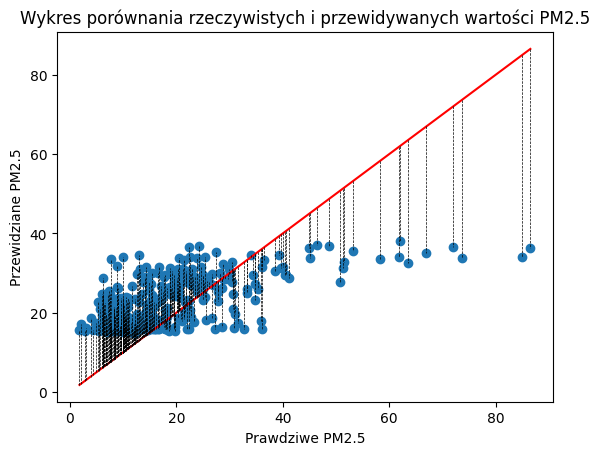

Średni błąd kwadratowy (MSE): 38.63675368096452
r2 score: -6.15%


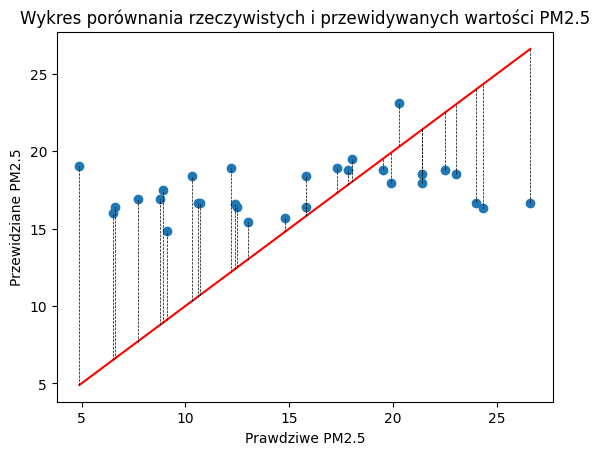

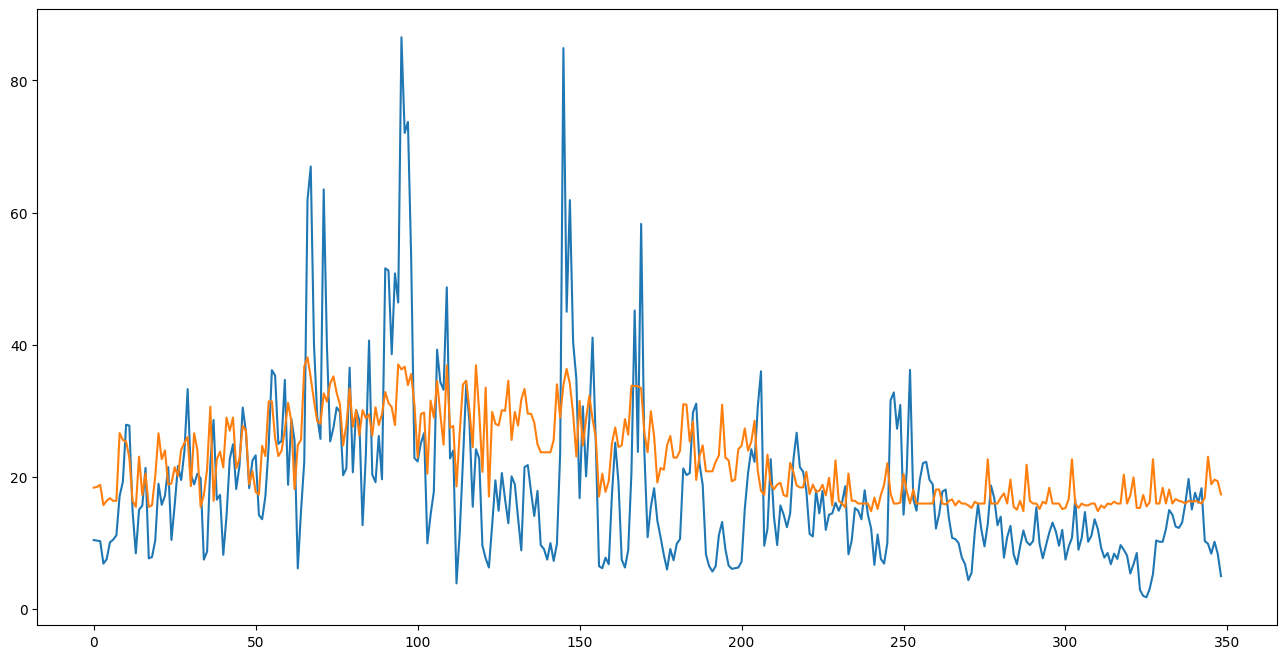

In [5]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt



model = RandomForestRegressor(**best_params,random_state=42)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Średni błąd kwadratowy (MSE): {mse}")
percent_match = r2 * 100
print(f"r2 score: {percent_match:.2f}%")

y_test = y_test.reset_index(drop=True)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], 'r', label='y=x')
plt.scatter(y_test, y_pred)
for i in range(len(y_test)):
    plt.plot([y_test[i], y_test[i]], [y_test[i], y_pred[i]], 'k--', lw=0.5)
plt.xlabel("Prawdziwe PM2.5")
plt.ylabel("Przewidziane PM2.5")
plt.title("Wykres porównania rzeczywistych i przewidywanych wartości PM2.5")
plt.show()

results = pd.DataFrame({'Rzeczywiste wartości (y_test)': y_test, 'Przewidywane wartości (y_pred)': y_pred})
results['Różnica'] = results['Rzeczywiste wartości (y_test)'] - results['Przewidywane wartości (y_pred)']
results


model_data_test = pd.read_csv("../../przygotowanie_danych/model_data_test.csv")
model_data_test.index = pd.RangeIndex(start=3487, stop=3517, step=1)
model_data_test
X_test_test = model_data_test[["temperatura", "suma opadów", "wilgotność", "prędkość wiatru", "zachmurzenine", "day_number_in_year"]]
y_test_test = model_data_test['PM2.5']

y_pred_test = model.predict(X_test_test)
mse = mean_squared_error(y_test_test, y_pred_test)
r2 = r2_score(y_test_test, y_pred_test)

print(f"Średni błąd kwadratowy (MSE): {mse}")
percent_match = r2 * 100
print(f"r2 score: {percent_match:.2f}%")

y_test_test = y_test_test.reset_index(drop=True)
plt.plot([min(y_test_test), max(y_test_test)], [min(y_test_test), max(y_test_test)], 'r', label='y=x')
plt.scatter(y_test_test, y_pred_test)
for i in range(len(y_test_test)):
    plt.plot([y_test_test[i], y_test_test[i]], [y_test_test[i], y_pred_test[i]], 'k--', lw=0.5)
plt.xlabel("Prawdziwe PM2.5")
plt.ylabel("Przewidziane PM2.5")
plt.title("Wykres porównania rzeczywistych i przewidywanych wartości PM2.5")
plt.show()


plt.figure(figsize=[16,8])
plt.plot(y_test)
plt.plot(y_pred)
plt.show()


In [6]:

results = pd.DataFrame({'Rzeczywiste wartości (y_test)': y_test_test, 'Przewidywane wartości (y_pred)': y_pred_test})
results['Różnica'] = results['Rzeczywiste wartości (y_test)'] - results['Przewidywane wartości (y_pred)']
results


,Rzeczywiste wartości (y_test),Przewidywane wartości (y_pred),Różnica
0,9.1,14.832623,-5.732623
1,10.3,18.390700,-8.090700
2,12.4,16.569900,-4.169900
3,12.5,16.387623,-3.887623
4,15.8,18.381823,-2.581823
5,17.8,18.786438,-0.986438
6,23.0,18.512623,4.487377
7,21.4,17.960315,3.439685
8,24.0,16.661438,7.338562
9,22.5,18.786438,3.713562


In [7]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split
import pandas as pd
from sklearn.preprocessing import StandardScaler,MinMaxScaler

model_data = pd.read_csv("../../przygotowanie_danych/model_data.csv")
X = model_data[["temperatura", "suma opadów", "wilgotność", "prędkość wiatru", "zachmurzenine", "day_number_in_year"]]
y = model_data['PM2.5']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.002,random_state=42)

In [9]:
import optuna
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score, mean_squared_error



def objective(trial):
    n_estimators = trial.suggest_int('n_estimators', 1, 1000)
    max_depth = trial.suggest_int('max_depth', 1, 2500)
    min_samples_split = trial.suggest_int('min_samples_split', 2, 100)
    min_samples_leaf = trial.suggest_int('min_samples_leaf', 1, 100)
    max_features = trial.suggest_float('max_features', 0.1, 1.0)
    min_weight_fraction_leaf = trial.suggest_float('min_weight_fraction_leaf', 0.0, 0.5)

    # Additional parameters
    criterion = trial.suggest_categorical('criterion',  {'friedman_mse', 'squared_error', 'poisson', 'absolute_error'})
    max_leaf_nodes = trial.suggest_int('max_leaf_nodes', 10, 100)
    min_impurity_decrease = trial.suggest_float('min_impurity_decrease', 0.0, 0.1)
    verbose = trial.suggest_categorical('verbose', [0, 1, 2])
    ccp_alpha = trial.suggest_float('ccp_alpha', 0.0, 0.5)
  

    model = RandomForestRegressor(
        n_estimators=n_estimators,
        criterion=criterion,
        max_depth=max_depth,
        min_samples_split=min_samples_split,
        min_samples_leaf=min_samples_leaf,
        min_weight_fraction_leaf=min_weight_fraction_leaf,
        max_features=max_features,
        max_leaf_nodes=max_leaf_nodes,
        min_impurity_decrease=min_impurity_decrease,
        bootstrap=False,
        n_jobs=-1,
        random_state=42,
        verbose=verbose,
        ccp_alpha=ccp_alpha,
        max_samples=None

    )
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    return mse

study = optuna.create_study(direction='minimize') 
improvement_threshold = 0.001
stale_count = 0

best_mse = float('inf')

mse_values = []

for _ in range(11000):
    study.optimize(objective, n_trials=1)

    if study.best_value < best_mse:
        best_mse = study.best_value
        stale_count = 0
    else:
        stale_count += 1

    mse_values.append(best_mse)

    if stale_count >= 300 or best_mse <= improvement_threshold:
        break

best_params = study.best_params
best_mse = study.best_value

print("Best Parameters=", best_params)
print("Best Mean Squared Error=", best_mse)



[I 2023-11-24 14:23:49,712] A new study created in memory with name: no-name-22dde7bc-1c74-4390-b35b-d28b44f03028
[I 2023-11-24 14:23:49,870] Trial 0 finished with value: 486.23295479031077 and parameters: {'n_estimators': 145, 'max_depth': 1172, 'min_samples_split': 27, 'min_samples_leaf': 30, 'max_features': 0.34289526300013085, 'min_weight_fraction_leaf': 0.2515740766582736, 'criterion': 'squared_error', 'max_leaf_nodes': 74, 'min_impurity_decrease': 0.060327361200725266, 'verbose': 0, 'ccp_alpha': 0.08357325065267152}. Best is trial 0 with value: 486.23295479031077.
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  17 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done 138 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done 257 out of 257 | elapsed:    0.0s finished
[Parallel(n_jobs=12)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done  17 tasks      | elapsed:    0.0s
[P

building tree 1 of 257building tree 2 of 257
building tree 3 of 257

building tree 4 of 257
building tree 5 of 257
building tree 6 of 257
building tree 7 of 257
building tree 8 of 257
building tree 9 of 257
building tree 10 of 257
building tree 11 of 257
building tree 12 of 257
building tree 13 of 257
building tree 14 of 257
building tree 15 of 257
building tree 16 of 257
building tree 17 of 257
building tree 18 of 257
building tree 19 of 257
building tree 20 of 257
building tree 21 of 257
building tree 22 of 257
building tree 23 of 257
building tree 24 of 257
building tree 25 of 257
building tree 26 of 257
building tree 27 of 257
building tree 28 of 257
building tree 29 of 257
building tree 30 of 257
building tree 31 of 257
building tree 32 of 257
building tree 33 of 257
building tree 34 of 257
building tree 35 of 257
building tree 36 of 257
building tree 37 of 257
building tree 38 of 257
building tree 39 of 257
building tree 40 of 257
building tree 41 of 257
building tree 42 of 257
b

[I 2023-11-24 14:23:50,302] Trial 2 finished with value: 530.8064016704267 and parameters: {'n_estimators': 212, 'max_depth': 1085, 'min_samples_split': 46, 'min_samples_leaf': 66, 'max_features': 0.9099476418493732, 'min_weight_fraction_leaf': 0.24783199998541627, 'criterion': 'poisson', 'max_leaf_nodes': 76, 'min_impurity_decrease': 0.07110319690622284, 'verbose': 0, 'ccp_alpha': 0.08716729384841576}. Best is trial 1 with value: 357.2331755126506.
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  26 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done 176 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done 206 out of 206 | elapsed:    0.0s finished
[Parallel(n_jobs=12)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done  26 tasks      | elapsed:    0.0s
[Parallel(n_jobs=12)]: Done 176 tasks      | elapsed:    0.0s
[Parallel(n_jobs=12)]: Done 206 out of 206 | elapsed:    0.0s f

building tree 1 of 639
building tree 2 of 639
building tree 3 of 639
building tree 4 of 639
building tree 5 of 639
building tree 6 of 639
building tree 7 of 639
building tree 8 of 639
building tree 9 of 639
building tree 10 of 639
building tree 11 of 639
building tree 12 of 639
building tree 13 of 639
building tree 14 of 639
building tree 15 of 639
building tree 16 of 639
building tree 17 of 639
building tree 18 of 639
building tree 19 of 639
building tree 20 of 639
building tree 21 of 639
building tree 22 of 639
building tree 23 of 639
building tree 24 of 639
building tree 25 of 639
building tree 26 of 639
building tree 27 of 639
building tree 28 of 639
building tree 29 of 639
building tree 30 of 639
building tree 31 of 639
building tree 32 of 639
building tree 33 of 639
building tree 34 of 639
building tree 35 of 639
building tree 36 of 639
building tree 37 of 639
building tree 38 of 639
building tree 39 of 639
building tree 40 of 639
building tree 41 of 639
building tree 42 of 639
b

[Parallel(n_jobs=-1)]: Done 341 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done 639 out of 639 | elapsed:    0.3s finished
[Parallel(n_jobs=12)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done  17 tasks      | elapsed:    0.0s
[Parallel(n_jobs=12)]: Done 138 tasks      | elapsed:    0.0s
[Parallel(n_jobs=12)]: Done 341 tasks      | elapsed:    0.0s


building tree 360 of 639
building tree 361 of 639
building tree 362 of 639
building tree 363 of 639
building tree 364 of 639
building tree 365 of 639
building tree 366 of 639
building tree 367 of 639
building tree 368 of 639
building tree 369 of 639
building tree 370 of 639
building tree 371 of 639
building tree 372 of 639
building tree 373 of 639
building tree 374 of 639
building tree 375 of 639
building tree 376 of 639
building tree 377 of 639
building tree 378 of 639
building tree 379 of 639
building tree 380 of 639
building tree 381 of 639
building tree 382 of 639
building tree 383 of 639
building tree 384 of 639
building tree 385 of 639
building tree 386 of 639
building tree 387 of 639
building tree 388 of 639
building tree 389 of 639
building tree 390 of 639
building tree 391 of 639
building tree 392 of 639
building tree 393 of 639
building tree 394 of 639
building tree 395 of 639
building tree 396 of 639
building tree 397 of 639
building tree 398 of 639
building tree 399 of 639


[Parallel(n_jobs=12)]: Done 639 out of 639 | elapsed:    0.0s finished
[I 2023-11-24 14:23:51,270] Trial 5 finished with value: 545.7186561336437 and parameters: {'n_estimators': 639, 'max_depth': 976, 'min_samples_split': 7, 'min_samples_leaf': 36, 'max_features': 0.9278132746931202, 'min_weight_fraction_leaf': 0.20124517886216836, 'criterion': 'squared_error', 'max_leaf_nodes': 40, 'min_impurity_decrease': 0.0380216883122978, 'verbose': 2, 'ccp_alpha': 0.020108202935475772}. Best is trial 1 with value: 357.2331755126506.
[I 2023-11-24 14:23:51,343] Trial 6 finished with value: 597.0360821892763 and parameters: {'n_estimators': 59, 'max_depth': 848, 'min_samples_split': 63, 'min_samples_leaf': 28, 'max_features': 0.13160778035496648, 'min_weight_fraction_leaf': 0.48406841120446886, 'criterion': 'squared_error', 'max_leaf_nodes': 27, 'min_impurity_decrease': 0.007955830427322263, 'verbose': 0, 'ccp_alpha': 0.09999874033529604}. Best is trial 1 with value: 357.2331755126506.
[Parallel(n

building tree 1 of 698building tree 2 of 698
building tree 3 of 698

building tree 4 of 698
building tree 5 of 698
building tree 6 of 698
building tree 7 of 698
building tree 8 of 698
building tree 9 of 698
building tree 10 of 698
building tree 11 of 698
building tree 12 of 698
building tree 13 of 698
building tree 14 of 698
building tree 15 of 698
building tree 16 of 698
building tree 17 of 698
building tree 18 of 698
building tree 19 of 698
building tree 20 of 698
building tree 21 of 698
building tree 22 of 698
building tree 23 of 698
building tree 24 of 698
building tree 25 of 698
building tree 26 of 698
building tree 27 of 698
building tree 28 of 698
building tree 29 of 698
building tree 30 of 698
building tree 31 of 698
building tree 32 of 698
building tree 33 of 698
building tree 34 of 698
building tree 35 of 698
building tree 36 of 698
building tree 37 of 698
building tree 38 of 698
building tree 39 of 698
building tree 40 of 698
building tree 41 of 698
building tree 42 of 698
b

[Parallel(n_jobs=-1)]: Done 624 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-1)]: Done 698 out of 698 | elapsed:    0.3s finished
[Parallel(n_jobs=12)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done  17 tasks      | elapsed:    0.0s
[Parallel(n_jobs=12)]: Done 138 tasks      | elapsed:    0.0s
[Parallel(n_jobs=12)]: Done 341 tasks      | elapsed:    0.0s
[Parallel(n_jobs=12)]: Done 624 tasks      | elapsed:    0.0s
[Parallel(n_jobs=12)]: Done 698 out of 698 | elapsed:    0.0s finished
[I 2023-11-24 14:23:53,278] Trial 8 finished with value: 552.8232444544944 and parameters: {'n_estimators': 698, 'max_depth': 1019, 'min_samples_split': 42, 'min_samples_leaf': 3, 'max_features': 0.473847279772562, 'min_weight_fraction_leaf': 0.44774213323258266, 'criterion': 'friedman_mse', 'max_leaf_nodes': 25, 'min_impurity_decrease': 0.02401149851870157, 'verbose': 2, 'ccp_alpha': 0.45678946931740433}. Best is trial 1 with value: 357.2331755126506.


building tree 398 of 698
building tree 399 of 698
building tree 400 of 698
building tree 401 of 698
building tree 402 of 698
building tree 403 of 698
building tree 404 of 698
building tree 405 of 698
building tree 406 of 698
building tree 407 of 698
building tree 408 of 698
building tree 409 of 698
building tree 410 of 698
building tree 411 of 698
building tree 412 of 698
building tree 413 of 698
building tree 414 of 698
building tree 415 of 698
building tree 416 of 698
building tree 417 of 698
building tree 418 of 698
building tree 419 of 698
building tree 420 of 698
building tree 421 of 698
building tree 422 of 698
building tree 423 of 698
building tree 424 of 698
building tree 425 of 698
building tree 426 of 698
building tree 427 of 698
building tree 428 of 698
building tree 429 of 698
building tree 430 of 698
building tree 431 of 698
building tree 432 of 698
building tree 433 of 698
building tree 434 of 698
building tree 435 of 698
building tree 436 of 698
building tree 437 of 698


[I 2023-11-24 14:23:55,050] Trial 9 finished with value: 673.3023804317816 and parameters: {'n_estimators': 242, 'max_depth': 1768, 'min_samples_split': 59, 'min_samples_leaf': 63, 'max_features': 0.5799546893966039, 'min_weight_fraction_leaf': 0.49654283329291954, 'criterion': 'absolute_error', 'max_leaf_nodes': 100, 'min_impurity_decrease': 0.024240389479633362, 'verbose': 0, 'ccp_alpha': 0.0783576483411163}. Best is trial 1 with value: 357.2331755126506.
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  17 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done 138 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done 341 tasks      | elapsed:    0.1s


building tree 1 of 935
building tree 2 of 935
building tree 3 of 935
building tree 4 of 935
building tree 5 of 935
building tree 6 of 935
building tree 7 of 935
building tree 8 of 935
building tree 9 of 935
building tree 10 of 935
building tree 11 of 935
building tree 12 of 935
building tree 13 of 935
building tree 14 of 935
building tree 15 of 935
building tree 16 of 935
building tree 17 of 935
building tree 18 of 935
building tree 19 of 935
building tree 20 of 935
building tree 21 of 935
building tree 22 of 935
building tree 23 of 935
building tree 24 of 935
building tree 25 of 935
building tree 26 of 935
building tree 27 of 935
building tree 28 of 935
building tree 29 of 935
building tree 30 of 935
building tree 31 of 935
building tree 32 of 935
building tree 33 of 935
building tree 34 of 935
building tree 35 of 935
building tree 36 of 935
building tree 37 of 935
building tree 38 of 935
building tree 39 of 935
building tree 40 of 935
building tree 41 of 935
building tree 42 of 935
b

[Parallel(n_jobs=-1)]: Done 624 tasks      | elapsed:    0.3s
[Parallel(n_jobs=-1)]: Done 935 out of 935 | elapsed:    0.4s finished
[Parallel(n_jobs=12)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done  17 tasks      | elapsed:    0.0s
[Parallel(n_jobs=12)]: Done 138 tasks      | elapsed:    0.0s
[Parallel(n_jobs=12)]: Done 341 tasks      | elapsed:    0.0s
[Parallel(n_jobs=12)]: Done 624 tasks      | elapsed:    0.0s
[Parallel(n_jobs=12)]: Done 935 out of 935 | elapsed:    0.0s finished
[I 2023-11-24 14:23:55,875] Trial 10 finished with value: 229.67219637640068 and parameters: {'n_estimators': 935, 'max_depth': 62, 'min_samples_split': 100, 'min_samples_leaf': 95, 'max_features': 0.354548679127343, 'min_weight_fraction_leaf': 0.0033634094464078043, 'criterion': 'friedman_mse', 'max_leaf_nodes': 10, 'min_impurity_decrease': 0.09972874651693535, 'verbose': 2, 'ccp_alpha': 0.48782397905135993}. Best is trial 10 with value: 229.67219637640068.


building tree 795 of 935
building tree 796 of 935
building tree 797 of 935
building tree 798 of 935
building tree 799 of 935
building tree 800 of 935
building tree 801 of 935
building tree 802 of 935
building tree 803 of 935
building tree 804 of 935
building tree 805 of 935
building tree 806 of 935
building tree 807 of 935
building tree 808 of 935
building tree 809 of 935
building tree 810 of 935
building tree 811 of 935
building tree 812 of 935
building tree 813 of 935
building tree 814 of 935
building tree 815 of 935
building tree 816 of 935
building tree 817 of 935
building tree 818 of 935
building tree 819 of 935
building tree 820 of 935
building tree 821 of 935
building tree 822 of 935
building tree 823 of 935
building tree 824 of 935
building tree 825 of 935
building tree 826 of 935
building tree 827 of 935
building tree 828 of 935
building tree 829 of 935
building tree 830 of 935
building tree 831 of 935
building tree 832 of 935
building tree 833 of 935
building tree 834 of 935


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  17 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done 138 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done 341 tasks      | elapsed:    0.1s


building tree 1 of 939building tree 2 of 939
building tree 3 of 939
building tree 4 of 939
building tree 5 of 939

building tree 6 of 939
building tree 7 of 939
building tree 8 of 939
building tree 9 of 939
building tree 10 of 939
building tree 11 of 939
building tree 12 of 939
building tree 13 of 939
building tree 14 of 939
building tree 15 of 939
building tree 16 of 939
building tree 17 of 939
building tree 18 of 939
building tree 19 of 939
building tree 20 of 939
building tree 21 of 939
building tree 22 of 939
building tree 23 of 939
building tree 24 of 939
building tree 25 of 939
building tree 26 of 939
building tree 27 of 939
building tree 28 of 939
building tree 29 of 939
building tree 30 of 939
building tree 31 of 939
building tree 32 of 939
building tree 33 of 939
building tree 34 of 939
building tree 35 of 939
building tree 36 of 939
building tree 37 of 939
building tree 38 of 939
building tree 39 of 939
building tree 40 of 939
building tree 41 of 939
building tree 42 of 939
b

[Parallel(n_jobs=-1)]: Done 624 tasks      | elapsed:    0.3s
[Parallel(n_jobs=-1)]: Done 939 out of 939 | elapsed:    0.4s finished
[Parallel(n_jobs=12)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done  17 tasks      | elapsed:    0.0s
[Parallel(n_jobs=12)]: Done 138 tasks      | elapsed:    0.0s
[Parallel(n_jobs=12)]: Done 341 tasks      | elapsed:    0.0s
[Parallel(n_jobs=12)]: Done 624 tasks      | elapsed:    0.0s
[Parallel(n_jobs=12)]: Done 939 out of 939 | elapsed:    0.0s finished
[I 2023-11-24 14:23:56,704] Trial 11 finished with value: 225.03299905521843 and parameters: {'n_estimators': 939, 'max_depth': 57, 'min_samples_split': 100, 'min_samples_leaf': 100, 'max_features': 0.3431027378953573, 'min_weight_fraction_leaf': 0.0285222947188868, 'criterion': 'friedman_mse', 'max_leaf_nodes': 10, 'min_impurity_decrease': 0.09738415484009375, 'verbose': 2, 'ccp_alpha': 0.497970051189255}. Best is trial 11 with value: 225.03299905521843.


building tree 827 of 939building tree 828 of 939
building tree 829 of 939

building tree 830 of 939
building tree 831 of 939
building tree 832 of 939
building tree 833 of 939
building tree 834 of 939
building tree 835 of 939
building tree 836 of 939
building tree 837 of 939
building tree 838 of 939
building tree 839 of 939
building tree 840 of 939
building tree 841 of 939
building tree 842 of 939
building tree 843 of 939
building tree 844 of 939
building tree 845 of 939
building tree 846 of 939
building tree 847 of 939
building tree 848 of 939
building tree 849 of 939
building tree 850 of 939
building tree 851 of 939
building tree 852 of 939
building tree 853 of 939
building tree 854 of 939
building tree 855 of 939
building tree 856 of 939
building tree 857 of 939
building tree 858 of 939
building tree 859 of 939
building tree 860 of 939
building tree 861 of 939
building tree 862 of 939
building tree 863 of 939
building tree 864 of 939
building tree 865 of 939
building tree 866 of 939


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  17 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done 138 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done 341 tasks      | elapsed:    0.1s


building tree 1 of 973
building tree 2 of 973
building tree 3 of 973
building tree 4 of 973
building tree 5 of 973
building tree 6 of 973
building tree 7 of 973
building tree 8 of 973
building tree 9 of 973
building tree 10 of 973
building tree 11 of 973
building tree 12 of 973
building tree 13 of 973
building tree 14 of 973
building tree 15 of 973
building tree 16 of 973
building tree 17 of 973
building tree 18 of 973
building tree 19 of 973
building tree 20 of 973
building tree 21 of 973
building tree 22 of 973
building tree 23 of 973
building tree 24 of 973
building tree 25 of 973
building tree 26 of 973
building tree 27 of 973
building tree 28 of 973
building tree 29 of 973
building tree 30 of 973
building tree 31 of 973
building tree 32 of 973
building tree 33 of 973
building tree 34 of 973
building tree 35 of 973
building tree 36 of 973
building tree 37 of 973
building tree 38 of 973
building tree 39 of 973
building tree 40 of 973
building tree 41 of 973
building tree 42 of 973
b

[Parallel(n_jobs=-1)]: Done 624 tasks      | elapsed:    0.3s
[Parallel(n_jobs=-1)]: Done 973 out of 973 | elapsed:    0.4s finished
[Parallel(n_jobs=12)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done  17 tasks      | elapsed:    0.0s
[Parallel(n_jobs=12)]: Done 138 tasks      | elapsed:    0.0s
[Parallel(n_jobs=12)]: Done 341 tasks      | elapsed:    0.0s


building tree 742 of 973
building tree 743 of 973
building tree 744 of 973
building tree 745 of 973
building tree 746 of 973
building tree 747 of 973
building tree 748 of 973
building tree 749 of 973
building tree 750 of 973
building tree 751 of 973
building tree 752 of 973
building tree 753 of 973
building tree 754 of 973
building tree 755 of 973
building tree 756 of 973
building tree 757 of 973
building tree 758 of 973
building tree 759 of 973
building tree 760 of 973
building tree 761 of 973
building tree 762 of 973
building tree 763 of 973
building tree 764 of 973
building tree 765 of 973
building tree 766 of 973
building tree 767 of 973
building tree 768 of 973
building tree 769 of 973
building tree 770 of 973
building tree 771 of 973
building tree 772 of 973
building tree 773 of 973
building tree 774 of 973
building tree 775 of 973
building tree 776 of 973
building tree 777 of 973
building tree 778 of 973
building tree 779 of 973
building tree 780 of 973
building tree 781 of 973


[Parallel(n_jobs=12)]: Done 624 tasks      | elapsed:    0.0s
[Parallel(n_jobs=12)]: Done 973 out of 973 | elapsed:    0.0s finished
[I 2023-11-24 14:23:57,603] Trial 12 finished with value: 225.36738789485307 and parameters: {'n_estimators': 973, 'max_depth': 6, 'min_samples_split': 100, 'min_samples_leaf': 100, 'max_features': 0.38410892007282305, 'min_weight_fraction_leaf': 0.014031809608476609, 'criterion': 'friedman_mse', 'max_leaf_nodes': 10, 'min_impurity_decrease': 0.09938281101483035, 'verbose': 2, 'ccp_alpha': 0.4844605498808385}. Best is trial 11 with value: 225.03299905521843.
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  17 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done 138 tasks      | elapsed:    0.0s


building tree 1 of 973
building tree 2 of 973
building tree 3 of 973
building tree 4 of 973
building tree 5 of 973
building tree 6 of 973
building tree 7 of 973
building tree 8 of 973
building tree 9 of 973
building tree 10 of 973
building tree 11 of 973
building tree 12 of 973
building tree 13 of 973
building tree 14 of 973
building tree 15 of 973
building tree 16 of 973
building tree 17 of 973
building tree 18 of 973
building tree 19 of 973
building tree 20 of 973
building tree 21 of 973
building tree 22 of 973
building tree 23 of 973
building tree 24 of 973
building tree 25 of 973
building tree 26 of 973
building tree 27 of 973
building tree 28 of 973
building tree 29 of 973
building tree 30 of 973
building tree 31 of 973
building tree 32 of 973
building tree 33 of 973
building tree 34 of 973
building tree 35 of 973
building tree 36 of 973
building tree 37 of 973
building tree 38 of 973
building tree 39 of 973
building tree 40 of 973
building tree 41 of 973
building tree 42 of 973
b

[Parallel(n_jobs=-1)]: Done 341 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done 624 tasks      | elapsed:    0.3s
[Parallel(n_jobs=-1)]: Done 973 out of 973 | elapsed:    0.5s finished
[Parallel(n_jobs=12)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done  17 tasks      | elapsed:    0.0s
[Parallel(n_jobs=12)]: Done 138 tasks      | elapsed:    0.0s
[Parallel(n_jobs=12)]: Done 341 tasks      | elapsed:    0.0s
[Parallel(n_jobs=12)]: Done 624 tasks      | elapsed:    0.0s
[Parallel(n_jobs=12)]: Done 973 out of 973 | elapsed:    0.0s finished
[I 2023-11-24 14:23:58,506] Trial 13 finished with value: 249.87988008713327 and parameters: {'n_estimators': 973, 'max_depth': 3, 'min_samples_split': 81, 'min_samples_leaf': 82, 'max_features': 0.5536846879290149, 'min_weight_fraction_leaf': 0.018581880889091795, 'criterion': 'friedman_mse', 'max_leaf_nodes': 10, 'min_impurity_decrease': 0.09960174435938936, 'verbose': 2, 'ccp_alpha': 0.427318859699

building tree 727 of 973building tree 728 of 973

building tree 729 of 973
building tree 730 of 973
building tree 731 of 973
building tree 732 of 973
building tree 733 of 973
building tree 734 of 973
building tree 735 of 973
building tree 736 of 973
building tree 737 of 973
building tree 738 of 973
building tree 739 of 973
building tree 740 of 973
building tree 741 of 973
building tree 742 of 973
building tree 743 of 973
building tree 744 of 973
building tree 745 of 973
building tree 746 of 973
building tree 747 of 973
building tree 748 of 973
building tree 749 of 973
building tree 750 of 973
building tree 751 of 973
building tree 752 of 973
building tree 753 of 973
building tree 754 of 973
building tree 755 of 973
building tree 756 of 973
building tree 757 of 973
building tree 758 of 973
building tree 759 of 973
building tree 760 of 973
building tree 761 of 973
building tree 762 of 973
building tree 763 of 973
building tree 764 of 973
building tree 765 of 973
building tree 766 of 973


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  17 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done 138 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done 341 tasks      | elapsed:    0.1s


building tree 1 of 782
building tree 2 of 782
building tree 3 of 782
building tree 4 of 782
building tree 5 of 782
building tree 6 of 782
building tree 7 of 782
building tree 8 of 782
building tree 9 of 782
building tree 10 of 782
building tree 11 of 782
building tree 12 of 782
building tree 13 of 782
building tree 14 of 782
building tree 15 of 782
building tree 16 of 782
building tree 17 of 782
building tree 18 of 782
building tree 19 of 782
building tree 20 of 782
building tree 21 of 782
building tree 22 of 782
building tree 23 of 782
building tree 24 of 782
building tree 25 of 782
building tree 26 of 782
building tree 27 of 782
building tree 28 of 782
building tree 29 of 782
building tree 30 of 782
building tree 31 of 782
building tree 32 of 782
building tree 33 of 782
building tree 34 of 782
building tree 35 of 782
building tree 36 of 782
building tree 37 of 782
building tree 38 of 782
building tree 39 of 782
building tree 40 of 782
building tree 41 of 782
building tree 42 of 782
b

[Parallel(n_jobs=-1)]: Done 624 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-1)]: Done 782 out of 782 | elapsed:    0.3s finished
[Parallel(n_jobs=12)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done  17 tasks      | elapsed:    0.0s
[Parallel(n_jobs=12)]: Done 138 tasks      | elapsed:    0.0s
[Parallel(n_jobs=12)]: Done 341 tasks      | elapsed:    0.0s
[Parallel(n_jobs=12)]: Done 624 tasks      | elapsed:    0.0s
[Parallel(n_jobs=12)]: Done 782 out of 782 | elapsed:    0.0s finished
[I 2023-11-24 14:23:59,214] Trial 14 finished with value: 360.5027421394829 and parameters: {'n_estimators': 782, 'max_depth': 564, 'min_samples_split': 84, 'min_samples_leaf': 100, 'max_features': 0.40746527212028966, 'min_weight_fraction_leaf': 0.11549738749931729, 'criterion': 'friedman_mse', 'max_leaf_nodes': 17, 'min_impurity_decrease': 0.08778108821780022, 'verbose': 2, 'ccp_alpha': 0.4963212791724336}. Best is trial 11 with value: 225.03299905521843.


building tree 727 of 782
building tree 728 of 782
building tree 729 of 782
building tree 730 of 782
building tree 731 of 782
building tree 732 of 782
building tree 733 of 782
building tree 734 of 782
building tree 735 of 782
building tree 736 of 782
building tree 737 of 782
building tree 738 of 782
building tree 739 of 782
building tree 740 of 782
building tree 741 of 782
building tree 742 of 782
building tree 743 of 782
building tree 744 of 782
building tree 745 of 782
building tree 746 of 782
building tree 747 of 782
building tree 748 of 782
building tree 749 of 782
building tree 750 of 782
building tree 751 of 782
building tree 752 of 782
building tree 753 of 782
building tree 754 of 782
building tree 755 of 782
building tree 756 of 782
building tree 757 of 782
building tree 758 of 782
building tree 759 of 782
building tree 760 of 782
building tree 761 of 782
building tree 762 of 782
building tree 763 of 782
building tree 764 of 782
building tree 765 of 782
building tree 766 of 782


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  17 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done 138 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done 341 tasks      | elapsed:    0.1s


building tree 1 of 841
building tree 2 of 841
building tree 3 of 841
building tree 4 of 841
building tree 5 of 841
building tree 6 of 841
building tree 7 of 841
building tree 8 of 841
building tree 9 of 841
building tree 10 of 841
building tree 11 of 841
building tree 12 of 841
building tree 13 of 841
building tree 14 of 841
building tree 15 of 841
building tree 16 of 841
building tree 17 of 841
building tree 18 of 841
building tree 19 of 841
building tree 20 of 841
building tree 21 of 841
building tree 22 of 841
building tree 23 of 841
building tree 24 of 841
building tree 25 of 841
building tree 26 of 841
building tree 27 of 841
building tree 28 of 841
building tree 29 of 841
building tree 30 of 841
building tree 31 of 841
building tree 32 of 841
building tree 33 of 841
building tree 34 of 841
building tree 35 of 841
building tree 36 of 841
building tree 37 of 841
building tree 38 of 841
building tree 39 of 841
building tree 40 of 841
building tree 41 of 841
building tree 42 of 841
b

[Parallel(n_jobs=-1)]: Done 624 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-1)]: Done 841 out of 841 | elapsed:    0.3s finished
[Parallel(n_jobs=12)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done  17 tasks      | elapsed:    0.0s
[Parallel(n_jobs=12)]: Done 138 tasks      | elapsed:    0.0s
[Parallel(n_jobs=12)]: Done 341 tasks      | elapsed:    0.0s
[Parallel(n_jobs=12)]: Done 624 tasks      | elapsed:    0.0s
[Parallel(n_jobs=12)]: Done 841 out of 841 | elapsed:    0.0s finished
[I 2023-11-24 14:23:59,896] Trial 15 finished with value: 421.9966785839755 and parameters: {'n_estimators': 841, 'max_depth': 1563, 'min_samples_split': 80, 'min_samples_leaf': 79, 'max_features': 0.2673861119868549, 'min_weight_fraction_leaf': 0.12917879369682955, 'criterion': 'friedman_mse', 'max_leaf_nodes': 52, 'min_impurity_decrease': 0.08583608072644845, 'verbose': 2, 'ccp_alpha': 0.4118352808450117}. Best is trial 11 with value: 225.03299905521843.
[Para

building tree 1 of 492
building tree 2 of 492
building tree 3 of 492
building tree 4 of 492
building tree 5 of 492
building tree 6 of 492
building tree 7 of 492
building tree 8 of 492
building tree 9 of 492
building tree 10 of 492
building tree 11 of 492
building tree 12 of 492
building tree 13 of 492
building tree 14 of 492
building tree 15 of 492
building tree 16 of 492
building tree 17 of 492
building tree 18 of 492
building tree 19 of 492
building tree 20 of 492
building tree 21 of 492
building tree 22 of 492
building tree 23 of 492
building tree 24 of 492
building tree 25 of 492
building tree 26 of 492
building tree 27 of 492
building tree 28 of 492
building tree 29 of 492
building tree 30 of 492
building tree 31 of 492
building tree 32 of 492
building tree 33 of 492
building tree 34 of 492
building tree 35 of 492
building tree 36 of 492
building tree 37 of 492
building tree 38 of 492
building tree 39 of 492
building tree 40 of 492
building tree 41 of 492
building tree 42 of 492
b

[Parallel(n_jobs=-1)]: Done 341 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done 492 out of 492 | elapsed:    0.2s finished
[Parallel(n_jobs=12)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done  17 tasks      | elapsed:    0.0s
[Parallel(n_jobs=12)]: Done 138 tasks      | elapsed:    0.0s
[Parallel(n_jobs=12)]: Done 341 tasks      | elapsed:    0.0s
[Parallel(n_jobs=12)]: Done 492 out of 492 | elapsed:    0.0s finished
[I 2023-11-24 14:24:00,403] Trial 16 finished with value: 183.8075802795137 and parameters: {'n_estimators': 492, 'max_depth': 602, 'min_samples_split': 71, 'min_samples_leaf': 85, 'max_features': 0.4923682557075983, 'min_weight_fraction_leaf': 0.00828098145936254, 'criterion': 'friedman_mse', 'max_leaf_nodes': 36, 'min_impurity_decrease': 0.08441762658689156, 'verbose': 2, 'ccp_alpha': 0.49710549158548584}. Best is trial 16 with value: 183.8075802795137.


building tree 326 of 492
building tree 327 of 492
building tree 328 of 492
building tree 329 of 492
building tree 330 of 492
building tree 331 of 492
building tree 332 of 492
building tree 333 of 492
building tree 334 of 492
building tree 335 of 492
building tree 336 of 492
building tree 337 of 492
building tree 338 of 492
building tree 339 of 492
building tree 340 of 492
building tree 341 of 492
building tree 342 of 492
building tree 343 of 492
building tree 344 of 492
building tree 345 of 492
building tree 346 of 492
building tree 347 of 492
building tree 348 of 492
building tree 349 of 492
building tree 350 of 492
building tree 351 of 492
building tree 352 of 492
building tree 353 of 492
building tree 354 of 492
building tree 355 of 492
building tree 356 of 492
building tree 357 of 492
building tree 358 of 492
building tree 359 of 492
building tree 360 of 492
building tree 361 of 492
building tree 362 of 492
building tree 363 of 492
building tree 364 of 492
building tree 365 of 492b

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  26 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done 176 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done 426 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-1)]: Done 505 out of 505 | elapsed:    0.2s finished
[Parallel(n_jobs=12)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done  26 tasks      | elapsed:    0.0s
[Parallel(n_jobs=12)]: Done 176 tasks      | elapsed:    0.0s
[Parallel(n_jobs=12)]: Done 426 tasks      | elapsed:    0.0s
[Parallel(n_jobs=12)]: Done 505 out of 505 | elapsed:    0.0s finished
[I 2023-11-24 14:24:00,902] Trial 17 finished with value: 217.2110343722663 and parameters: {'n_estimators': 505, 'max_depth': 647, 'min_samples_split': 69, 'min_samples_leaf': 84, 'max_features': 0.6324533579589429, 'min_weight_fraction_leaf': 0.06166702216378034, 'criterion': 'friedman_mse', 'max_leaf_nodes': 37, 'min_

building tree 1 of 529
building tree 2 of 529
building tree 3 of 529
building tree 4 of 529
building tree 5 of 529
building tree 6 of 529
building tree 7 of 529
building tree 8 of 529
building tree 9 of 529
building tree 10 of 529
building tree 11 of 529
building tree 12 of 529
building tree 13 of 529
building tree 14 of 529
building tree 15 of 529
building tree 16 of 529
building tree 17 of 529
building tree 18 of 529
building tree 19 of 529
building tree 20 of 529
building tree 21 of 529
building tree 22 of 529
building tree 23 of 529
building tree 24 of 529
building tree 25 of 529
building tree 26 of 529
building tree 27 of 529
building tree 28 of 529
building tree 29 of 529
building tree 30 of 529
building tree 31 of 529
building tree 32 of 529
building tree 33 of 529
building tree 34 of 529
building tree 35 of 529
building tree 36 of 529
building tree 37 of 529
building tree 38 of 529
building tree 39 of 529
building tree 40 of 529
building tree 41 of 529
building tree 42 of 529
b

[Parallel(n_jobs=-1)]: Done 341 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-1)]: Done 529 out of 529 | elapsed:    0.4s finished
[Parallel(n_jobs=12)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done  17 tasks      | elapsed:    0.0s
[Parallel(n_jobs=12)]: Done 138 tasks      | elapsed:    0.0s
[Parallel(n_jobs=12)]: Done 341 tasks      | elapsed:    0.0s
[Parallel(n_jobs=12)]: Done 529 out of 529 | elapsed:    0.0s finished
[I 2023-11-24 14:24:37,528] Trial 57 finished with value: 117.00367479719239 and parameters: {'n_estimators': 529, 'max_depth': 1491, 'min_samples_split': 64, 'min_samples_leaf': 19, 'max_features': 0.8611447885808279, 'min_weight_fraction_leaf': 0.045104893677442956, 'criterion': 'squared_error', 'max_leaf_nodes': 87, 'min_impurity_decrease': 0.06474963751843352, 'verbose': 2, 'ccp_alpha': 0.317228180371587}. Best is trial 41 with value: 90.63314396979581.


building tree 494 of 529building tree 495 of 529
building tree 496 of 529

building tree 497 of 529
building tree 498 of 529
building tree 499 of 529
building tree 500 of 529
building tree 501 of 529
building tree 502 of 529
building tree 503 of 529
building tree 504 of 529
building tree 505 of 529
building tree 506 of 529
building tree 507 of 529
building tree 508 of 529
building tree 509 of 529
building tree 510 of 529
building tree 511 of 529
building tree 512 of 529
building tree 513 of 529
building tree 514 of 529
building tree 515 of 529
building tree 516 of 529
building tree 517 of 529
building tree 518 of 529
building tree 519 of 529
building tree 520 of 529
building tree 521 of 529
building tree 522 of 529
building tree 523 of 529
building tree 524 of 529
building tree 525 of 529
building tree 526 of 529
building tree 527 of 529
building tree 528 of 529
building tree 529 of 529


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  26 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done 176 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done 426 tasks      | elapsed:    0.4s
[Parallel(n_jobs=-1)]: Done 451 out of 451 | elapsed:    0.5s finished
[Parallel(n_jobs=12)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done  26 tasks      | elapsed:    0.0s
[Parallel(n_jobs=12)]: Done 176 tasks      | elapsed:    0.0s
[Parallel(n_jobs=12)]: Done 426 tasks      | elapsed:    0.0s
[Parallel(n_jobs=12)]: Done 451 out of 451 | elapsed:    0.0s finished
[I 2023-11-24 14:24:38,278] Trial 58 finished with value: 124.8978309538852 and parameters: {'n_estimators': 451, 'max_depth': 1771, 'min_samples_split': 76, 'min_samples_leaf': 25, 'max_features': 0.9214447068647034, 'min_weight_fraction_leaf': 0.01741604128486962, 'criterion': 'friedman_mse', 'max_leaf_nodes': 74, 'min

building tree 1 of 44
building tree 2 of 44
building tree 3 of 44
building tree 4 of 44
building tree 5 of 44
building tree 6 of 44
building tree 7 of 44
building tree 8 of 44
building tree 9 of 44
building tree 10 of 44
building tree 11 of 44
building tree 12 of 44
building tree 13 of 44
building tree 14 of 44
building tree 15 of 44
building tree 16 of 44
building tree 17 of 44
building tree 18 of 44
building tree 19 of 44
building tree 20 of 44
building tree 21 of 44
building tree 22 of 44
building tree 23 of 44
building tree 24 of 44
building tree 25 of 44
building tree 26 of 44
building tree 27 of 44
building tree 28 of 44
building tree 29 of 44
building tree 30 of 44
building tree 31 of 44
building tree 32 of 44
building tree 33 of 44
building tree 34 of 44
building tree 35 of 44
building tree 36 of 44
building tree 37 of 44
building tree 38 of 44
building tree 39 of 44
building tree 40 of 44
building tree 41 of 44
building tree 42 of 44
building tree 43 of 44
building tree 44 of 

[Parallel(n_jobs=-1)]: Done 146 out of 146 | elapsed:    0.0s finished
[Parallel(n_jobs=12)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done  26 tasks      | elapsed:    0.0s
[Parallel(n_jobs=12)]: Done 146 out of 146 | elapsed:    0.0s finished
[I 2023-11-24 14:24:40,952] Trial 67 finished with value: 324.5815253457599 and parameters: {'n_estimators': 146, 'max_depth': 1514, 'min_samples_split': 93, 'min_samples_leaf': 43, 'max_features': 0.8778813811832684, 'min_weight_fraction_leaf': 0.10449378246716731, 'criterion': 'friedman_mse', 'max_leaf_nodes': 26, 'min_impurity_decrease': 0.07501674846302682, 'verbose': 1, 'ccp_alpha': 0.4056595314260931}. Best is trial 41 with value: 90.63314396979581.
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  26 tasks      | elapsed:    0.7s
[Parallel(n_jobs=-1)]: Done 176 tasks      | elapsed:    4.4s
[Parallel(n_jobs=-1)]: Done 288 out of 288 | ela

building tree 1 of 358building tree 2 of 358
building tree 3 of 358
building tree 4 of 358
building tree 5 of 358

building tree 6 of 358
building tree 7 of 358
building tree 8 of 358
building tree 9 of 358
building tree 10 of 358
building tree 11 of 358
building tree 12 of 358
building tree 13 of 358
building tree 14 of 358
building tree 15 of 358
building tree 16 of 358
building tree 17 of 358
building tree 18 of 358
building tree 19 of 358
building tree 20 of 358
building tree 21 of 358
building tree 22 of 358
building tree 23 of 358
building tree 24 of 358
building tree 25 of 358
building tree 26 of 358
building tree 27 of 358
building tree 28 of 358
building tree 29 of 358
building tree 30 of 358
building tree 31 of 358
building tree 32 of 358
building tree 33 of 358
building tree 34 of 358
building tree 35 of 358
building tree 36 of 358
building tree 37 of 358
building tree 38 of 358
building tree 39 of 358
building tree 40 of 358
building tree 41 of 358
building tree 42 of 358
b

[Parallel(n_jobs=-1)]: Done 358 out of 358 | elapsed:    0.3s finished
[Parallel(n_jobs=12)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done  17 tasks      | elapsed:    0.0s
[Parallel(n_jobs=12)]: Done 138 tasks      | elapsed:    0.0s
[Parallel(n_jobs=12)]: Done 358 out of 358 | elapsed:    0.0s finished
[I 2023-11-24 14:24:51,762] Trial 78 finished with value: 347.6800953489519 and parameters: {'n_estimators': 358, 'max_depth': 1763, 'min_samples_split': 91, 'min_samples_leaf': 59, 'max_features': 0.9047997597463208, 'min_weight_fraction_leaf': 0.025255861144284526, 'criterion': 'poisson', 'max_leaf_nodes': 49, 'min_impurity_decrease': 0.04592158681025632, 'verbose': 2, 'ccp_alpha': 0.2909427779326099}. Best is trial 41 with value: 90.63314396979581.


building tree 200 of 358building tree 201 of 358

building tree 202 of 358
building tree 203 of 358
building tree 204 of 358
building tree 205 of 358
building tree 206 of 358
building tree 207 of 358
building tree 208 of 358
building tree 209 of 358
building tree 210 of 358
building tree 211 of 358
building tree 212 of 358
building tree 213 of 358
building tree 214 of 358
building tree 215 of 358
building tree 216 of 358
building tree 217 of 358
building tree 218 of 358
building tree 219 of 358
building tree 220 of 358
building tree 221 of 358
building tree 222 of 358
building tree 223 of 358
building tree 224 of 358
building tree 225 of 358
building tree 226 of 358
building tree 227 of 358
building tree 228 of 358
building tree 229 of 358
building tree 230 of 358
building tree 231 of 358
building tree 232 of 358
building tree 233 of 358
building tree 234 of 358
building tree 235 of 358
building tree 236 of 358
building tree 237 of 358
building tree 238 of 358
building tree 239 of 358


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  26 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done 176 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done 281 out of 281 | elapsed:    0.1s finished
[Parallel(n_jobs=12)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done  26 tasks      | elapsed:    0.0s
[Parallel(n_jobs=12)]: Done 176 tasks      | elapsed:    0.0s
[Parallel(n_jobs=12)]: Done 281 out of 281 | elapsed:    0.0s finished
[I 2023-11-24 14:24:52,188] Trial 79 finished with value: 221.5640933994717 and parameters: {'n_estimators': 281, 'max_depth': 1569, 'min_samples_split': 16, 'min_samples_leaf': 38, 'max_features': 0.9450775279505167, 'min_weight_fraction_leaf': 0.08446235083371695, 'criterion': 'squared_error', 'max_leaf_nodes': 69, 'min_impurity_decrease': 0.05084836083060499, 'verbose': 1, 'ccp_alpha': 0.3535149618983289}. Best is trial 41 with value: 90.6

building tree 1 of 462building tree 2 of 462
building tree 3 of 462
building tree 4 of 462

building tree 5 of 462
building tree 6 of 462
building tree 7 of 462
building tree 8 of 462
building tree 9 of 462
building tree 10 of 462
building tree 11 of 462
building tree 12 of 462
building tree 13 of 462
building tree 14 of 462
building tree 15 of 462
building tree 16 of 462
building tree 17 of 462
building tree 18 of 462
building tree 19 of 462
building tree 20 of 462
building tree 21 of 462
building tree 22 of 462
building tree 23 of 462
building tree 24 of 462
building tree 25 of 462
building tree 26 of 462
building tree 27 of 462
building tree 28 of 462
building tree 29 of 462
building tree 30 of 462
building tree 31 of 462
building tree 32 of 462
building tree 33 of 462
building tree 34 of 462
building tree 35 of 462
building tree 36 of 462
building tree 37 of 462
building tree 38 of 462
building tree 39 of 462
building tree 40 of 462
building tree 41 of 462
building tree 42 of 462
b

[Parallel(n_jobs=-1)]: Done 341 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-1)]: Done 462 out of 462 | elapsed:    0.2s finished
[Parallel(n_jobs=12)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done  17 tasks      | elapsed:    0.0s
[Parallel(n_jobs=12)]: Done 138 tasks      | elapsed:    0.0s
[Parallel(n_jobs=12)]: Done 341 tasks      | elapsed:    0.0s
[Parallel(n_jobs=12)]: Done 462 out of 462 | elapsed:    0.0s finished
[I 2023-11-24 14:25:00,609] Trial 98 finished with value: 291.5084604368784 and parameters: {'n_estimators': 462, 'max_depth': 1190, 'min_samples_split': 97, 'min_samples_leaf': 48, 'max_features': 0.9267522549753248, 'min_weight_fraction_leaf': 0.09212564665643237, 'criterion': 'squared_error', 'max_leaf_nodes': 80, 'min_impurity_decrease': 0.0542063043801646, 'verbose': 2, 'ccp_alpha': 0.3850904049434274}. Best is trial 81 with value: 88.64371304111475.


building tree 311 of 462
building tree 312 of 462
building tree 313 of 462
building tree 314 of 462
building tree 315 of 462
building tree 316 of 462
building tree 317 of 462
building tree 318 of 462
building tree 319 of 462
building tree 320 of 462
building tree 321 of 462
building tree 322 of 462
building tree 323 of 462
building tree 324 of 462
building tree 325 of 462
building tree 326 of 462
building tree 327 of 462
building tree 328 of 462
building tree 329 of 462
building tree 330 of 462
building tree 331 of 462
building tree 332 of 462
building tree 333 of 462
building tree 334 of 462
building tree 335 of 462
building tree 336 of 462
building tree 337 of 462
building tree 338 of 462
building tree 339 of 462
building tree 340 of 462
building tree 341 of 462
building tree 342 of 462
building tree 343 of 462
building tree 344 of 462
building tree 345 of 462
building tree 346 of 462
building tree 347 of 462
building tree 348 of 462
building tree 349 of 462
building tree 350 of 462


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  26 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done 176 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done 365 out of 365 | elapsed:    0.2s finished
[Parallel(n_jobs=12)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done  26 tasks      | elapsed:    0.0s
[Parallel(n_jobs=12)]: Done 176 tasks      | elapsed:    0.0s
[Parallel(n_jobs=12)]: Done 365 out of 365 | elapsed:    0.0s finished
[I 2023-11-24 14:25:01,099] Trial 99 finished with value: 94.07403864934918 and parameters: {'n_estimators': 365, 'max_depth': 935, 'min_samples_split': 90, 'min_samples_leaf': 47, 'max_features': 0.9476280712194352, 'min_weight_fraction_leaf': 0.03771907429798327, 'criterion': 'squared_error', 'max_leaf_nodes': 77, 'min_impurity_decrease': 0.05073948894539449, 'verbose': 1, 'ccp_alpha': 0.40319711916477136}. Best is trial 81 with value: 88.6

building tree 1 of 479building tree 2 of 479
building tree 3 of 479
building tree 4 of 479
building tree 5 of 479

building tree 6 of 479
building tree 7 of 479
building tree 8 of 479
building tree 9 of 479
building tree 10 of 479
building tree 11 of 479
building tree 12 of 479
building tree 13 of 479
building tree 14 of 479
building tree 15 of 479
building tree 16 of 479
building tree 17 of 479
building tree 18 of 479
building tree 19 of 479
building tree 20 of 479
building tree 21 of 479
building tree 22 of 479
building tree 23 of 479
building tree 24 of 479
building tree 25 of 479
building tree 26 of 479
building tree 27 of 479
building tree 28 of 479
building tree 29 of 479
building tree 30 of 479
building tree 31 of 479
building tree 32 of 479
building tree 33 of 479
building tree 34 of 479
building tree 35 of 479
building tree 36 of 479
building tree 37 of 479
building tree 38 of 479
building tree 39 of 479
building tree 40 of 479
building tree 41 of 479
building tree 42 of 479
b

[Parallel(n_jobs=-1)]: Done 341 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-1)]: Done 479 out of 479 | elapsed:    0.3s finished
[Parallel(n_jobs=12)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done  17 tasks      | elapsed:    0.0s
[Parallel(n_jobs=12)]: Done 138 tasks      | elapsed:    0.0s
[Parallel(n_jobs=12)]: Done 341 tasks      | elapsed:    0.0s
[Parallel(n_jobs=12)]: Done 479 out of 479 | elapsed:    0.0s finished
[I 2023-11-24 14:25:29,700] Trial 120 finished with value: 152.06702233363828 and parameters: {'n_estimators': 479, 'max_depth': 996, 'min_samples_split': 72, 'min_samples_leaf': 28, 'max_features': 0.9971802689858953, 'min_weight_fraction_leaf': 0.05725393857892308, 'criterion': 'squared_error', 'max_leaf_nodes': 81, 'min_impurity_decrease': 0.04844245657200997, 'verbose': 2, 'ccp_alpha': 0.398619622274226}. Best is trial 81 with value: 88.64371304111475.
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 12 concu

building tree 1 of 348
building tree 2 of 348
building tree 3 of 348
building tree 4 of 348
building tree 5 of 348
building tree 6 of 348
building tree 7 of 348
building tree 8 of 348
building tree 9 of 348
building tree 10 of 348
building tree 11 of 348
building tree 12 of 348
building tree 13 of 348
building tree 14 of 348
building tree 15 of 348
building tree 16 of 348
building tree 17 of 348
building tree 18 of 348
building tree 19 of 348
building tree 20 of 348
building tree 21 of 348
building tree 22 of 348
building tree 23 of 348
building tree 24 of 348
building tree 25 of 348
building tree 26 of 348
building tree 27 of 348
building tree 28 of 348
building tree 29 of 348
building tree 30 of 348
building tree 31 of 348
building tree 32 of 348
building tree 33 of 348
building tree 34 of 348
building tree 35 of 348
building tree 36 of 348
building tree 37 of 348
building tree 38 of 348
building tree 39 of 348
building tree 40 of 348
building tree 41 of 348
building tree 42 of 348
b

[Parallel(n_jobs=-1)]: Done 348 out of 348 | elapsed:    0.1s finished
[Parallel(n_jobs=12)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done  17 tasks      | elapsed:    0.0s
[Parallel(n_jobs=12)]: Done 138 tasks      | elapsed:    0.0s
[Parallel(n_jobs=12)]: Done 348 out of 348 | elapsed:    0.0s finished
[I 2023-11-24 14:26:03,291] Trial 158 finished with value: 544.0525649493918 and parameters: {'n_estimators': 348, 'max_depth': 1478, 'min_samples_split': 94, 'min_samples_leaf': 32, 'max_features': 0.8738294006950252, 'min_weight_fraction_leaf': 0.17315424370757637, 'criterion': 'squared_error', 'max_leaf_nodes': 71, 'min_impurity_decrease': 0.06099810710108486, 'verbose': 2, 'ccp_alpha': 0.3645933818096396}. Best is trial 152 with value: 75.12860463100758.


building tree 347 of 348
building tree 348 of 348


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  26 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done 176 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done 401 out of 401 | elapsed:    0.3s finished
[Parallel(n_jobs=12)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done  26 tasks      | elapsed:    0.0s
[Parallel(n_jobs=12)]: Done 176 tasks      | elapsed:    0.0s
[Parallel(n_jobs=12)]: Done 401 out of 401 | elapsed:    0.0s finished
[I 2023-11-24 14:26:03,864] Trial 159 finished with value: 108.58504253712984 and parameters: {'n_estimators': 401, 'max_depth': 1299, 'min_samples_split': 54, 'min_samples_leaf': 19, 'max_features': 0.9509572366357563, 'min_weight_fraction_leaf': 0.043018194913825226, 'criterion': 'squared_error', 'max_leaf_nodes': 84, 'min_impurity_decrease': 0.05614169860724684, 'verbose': 1, 'ccp_alpha': 0.3372129188624025}. Best is trial 152 with value: 

building tree 1 of 264building tree 2 of 264
building tree 3 of 264
building tree 4 of 264

building tree 5 of 264
building tree 6 of 264
building tree 7 of 264
building tree 8 of 264
building tree 9 of 264
building tree 10 of 264
building tree 11 of 264
building tree 12 of 264
building tree 13 of 264
building tree 14 of 264
building tree 15 of 264
building tree 16 of 264
building tree 17 of 264
building tree 18 of 264
building tree 19 of 264
building tree 20 of 264
building tree 21 of 264
building tree 22 of 264
building tree 23 of 264
building tree 24 of 264
building tree 25 of 264
building tree 26 of 264
building tree 27 of 264
building tree 28 of 264
building tree 29 of 264
building tree 30 of 264
building tree 31 of 264
building tree 32 of 264
building tree 33 of 264
building tree 34 of 264
building tree 35 of 264
building tree 36 of 264
building tree 37 of 264
building tree 38 of 264
building tree 39 of 264
building tree 40 of 264
building tree 41 of 264
building tree 42 of 264
b

[Parallel(n_jobs=-1)]: Done 264 out of 264 | elapsed:    0.1s finished
[Parallel(n_jobs=12)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done  17 tasks      | elapsed:    0.0s
[Parallel(n_jobs=12)]: Done 138 tasks      | elapsed:    0.0s
[Parallel(n_jobs=12)]: Done 264 out of 264 | elapsed:    0.0s finished
[I 2023-11-24 14:26:22,184] Trial 188 finished with value: 119.60833295870832 and parameters: {'n_estimators': 264, 'max_depth': 1291, 'min_samples_split': 98, 'min_samples_leaf': 35, 'max_features': 0.8864584393951205, 'min_weight_fraction_leaf': 0.04743786287412945, 'criterion': 'squared_error', 'max_leaf_nodes': 84, 'min_impurity_decrease': 0.05110920109116896, 'verbose': 2, 'ccp_alpha': 0.3561082755086939}. Best is trial 184 with value: 73.84889702276425.
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  27 out of  27 | elapsed:    0.0s finished
[Parallel(n_jobs=12)]: Using backen

building tree 227 of 264building tree 228 of 264
building tree 229 of 264

building tree 230 of 264
building tree 231 of 264
building tree 232 of 264
building tree 233 of 264
building tree 234 of 264
building tree 235 of 264
building tree 236 of 264
building tree 237 of 264
building tree 238 of 264
building tree 239 of 264
building tree 240 of 264
building tree 241 of 264
building tree 242 of 264
building tree 243 of 264
building tree 244 of 264
building tree 245 of 264
building tree 246 of 264
building tree 247 of 264
building tree 248 of 264
building tree 249 of 264
building tree 250 of 264
building tree 251 of 264
building tree 252 of 264
building tree 253 of 264
building tree 254 of 264
building tree 255 of 264
building tree 256 of 264
building tree 257 of 264
building tree 258 of 264
building tree 259 of 264
building tree 260 of 264
building tree 261 of 264
building tree 262 of 264
building tree 263 of 264
building tree 264 of 264


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  26 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done 104 out of 104 | elapsed:    0.0s finished
[Parallel(n_jobs=12)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done  26 tasks      | elapsed:    0.0s
[Parallel(n_jobs=12)]: Done 104 out of 104 | elapsed:    0.0s finished
[I 2023-11-24 14:26:22,553] Trial 190 finished with value: 133.2161465961124 and parameters: {'n_estimators': 104, 'max_depth': 1871, 'min_samples_split': 90, 'min_samples_leaf': 41, 'max_features': 0.99982466036428, 'min_weight_fraction_leaf': 0.01930274894586685, 'criterion': 'squared_error', 'max_leaf_nodes': 79, 'min_impurity_decrease': 0.05460524119827466, 'verbose': 1, 'ccp_alpha': 0.3258902312815089}. Best is trial 184 with value: 73.84889702276425.
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done

building tree 1 of 319building tree 2 of 319
building tree 3 of 319
building tree 4 of 319
building tree 5 of 319
building tree 6 of 319
building tree 7 of 319
building tree 8 of 319
building tree 9 of 319

building tree 10 of 319
building tree 11 of 319
building tree 12 of 319
building tree 13 of 319
building tree 14 of 319
building tree 15 of 319
building tree 16 of 319
building tree 17 of 319
building tree 18 of 319
building tree 19 of 319
building tree 20 of 319
building tree 21 of 319
building tree 22 of 319
building tree 23 of 319
building tree 24 of 319
building tree 25 of 319
building tree 26 of 319
building tree 27 of 319
building tree 28 of 319
building tree 29 of 319
building tree 30 of 319
building tree 31 of 319
building tree 32 of 319
building tree 33 of 319
building tree 34 of 319
building tree 35 of 319
building tree 36 of 319
building tree 37 of 319
building tree 38 of 319
building tree 39 of 319
building tree 40 of 319
building tree 41 of 319
building tree 42 of 319
b

[Parallel(n_jobs=-1)]: Done 319 out of 319 | elapsed:    0.1s finished
[Parallel(n_jobs=12)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done  17 tasks      | elapsed:    0.0s
[Parallel(n_jobs=12)]: Done 138 tasks      | elapsed:    0.0s
[Parallel(n_jobs=12)]: Done 319 out of 319 | elapsed:    0.0s finished
[I 2023-11-24 14:26:38,162] Trial 226 finished with value: 443.3832466191083 and parameters: {'n_estimators': 319, 'max_depth': 1204, 'min_samples_split': 96, 'min_samples_leaf': 44, 'max_features': 0.9550719955723866, 'min_weight_fraction_leaf': 0.14337969373612894, 'criterion': 'squared_error', 'max_leaf_nodes': 89, 'min_impurity_decrease': 0.05389649526556132, 'verbose': 2, 'ccp_alpha': 0.2598177996270551}. Best is trial 184 with value: 73.84889702276425.


building tree 303 of 319
building tree 304 of 319
building tree 305 of 319
building tree 306 of 319
building tree 307 of 319
building tree 308 of 319
building tree 309 of 319
building tree 310 of 319
building tree 311 of 319
building tree 312 of 319
building tree 313 of 319
building tree 314 of 319
building tree 315 of 319
building tree 316 of 319
building tree 317 of 319
building tree 318 of 319
building tree 319 of 319


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  26 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done 176 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done 289 out of 289 | elapsed:    0.2s finished
[Parallel(n_jobs=12)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done  26 tasks      | elapsed:    0.0s
[Parallel(n_jobs=12)]: Done 176 tasks      | elapsed:    0.0s
[Parallel(n_jobs=12)]: Done 289 out of 289 | elapsed:    0.0s finished
[I 2023-11-24 14:26:38,684] Trial 227 finished with value: 129.65694204054668 and parameters: {'n_estimators': 289, 'max_depth': 1090, 'min_samples_split': 94, 'min_samples_leaf': 49, 'max_features': 0.934446613116036, 'min_weight_fraction_leaf': 0.01900955432061813, 'criterion': 'squared_error', 'max_leaf_nodes': 86, 'min_impurity_decrease': 0.0570136337747993, 'verbose': 1, 'ccp_alpha': 0.3456155445945049}. Best is trial 184 with value: 73.

building tree 1 of 263building tree 2 of 263

building tree 3 of 263
building tree 4 of 263
building tree 5 of 263
building tree 6 of 263
building tree 7 of 263
building tree 8 of 263
building tree 9 of 263
building tree 10 of 263
building tree 11 of 263
building tree 12 of 263
building tree 13 of 263
building tree 14 of 263
building tree 15 of 263
building tree 16 of 263
building tree 17 of 263
building tree 18 of 263
building tree 19 of 263
building tree 20 of 263
building tree 21 of 263
building tree 22 of 263
building tree 23 of 263
building tree 24 of 263
building tree 25 of 263
building tree 26 of 263
building tree 27 of 263
building tree 28 of 263
building tree 29 of 263
building tree 30 of 263
building tree 31 of 263
building tree 32 of 263
building tree 33 of 263
building tree 34 of 263
building tree 35 of 263
building tree 36 of 263
building tree 37 of 263
building tree 38 of 263
building tree 39 of 263
building tree 40 of 263
building tree 41 of 263
building tree 42 of 263
b

[Parallel(n_jobs=-1)]: Done 263 out of 263 | elapsed:    0.2s finished
[Parallel(n_jobs=12)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done  17 tasks      | elapsed:    0.0s
[Parallel(n_jobs=12)]: Done 138 tasks      | elapsed:    0.0s
[Parallel(n_jobs=12)]: Done 263 out of 263 | elapsed:    0.0s finished
[I 2023-11-24 14:26:52,148] Trial 256 finished with value: 164.6610421008404 and parameters: {'n_estimators': 263, 'max_depth': 1221, 'min_samples_split': 82, 'min_samples_leaf': 80, 'max_features': 0.8976064402742954, 'min_weight_fraction_leaf': 0.032047079952479185, 'criterion': 'squared_error', 'max_leaf_nodes': 99, 'min_impurity_decrease': 0.0701064272679523, 'verbose': 2, 'ccp_alpha': 0.12973951682716897}. Best is trial 184 with value: 73.84889702276425.


building tree 216 of 263building tree 217 of 263
building tree 218 of 263
building tree 219 of 263

building tree 220 of 263
building tree 221 of 263
building tree 222 of 263
building tree 223 of 263
building tree 224 of 263
building tree 225 of 263
building tree 226 of 263
building tree 227 of 263
building tree 228 of 263
building tree 229 of 263
building tree 230 of 263
building tree 231 of 263
building tree 232 of 263
building tree 233 of 263
building tree 234 of 263
building tree 235 of 263
building tree 236 of 263
building tree 237 of 263
building tree 238 of 263
building tree 239 of 263
building tree 240 of 263
building tree 241 of 263
building tree 242 of 263
building tree 243 of 263
building tree 244 of 263
building tree 245 of 263
building tree 246 of 263
building tree 247 of 263
building tree 248 of 263
building tree 249 of 263
building tree 250 of 263
building tree 251 of 263
building tree 252 of 263
building tree 253 of 263
building tree 254 of 263
building tree 255 of 263


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  26 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done 176 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done 288 out of 288 | elapsed:    0.1s finished
[Parallel(n_jobs=12)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done  26 tasks      | elapsed:    0.0s
[Parallel(n_jobs=12)]: Done 176 tasks      | elapsed:    0.0s
[Parallel(n_jobs=12)]: Done 288 out of 288 | elapsed:    0.0s finished
[I 2023-11-24 14:26:52,517] Trial 257 finished with value: 543.9764416327796 and parameters: {'n_estimators': 288, 'max_depth': 1167, 'min_samples_split': 95, 'min_samples_leaf': 34, 'max_features': 0.8538784167777757, 'min_weight_fraction_leaf': 0.18292150711424102, 'criterion': 'squared_error', 'max_leaf_nodes': 97, 'min_impurity_decrease': 0.07765378660886749, 'verbose': 1, 'ccp_alpha': 0.3143292131767941}. Best is trial 184 with value: 73

building tree 1 of 72building tree 2 of 72
building tree 3 of 72
building tree 4 of 72

building tree 5 of 72
building tree 6 of 72
building tree 7 of 72
building tree 8 of 72
building tree 9 of 72
building tree 10 of 72
building tree 11 of 72
building tree 12 of 72
building tree 13 of 72
building tree 14 of 72
building tree 15 of 72
building tree 16 of 72
building tree 17 of 72
building tree 18 of 72
building tree 19 of 72
building tree 20 of 72
building tree 21 of 72
building tree 22 of 72
building tree 23 of 72
building tree 24 of 72
building tree 25 of 72
building tree 26 of 72
building tree 27 of 72
building tree 28 of 72
building tree 29 of 72
building tree 30 of 72
building tree 31 of 72
building tree 32 of 72
building tree 33 of 72
building tree 34 of 72
building tree 35 of 72
building tree 36 of 72
building tree 37 of 72
building tree 38 of 72
building tree 39 of 72
building tree 40 of 72
building tree 41 of 72
building tree 42 of 72
building tree 43 of 72
building tree 44 of 

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  26 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done 176 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done 210 out of 210 | elapsed:    0.1s finished
[Parallel(n_jobs=12)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done  26 tasks      | elapsed:    0.0s
[Parallel(n_jobs=12)]: Done 176 tasks      | elapsed:    0.0s
[Parallel(n_jobs=12)]: Done 210 out of 210 | elapsed:    0.0s finished
[I 2023-11-24 14:27:07,567] Trial 281 finished with value: 315.30744100367974 and parameters: {'n_estimators': 210, 'max_depth': 1892, 'min_samples_split': 80, 'min_samples_leaf': 35, 'max_features': 0.9242047931175121, 'min_weight_fraction_leaf': 0.1020813354602979, 'criterion': 'squared_error', 'max_leaf_nodes': 89, 'min_impurity_decrease': 0.05734851766388876, 'verbose': 1, 'ccp_alpha': 0.46173427350455226}. Best is trial 184 with value: 7

building tree 1 of 113
building tree 2 of 113
building tree 3 of 113
building tree 4 of 113
building tree 5 of 113
building tree 6 of 113
building tree 7 of 113
building tree 8 of 113
building tree 9 of 113
building tree 10 of 113
building tree 11 of 113
building tree 12 of 113
building tree 13 of 113
building tree 14 of 113
building tree 15 of 113
building tree 16 of 113
building tree 17 of 113
building tree 18 of 113
building tree 19 of 113
building tree 20 of 113
building tree 21 of 113
building tree 22 of 113
building tree 23 of 113
building tree 24 of 113
building tree 25 of 113
building tree 26 of 113
building tree 27 of 113
building tree 28 of 113
building tree 29 of 113
building tree 30 of 113
building tree 31 of 113
building tree 32 of 113
building tree 33 of 113
building tree 34 of 113
building tree 35 of 113
building tree 36 of 113
building tree 37 of 113
building tree 38 of 113
building tree 39 of 113
building tree 40 of 113
building tree 41 of 113
building tree 42 of 113
b

[Parallel(n_jobs=-1)]: Done  26 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  63 out of  63 | elapsed:    0.0s finished
[Parallel(n_jobs=12)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done  26 tasks      | elapsed:    0.0s
[Parallel(n_jobs=12)]: Done  63 out of  63 | elapsed:    0.0s finished
[I 2023-11-24 14:27:22,543] Trial 310 finished with value: 185.89319330779085 and parameters: {'n_estimators': 63, 'max_depth': 1981, 'min_samples_split': 62, 'min_samples_leaf': 38, 'max_features': 0.6071582284453888, 'min_weight_fraction_leaf': 0.046667998417982255, 'criterion': 'squared_error', 'max_leaf_nodes': 80, 'min_impurity_decrease': 0.09057098869482082, 'verbose': 1, 'ccp_alpha': 0.291081587512885}. Best is trial 184 with value: 73.84889702276425.
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  26 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  92 out of  92 | 

building tree 1 of 158building tree 2 of 158

building tree 3 of 158
building tree 4 of 158
building tree 5 of 158
building tree 6 of 158
building tree 7 of 158
building tree 8 of 158
building tree 9 of 158
building tree 10 of 158
building tree 11 of 158
building tree 12 of 158
building tree 13 of 158
building tree 14 of 158
building tree 15 of 158
building tree 16 of 158
building tree 17 of 158
building tree 18 of 158
building tree 19 of 158
building tree 20 of 158
building tree 21 of 158
building tree 22 of 158
building tree 23 of 158
building tree 24 of 158
building tree 25 of 158
building tree 26 of 158
building tree 27 of 158
building tree 28 of 158
building tree 29 of 158
building tree 30 of 158
building tree 31 of 158
building tree 32 of 158
building tree 33 of 158
building tree 34 of 158
building tree 35 of 158
building tree 36 of 158
building tree 37 of 158
building tree 38 of 158
building tree 39 of 158
building tree 40 of 158
building tree 41 of 158
building tree 42 of 158
b

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  26 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  84 out of  84 | elapsed:    0.0s finished
[Parallel(n_jobs=12)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done  26 tasks      | elapsed:    0.0s
[Parallel(n_jobs=12)]: Done  84 out of  84 | elapsed:    0.0s finished
[I 2023-11-24 14:27:30,981] Trial 328 finished with value: 514.9825392072819 and parameters: {'n_estimators': 84, 'max_depth': 2043, 'min_samples_split': 83, 'min_samples_leaf': 42, 'max_features': 0.6892794101660111, 'min_weight_fraction_leaf': 0.17806323254105497, 'criterion': 'squared_error', 'max_leaf_nodes': 91, 'min_impurity_decrease': 0.07626319403074806, 'verbose': 1, 'ccp_alpha': 0.39666281732458164}. Best is trial 184 with value: 73.84889702276425.
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Do

building tree 1 of 210building tree 2 of 210

building tree 3 of 210
building tree 4 of 210
building tree 5 of 210
building tree 6 of 210
building tree 7 of 210
building tree 8 of 210
building tree 9 of 210
building tree 10 of 210
building tree 11 of 210
building tree 12 of 210
building tree 13 of 210
building tree 14 of 210
building tree 15 of 210
building tree 16 of 210
building tree 17 of 210
building tree 18 of 210
building tree 19 of 210
building tree 20 of 210
building tree 21 of 210
building tree 22 of 210
building tree 23 of 210
building tree 24 of 210
building tree 25 of 210
building tree 26 of 210
building tree 27 of 210
building tree 28 of 210
building tree 29 of 210
building tree 30 of 210
building tree 31 of 210
building tree 32 of 210
building tree 33 of 210
building tree 34 of 210
building tree 35 of 210
building tree 36 of 210
building tree 37 of 210
building tree 38 of 210
building tree 39 of 210
building tree 40 of 210
building tree 41 of 210
building tree 42 of 210
b

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  26 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done 176 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done 298 out of 298 | elapsed:    0.1s finished
[Parallel(n_jobs=12)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done  26 tasks      | elapsed:    0.0s
[Parallel(n_jobs=12)]: Done 176 tasks      | elapsed:    0.0s
[Parallel(n_jobs=12)]: Done 298 out of 298 | elapsed:    0.0s finished
[I 2023-11-24 14:27:48,166] Trial 349 finished with value: 320.5566355525446 and parameters: {'n_estimators': 298, 'max_depth': 1223, 'min_samples_split': 94, 'min_samples_leaf': 46, 'max_features': 0.17616548563712092, 'min_weight_fraction_leaf': 0.04299091593522114, 'criterion': 'squared_error', 'max_leaf_nodes': 79, 'min_impurity_decrease': 0.0857258131904321, 'verbose': 1, 'ccp_alpha': 0.10309307940002121}. Best is trial 184 with value: 7

building tree 1 of 268building tree 2 of 268
building tree 3 of 268
building tree 4 of 268
building tree 5 of 268
building tree 6 of 268
building tree 7 of 268
building tree 8 of 268
building tree 9 of 268

building tree 10 of 268
building tree 11 of 268
building tree 12 of 268
building tree 13 of 268
building tree 14 of 268
building tree 15 of 268
building tree 16 of 268
building tree 17 of 268
building tree 18 of 268
building tree 19 of 268
building tree 20 of 268
building tree 21 of 268
building tree 22 of 268
building tree 23 of 268
building tree 24 of 268
building tree 25 of 268
building tree 26 of 268
building tree 27 of 268
building tree 28 of 268
building tree 29 of 268
building tree 30 of 268
building tree 31 of 268
building tree 32 of 268
building tree 33 of 268
building tree 34 of 268
building tree 35 of 268
building tree 36 of 268
building tree 37 of 268
building tree 38 of 268
building tree 39 of 268
building tree 40 of 268
building tree 41 of 268
building tree 42 of 268
b

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  26 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done 151 out of 151 | elapsed:    0.0s finished
[Parallel(n_jobs=12)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done  26 tasks      | elapsed:    0.0s
[Parallel(n_jobs=12)]: Done 151 out of 151 | elapsed:    0.0s finished
[I 2023-11-24 14:28:00,544] Trial 372 finished with value: 119.43603103161071 and parameters: {'n_estimators': 151, 'max_depth': 1046, 'min_samples_split': 48, 'min_samples_leaf': 36, 'max_features': 0.5494805985951728, 'min_weight_fraction_leaf': 0.006964351711836868, 'criterion': 'squared_error', 'max_leaf_nodes': 83, 'min_impurity_decrease': 0.06831007385748604, 'verbose': 1, 'ccp_alpha': 0.11927643253356393}. Best is trial 184 with value: 73.84889702276425.
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]:

building tree 1 of 366building tree 2 of 366
building tree 3 of 366

building tree 4 of 366
building tree 5 of 366
building tree 6 of 366
building tree 7 of 366
building tree 8 of 366
building tree 9 of 366
building tree 10 of 366
building tree 11 of 366
building tree 12 of 366
building tree 13 of 366
building tree 14 of 366
building tree 15 of 366
building tree 16 of 366
building tree 17 of 366
building tree 18 of 366
building tree 19 of 366
building tree 20 of 366
building tree 21 of 366
building tree 22 of 366
building tree 23 of 366
building tree 24 of 366
building tree 25 of 366
building tree 26 of 366
building tree 27 of 366
building tree 28 of 366
building tree 29 of 366
building tree 30 of 366
building tree 31 of 366
building tree 32 of 366
building tree 33 of 366
building tree 34 of 366
building tree 35 of 366
building tree 36 of 366
building tree 37 of 366
building tree 38 of 366
building tree 39 of 366
building tree 40 of 366
building tree 41 of 366
building tree 42 of 366
b

[Parallel(n_jobs=-1)]: Done 341 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-1)]: Done 366 out of 366 | elapsed:    0.2s finished
[Parallel(n_jobs=12)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done  17 tasks      | elapsed:    0.0s
[Parallel(n_jobs=12)]: Done 138 tasks      | elapsed:    0.0s
[Parallel(n_jobs=12)]: Done 341 tasks      | elapsed:    0.0s
[Parallel(n_jobs=12)]: Done 366 out of 366 | elapsed:    0.0s finished
[I 2023-11-24 14:28:10,765] Trial 392 finished with value: 162.02265618019868 and parameters: {'n_estimators': 366, 'max_depth': 1113, 'min_samples_split': 97, 'min_samples_leaf': 40, 'max_features': 0.9653557133125703, 'min_weight_fraction_leaf': 0.06739032367202663, 'criterion': 'friedman_mse', 'max_leaf_nodes': 86, 'min_impurity_decrease': 0.027839843811202858, 'verbose': 2, 'ccp_alpha': 0.358334014949497}. Best is trial 184 with value: 73.84889702276425.


building tree 264 of 366
building tree 265 of 366
building tree 266 of 366
building tree 267 of 366
building tree 268 of 366
building tree 269 of 366
building tree 270 of 366
building tree 271 of 366
building tree 272 of 366
building tree 273 of 366
building tree 274 of 366
building tree 275 of 366
building tree 276 of 366
building tree 277 of 366
building tree 278 of 366
building tree 279 of 366
building tree 280 of 366
building tree 281 of 366
building tree 282 of 366
building tree 283 of 366
building tree 284 of 366
building tree 285 of 366
building tree 286 of 366
building tree 287 of 366
building tree 288 of 366
building tree 289 of 366
building tree 290 of 366
building tree 291 of 366
building tree 292 of 366
building tree 293 of 366
building tree 294 of 366
building tree 295 of 366
building tree 296 of 366
building tree 297 of 366
building tree 298 of 366
building tree 299 of 366
building tree 300 of 366
building tree 301 of 366
building tree 302 of 366
building tree 303 of 366


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  26 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  87 out of  87 | elapsed:    0.0s finished
[Parallel(n_jobs=12)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done  26 tasks      | elapsed:    0.0s
[Parallel(n_jobs=12)]: Done  87 out of  87 | elapsed:    0.0s finished
[I 2023-11-24 14:28:10,969] Trial 393 finished with value: 330.34760039376033 and parameters: {'n_estimators': 87, 'max_depth': 2007, 'min_samples_split': 100, 'min_samples_leaf': 23, 'max_features': 0.39303752116002877, 'min_weight_fraction_leaf': 0.09015438162527359, 'criterion': 'squared_error', 'max_leaf_nodes': 92, 'min_impurity_decrease': 0.0011762681001861383, 'verbose': 1, 'ccp_alpha': 0.2222379820200339}. Best is trial 184 with value: 73.84889702276425.
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]

building tree 1 of 368building tree 2 of 368

building tree 3 of 368
building tree 4 of 368
building tree 5 of 368
building tree 6 of 368
building tree 7 of 368
building tree 8 of 368
building tree 9 of 368
building tree 10 of 368
building tree 11 of 368
building tree 12 of 368
building tree 13 of 368
building tree 14 of 368
building tree 15 of 368
building tree 16 of 368
building tree 17 of 368
building tree 18 of 368
building tree 19 of 368
building tree 20 of 368
building tree 21 of 368
building tree 22 of 368
building tree 23 of 368
building tree 24 of 368
building tree 25 of 368
building tree 26 of 368
building tree 27 of 368
building tree 28 of 368
building tree 29 of 368
building tree 30 of 368
building tree 31 of 368
building tree 32 of 368
building tree 33 of 368
building tree 34 of 368
building tree 35 of 368
building tree 36 of 368
building tree 37 of 368
building tree 38 of 368
building tree 39 of 368
building tree 40 of 368
building tree 41 of 368
building tree 42 of 368
b

[Parallel(n_jobs=-1)]: Done 341 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-1)]: Done 368 out of 368 | elapsed:    0.2s finished
[Parallel(n_jobs=12)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done  17 tasks      | elapsed:    0.0s
[Parallel(n_jobs=12)]: Done 138 tasks      | elapsed:    0.0s
[Parallel(n_jobs=12)]: Done 341 tasks      | elapsed:    0.0s
[Parallel(n_jobs=12)]: Done 368 out of 368 | elapsed:    0.0s finished
[I 2023-11-24 14:28:27,034] Trial 415 finished with value: 77.32027955473303 and parameters: {'n_estimators': 368, 'max_depth': 1792, 'min_samples_split': 100, 'min_samples_leaf': 32, 'max_features': 0.9569285373856893, 'min_weight_fraction_leaf': 0.03544660818356732, 'criterion': 'squared_error', 'max_leaf_nodes': 96, 'min_impurity_decrease': 0.0503489896736163, 'verbose': 2, 'ccp_alpha': 0.3229541973489851}. Best is trial 184 with value: 73.84889702276425.


building tree 234 of 368
building tree 235 of 368
building tree 236 of 368
building tree 237 of 368
building tree 238 of 368
building tree 239 of 368
building tree 240 of 368
building tree 241 of 368
building tree 242 of 368
building tree 243 of 368
building tree 244 of 368
building tree 245 of 368
building tree 246 of 368
building tree 247 of 368
building tree 248 of 368
building tree 249 of 368
building tree 250 of 368
building tree 251 of 368
building tree 252 of 368
building tree 253 of 368
building tree 254 of 368
building tree 255 of 368
building tree 256 of 368
building tree 257 of 368
building tree 258 of 368
building tree 259 of 368
building tree 260 of 368
building tree 261 of 368
building tree 262 of 368
building tree 263 of 368
building tree 264 of 368
building tree 265 of 368
building tree 266 of 368
building tree 267 of 368
building tree 268 of 368
building tree 269 of 368
building tree 270 of 368
building tree 271 of 368
building tree 272 of 368
building tree 273 of 368


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  17 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done 138 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done 355 out of 355 | elapsed:    0.1s finished


building tree 1 of 355building tree 2 of 355

building tree 3 of 355
building tree 4 of 355
building tree 5 of 355
building tree 6 of 355
building tree 7 of 355
building tree 8 of 355
building tree 9 of 355
building tree 10 of 355
building tree 11 of 355
building tree 12 of 355
building tree 13 of 355
building tree 14 of 355
building tree 15 of 355
building tree 16 of 355
building tree 17 of 355
building tree 18 of 355
building tree 19 of 355
building tree 20 of 355
building tree 21 of 355
building tree 22 of 355
building tree 23 of 355
building tree 24 of 355
building tree 25 of 355
building tree 26 of 355
building tree 27 of 355
building tree 28 of 355
building tree 29 of 355
building tree 30 of 355
building tree 31 of 355
building tree 32 of 355
building tree 33 of 355
building tree 34 of 355
building tree 35 of 355
building tree 36 of 355
building tree 37 of 355
building tree 38 of 355
building tree 39 of 355
building tree 40 of 355
building tree 41 of 355
building tree 42 of 355
b

[Parallel(n_jobs=12)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done  17 tasks      | elapsed:    0.0s
[Parallel(n_jobs=12)]: Done 138 tasks      | elapsed:    0.0s
[Parallel(n_jobs=12)]: Done 355 out of 355 | elapsed:    0.0s finished
[I 2023-11-24 14:28:27,461] Trial 416 finished with value: 514.227668687284 and parameters: {'n_estimators': 355, 'max_depth': 1787, 'min_samples_split': 100, 'min_samples_leaf': 31, 'max_features': 0.8045475010300448, 'min_weight_fraction_leaf': 0.27382363437503526, 'criterion': 'squared_error', 'max_leaf_nodes': 97, 'min_impurity_decrease': 0.05010400704823287, 'verbose': 2, 'ccp_alpha': 0.12585602882978847}. Best is trial 184 with value: 73.84889702276425.
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  17 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done 138 tasks      | elapsed:    0.0s


building tree 1 of 304building tree 2 of 304
building tree 3 of 304
building tree 4 of 304
building tree 5 of 304

building tree 6 of 304
building tree 7 of 304
building tree 8 of 304
building tree 9 of 304
building tree 10 of 304
building tree 11 of 304
building tree 12 of 304
building tree 13 of 304
building tree 14 of 304
building tree 15 of 304
building tree 16 of 304
building tree 17 of 304
building tree 18 of 304
building tree 19 of 304
building tree 20 of 304
building tree 21 of 304
building tree 22 of 304
building tree 23 of 304
building tree 24 of 304
building tree 25 of 304
building tree 26 of 304
building tree 27 of 304
building tree 28 of 304
building tree 29 of 304
building tree 30 of 304
building tree 31 of 304
building tree 32 of 304
building tree 33 of 304
building tree 34 of 304
building tree 35 of 304
building tree 36 of 304
building tree 37 of 304
building tree 38 of 304
building tree 39 of 304
building tree 40 of 304
building tree 41 of 304
building tree 42 of 304
b

[Parallel(n_jobs=-1)]: Done 304 out of 304 | elapsed:    0.2s finished
[Parallel(n_jobs=12)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done  17 tasks      | elapsed:    0.0s
[Parallel(n_jobs=12)]: Done 138 tasks      | elapsed:    0.0s
[Parallel(n_jobs=12)]: Done 304 out of 304 | elapsed:    0.0s finished
[I 2023-11-24 14:28:27,939] Trial 417 finished with value: 130.47281544912815 and parameters: {'n_estimators': 304, 'max_depth': 1743, 'min_samples_split': 100, 'min_samples_leaf': 33, 'max_features': 0.5851780262629822, 'min_weight_fraction_leaf': 0.00858964293103091, 'criterion': 'squared_error', 'max_leaf_nodes': 95, 'min_impurity_decrease': 0.038528944843762125, 'verbose': 2, 'ccp_alpha': 0.2872192233077412}. Best is trial 184 with value: 73.84889702276425.


building tree 225 of 304building tree 226 of 304

building tree 227 of 304
building tree 228 of 304
building tree 229 of 304
building tree 230 of 304
building tree 231 of 304
building tree 232 of 304
building tree 233 of 304
building tree 234 of 304
building tree 235 of 304
building tree 236 of 304
building tree 237 of 304
building tree 238 of 304
building tree 239 of 304
building tree 240 of 304
building tree 241 of 304
building tree 242 of 304
building tree 243 of 304
building tree 244 of 304
building tree 245 of 304
building tree 246 of 304
building tree 247 of 304
building tree 248 of 304
building tree 249 of 304
building tree 250 of 304
building tree 251 of 304
building tree 252 of 304
building tree 253 of 304
building tree 254 of 304
building tree 255 of 304
building tree 256 of 304
building tree 257 of 304
building tree 258 of 304
building tree 259 of 304
building tree 260 of 304
building tree 261 of 304
building tree 262 of 304
building tree 263 of 304
building tree 264 of 304


[I 2023-11-24 14:28:28,624] Trial 418 finished with value: 554.8033737120516 and parameters: {'n_estimators': 654, 'max_depth': 1672, 'min_samples_split': 98, 'min_samples_leaf': 29, 'max_features': 0.9691707766975687, 'min_weight_fraction_leaf': 0.254567415153333, 'criterion': 'squared_error', 'max_leaf_nodes': 95, 'min_impurity_decrease': 0.046043667033143124, 'verbose': 0, 'ccp_alpha': 0.31583397230363175}. Best is trial 184 with value: 73.84889702276425.
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  17 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done 138 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done 176 out of 176 | elapsed:    0.1s finished
[Parallel(n_jobs=12)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done  17 tasks      | elapsed:    0.0s
[Parallel(n_jobs=12)]: Done 138 tasks      | elapsed:    0.0s
[Parallel(n_jobs=12)]: Done 176 out of 176 | elapsed: 

building tree 1 of 176
building tree 2 of 176
building tree 3 of 176
building tree 4 of 176
building tree 5 of 176
building tree 6 of 176
building tree 7 of 176
building tree 8 of 176
building tree 9 of 176
building tree 10 of 176
building tree 11 of 176
building tree 12 of 176
building tree 13 of 176
building tree 14 of 176
building tree 15 of 176
building tree 16 of 176
building tree 17 of 176
building tree 18 of 176
building tree 19 of 176
building tree 20 of 176
building tree 21 of 176
building tree 22 of 176
building tree 23 of 176
building tree 24 of 176
building tree 25 of 176
building tree 26 of 176
building tree 27 of 176
building tree 28 of 176
building tree 29 of 176
building tree 30 of 176
building tree 31 of 176
building tree 32 of 176
building tree 33 of 176
building tree 34 of 176
building tree 35 of 176
building tree 36 of 176
building tree 37 of 176
building tree 38 of 176
building tree 39 of 176
building tree 40 of 176
building tree 41 of 176
building tree 42 of 176
b

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  17 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done 138 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done 206 out of 206 | elapsed:    0.1s finished


building tree 1 of 206
building tree 2 of 206
building tree 3 of 206
building tree 4 of 206
building tree 5 of 206
building tree 6 of 206
building tree 7 of 206
building tree 8 of 206
building tree 9 of 206
building tree 10 of 206
building tree 11 of 206
building tree 12 of 206
building tree 13 of 206
building tree 14 of 206
building tree 15 of 206
building tree 16 of 206
building tree 17 of 206
building tree 18 of 206
building tree 19 of 206
building tree 20 of 206
building tree 21 of 206
building tree 22 of 206
building tree 23 of 206
building tree 24 of 206
building tree 25 of 206
building tree 26 of 206
building tree 27 of 206
building tree 28 of 206
building tree 29 of 206
building tree 30 of 206
building tree 31 of 206
building tree 32 of 206
building tree 33 of 206
building tree 34 of 206
building tree 35 of 206
building tree 36 of 206
building tree 37 of 206
building tree 38 of 206
building tree 39 of 206
building tree 40 of 206
building tree 41 of 206
building tree 42 of 206
b

[Parallel(n_jobs=12)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done  17 tasks      | elapsed:    0.0s
[Parallel(n_jobs=12)]: Done 138 tasks      | elapsed:    0.0s
[Parallel(n_jobs=12)]: Done 206 out of 206 | elapsed:    0.0s finished
[I 2023-11-24 14:28:29,325] Trial 420 finished with value: 158.91995135572157 and parameters: {'n_estimators': 206, 'max_depth': 1848, 'min_samples_split': 98, 'min_samples_leaf': 30, 'max_features': 0.9505721967961863, 'min_weight_fraction_leaf': 0.03133242660379049, 'criterion': 'squared_error', 'max_leaf_nodes': 99, 'min_impurity_decrease': 0.0695491897017369, 'verbose': 2, 'ccp_alpha': 0.11375409868427269}. Best is trial 184 with value: 73.84889702276425.
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  17 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  54 out of  54 | elapsed:    0.0s finished
[Parallel(n_jobs=12)]: Using backend Threadi

building tree 1 of 54
building tree 2 of 54
building tree 3 of 54
building tree 4 of 54
building tree 5 of 54
building tree 6 of 54
building tree 7 of 54
building tree 8 of 54
building tree 9 of 54
building tree 10 of 54
building tree 11 of 54
building tree 12 of 54
building tree 13 of 54
building tree 14 of 54
building tree 15 of 54
building tree 16 of 54
building tree 17 of 54
building tree 18 of 54
building tree 19 of 54
building tree 20 of 54
building tree 21 of 54
building tree 22 of 54
building tree 23 of 54
building tree 24 of 54
building tree 25 of 54
building tree 26 of 54
building tree 27 of 54
building tree 28 of 54
building tree 29 of 54
building tree 30 of 54
building tree 31 of 54
building tree 32 of 54
building tree 33 of 54
building tree 34 of 54
building tree 35 of 54
building tree 36 of 54
building tree 37 of 54
building tree 38 of 54
building tree 39 of 54
building tree 40 of 54
building tree 41 of 54
building tree 42 of 54
building tree 43 of 54
building tree 44 of 

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  26 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done 176 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done 263 out of 263 | elapsed:    0.1s finished
[Parallel(n_jobs=12)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done  26 tasks      | elapsed:    0.0s
[Parallel(n_jobs=12)]: Done 176 tasks      | elapsed:    0.0s
[Parallel(n_jobs=12)]: Done 263 out of 263 | elapsed:    0.0s finished
[I 2023-11-24 14:28:29,902] Trial 422 finished with value: 334.0570781518728 and parameters: {'n_estimators': 263, 'max_depth': 1914, 'min_samples_split': 98, 'min_samples_leaf': 34, 'max_features': 0.9647722667305993, 'min_weight_fraction_leaf': 0.1366186927954131, 'criterion': 'squared_error', 'max_leaf_nodes': 97, 'min_impurity_decrease': 0.06140473715269757, 'verbose': 1, 'ccp_alpha': 0.4228363037861694}. Best is trial 184 with value: 73.

building tree 1 of 331
building tree 2 of 331
building tree 3 of 331
building tree 4 of 331
building tree 5 of 331
building tree 6 of 331
building tree 7 of 331
building tree 8 of 331
building tree 9 of 331
building tree 10 of 331
building tree 11 of 331
building tree 12 of 331
building tree 13 of 331
building tree 14 of 331
building tree 15 of 331
building tree 16 of 331
building tree 17 of 331
building tree 18 of 331
building tree 19 of 331
building tree 20 of 331
building tree 21 of 331
building tree 22 of 331
building tree 23 of 331
building tree 24 of 331
building tree 25 of 331
building tree 26 of 331
building tree 27 of 331
building tree 28 of 331
building tree 29 of 331
building tree 30 of 331
building tree 31 of 331
building tree 32 of 331
building tree 33 of 331
building tree 34 of 331
building tree 35 of 331
building tree 36 of 331
building tree 37 of 331
building tree 38 of 331
building tree 39 of 331
building tree 40 of 331
building tree 41 of 331
building tree 42 of 331
b

[Parallel(n_jobs=-1)]: Done 331 out of 331 | elapsed:    0.1s finished
[Parallel(n_jobs=12)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done  17 tasks      | elapsed:    0.0s
[Parallel(n_jobs=12)]: Done 138 tasks      | elapsed:    0.0s
[Parallel(n_jobs=12)]: Done 331 out of 331 | elapsed:    0.0s finished
[I 2023-11-24 14:28:30,295] Trial 423 finished with value: 501.4310878048098 and parameters: {'n_estimators': 331, 'max_depth': 1791, 'min_samples_split': 84, 'min_samples_leaf': 24, 'max_features': 0.32517409843610695, 'min_weight_fraction_leaf': 0.22403504464864854, 'criterion': 'poisson', 'max_leaf_nodes': 91, 'min_impurity_decrease': 0.09090425807570988, 'verbose': 2, 'ccp_alpha': 0.36971731740803576}. Best is trial 184 with value: 73.84889702276425.
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  17 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done 138 tasks      | elap

building tree 1 of 222
building tree 2 of 222
building tree 3 of 222
building tree 4 of 222
building tree 5 of 222
building tree 6 of 222
building tree 7 of 222
building tree 8 of 222
building tree 9 of 222
building tree 10 of 222
building tree 11 of 222
building tree 12 of 222
building tree 13 of 222
building tree 14 of 222
building tree 15 of 222
building tree 16 of 222
building tree 17 of 222
building tree 18 of 222
building tree 19 of 222
building tree 20 of 222
building tree 21 of 222
building tree 22 of 222
building tree 23 of 222
building tree 24 of 222
building tree 25 of 222
building tree 26 of 222
building tree 27 of 222
building tree 28 of 222
building tree 29 of 222
building tree 30 of 222
building tree 31 of 222
building tree 32 of 222
building tree 33 of 222
building tree 34 of 222
building tree 35 of 222
building tree 36 of 222
building tree 37 of 222
building tree 38 of 222
building tree 39 of 222
building tree 40 of 222
building tree 41 of 222
building tree 42 of 222
b

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  17 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done 138 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done 289 out of 289 | elapsed:    0.1s finished
[Parallel(n_jobs=12)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done  17 tasks      | elapsed:    0.0s
[Parallel(n_jobs=12)]: Done 138 tasks      | elapsed:    0.0s
[Parallel(n_jobs=12)]: Done 289 out of 289 | elapsed:    0.0s finished
[I 2023-11-24 14:28:30,990] Trial 425 finished with value: 533.9714837216175 and parameters: {'n_estimators': 289, 'max_depth': 969, 'min_samples_split': 25, 'min_samples_leaf': 32, 'max_features': 0.6185379429411058, 'min_weight_fraction_leaf': 0.34730558100216935, 'criterion': 'squared_error', 'max_leaf_nodes': 96, 'min_impurity_decrease': 0.041906051084574104, 'verbose': 2, 'ccp_alpha': 0.30652407301992024}. Best is trial 184 with value: 7

building tree 1 of 289
building tree 2 of 289
building tree 3 of 289
building tree 4 of 289
building tree 5 of 289
building tree 6 of 289
building tree 7 of 289
building tree 8 of 289
building tree 9 of 289
building tree 10 of 289
building tree 11 of 289
building tree 12 of 289
building tree 13 of 289
building tree 14 of 289
building tree 15 of 289
building tree 16 of 289
building tree 17 of 289
building tree 18 of 289
building tree 19 of 289
building tree 20 of 289
building tree 21 of 289
building tree 22 of 289
building tree 23 of 289
building tree 24 of 289
building tree 25 of 289
building tree 26 of 289
building tree 27 of 289
building tree 28 of 289
building tree 29 of 289
building tree 30 of 289
building tree 31 of 289
building tree 32 of 289
building tree 33 of 289
building tree 34 of 289
building tree 35 of 289
building tree 36 of 289
building tree 37 of 289
building tree 38 of 289
building tree 39 of 289
building tree 40 of 289
building tree 41 of 289
building tree 42 of 289
b

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  26 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    0.0s finished
[Parallel(n_jobs=12)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done  26 tasks      | elapsed:    0.0s
[Parallel(n_jobs=12)]: Done 100 out of 100 | elapsed:    0.0s finished
[I 2023-11-24 14:28:31,220] Trial 426 finished with value: 115.27231929518136 and parameters: {'n_estimators': 100, 'max_depth': 1849, 'min_samples_split': 81, 'min_samples_leaf': 12, 'max_features': 0.779969537423016, 'min_weight_fraction_leaf': 0.03950700643745754, 'criterion': 'squared_error', 'max_leaf_nodes': 86, 'min_impurity_decrease': 0.05877241065032283, 'verbose': 1, 'ccp_alpha': 0.3600957780553216}. Best is trial 184 with value: 73.84889702276425.
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Do

building tree 1 of 961building tree 2 of 961

building tree 3 of 961
building tree 4 of 961
building tree 5 of 961
building tree 6 of 961
building tree 7 of 961
building tree 8 of 961
building tree 9 of 961
building tree 10 of 961
building tree 11 of 961
building tree 12 of 961
building tree 13 of 961
building tree 14 of 961
building tree 15 of 961
building tree 16 of 961
building tree 17 of 961
building tree 18 of 961
building tree 19 of 961
building tree 20 of 961
building tree 21 of 961
building tree 22 of 961
building tree 23 of 961
building tree 24 of 961
building tree 25 of 961
building tree 26 of 961
building tree 27 of 961
building tree 28 of 961
building tree 29 of 961
building tree 30 of 961
building tree 31 of 961
building tree 32 of 961
building tree 33 of 961
building tree 34 of 961
building tree 35 of 961
building tree 36 of 961
building tree 37 of 961
building tree 38 of 961
building tree 39 of 961
building tree 40 of 961
building tree 41 of 961
building tree 42 of 961
b

[Parallel(n_jobs=-1)]: Done 341 tasks      | elapsed:    0.2s


building tree 607 of 961building tree 608 of 961

building tree 609 of 961
building tree 610 of 961
building tree 611 of 961
building tree 612 of 961
building tree 613 of 961
building tree 614 of 961
building tree 615 of 961
building tree 616 of 961
building tree 617 of 961
building tree 618 of 961
building tree 619 of 961
building tree 620 of 961
building tree 621 of 961
building tree 622 of 961
building tree 623 of 961
building tree 624 of 961
building tree 625 of 961
building tree 626 of 961
building tree 627 of 961
building tree 628 of 961
building tree 629 of 961
building tree 630 of 961
building tree 631 of 961
building tree 632 of 961
building tree 633 of 961
building tree 634 of 961
building tree 635 of 961
building tree 636 of 961
building tree 637 of 961
building tree 638 of 961
building tree 639 of 961
building tree 640 of 961
building tree 641 of 961
building tree 642 of 961
building tree 643 of 961
building tree 644 of 961
building tree 645 of 961
building tree 646 of 961


[Parallel(n_jobs=-1)]: Done 624 tasks      | elapsed:    0.4s
[Parallel(n_jobs=-1)]: Done 961 out of 961 | elapsed:    0.6s finished
[Parallel(n_jobs=12)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done  17 tasks      | elapsed:    0.0s
[Parallel(n_jobs=12)]: Done 138 tasks      | elapsed:    0.0s
[Parallel(n_jobs=12)]: Done 341 tasks      | elapsed:    0.0s
[Parallel(n_jobs=12)]: Done 624 tasks      | elapsed:    0.0s
[Parallel(n_jobs=12)]: Done 961 out of 961 | elapsed:    0.0s finished
[I 2023-11-24 14:28:32,776] Trial 428 finished with value: 168.5654204530995 and parameters: {'n_estimators': 961, 'max_depth': 1692, 'min_samples_split': 100, 'min_samples_leaf': 47, 'max_features': 0.7585135745092282, 'min_weight_fraction_leaf': 0.05999293914242544, 'criterion': 'squared_error', 'max_leaf_nodes': 88, 'min_impurity_decrease': 0.05025819148357852, 'verbose': 2, 'ccp_alpha': 0.3497621321990577}. Best is trial 184 with value: 73.84889702276425.


building tree 892 of 961building tree 893 of 961

building tree 894 of 961
building tree 895 of 961
building tree 896 of 961
building tree 897 of 961
building tree 898 of 961
building tree 899 of 961
building tree 900 of 961
building tree 901 of 961
building tree 902 of 961
building tree 903 of 961
building tree 904 of 961
building tree 905 of 961
building tree 906 of 961
building tree 907 of 961
building tree 908 of 961
building tree 909 of 961
building tree 910 of 961
building tree 911 of 961
building tree 912 of 961
building tree 913 of 961
building tree 914 of 961
building tree 915 of 961
building tree 916 of 961
building tree 917 of 961
building tree 918 of 961
building tree 919 of 961
building tree 920 of 961
building tree 921 of 961
building tree 922 of 961
building tree 923 of 961
building tree 924 of 961
building tree 925 of 961
building tree 926 of 961
building tree 927 of 961
building tree 928 of 961
building tree 929 of 961
building tree 930 of 961
building tree 931 of 961


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  26 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done 176 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done 249 out of 249 | elapsed:    0.2s finished
[Parallel(n_jobs=12)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done  26 tasks      | elapsed:    0.0s
[Parallel(n_jobs=12)]: Done 176 tasks      | elapsed:    0.0s
[Parallel(n_jobs=12)]: Done 249 out of 249 | elapsed:    0.0s finished
[I 2023-11-24 14:28:33,236] Trial 429 finished with value: 135.95362834166454 and parameters: {'n_estimators': 249, 'max_depth': 1803, 'min_samples_split': 49, 'min_samples_leaf': 28, 'max_features': 0.9979785410847797, 'min_weight_fraction_leaf': 0.020942340498612134, 'criterion': 'squared_error', 'max_leaf_nodes': 85, 'min_impurity_decrease': 0.07927233933812736, 'verbose': 1, 'ccp_alpha': 0.32490575882546974}. Best is trial 184 with value:

building tree 1 of 152
building tree 2 of 152
building tree 3 of 152
building tree 4 of 152
building tree 5 of 152
building tree 6 of 152
building tree 7 of 152
building tree 8 of 152
building tree 9 of 152
building tree 10 of 152
building tree 11 of 152
building tree 12 of 152
building tree 13 of 152
building tree 14 of 152
building tree 15 of 152
building tree 16 of 152
building tree 17 of 152
building tree 18 of 152
building tree 19 of 152
building tree 20 of 152
building tree 21 of 152
building tree 22 of 152
building tree 23 of 152
building tree 24 of 152
building tree 25 of 152
building tree 26 of 152
building tree 27 of 152
building tree 28 of 152
building tree 29 of 152
building tree 30 of 152
building tree 31 of 152
building tree 32 of 152
building tree 33 of 152
building tree 34 of 152
building tree 35 of 152
building tree 36 of 152
building tree 37 of 152
building tree 38 of 152
building tree 39 of 152
building tree 40 of 152
building tree 41 of 152
building tree 42 of 152
b

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  26 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done 196 out of 196 | elapsed:    0.0s finished
[Parallel(n_jobs=12)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done  26 tasks      | elapsed:    0.0s
[Parallel(n_jobs=12)]: Done 196 out of 196 | elapsed:    0.0s finished
[I 2023-11-24 14:28:44,808] Trial 444 finished with value: 510.51144983770484 and parameters: {'n_estimators': 196, 'max_depth': 1091, 'min_samples_split': 8, 'min_samples_leaf': 32, 'max_features': 0.6743690695718055, 'min_weight_fraction_leaf': 0.31548891929365497, 'criterion': 'squared_error', 'max_leaf_nodes': 85, 'min_impurity_decrease': 0.08704158898497237, 'verbose': 1, 'ccp_alpha': 0.22492779108313327}. Best is trial 184 with value: 73.84889702276425.
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: D

building tree 1 of 256
building tree 2 of 256
building tree 3 of 256
building tree 4 of 256
building tree 5 of 256
building tree 6 of 256
building tree 7 of 256
building tree 8 of 256
building tree 9 of 256
building tree 10 of 256
building tree 11 of 256
building tree 12 of 256
building tree 13 of 256
building tree 14 of 256
building tree 15 of 256
building tree 16 of 256
building tree 17 of 256
building tree 18 of 256
building tree 19 of 256
building tree 20 of 256
building tree 21 of 256
building tree 22 of 256
building tree 23 of 256
building tree 24 of 256
building tree 25 of 256
building tree 26 of 256
building tree 27 of 256
building tree 28 of 256
building tree 29 of 256
building tree 30 of 256
building tree 31 of 256
building tree 32 of 256
building tree 33 of 256
building tree 34 of 256
building tree 35 of 256
building tree 36 of 256
building tree 37 of 256
building tree 38 of 256
building tree 39 of 256
building tree 40 of 256
building tree 41 of 256
building tree 42 of 256
b

[Parallel(n_jobs=12)]: Done 256 out of 256 | elapsed:    0.0s finished
[I 2023-11-24 14:28:49,385] Trial 457 finished with value: 282.98705991477874 and parameters: {'n_estimators': 256, 'max_depth': 2017, 'min_samples_split': 46, 'min_samples_leaf': 32, 'max_features': 0.9029730242849802, 'min_weight_fraction_leaf': 0.09247822217358087, 'criterion': 'squared_error', 'max_leaf_nodes': 84, 'min_impurity_decrease': 0.09859354072681659, 'verbose': 2, 'ccp_alpha': 0.08877691442570462}. Best is trial 184 with value: 73.84889702276425.
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  26 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done 174 out of 174 | elapsed:    0.0s finished
[Parallel(n_jobs=12)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done  26 tasks      | elapsed:    0.0s
[Parallel(n_jobs=12)]: Done 174 out of 174 | elapsed:    0.0s finished
[I 2023-11-24 14:28:49,659] Trial 

building tree 1 of 249building tree 2 of 249
building tree 3 of 249

building tree 4 of 249
building tree 5 of 249
building tree 6 of 249
building tree 7 of 249
building tree 8 of 249
building tree 9 of 249
building tree 10 of 249
building tree 11 of 249
building tree 12 of 249
building tree 13 of 249
building tree 14 of 249
building tree 15 of 249
building tree 16 of 249
building tree 17 of 249
building tree 18 of 249
building tree 19 of 249
building tree 20 of 249
building tree 21 of 249
building tree 22 of 249
building tree 23 of 249
building tree 24 of 249
building tree 25 of 249
building tree 26 of 249
building tree 27 of 249
building tree 28 of 249
building tree 29 of 249
building tree 30 of 249
building tree 31 of 249
building tree 32 of 249
building tree 33 of 249
building tree 34 of 249
building tree 35 of 249
building tree 36 of 249
building tree 37 of 249
building tree 38 of 249
building tree 39 of 249
building tree 40 of 249
building tree 41 of 249
building tree 42 of 249
b

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  26 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done 176 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done 426 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-1)]: Done 776 tasks      | elapsed:    0.4s
[Parallel(n_jobs=-1)]: Done 884 out of 884 | elapsed:    0.4s finished
[Parallel(n_jobs=12)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done  26 tasks      | elapsed:    0.0s
[Parallel(n_jobs=12)]: Done 176 tasks      | elapsed:    0.0s
[Parallel(n_jobs=12)]: Done 426 tasks      | elapsed:    0.0s
[Parallel(n_jobs=12)]: Done 776 tasks      | elapsed:    0.0s
[Parallel(n_jobs=12)]: Done 884 out of 884 | elapsed:    0.0s finished
[I 2023-11-24 14:28:55,960] Trial 471 finished with value: 554.198972511013 and parameters: {'n_estimators': 884, 'max_depth': 1740, 'min_samples_split': 98, 'min_samples_leaf': 40, 'max_features': 

building tree 1 of 330
building tree 2 of 330
building tree 3 of 330
building tree 4 of 330
building tree 5 of 330
building tree 6 of 330
building tree 7 of 330
building tree 8 of 330
building tree 9 of 330
building tree 10 of 330
building tree 11 of 330
building tree 12 of 330
building tree 13 of 330
building tree 14 of 330
building tree 15 of 330
building tree 16 of 330
building tree 17 of 330
building tree 18 of 330
building tree 19 of 330
building tree 20 of 330
building tree 21 of 330
building tree 22 of 330
building tree 23 of 330
building tree 24 of 330
building tree 25 of 330
building tree 26 of 330
building tree 27 of 330
building tree 28 of 330
building tree 29 of 330
building tree 30 of 330
building tree 31 of 330
building tree 32 of 330
building tree 33 of 330
building tree 34 of 330
building tree 35 of 330
building tree 36 of 330
building tree 37 of 330
building tree 38 of 330
building tree 39 of 330
building tree 40 of 330
building tree 41 of 330
building tree 42 of 330
b

[Parallel(n_jobs=-1)]: Done 330 out of 330 | elapsed:    0.2s finished
[Parallel(n_jobs=12)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done  17 tasks      | elapsed:    0.0s
[Parallel(n_jobs=12)]: Done 138 tasks      | elapsed:    0.0s
[Parallel(n_jobs=12)]: Done 330 out of 330 | elapsed:    0.0s finished
[I 2023-11-24 14:29:00,304] Trial 483 finished with value: 154.35448920530297 and parameters: {'n_estimators': 330, 'max_depth': 1770, 'min_samples_split': 100, 'min_samples_leaf': 42, 'max_features': 0.5138292686468322, 'min_weight_fraction_leaf': 0.039268904488412776, 'criterion': 'squared_error', 'max_leaf_nodes': 97, 'min_impurity_decrease': 0.0574230451163797, 'verbose': 2, 'ccp_alpha': 0.3849634689238644}. Best is trial 184 with value: 73.84889702276425.


building tree 267 of 330building tree 268 of 330
building tree 269 of 330
building tree 270 of 330
building tree 271 of 330
building tree 272 of 330

building tree 273 of 330
building tree 274 of 330
building tree 275 of 330
building tree 276 of 330
building tree 277 of 330
building tree 278 of 330
building tree 279 of 330
building tree 280 of 330
building tree 281 of 330
building tree 282 of 330
building tree 283 of 330
building tree 284 of 330
building tree 285 of 330
building tree 286 of 330
building tree 287 of 330
building tree 288 of 330
building tree 289 of 330
building tree 290 of 330
building tree 291 of 330
building tree 292 of 330
building tree 293 of 330
building tree 294 of 330
building tree 295 of 330
building tree 296 of 330
building tree 297 of 330
building tree 298 of 330
building tree 299 of 330
building tree 300 of 330
building tree 301 of 330
building tree 302 of 330
building tree 303 of 330
building tree 304 of 330
building tree 305 of 330
building tree 306 of 330


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  26 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done 176 tasks      | elapsed:    1.2s
[Parallel(n_jobs=-1)]: Done 286 out of 286 | elapsed:    2.0s finished
[Parallel(n_jobs=12)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done  26 tasks      | elapsed:    0.0s
[Parallel(n_jobs=12)]: Done 176 tasks      | elapsed:    0.0s
[Parallel(n_jobs=12)]: Done 286 out of 286 | elapsed:    0.0s finished
[I 2023-11-24 14:29:02,603] Trial 484 finished with value: 509.52706825330097 and parameters: {'n_estimators': 286, 'max_depth': 1252, 'min_samples_split': 45, 'min_samples_leaf': 31, 'max_features': 0.13847811677430066, 'min_weight_fraction_leaf': 0.08053309639246702, 'criterion': 'absolute_error', 'max_leaf_nodes': 84, 'min_impurity_decrease': 0.033589738562773336, 'verbose': 1, 'ccp_alpha': 0.2647933905182424}. Best is trial 184 with value

Best Parameters= {'n_estimators': 203, 'max_depth': 1120, 'min_samples_split': 98, 'min_samples_leaf': 44, 'max_features': 0.875746218655113, 'min_weight_fraction_leaf': 0.0354292546223397, 'criterion': 'squared_error', 'max_leaf_nodes': 88, 'min_impurity_decrease': 0.04804182087138964, 'verbose': 1, 'ccp_alpha': 0.33004297852041725}
Best Mean Squared Error= 73.84889702276425


[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.2s


Średni błąd kwadratowy (MSE): 121.57942788891975
Procentowa zgodność: 80.70%


[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    0.9s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    0.0s


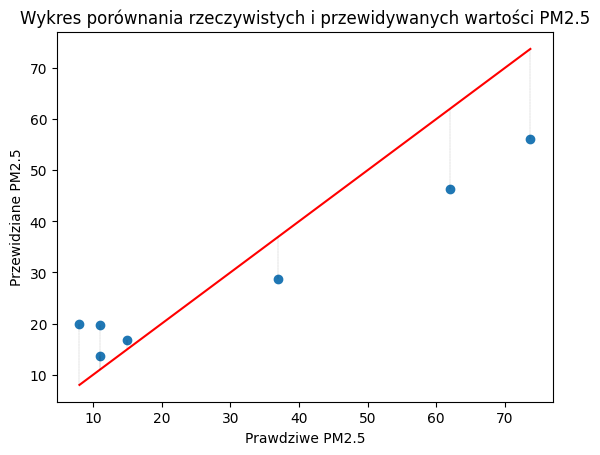

[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    0.0s


Średni błąd kwadratowy (MSE): 37.06104210449435
r2 score: -1.82%


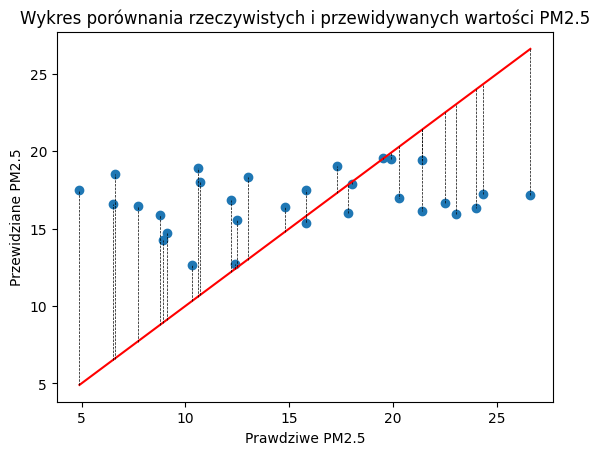

In [10]:
import numpy as np
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split


model = RandomForestRegressor(**best_params,random_state=42)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Średni błąd kwadratowy (MSE): {mse}")
percent_match = r2 * 100
print(f"Procentowa zgodność: {percent_match:.2f}%")

y_test = y_test.reset_index(drop=True)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], 'r', label='y=x')
plt.scatter(y_test, y_pred)
for i in range(len(y_test)):
    plt.plot([y_test[i], y_test[i]], [y_test[i], y_pred[i]],'k--', lw=0.1)
plt.xlabel("Prawdziwe PM2.5")
plt.ylabel("Przewidziane PM2.5")
plt.title("Wykres porównania rzeczywistych i przewidywanych wartości PM2.5")
plt.show()

results = pd.DataFrame({'Rzeczywiste wartości (y_test)': y_test, 'Przewidywane wartości (y_pred)': y_pred})
results['Różnica'] = abs(results['Rzeczywiste wartości (y_test)'] - results['Przewidywane wartości (y_pred)'])
results.sort_values('Różnica')

model_data_test = pd.read_csv("../../przygotowanie_danych/model_data_test.csv")
model_data_test.index = pd.RangeIndex(start=3487, stop=3517, step=1)
model_data_test
X_test_test = model_data_test[["temperatura", "suma opadów", "wilgotność", "prędkość wiatru", "zachmurzenine", "day_number_in_year"]]
y_test_test = model_data_test['PM2.5']

y_pred_test = model.predict(X_test_test)
mse = mean_squared_error(y_test_test, y_pred_test)
r2 = r2_score(y_test_test, y_pred_test)

print(f"Średni błąd kwadratowy (MSE): {mse}")
percent_match = r2 * 100
print(f"r2 score: {percent_match:.2f}%")

y_test_test = y_test_test.reset_index(drop=True)
plt.plot([min(y_test_test), max(y_test_test)], [min(y_test_test), max(y_test_test)], 'r', label='y=x')
plt.scatter(y_test_test, y_pred_test)
for i in range(len(y_test_test)):
    plt.plot([y_test_test[i], y_test_test[i]], [y_test_test[i], y_pred_test[i]], 'k--', lw=0.5)
plt.xlabel("Prawdziwe PM2.5")
plt.ylabel("Przewidziane PM2.5")
plt.title("Wykres porównania rzeczywistych i przewidywanych wartości PM2.5")
plt.show()


In [11]:

results = pd.DataFrame({'Rzeczywiste wartości (y_test)': y_test_test, 'Przewidywane wartości (y_pred)': y_pred_test})
results['Różnica'] = results['Rzeczywiste wartości (y_test)'] - results['Przewidywane wartości (y_pred)']
results


,Rzeczywiste wartości (y_test),Przewidywane wartości (y_pred),Różnica
0,9.1,14.687238,-5.587238
1,10.3,12.675676,-2.375676
2,12.4,12.689350,-0.289350
3,12.5,15.570549,-3.070549
4,15.8,15.351286,0.448714
5,17.8,16.030655,1.769345
6,23.0,15.918744,7.081256
7,21.4,16.110965,5.289035
8,24.0,16.339751,7.660249
9,22.5,16.675573,5.824427


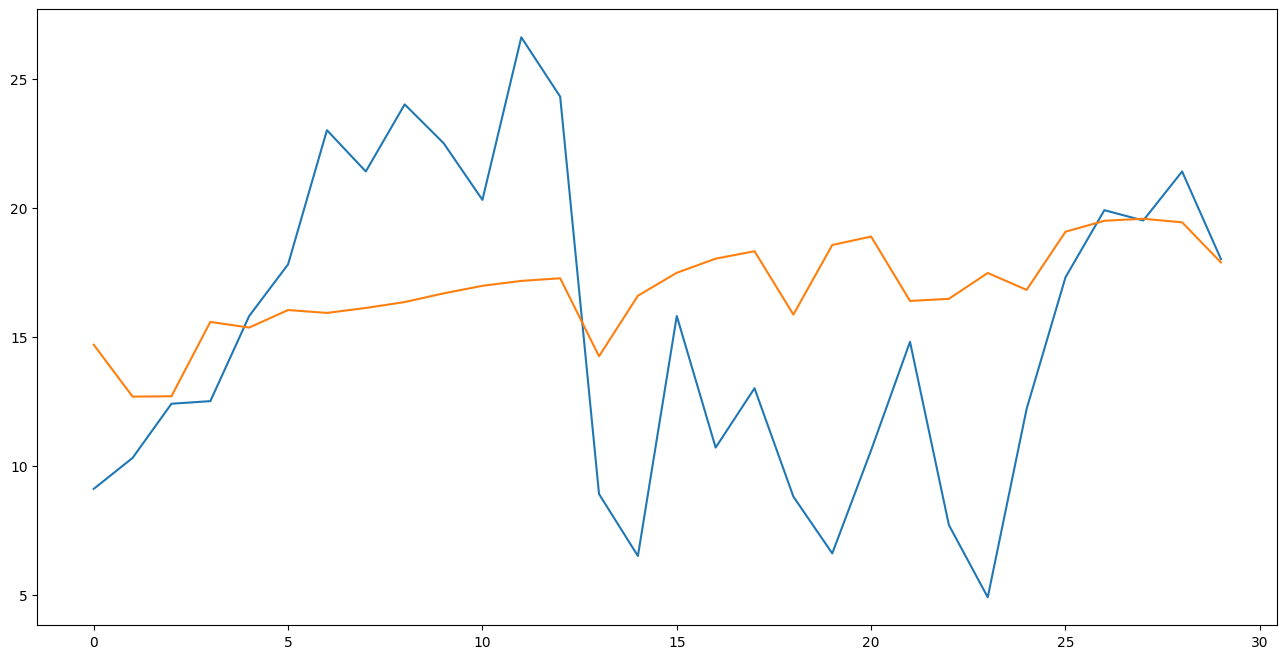

In [12]:
plt.figure(figsize=[16,8])
plt.plot(y_test_test)
plt.plot(y_pred_test)
plt.show()